In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

UNC_YEAR    HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017  190590         12    Algeria     4.605299e+10  1.948099e+10   
1      2017  190590         36  Australia     2.284420e+11  1.948099e+10   
2      2017  190590         40    Austria     1.664750e+11  1.948099e+10   
3      2017  190590         56    Belgium     4.064120e+11  1.948099e+10   
4      2017  190590         76     Brazil     1.507490e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
2         0.0   4403.247293    4.172380e+11       3.955690e+11      8797566   
3         0.0   3980.375563    5.026980e+11       4.757400e+11     11375158   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766             3416326.0   
1     1.304758            80.223690   8329.652344           438747025.0   
2          NaN            78.856460   8289.029297           453206357.0   
3          NaN            72.409200   8722.114258           706524512.0   
4     3.191389            55.382403  18364.505860            31329648.0   

   KR_TRADE_HSCD_COUNTRYCD  
0                     7657  
1                  5294788  
2                   335818  
3                   173709  
4                   122850

In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
df['_HSCD'] = df['HSCD'].copy()

In [6]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1         12    Algeria     4.605299e+10  1.948099e+10   
1      2017     1         36  Australia     2.284420e+11  1.948099e+10   
4      2017     1         76     Brazil     1.507490e+11  1.948099e+10   
5      2017     1        104    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1        124     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [7]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

In [8]:
df.head()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  SP_POP_TOTL  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11     41389198   
1         0.0  12203.155980    1.329190e+12       1.208850e+12     24601860   
4        18.0   9644.206941    2.062830e+12       1.795700e+12    207833831   
5         5.0   5891.659995    6.894587e+10       6.718424e+10     53382581   
6         0.0   7911.783801    1.649880e+12       1.528240e+12     36543321   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  
0                     7657  190590  
1                  5294788  190590  
4                   122850  190590  
5                   631082  190590  
6                  7273171  190590

<AxesSubplot:>

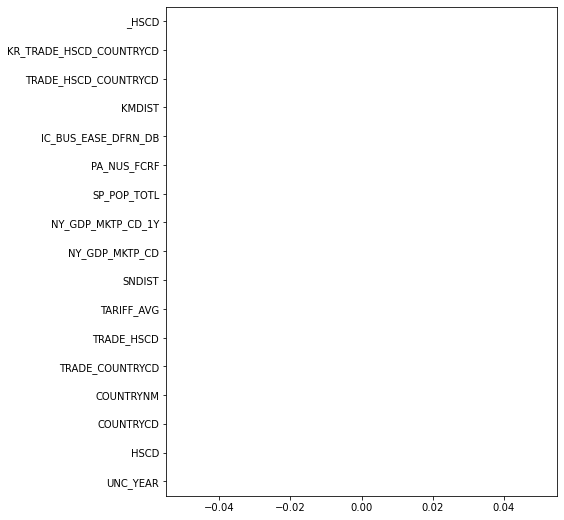

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 17)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

UNC_YEAR  HSCD  COUNTRYCD  COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
0      2017     1          1    Algeria     4.605299e+10  1.948099e+10   
1      2017     1          2  Australia     2.284420e+11  1.948099e+10   
4      2017     1          3     Brazil     1.507490e+11  1.948099e+10   
5      2017     1          4    Myanmar     1.925344e+10  1.948099e+10   
6      2017     1          5     Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG        SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
0        30.0   3878.238437    1.701630e+11       1.599950e+11  ...   
1         0.0  12203.155980    1.329190e+12       1.208850e+12  ...   
4        18.0   9644.206941    2.062830e+12       1.795700e+12  ...   
5         5.0   5891.659995    6.894587e+10       6.718424e+10  ...   
6         0.0   7911.783801    1.649880e+12       1.528240e+12  ...   

   PA_NUS_FCRF  IC_BUS_EASE_DFRN_DB        KMDIST  TRADE_HSCD_COUNTRYCD  \
0   110.973017            46.109810   9954.009766          3.416326e+06   
1     1.304758            80.223690   8329.652344          4.387470e+08   
4     3.191389            55.382403  18364.505860          3.132965e+07   
5  1360.358707            42.671390   3796.142578          1.276182e+07   
6     1.297936            79.540940  10617.703130          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
0                     7657  190590            0.007418            0.017537   
1                  5294788  190590            0.192061            2.252181   
4                   122850  190590            0.020783            0.160822   
5                   631082  190590            0.066283            0.065509   
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893  

[5 rows x 21 columns]

In [13]:
copy_df = df.copy()

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
copy_df = df.copy()
df = df.drop(columns=['_HSCD'])
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0     1          1        30.0   38.782384     0.027670   110.973017   
1     1          2         0.0  122.031560     0.015534     1.304758   
4     1          3        18.0   96.442069     0.147996     3.191389   
5     1          4         5.0   58.916600     0.036340  1360.358707   
6     1          5         0.0   79.117838     0.024167     1.297936   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            46.109810   99.540098            0.007418            0.017537   
1            80.223690   83.296523            0.192061            2.252181   
4            55.382403  183.645059            0.020783            0.160822   
5            42.671390   37.961426            0.066283            0.065509   
6            79.540940  106.177031            0.257627            5.718352   

   gdp_percent  next_year_percent  
0   106.355199           0.224130  
1   109.954916           1.206797  
4   114.876093           0.392121  
5   102.622089           4.945077  
6   107.959483           0.652893

In [16]:
df.to_csv('./norm.csv')

In [17]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)

In [18]:
df_shuffled.head()

HSCD  COUNTRYCD  TARIFF_AVG      SNDIST  SP_POP_TOTL  PA_NUS_FCRF  \
0    15          4         0.0   63.403729     0.036340  1360.358707   
1   153         21         0.0  115.697407     0.020481     3.260488   
2   134         23         0.0   32.731520     0.025202     3.779333   
3    50         15         3.0   49.516033     0.010789   326.001023   
4   382          3        15.0  102.772866     0.147996     3.191389   

   IC_BUS_EASE_DFRN_DB      KMDIST  item_total_percent  item_world_percent  \
0            42.671390   37.961426            0.007782            0.034779   
1            67.517500  163.297646            0.005423            0.620588   
2            77.680440   77.539673            0.010907            1.462068   
3            74.848790   42.277720            0.022977            0.266165   
4            55.382403  183.645059            0.096494            0.849757   

   gdp_percent  next_year_percent  
0   102.622089           0.463379  
1   109.959040           0.039603  
2   111.399827           0.024799  
3   121.509637           0.474827  
4   114.876093           1.137093

In [19]:
df = df_shuffled.copy()

In [20]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [22]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [23]:
y_test = y_test.reshape(-1,1)

In [24]:
len(df)

17269

In [30]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [31]:
y_test.shape

torch.Size([3454, 1])

In [32]:
FLAG_SAVE_MODEL = False

In [33]:
# LSTM Model Test
import torch.nn as nn

sequence_length = x_train.shape[1]
input_size = x_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 1
batch_size = 128

learning_rate = 0.01
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__() # 상속한 nn.Module에서 RNN에 해당하는 init 실행
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (BATCH SIZE, SEQ_LENGTH, HIDDEN_SIZE)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # hidden state와 동일

        out, _ = self.lstm(x, (h0, c0)) # output : (BATCH_SIZE, SEQ_LENGTH, HIDDEN_SIZE) tensors. (hn, cn)은 필요 없으므로 받지 않고 _로 처리합니다. 

        out = self.fc(out[:, -1, :])
        return out
    
class DeepModel(nn.Module):
    def __init__(self, in_channel, out_channel):
        super(DeepModel, self).__init__()

        self.basic = nn.BatchNorm1d(in_channel)
        self.layer1 = nn.Linear(in_channel, 256)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(256)
        self.layer2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(64)
        self.head = nn.Linear(64, out_channel)

    def forward(self, x):
        x = x.to(device)
        x = self.basic(x)
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        return self.head(x)

modelLinear = nn.Linear(x_train.shape[1], 1).to(device)



# model = nn.Linear(9,1).to(device)


# MODEL LOAD FINISH
# MODEL LOAD FINISH
# MODEL LOAD FINISH

# LSTM - L1 Loss Model

In [34]:
# LSTM
deepmodel = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

num_epochs = 100
total_step = len(dataloader)
loss_list_lstm = []
test_loss_list_lstm = []
for epoch in range(num_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        x_t = x_t.reshape(-1, 1, input_size)

        pred = deepmodel(x_t)
        
#         loss = F.mse_loss(y_t, pred)
        loss = F.l1_loss(y_t, pred)
        loss_list_lstm.append(loss)
        with torch.no_grad():
            x_te = x_test.reshape(-1,1,input_size)
            pred_y = deepmodel(x_te)
            test_loss_list_lstm.append(F.l1_loss(pred_y, y_test))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 100 == 0: 
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))

if FLAG_SAVE_MODEL:
    torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')



Epoch [1/100], Step [100/432], Loss: 7.1436
Epoch [1/100], Step [200/432], Loss: 3.5672
Epoch [1/100], Step [300/432], Loss: 4.2093
Epoch [1/100], Step [400/432], Loss: 4.4028
Epoch [2/100], Step [100/432], Loss: 7.4072
Epoch [2/100], Step [200/432], Loss: 2.6177
Epoch [2/100], Step [300/432], Loss: 9.5402
Epoch [2/100], Step [400/432], Loss: 5.2163
Epoch [3/100], Step [100/432], Loss: 4.0613
Epoch [3/100], Step [200/432], Loss: 9.0798
Epoch [3/100], Step [300/432], Loss: 20.6639
Epoch [3/100], Step [400/432], Loss: 6.7240
Epoch [4/100], Step [100/432], Loss: 4.7458
Epoch [4/100], Step [200/432], Loss: 4.5428
Epoch [4/100], Step [300/432], Loss: 4.5921
Epoch [4/100], Step [400/432], Loss: 4.6392
Epoch [5/100], Step [100/432], Loss: 4.1396
Epoch [5/100], Step [200/432], Loss: 6.5825
Epoch [5/100], Step [300/432], Loss: 5.0657
Epoch [5/100], Step [400/432], Loss: 2.5567
Epoch [6/100], Step [100/432], Loss: 2.6580
Epoch [6/100], Step [200/432], Loss: 3.4256
Epoch [6/100], Step [300/432], 

Epoch [46/100], Step [400/432], Loss: 4.2072
Epoch [47/100], Step [100/432], Loss: 5.7528
Epoch [47/100], Step [200/432], Loss: 4.1255
Epoch [47/100], Step [300/432], Loss: 5.3266
Epoch [47/100], Step [400/432], Loss: 2.1114
Epoch [48/100], Step [100/432], Loss: 3.4941
Epoch [48/100], Step [200/432], Loss: 2.7172
Epoch [48/100], Step [300/432], Loss: 8.2820
Epoch [48/100], Step [400/432], Loss: 2.2143
Epoch [49/100], Step [100/432], Loss: 3.3653
Epoch [49/100], Step [200/432], Loss: 8.3096
Epoch [49/100], Step [300/432], Loss: 5.0505
Epoch [49/100], Step [400/432], Loss: 4.0090
Epoch [50/100], Step [100/432], Loss: 5.0575
Epoch [50/100], Step [200/432], Loss: 2.0564
Epoch [50/100], Step [300/432], Loss: 5.0755
Epoch [50/100], Step [400/432], Loss: 18.2316
Epoch [51/100], Step [100/432], Loss: 3.1785
Epoch [51/100], Step [200/432], Loss: 2.9190
Epoch [51/100], Step [300/432], Loss: 7.1832
Epoch [51/100], Step [400/432], Loss: 4.7528
Epoch [52/100], Step [100/432], Loss: 6.8094
Epoch [52

Epoch [92/100], Step [200/432], Loss: 3.4570
Epoch [92/100], Step [300/432], Loss: 5.8018
Epoch [92/100], Step [400/432], Loss: 2.5224
Epoch [93/100], Step [100/432], Loss: 5.9398
Epoch [93/100], Step [200/432], Loss: 2.5606
Epoch [93/100], Step [300/432], Loss: 2.9700
Epoch [93/100], Step [400/432], Loss: 4.7026
Epoch [94/100], Step [100/432], Loss: 3.7247
Epoch [94/100], Step [200/432], Loss: 1.7020
Epoch [94/100], Step [300/432], Loss: 3.0844
Epoch [94/100], Step [400/432], Loss: 2.0177
Epoch [95/100], Step [100/432], Loss: 4.8098
Epoch [95/100], Step [200/432], Loss: 4.5029
Epoch [95/100], Step [300/432], Loss: 4.4019
Epoch [95/100], Step [400/432], Loss: 3.2215
Epoch [96/100], Step [100/432], Loss: 3.2752
Epoch [96/100], Step [200/432], Loss: 5.5688
Epoch [96/100], Step [300/432], Loss: 2.4951
Epoch [96/100], Step [400/432], Loss: 5.2962
Epoch [97/100], Step [100/432], Loss: 7.0673
Epoch [97/100], Step [200/432], Loss: 2.5759
Epoch [97/100], Step [300/432], Loss: 2.5446
Epoch [97/

In [301]:
x_te = x_test.reshape(-1,1,input_size)
pred_y = deepmodel(x_te)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.8884, device='cuda:0', grad_fn=<MeanBackward0>)

# L2 Loss model - not used

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

In [ ]:
n_epochs = 200
loss_list1 = []
test_loss_list1 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel(x_t).to(device)
        cost = F.mse_loss(y_t, pred)
        loss_list1.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list1.append(F.mse_loss(pred_y, y_test))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

In [ ]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')

# l1 loss model

In [35]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [36]:
n_epochs = 100
loss_list2 = []
test_loss_list2 = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples

        pred = deepmodel2(x_t).to(device)
        cost = F.l1_loss(y_t, pred)
        loss_list2.append(cost)
        with torch.no_grad():
            pred_y = deepmodel2(x_test)
            test_loss_list2.append(F.l1_loss(pred_y, y_test))
        optimizer2.zero_grad()
        cost.backward()
        optimizer2.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/432  cost : 40.057533264160156
Ep 0/100  Batch 2/432  cost : 61.741493225097656
Ep 0/100  Batch 3/432  cost : 11.001442909240723
Ep 0/100  Batch 4/432  cost : 157.2154541015625
Ep 0/100  Batch 5/432  cost : 20.619354248046875
Ep 0/100  Batch 6/432  cost : 30.79589080810547
Ep 0/100  Batch 7/432  cost : 141.01443481445312
Ep 0/100  Batch 8/432  cost : 77.37763214111328
Ep 0/100  Batch 9/432  cost : 57.66919708251953
Ep 0/100  Batch 10/432  cost : 87.84852600097656
Ep 0/100  Batch 11/432  cost : 39.246334075927734
Ep 0/100  Batch 12/432  cost : 79.13748168945312
Ep 0/100  Batch 13/432  cost : 55.310367584228516
Ep 0/100  Batch 14/432  cost : 53.86006546020508
Ep 0/100  Batch 15/432  cost : 81.9808349609375
Ep 0/100  Batch 16/432  cost : 25.399703979492188
Ep 0/100  Batch 17/432  cost : 84.59083557128906
Ep 0/100  Batch 18/432  cost : 99.73204803466797
Ep 0/100  Batch 19/432  cost : 121.74644470214844
Ep 0/100  Batch 20/432  cost : 31.719846725463867
Ep 0/100  Batch 21/4

Ep 0/100  Batch 238/432  cost : 3.020799398422241
Ep 0/100  Batch 239/432  cost : 3.3489770889282227
Ep 0/100  Batch 240/432  cost : 3.935343027114868
Ep 0/100  Batch 241/432  cost : 2.0988590717315674
Ep 0/100  Batch 242/432  cost : 5.069589614868164
Ep 0/100  Batch 243/432  cost : 3.538459539413452
Ep 0/100  Batch 244/432  cost : 3.971135377883911
Ep 0/100  Batch 245/432  cost : 4.896397113800049
Ep 0/100  Batch 246/432  cost : 5.347989082336426
Ep 0/100  Batch 247/432  cost : 3.2955894470214844
Ep 0/100  Batch 248/432  cost : 3.076749801635742
Ep 0/100  Batch 249/432  cost : 5.796699523925781
Ep 0/100  Batch 250/432  cost : 6.274221420288086
Ep 0/100  Batch 251/432  cost : 4.790107250213623
Ep 0/100  Batch 252/432  cost : 3.4729905128479004
Ep 0/100  Batch 253/432  cost : 5.338417053222656
Ep 0/100  Batch 254/432  cost : 7.410211563110352
Ep 0/100  Batch 255/432  cost : 4.963558197021484
Ep 0/100  Batch 256/432  cost : 2.675629138946533
Ep 0/100  Batch 257/432  cost : 3.086899042129

Ep 1/100  Batch 46/432  cost : 2.471391201019287
Ep 1/100  Batch 47/432  cost : 5.057507514953613
Ep 1/100  Batch 48/432  cost : 3.769033432006836
Ep 1/100  Batch 49/432  cost : 5.592387676239014
Ep 1/100  Batch 50/432  cost : 4.75055456161499
Ep 1/100  Batch 51/432  cost : 2.8940622806549072
Ep 1/100  Batch 52/432  cost : 4.454609394073486
Ep 1/100  Batch 53/432  cost : 4.4791741371154785
Ep 1/100  Batch 54/432  cost : 3.6406450271606445
Ep 1/100  Batch 55/432  cost : 7.448925971984863
Ep 1/100  Batch 56/432  cost : 9.256657600402832
Ep 1/100  Batch 57/432  cost : 9.103629112243652
Ep 1/100  Batch 58/432  cost : 6.722199440002441
Ep 1/100  Batch 59/432  cost : 4.606228828430176
Ep 1/100  Batch 60/432  cost : 3.4575188159942627
Ep 1/100  Batch 61/432  cost : 2.2045650482177734
Ep 1/100  Batch 62/432  cost : 3.2635722160339355
Ep 1/100  Batch 63/432  cost : 2.9422428607940674
Ep 1/100  Batch 64/432  cost : 4.760026931762695
Ep 1/100  Batch 65/432  cost : 6.523148536682129
Ep 1/100  Batc

Ep 1/100  Batch 286/432  cost : 5.282483100891113
Ep 1/100  Batch 287/432  cost : 3.076749086380005
Ep 1/100  Batch 288/432  cost : 4.833460807800293
Ep 1/100  Batch 289/432  cost : 7.654502868652344
Ep 1/100  Batch 290/432  cost : 5.041910171508789
Ep 1/100  Batch 291/432  cost : 5.234821319580078
Ep 1/100  Batch 292/432  cost : 4.289463996887207
Ep 1/100  Batch 293/432  cost : 3.366770029067993
Ep 1/100  Batch 294/432  cost : 12.664539337158203
Ep 1/100  Batch 295/432  cost : 5.417220115661621
Ep 1/100  Batch 296/432  cost : 4.595627307891846
Ep 1/100  Batch 297/432  cost : 3.058917999267578
Ep 1/100  Batch 298/432  cost : 3.674711227416992
Ep 1/100  Batch 299/432  cost : 4.371371269226074
Ep 1/100  Batch 300/432  cost : 3.523848533630371
Ep 1/100  Batch 301/432  cost : 3.923515796661377
Ep 1/100  Batch 302/432  cost : 2.7182445526123047
Ep 1/100  Batch 303/432  cost : 2.3857812881469727
Ep 1/100  Batch 304/432  cost : 2.0978035926818848
Ep 1/100  Batch 305/432  cost : 3.491020202636

Ep 2/100  Batch 95/432  cost : 7.805904865264893
Ep 2/100  Batch 96/432  cost : 4.538439750671387
Ep 2/100  Batch 97/432  cost : 2.6102216243743896
Ep 2/100  Batch 98/432  cost : 78.58917236328125
Ep 2/100  Batch 99/432  cost : 6.224789619445801
Ep 2/100  Batch 100/432  cost : 3.800140619277954
Ep 2/100  Batch 101/432  cost : 3.854769468307495
Ep 2/100  Batch 102/432  cost : 2.795450210571289
Ep 2/100  Batch 103/432  cost : 3.53139066696167
Ep 2/100  Batch 104/432  cost : 3.874296188354492
Ep 2/100  Batch 105/432  cost : 3.3022332191467285
Ep 2/100  Batch 106/432  cost : 4.838269233703613
Ep 2/100  Batch 107/432  cost : 5.162711143493652
Ep 2/100  Batch 108/432  cost : 1.6589566469192505
Ep 2/100  Batch 109/432  cost : 3.4956135749816895
Ep 2/100  Batch 110/432  cost : 7.012845039367676
Ep 2/100  Batch 111/432  cost : 5.394187927246094
Ep 2/100  Batch 112/432  cost : 4.498668193817139
Ep 2/100  Batch 113/432  cost : 2.0390448570251465
Ep 2/100  Batch 114/432  cost : 107.31343078613281


Ep 2/100  Batch 336/432  cost : 3.2469141483306885
Ep 2/100  Batch 337/432  cost : 2.0544934272766113
Ep 2/100  Batch 338/432  cost : 3.0024027824401855
Ep 2/100  Batch 339/432  cost : 3.2429141998291016
Ep 2/100  Batch 340/432  cost : 6.507777690887451
Ep 2/100  Batch 341/432  cost : 2.9884581565856934
Ep 2/100  Batch 342/432  cost : 7.882124900817871
Ep 2/100  Batch 343/432  cost : 3.0975759029388428
Ep 2/100  Batch 344/432  cost : 3.819779396057129
Ep 2/100  Batch 345/432  cost : 6.3598527908325195
Ep 2/100  Batch 346/432  cost : 11.010859489440918
Ep 2/100  Batch 347/432  cost : 3.2786507606506348
Ep 2/100  Batch 348/432  cost : 2.855344295501709
Ep 2/100  Batch 349/432  cost : 3.7907495498657227
Ep 2/100  Batch 350/432  cost : 3.522847890853882
Ep 2/100  Batch 351/432  cost : 2.5120253562927246
Ep 2/100  Batch 352/432  cost : 2.5780351161956787
Ep 2/100  Batch 353/432  cost : 3.8356080055236816
Ep 2/100  Batch 354/432  cost : 7.000716209411621
Ep 2/100  Batch 355/432  cost : 4.263

Ep 3/100  Batch 144/432  cost : 1.9445335865020752
Ep 3/100  Batch 145/432  cost : 8.160675048828125
Ep 3/100  Batch 146/432  cost : 7.786823272705078
Ep 3/100  Batch 147/432  cost : 12.452127456665039
Ep 3/100  Batch 148/432  cost : 3.5899016857147217
Ep 3/100  Batch 149/432  cost : 3.729008197784424
Ep 3/100  Batch 150/432  cost : 2.0838475227355957
Ep 3/100  Batch 151/432  cost : 4.426774978637695
Ep 3/100  Batch 152/432  cost : 5.943483829498291
Ep 3/100  Batch 153/432  cost : 1.9654197692871094
Ep 3/100  Batch 154/432  cost : 2.838458299636841
Ep 3/100  Batch 155/432  cost : 3.758087635040283
Ep 3/100  Batch 156/432  cost : 7.666289329528809
Ep 3/100  Batch 157/432  cost : 4.4540863037109375
Ep 3/100  Batch 158/432  cost : 4.863405227661133
Ep 3/100  Batch 159/432  cost : 3.800508975982666
Ep 3/100  Batch 160/432  cost : 4.246430397033691
Ep 3/100  Batch 161/432  cost : 4.245203971862793
Ep 3/100  Batch 162/432  cost : 2.2253670692443848
Ep 3/100  Batch 163/432  cost : 3.488836765

Ep 3/100  Batch 384/432  cost : 6.091649055480957
Ep 3/100  Batch 385/432  cost : 3.439171552658081
Ep 3/100  Batch 386/432  cost : 7.026477813720703
Ep 3/100  Batch 387/432  cost : 2.991318702697754
Ep 3/100  Batch 388/432  cost : 3.33256196975708
Ep 3/100  Batch 389/432  cost : 3.7596662044525146
Ep 3/100  Batch 390/432  cost : 3.277918815612793
Ep 3/100  Batch 391/432  cost : 2.724524974822998
Ep 3/100  Batch 392/432  cost : 4.402026653289795
Ep 3/100  Batch 393/432  cost : 4.987150192260742
Ep 3/100  Batch 394/432  cost : 3.697171449661255
Ep 3/100  Batch 395/432  cost : 90.77977752685547
Ep 3/100  Batch 396/432  cost : 3.335170269012451
Ep 3/100  Batch 397/432  cost : 3.494302988052368
Ep 3/100  Batch 398/432  cost : 5.760110855102539
Ep 3/100  Batch 399/432  cost : 4.569312572479248
Ep 3/100  Batch 400/432  cost : 2.9450223445892334
Ep 3/100  Batch 401/432  cost : 4.987005233764648
Ep 3/100  Batch 402/432  cost : 4.505967617034912
Ep 3/100  Batch 403/432  cost : 2.117701053619384

Ep 4/100  Batch 192/432  cost : 5.005515098571777
Ep 4/100  Batch 193/432  cost : 2.9964027404785156
Ep 4/100  Batch 194/432  cost : 2.064676284790039
Ep 4/100  Batch 195/432  cost : 5.232731819152832
Ep 4/100  Batch 196/432  cost : 2.778925895690918
Ep 4/100  Batch 197/432  cost : 4.961158275604248
Ep 4/100  Batch 198/432  cost : 2.7099101543426514
Ep 4/100  Batch 199/432  cost : 21.16650390625
Ep 4/100  Batch 200/432  cost : 4.176220893859863
Ep 4/100  Batch 201/432  cost : 4.316710472106934
Ep 4/100  Batch 202/432  cost : 3.4001121520996094
Ep 4/100  Batch 203/432  cost : 5.474050998687744
Ep 4/100  Batch 204/432  cost : 3.3059186935424805
Ep 4/100  Batch 205/432  cost : 3.2343971729278564
Ep 4/100  Batch 206/432  cost : 5.648703575134277
Ep 4/100  Batch 207/432  cost : 4.702561855316162
Ep 4/100  Batch 208/432  cost : 8.488240242004395
Ep 4/100  Batch 209/432  cost : 2.3382797241210938
Ep 4/100  Batch 210/432  cost : 7.7383036613464355
Ep 4/100  Batch 211/432  cost : 7.205161571502

Ep 4/100  Batch 432/432  cost : 3.430299997329712
Ep 5/100  Batch 1/432  cost : 3.5063021183013916
Ep 5/100  Batch 2/432  cost : 5.792119026184082
Ep 5/100  Batch 3/432  cost : 5.915429592132568
Ep 5/100  Batch 4/432  cost : 4.355111122131348
Ep 5/100  Batch 5/432  cost : 5.732451438903809
Ep 5/100  Batch 6/432  cost : 3.2472925186157227
Ep 5/100  Batch 7/432  cost : 4.544300079345703
Ep 5/100  Batch 8/432  cost : 3.140270233154297
Ep 5/100  Batch 9/432  cost : 5.8409223556518555
Ep 5/100  Batch 10/432  cost : 4.1787638664245605
Ep 5/100  Batch 11/432  cost : 2.387324333190918
Ep 5/100  Batch 12/432  cost : 6.25974702835083
Ep 5/100  Batch 13/432  cost : 2.161205530166626
Ep 5/100  Batch 14/432  cost : 4.807697296142578
Ep 5/100  Batch 15/432  cost : 4.044856071472168
Ep 5/100  Batch 16/432  cost : 3.943432331085205
Ep 5/100  Batch 17/432  cost : 2.955760955810547
Ep 5/100  Batch 18/432  cost : 4.409793853759766
Ep 5/100  Batch 19/432  cost : 4.8836283683776855
Ep 5/100  Batch 20/432  

Ep 5/100  Batch 240/432  cost : 6.253807067871094
Ep 5/100  Batch 241/432  cost : 7.0131378173828125
Ep 5/100  Batch 242/432  cost : 4.677237033843994
Ep 5/100  Batch 243/432  cost : 3.755605936050415
Ep 5/100  Batch 244/432  cost : 2.8893661499023438
Ep 5/100  Batch 245/432  cost : 3.764594316482544
Ep 5/100  Batch 246/432  cost : 6.674698829650879
Ep 5/100  Batch 247/432  cost : 4.349917411804199
Ep 5/100  Batch 248/432  cost : 3.26385498046875
Ep 5/100  Batch 249/432  cost : 10.852716445922852
Ep 5/100  Batch 250/432  cost : 3.3806943893432617
Ep 5/100  Batch 251/432  cost : 7.410749435424805
Ep 5/100  Batch 252/432  cost : 3.7164435386657715
Ep 5/100  Batch 253/432  cost : 6.967089653015137
Ep 5/100  Batch 254/432  cost : 4.473306655883789
Ep 5/100  Batch 255/432  cost : 3.889145612716675
Ep 5/100  Batch 256/432  cost : 79.50104522705078
Ep 5/100  Batch 257/432  cost : 5.475728988647461
Ep 5/100  Batch 258/432  cost : 8.964981079101562
Ep 5/100  Batch 259/432  cost : 8.423720359802

Ep 6/100  Batch 48/432  cost : 6.592142105102539
Ep 6/100  Batch 49/432  cost : 5.366661548614502
Ep 6/100  Batch 50/432  cost : 3.2891287803649902
Ep 6/100  Batch 51/432  cost : 4.8087849617004395
Ep 6/100  Batch 52/432  cost : 6.381392002105713
Ep 6/100  Batch 53/432  cost : 3.9224355220794678
Ep 6/100  Batch 54/432  cost : 5.682550430297852
Ep 6/100  Batch 55/432  cost : 2.364168167114258
Ep 6/100  Batch 56/432  cost : 3.826478958129883
Ep 6/100  Batch 57/432  cost : 4.905677318572998
Ep 6/100  Batch 58/432  cost : 5.346454620361328
Ep 6/100  Batch 59/432  cost : 37.05199432373047
Ep 6/100  Batch 60/432  cost : 11.3028564453125
Ep 6/100  Batch 61/432  cost : 1.799899935722351
Ep 6/100  Batch 62/432  cost : 2.856968641281128
Ep 6/100  Batch 63/432  cost : 4.570590972900391
Ep 6/100  Batch 64/432  cost : 4.488144397735596
Ep 6/100  Batch 65/432  cost : 4.802420139312744
Ep 6/100  Batch 66/432  cost : 2.5235424041748047
Ep 6/100  Batch 67/432  cost : 2.875598430633545
Ep 6/100  Batch 6

Ep 6/100  Batch 288/432  cost : 5.134706974029541
Ep 6/100  Batch 289/432  cost : 2.526057243347168
Ep 6/100  Batch 290/432  cost : 4.7729997634887695
Ep 6/100  Batch 291/432  cost : 3.498380184173584
Ep 6/100  Batch 292/432  cost : 2.1572647094726562
Ep 6/100  Batch 293/432  cost : 1.9163196086883545
Ep 6/100  Batch 294/432  cost : 5.723260879516602
Ep 6/100  Batch 295/432  cost : 5.695962905883789
Ep 6/100  Batch 296/432  cost : 2.876554012298584
Ep 6/100  Batch 297/432  cost : 1.1319093704223633
Ep 6/100  Batch 298/432  cost : 3.3558990955352783
Ep 6/100  Batch 299/432  cost : 7.0967488288879395
Ep 6/100  Batch 300/432  cost : 7.9791669845581055
Ep 6/100  Batch 301/432  cost : 5.912753105163574
Ep 6/100  Batch 302/432  cost : 6.490007400512695
Ep 6/100  Batch 303/432  cost : 6.345228672027588
Ep 6/100  Batch 304/432  cost : 4.633147716522217
Ep 6/100  Batch 305/432  cost : 6.551713943481445
Ep 6/100  Batch 306/432  cost : 3.33577561378479
Ep 6/100  Batch 307/432  cost : 2.1088695526

Ep 7/100  Batch 96/432  cost : 4.483913421630859
Ep 7/100  Batch 97/432  cost : 2.1307592391967773
Ep 7/100  Batch 98/432  cost : 3.053349018096924
Ep 7/100  Batch 99/432  cost : 2.880007266998291
Ep 7/100  Batch 100/432  cost : 4.047168254852295
Ep 7/100  Batch 101/432  cost : 7.305944919586182
Ep 7/100  Batch 102/432  cost : 7.1062140464782715
Ep 7/100  Batch 103/432  cost : 4.845353126525879
Ep 7/100  Batch 104/432  cost : 4.950859069824219
Ep 7/100  Batch 105/432  cost : 6.501683712005615
Ep 7/100  Batch 106/432  cost : 4.843825340270996
Ep 7/100  Batch 107/432  cost : 3.526681661605835
Ep 7/100  Batch 108/432  cost : 8.087101936340332
Ep 7/100  Batch 109/432  cost : 6.646974086761475
Ep 7/100  Batch 110/432  cost : 11.248568534851074
Ep 7/100  Batch 111/432  cost : 4.116219520568848
Ep 7/100  Batch 112/432  cost : 2.6967291831970215
Ep 7/100  Batch 113/432  cost : 2.6032042503356934
Ep 7/100  Batch 114/432  cost : 3.5027174949645996
Ep 7/100  Batch 115/432  cost : 6.74611091613769

Ep 7/100  Batch 336/432  cost : 3.1568427085876465
Ep 7/100  Batch 337/432  cost : 3.854240894317627
Ep 7/100  Batch 338/432  cost : 3.496002197265625
Ep 7/100  Batch 339/432  cost : 8.439605712890625
Ep 7/100  Batch 340/432  cost : 3.847961664199829
Ep 7/100  Batch 341/432  cost : 2.3450324535369873
Ep 7/100  Batch 342/432  cost : 3.18904185295105
Ep 7/100  Batch 343/432  cost : 13.245589256286621
Ep 7/100  Batch 344/432  cost : 11.776140213012695
Ep 7/100  Batch 345/432  cost : 4.667900562286377
Ep 7/100  Batch 346/432  cost : 4.891283988952637
Ep 7/100  Batch 347/432  cost : 2.229896068572998
Ep 7/100  Batch 348/432  cost : 3.8961682319641113
Ep 7/100  Batch 349/432  cost : 1.7189862728118896
Ep 7/100  Batch 350/432  cost : 4.996811866760254
Ep 7/100  Batch 351/432  cost : 12.06410026550293
Ep 7/100  Batch 352/432  cost : 6.694309234619141
Ep 7/100  Batch 353/432  cost : 4.570911407470703
Ep 7/100  Batch 354/432  cost : 5.076286315917969
Ep 7/100  Batch 355/432  cost : 2.64673137664

Ep 8/100  Batch 144/432  cost : 4.246284008026123
Ep 8/100  Batch 145/432  cost : 7.343390464782715
Ep 8/100  Batch 146/432  cost : 4.863773345947266
Ep 8/100  Batch 147/432  cost : 3.9726107120513916
Ep 8/100  Batch 148/432  cost : 3.697641611099243
Ep 8/100  Batch 149/432  cost : 2.407362461090088
Ep 8/100  Batch 150/432  cost : 5.008416175842285
Ep 8/100  Batch 151/432  cost : 4.405161380767822
Ep 8/100  Batch 152/432  cost : 39.62037658691406
Ep 8/100  Batch 153/432  cost : 3.018308162689209
Ep 8/100  Batch 154/432  cost : 3.493628978729248
Ep 8/100  Batch 155/432  cost : 2.5616607666015625
Ep 8/100  Batch 156/432  cost : 13.826482772827148
Ep 8/100  Batch 157/432  cost : 8.636375427246094
Ep 8/100  Batch 158/432  cost : 5.562690734863281
Ep 8/100  Batch 159/432  cost : 3.351749897003174
Ep 8/100  Batch 160/432  cost : 5.140118598937988
Ep 8/100  Batch 161/432  cost : 2.7026710510253906
Ep 8/100  Batch 162/432  cost : 106.79085540771484
Ep 8/100  Batch 163/432  cost : 3.82309961318

Ep 8/100  Batch 384/432  cost : 14.976299285888672
Ep 8/100  Batch 385/432  cost : 4.092012405395508
Ep 8/100  Batch 386/432  cost : 3.9628615379333496
Ep 8/100  Batch 387/432  cost : 5.483558654785156
Ep 8/100  Batch 388/432  cost : 3.821901321411133
Ep 8/100  Batch 389/432  cost : 5.719285488128662
Ep 8/100  Batch 390/432  cost : 19.90314483642578
Ep 8/100  Batch 391/432  cost : 3.923849582672119
Ep 8/100  Batch 392/432  cost : 3.5498297214508057
Ep 8/100  Batch 393/432  cost : 3.380321502685547
Ep 8/100  Batch 394/432  cost : 3.6232643127441406
Ep 8/100  Batch 395/432  cost : 4.354650497436523
Ep 8/100  Batch 396/432  cost : 3.832723617553711
Ep 8/100  Batch 397/432  cost : 6.233523368835449
Ep 8/100  Batch 398/432  cost : 4.78751802444458
Ep 8/100  Batch 399/432  cost : 2.9512224197387695
Ep 8/100  Batch 400/432  cost : 2.448286771774292
Ep 8/100  Batch 401/432  cost : 3.715620279312134
Ep 8/100  Batch 402/432  cost : 3.2722206115722656
Ep 8/100  Batch 403/432  cost : 2.15309977531

Ep 9/100  Batch 192/432  cost : 6.340669631958008
Ep 9/100  Batch 193/432  cost : 3.8634400367736816
Ep 9/100  Batch 194/432  cost : 3.9131665229797363
Ep 9/100  Batch 195/432  cost : 5.931921482086182
Ep 9/100  Batch 196/432  cost : 4.314546585083008
Ep 9/100  Batch 197/432  cost : 4.7744293212890625
Ep 9/100  Batch 198/432  cost : 2.2936229705810547
Ep 9/100  Batch 199/432  cost : 3.0298376083374023
Ep 9/100  Batch 200/432  cost : 3.4734089374542236
Ep 9/100  Batch 201/432  cost : 3.7147369384765625
Ep 9/100  Batch 202/432  cost : 1.85353422164917
Ep 9/100  Batch 203/432  cost : 3.1204237937927246
Ep 9/100  Batch 204/432  cost : 2.327298641204834
Ep 9/100  Batch 205/432  cost : 2.9616055488586426
Ep 9/100  Batch 206/432  cost : 4.086623191833496
Ep 9/100  Batch 207/432  cost : 3.044567584991455
Ep 9/100  Batch 208/432  cost : 2.697495937347412
Ep 9/100  Batch 209/432  cost : 4.79822301864624
Ep 9/100  Batch 210/432  cost : 2.9176361560821533
Ep 9/100  Batch 211/432  cost : 2.78777980

Ep 9/100  Batch 432/432  cost : 4.955199718475342
Ep 10/100  Batch 1/432  cost : 3.463578224182129
Ep 10/100  Batch 2/432  cost : 6.021960735321045
Ep 10/100  Batch 3/432  cost : 8.490175247192383
Ep 10/100  Batch 4/432  cost : 4.885553359985352
Ep 10/100  Batch 5/432  cost : 4.9012532234191895
Ep 10/100  Batch 6/432  cost : 9.301328659057617
Ep 10/100  Batch 7/432  cost : 3.279181957244873
Ep 10/100  Batch 8/432  cost : 4.568507194519043
Ep 10/100  Batch 9/432  cost : 4.521298885345459
Ep 10/100  Batch 10/432  cost : 5.225588321685791
Ep 10/100  Batch 11/432  cost : 3.414811134338379
Ep 10/100  Batch 12/432  cost : 4.373196601867676
Ep 10/100  Batch 13/432  cost : 37.43082046508789
Ep 10/100  Batch 14/432  cost : 5.328531265258789
Ep 10/100  Batch 15/432  cost : 7.35188102722168
Ep 10/100  Batch 16/432  cost : 13.436477661132812
Ep 10/100  Batch 17/432  cost : 6.282870292663574
Ep 10/100  Batch 18/432  cost : 5.54995059967041
Ep 10/100  Batch 19/432  cost : 4.631844520568848
Ep 10/100

Ep 10/100  Batch 240/432  cost : 2.350332736968994
Ep 10/100  Batch 241/432  cost : 3.2952141761779785
Ep 10/100  Batch 242/432  cost : 2.0034372806549072
Ep 10/100  Batch 243/432  cost : 1.8140084743499756
Ep 10/100  Batch 244/432  cost : 2.079162120819092
Ep 10/100  Batch 245/432  cost : 3.9822499752044678
Ep 10/100  Batch 246/432  cost : 5.54583740234375
Ep 10/100  Batch 247/432  cost : 3.8423690795898438
Ep 10/100  Batch 248/432  cost : 3.168102264404297
Ep 10/100  Batch 249/432  cost : 2.2441389560699463
Ep 10/100  Batch 250/432  cost : 7.431451797485352
Ep 10/100  Batch 251/432  cost : 2.389024019241333
Ep 10/100  Batch 252/432  cost : 7.334291458129883
Ep 10/100  Batch 253/432  cost : 6.522273063659668
Ep 10/100  Batch 254/432  cost : 6.642278671264648
Ep 10/100  Batch 255/432  cost : 3.578026294708252
Ep 10/100  Batch 256/432  cost : 3.559711456298828
Ep 10/100  Batch 257/432  cost : 2.9100301265716553
Ep 10/100  Batch 258/432  cost : 3.4836745262145996
Ep 10/100  Batch 259/432

Ep 10/100  Batch 400/432  cost : 2.370356559753418
Ep 10/100  Batch 401/432  cost : 2.7275686264038086
Ep 10/100  Batch 402/432  cost : 8.77653694152832
Ep 10/100  Batch 403/432  cost : 6.511205673217773
Ep 10/100  Batch 404/432  cost : 4.3182783126831055
Ep 10/100  Batch 405/432  cost : 22.529464721679688
Ep 10/100  Batch 406/432  cost : 2.3078842163085938
Ep 10/100  Batch 407/432  cost : 3.985966682434082
Ep 10/100  Batch 408/432  cost : 8.673645973205566
Ep 10/100  Batch 409/432  cost : 2.9381678104400635
Ep 10/100  Batch 410/432  cost : 4.139492511749268
Ep 10/100  Batch 411/432  cost : 5.020974159240723
Ep 10/100  Batch 412/432  cost : 6.085737228393555
Ep 10/100  Batch 413/432  cost : 4.752092361450195
Ep 10/100  Batch 414/432  cost : 3.36383318901062
Ep 10/100  Batch 415/432  cost : 3.6817636489868164
Ep 10/100  Batch 416/432  cost : 1.8090628385543823
Ep 10/100  Batch 417/432  cost : 2.702033758163452
Ep 10/100  Batch 418/432  cost : 9.037837982177734
Ep 10/100  Batch 419/432  

Ep 11/100  Batch 208/432  cost : 4.603512763977051
Ep 11/100  Batch 209/432  cost : 10.397271156311035
Ep 11/100  Batch 210/432  cost : 4.510003566741943
Ep 11/100  Batch 211/432  cost : 3.292306661605835
Ep 11/100  Batch 212/432  cost : 3.4209680557250977
Ep 11/100  Batch 213/432  cost : 4.0217204093933105
Ep 11/100  Batch 214/432  cost : 3.0722970962524414
Ep 11/100  Batch 215/432  cost : 4.070155620574951
Ep 11/100  Batch 216/432  cost : 4.783770561218262
Ep 11/100  Batch 217/432  cost : 3.514190912246704
Ep 11/100  Batch 218/432  cost : 110.20545959472656
Ep 11/100  Batch 219/432  cost : 2.0696346759796143
Ep 11/100  Batch 220/432  cost : 5.594900608062744
Ep 11/100  Batch 221/432  cost : 2.9200260639190674
Ep 11/100  Batch 222/432  cost : 1.6245815753936768
Ep 11/100  Batch 223/432  cost : 2.692415237426758
Ep 11/100  Batch 224/432  cost : 2.514742374420166
Ep 11/100  Batch 225/432  cost : 5.386309623718262
Ep 11/100  Batch 226/432  cost : 2.2135677337646484
Ep 11/100  Batch 227/4

Ep 11/100  Batch 368/432  cost : 2.7932138442993164
Ep 11/100  Batch 369/432  cost : 10.832531929016113
Ep 11/100  Batch 370/432  cost : 4.1292829513549805
Ep 11/100  Batch 371/432  cost : 2.7120249271392822
Ep 11/100  Batch 372/432  cost : 3.0071463584899902
Ep 11/100  Batch 373/432  cost : 10.907869338989258
Ep 11/100  Batch 374/432  cost : 20.436065673828125
Ep 11/100  Batch 375/432  cost : 3.6349823474884033
Ep 11/100  Batch 376/432  cost : 4.10308837890625
Ep 11/100  Batch 377/432  cost : 1.7908471822738647
Ep 11/100  Batch 378/432  cost : 6.023760795593262
Ep 11/100  Batch 379/432  cost : 1.8500287532806396
Ep 11/100  Batch 380/432  cost : 6.025497913360596
Ep 11/100  Batch 381/432  cost : 5.431987762451172
Ep 11/100  Batch 382/432  cost : 6.558446884155273
Ep 11/100  Batch 383/432  cost : 5.803147315979004
Ep 11/100  Batch 384/432  cost : 4.631892204284668
Ep 11/100  Batch 385/432  cost : 2.212181568145752
Ep 11/100  Batch 386/432  cost : 2.304131507873535
Ep 11/100  Batch 387/4

Ep 12/100  Batch 172/432  cost : 4.519760608673096
Ep 12/100  Batch 173/432  cost : 5.177673816680908
Ep 12/100  Batch 174/432  cost : 3.758796453475952
Ep 12/100  Batch 175/432  cost : 6.183694839477539
Ep 12/100  Batch 176/432  cost : 2.0204975605010986
Ep 12/100  Batch 177/432  cost : 2.394630193710327
Ep 12/100  Batch 178/432  cost : 2.769684314727783
Ep 12/100  Batch 179/432  cost : 5.565406799316406
Ep 12/100  Batch 180/432  cost : 1.609045386314392
Ep 12/100  Batch 181/432  cost : 2.8758444786071777
Ep 12/100  Batch 182/432  cost : 3.3315725326538086
Ep 12/100  Batch 183/432  cost : 3.317200183868408
Ep 12/100  Batch 184/432  cost : 5.748050689697266
Ep 12/100  Batch 185/432  cost : 4.961763381958008
Ep 12/100  Batch 186/432  cost : 5.9933390617370605
Ep 12/100  Batch 187/432  cost : 12.299016952514648
Ep 12/100  Batch 188/432  cost : 2.358912944793701
Ep 12/100  Batch 189/432  cost : 4.796473026275635
Ep 12/100  Batch 190/432  cost : 3.180144786834717
Ep 12/100  Batch 191/432  

Ep 12/100  Batch 406/432  cost : 3.6310360431671143
Ep 12/100  Batch 407/432  cost : 3.0559184551239014
Ep 12/100  Batch 408/432  cost : 3.9738545417785645
Ep 12/100  Batch 409/432  cost : 4.987927436828613
Ep 12/100  Batch 410/432  cost : 11.911526679992676
Ep 12/100  Batch 411/432  cost : 2.5544333457946777
Ep 12/100  Batch 412/432  cost : 3.4098596572875977
Ep 12/100  Batch 413/432  cost : 3.0120432376861572
Ep 12/100  Batch 414/432  cost : 9.462997436523438
Ep 12/100  Batch 415/432  cost : 3.963603973388672
Ep 12/100  Batch 416/432  cost : 2.3040924072265625
Ep 12/100  Batch 417/432  cost : 2.8576653003692627
Ep 12/100  Batch 418/432  cost : 2.0463359355926514
Ep 12/100  Batch 419/432  cost : 4.783355236053467
Ep 12/100  Batch 420/432  cost : 3.5051145553588867
Ep 12/100  Batch 421/432  cost : 3.958559989929199
Ep 12/100  Batch 422/432  cost : 4.5337934494018555
Ep 12/100  Batch 423/432  cost : 3.868894577026367
Ep 12/100  Batch 424/432  cost : 2.9541261196136475
Ep 12/100  Batch 4

Ep 13/100  Batch 208/432  cost : 5.052928924560547
Ep 13/100  Batch 209/432  cost : 4.3489274978637695
Ep 13/100  Batch 210/432  cost : 2.573740243911743
Ep 13/100  Batch 211/432  cost : 6.773886680603027
Ep 13/100  Batch 212/432  cost : 6.136963844299316
Ep 13/100  Batch 213/432  cost : 3.287834882736206
Ep 13/100  Batch 214/432  cost : 2.954502820968628
Ep 13/100  Batch 215/432  cost : 5.224011421203613
Ep 13/100  Batch 216/432  cost : 3.396696090698242
Ep 13/100  Batch 217/432  cost : 5.210595607757568
Ep 13/100  Batch 218/432  cost : 4.5719685554504395
Ep 13/100  Batch 219/432  cost : 2.615078926086426
Ep 13/100  Batch 220/432  cost : 4.397623062133789
Ep 13/100  Batch 221/432  cost : 108.04006958007812
Ep 13/100  Batch 222/432  cost : 8.618866920471191
Ep 13/100  Batch 223/432  cost : 80.32784271240234
Ep 13/100  Batch 224/432  cost : 4.079449653625488
Ep 13/100  Batch 225/432  cost : 10.894102096557617
Ep 13/100  Batch 226/432  cost : 3.7190799713134766
Ep 13/100  Batch 227/432  

Ep 14/100  Batch 10/432  cost : 3.501465320587158
Ep 14/100  Batch 11/432  cost : 15.204200744628906
Ep 14/100  Batch 12/432  cost : 5.825490951538086
Ep 14/100  Batch 13/432  cost : 5.4095869064331055
Ep 14/100  Batch 14/432  cost : 3.2597451210021973
Ep 14/100  Batch 15/432  cost : 5.4278035163879395
Ep 14/100  Batch 16/432  cost : 1.4724071025848389
Ep 14/100  Batch 17/432  cost : 5.885537147521973
Ep 14/100  Batch 18/432  cost : 4.688642501831055
Ep 14/100  Batch 19/432  cost : 3.920161247253418
Ep 14/100  Batch 20/432  cost : 3.462282419204712
Ep 14/100  Batch 21/432  cost : 4.126430511474609
Ep 14/100  Batch 22/432  cost : 3.606912612915039
Ep 14/100  Batch 23/432  cost : 2.6911654472351074
Ep 14/100  Batch 24/432  cost : 3.5176687240600586
Ep 14/100  Batch 25/432  cost : 4.734580993652344
Ep 14/100  Batch 26/432  cost : 4.6614179611206055
Ep 14/100  Batch 27/432  cost : 8.972793579101562
Ep 14/100  Batch 28/432  cost : 3.467345952987671
Ep 14/100  Batch 29/432  cost : 5.78210258

Ep 14/100  Batch 244/432  cost : 4.535309791564941
Ep 14/100  Batch 245/432  cost : 2.967221260070801
Ep 14/100  Batch 246/432  cost : 4.272043228149414
Ep 14/100  Batch 247/432  cost : 8.111556053161621
Ep 14/100  Batch 248/432  cost : 4.947865009307861
Ep 14/100  Batch 249/432  cost : 6.747127532958984
Ep 14/100  Batch 250/432  cost : 3.373129367828369
Ep 14/100  Batch 251/432  cost : 11.500944137573242
Ep 14/100  Batch 252/432  cost : 15.921486854553223
Ep 14/100  Batch 253/432  cost : 3.784411907196045
Ep 14/100  Batch 254/432  cost : 2.3621559143066406
Ep 14/100  Batch 255/432  cost : 2.6091268062591553
Ep 14/100  Batch 256/432  cost : 5.164967060089111
Ep 14/100  Batch 257/432  cost : 2.3829288482666016
Ep 14/100  Batch 258/432  cost : 2.5865845680236816
Ep 14/100  Batch 259/432  cost : 2.9809353351593018
Ep 14/100  Batch 260/432  cost : 3.777644157409668
Ep 14/100  Batch 261/432  cost : 3.7123053073883057
Ep 14/100  Batch 262/432  cost : 2.3734042644500732
Ep 14/100  Batch 263/4

Ep 15/100  Batch 46/432  cost : 4.004528999328613
Ep 15/100  Batch 47/432  cost : 3.0819225311279297
Ep 15/100  Batch 48/432  cost : 4.226403713226318
Ep 15/100  Batch 49/432  cost : 5.975607872009277
Ep 15/100  Batch 50/432  cost : 2.806295871734619
Ep 15/100  Batch 51/432  cost : 3.0291554927825928
Ep 15/100  Batch 52/432  cost : 5.7841997146606445
Ep 15/100  Batch 53/432  cost : 4.016494274139404
Ep 15/100  Batch 54/432  cost : 4.982324600219727
Ep 15/100  Batch 55/432  cost : 3.5084452629089355
Ep 15/100  Batch 56/432  cost : 4.240299224853516
Ep 15/100  Batch 57/432  cost : 3.1068739891052246
Ep 15/100  Batch 58/432  cost : 4.72783088684082
Ep 15/100  Batch 59/432  cost : 4.173855781555176
Ep 15/100  Batch 60/432  cost : 3.350607395172119
Ep 15/100  Batch 61/432  cost : 5.700472831726074
Ep 15/100  Batch 62/432  cost : 3.3100578784942627
Ep 15/100  Batch 63/432  cost : 3.6459383964538574
Ep 15/100  Batch 64/432  cost : 3.1875739097595215
Ep 15/100  Batch 65/432  cost : 4.696044921

Ep 15/100  Batch 280/432  cost : 4.448812484741211
Ep 15/100  Batch 281/432  cost : 1.9133647680282593
Ep 15/100  Batch 282/432  cost : 3.8065390586853027
Ep 15/100  Batch 283/432  cost : 6.258565425872803
Ep 15/100  Batch 284/432  cost : 3.0070948600769043
Ep 15/100  Batch 285/432  cost : 3.3716306686401367
Ep 15/100  Batch 286/432  cost : 4.2814531326293945
Ep 15/100  Batch 287/432  cost : 6.89408540725708
Ep 15/100  Batch 288/432  cost : 5.0426130294799805
Ep 15/100  Batch 289/432  cost : 3.8869681358337402
Ep 15/100  Batch 290/432  cost : 5.436182022094727
Ep 15/100  Batch 291/432  cost : 4.89531946182251
Ep 15/100  Batch 292/432  cost : 3.419193744659424
Ep 15/100  Batch 293/432  cost : 4.251794338226318
Ep 15/100  Batch 294/432  cost : 7.280663013458252
Ep 15/100  Batch 295/432  cost : 4.652596473693848
Ep 15/100  Batch 296/432  cost : 4.001206874847412
Ep 15/100  Batch 297/432  cost : 6.217231750488281
Ep 15/100  Batch 298/432  cost : 4.270336151123047
Ep 15/100  Batch 299/432  

Ep 16/100  Batch 82/432  cost : 3.544919729232788
Ep 16/100  Batch 83/432  cost : 3.7811126708984375
Ep 16/100  Batch 84/432  cost : 4.560274124145508
Ep 16/100  Batch 85/432  cost : 4.1049089431762695
Ep 16/100  Batch 86/432  cost : 3.8523449897766113
Ep 16/100  Batch 87/432  cost : 7.388276100158691
Ep 16/100  Batch 88/432  cost : 3.204960823059082
Ep 16/100  Batch 89/432  cost : 5.00645637512207
Ep 16/100  Batch 90/432  cost : 2.8425464630126953
Ep 16/100  Batch 91/432  cost : 3.3480191230773926
Ep 16/100  Batch 92/432  cost : 4.728438377380371
Ep 16/100  Batch 93/432  cost : 14.559453964233398
Ep 16/100  Batch 94/432  cost : 3.357893943786621
Ep 16/100  Batch 95/432  cost : 2.5269882678985596
Ep 16/100  Batch 96/432  cost : 3.613461494445801
Ep 16/100  Batch 97/432  cost : 4.699636459350586
Ep 16/100  Batch 98/432  cost : 2.7373127937316895
Ep 16/100  Batch 99/432  cost : 8.480119705200195
Ep 16/100  Batch 100/432  cost : 5.695116996765137
Ep 16/100  Batch 101/432  cost : 4.7908163

Ep 16/100  Batch 316/432  cost : 8.108991622924805
Ep 16/100  Batch 317/432  cost : 1.8311957120895386
Ep 16/100  Batch 318/432  cost : 3.5851197242736816
Ep 16/100  Batch 319/432  cost : 2.882059097290039
Ep 16/100  Batch 320/432  cost : 2.7589893341064453
Ep 16/100  Batch 321/432  cost : 3.951033353805542
Ep 16/100  Batch 322/432  cost : 1.7932136058807373
Ep 16/100  Batch 323/432  cost : 23.689741134643555
Ep 16/100  Batch 324/432  cost : 2.9266905784606934
Ep 16/100  Batch 325/432  cost : 4.087121486663818
Ep 16/100  Batch 326/432  cost : 3.671231269836426
Ep 16/100  Batch 327/432  cost : 5.6805500984191895
Ep 16/100  Batch 328/432  cost : 8.065174102783203
Ep 16/100  Batch 329/432  cost : 5.132718563079834
Ep 16/100  Batch 330/432  cost : 7.955981254577637
Ep 16/100  Batch 331/432  cost : 4.2902679443359375
Ep 16/100  Batch 332/432  cost : 2.5753281116485596
Ep 16/100  Batch 333/432  cost : 8.122198104858398
Ep 16/100  Batch 334/432  cost : 107.24880981445312
Ep 16/100  Batch 335/

Ep 17/100  Batch 118/432  cost : 5.513045787811279
Ep 17/100  Batch 119/432  cost : 8.722506523132324
Ep 17/100  Batch 120/432  cost : 4.030025959014893
Ep 17/100  Batch 121/432  cost : 2.822549819946289
Ep 17/100  Batch 122/432  cost : 3.9164388179779053
Ep 17/100  Batch 123/432  cost : 2.6606967449188232
Ep 17/100  Batch 124/432  cost : 3.177931785583496
Ep 17/100  Batch 125/432  cost : 4.706315994262695
Ep 17/100  Batch 126/432  cost : 10.475831031799316
Ep 17/100  Batch 127/432  cost : 2.806601047515869
Ep 17/100  Batch 128/432  cost : 6.80842399597168
Ep 17/100  Batch 129/432  cost : 4.715825080871582
Ep 17/100  Batch 130/432  cost : 7.623015880584717
Ep 17/100  Batch 131/432  cost : 4.238819122314453
Ep 17/100  Batch 132/432  cost : 2.4828908443450928
Ep 17/100  Batch 133/432  cost : 5.386222839355469
Ep 17/100  Batch 134/432  cost : 3.497352123260498
Ep 17/100  Batch 135/432  cost : 6.205353260040283
Ep 17/100  Batch 136/432  cost : 6.7840375900268555
Ep 17/100  Batch 137/432  c

Ep 17/100  Batch 351/432  cost : 2.097191333770752
Ep 17/100  Batch 352/432  cost : 4.875401020050049
Ep 17/100  Batch 353/432  cost : 3.6305136680603027
Ep 17/100  Batch 354/432  cost : 3.373253583908081
Ep 17/100  Batch 355/432  cost : 4.742035865783691
Ep 17/100  Batch 356/432  cost : 3.472949743270874
Ep 17/100  Batch 357/432  cost : 7.659800052642822
Ep 17/100  Batch 358/432  cost : 3.6259477138519287
Ep 17/100  Batch 359/432  cost : 2.606031894683838
Ep 17/100  Batch 360/432  cost : 2.476518154144287
Ep 17/100  Batch 361/432  cost : 6.766489505767822
Ep 17/100  Batch 362/432  cost : 2.964293956756592
Ep 17/100  Batch 363/432  cost : 6.7769060134887695
Ep 17/100  Batch 364/432  cost : 6.111876487731934
Ep 17/100  Batch 365/432  cost : 1.4899060726165771
Ep 17/100  Batch 366/432  cost : 3.230119228363037
Ep 17/100  Batch 367/432  cost : 1.9230825901031494
Ep 17/100  Batch 368/432  cost : 2.7968356609344482
Ep 17/100  Batch 369/432  cost : 3.6912288665771484
Ep 17/100  Batch 370/432

Ep 18/100  Batch 153/432  cost : 4.736214637756348
Ep 18/100  Batch 154/432  cost : 2.311566114425659
Ep 18/100  Batch 155/432  cost : 2.402848958969116
Ep 18/100  Batch 156/432  cost : 2.882265567779541
Ep 18/100  Batch 157/432  cost : 4.6699419021606445
Ep 18/100  Batch 158/432  cost : 6.400646209716797
Ep 18/100  Batch 159/432  cost : 3.7888708114624023
Ep 18/100  Batch 160/432  cost : 4.822846412658691
Ep 18/100  Batch 161/432  cost : 8.114192008972168
Ep 18/100  Batch 162/432  cost : 4.558704376220703
Ep 18/100  Batch 163/432  cost : 2.649172306060791
Ep 18/100  Batch 164/432  cost : 1.5873106718063354
Ep 18/100  Batch 165/432  cost : 3.4895429611206055
Ep 18/100  Batch 166/432  cost : 4.176488399505615
Ep 18/100  Batch 167/432  cost : 4.279242515563965
Ep 18/100  Batch 168/432  cost : 5.698988914489746
Ep 18/100  Batch 169/432  cost : 6.18670129776001
Ep 18/100  Batch 170/432  cost : 6.332524299621582
Ep 18/100  Batch 171/432  cost : 7.126704216003418
Ep 18/100  Batch 172/432  co

Ep 18/100  Batch 387/432  cost : 3.2251603603363037
Ep 18/100  Batch 388/432  cost : 4.467264175415039
Ep 18/100  Batch 389/432  cost : 2.60259747505188
Ep 18/100  Batch 390/432  cost : 2.9293365478515625
Ep 18/100  Batch 391/432  cost : 3.1313300132751465
Ep 18/100  Batch 392/432  cost : 5.907834053039551
Ep 18/100  Batch 393/432  cost : 6.412482738494873
Ep 18/100  Batch 394/432  cost : 3.0311663150787354
Ep 18/100  Batch 395/432  cost : 4.817626953125
Ep 18/100  Batch 396/432  cost : 3.8829455375671387
Ep 18/100  Batch 397/432  cost : 1.967529296875
Ep 18/100  Batch 398/432  cost : 2.545994758605957
Ep 18/100  Batch 399/432  cost : 5.404189109802246
Ep 18/100  Batch 400/432  cost : 2.6030163764953613
Ep 18/100  Batch 401/432  cost : 7.478543758392334
Ep 18/100  Batch 402/432  cost : 4.097672939300537
Ep 18/100  Batch 403/432  cost : 4.487292766571045
Ep 18/100  Batch 404/432  cost : 3.2220048904418945
Ep 18/100  Batch 405/432  cost : 6.186336517333984
Ep 18/100  Batch 406/432  cost 

Ep 19/100  Batch 187/432  cost : 7.659130096435547
Ep 19/100  Batch 188/432  cost : 18.57149887084961
Ep 19/100  Batch 189/432  cost : 2.832103729248047
Ep 19/100  Batch 190/432  cost : 2.8742482662200928
Ep 19/100  Batch 191/432  cost : 2.6718878746032715
Ep 19/100  Batch 192/432  cost : 4.257416248321533
Ep 19/100  Batch 193/432  cost : 6.4883012771606445
Ep 19/100  Batch 194/432  cost : 8.75100326538086
Ep 19/100  Batch 195/432  cost : 4.302886009216309
Ep 19/100  Batch 196/432  cost : 3.9914112091064453
Ep 19/100  Batch 197/432  cost : 5.7982306480407715
Ep 19/100  Batch 198/432  cost : 32.164451599121094
Ep 19/100  Batch 199/432  cost : 2.31866455078125
Ep 19/100  Batch 200/432  cost : 7.679181098937988
Ep 19/100  Batch 201/432  cost : 7.023476600646973
Ep 19/100  Batch 202/432  cost : 3.0023603439331055
Ep 19/100  Batch 203/432  cost : 3.390951633453369
Ep 19/100  Batch 204/432  cost : 4.170991897583008
Ep 19/100  Batch 205/432  cost : 3.7186317443847656
Ep 19/100  Batch 206/432 

Ep 19/100  Batch 421/432  cost : 5.573280334472656
Ep 19/100  Batch 422/432  cost : 3.671628475189209
Ep 19/100  Batch 423/432  cost : 13.04829216003418
Ep 19/100  Batch 424/432  cost : 3.3587646484375
Ep 19/100  Batch 425/432  cost : 1.5509235858917236
Ep 19/100  Batch 426/432  cost : 4.393002033233643
Ep 19/100  Batch 427/432  cost : 3.4617199897766113
Ep 19/100  Batch 428/432  cost : 5.785304069519043
Ep 19/100  Batch 429/432  cost : 4.795186996459961
Ep 19/100  Batch 430/432  cost : 6.297921180725098
Ep 19/100  Batch 431/432  cost : 1.9176124334335327
Ep 19/100  Batch 432/432  cost : 3.19716739654541
Ep 20/100  Batch 1/432  cost : 4.1733222007751465
Ep 20/100  Batch 2/432  cost : 3.9408862590789795
Ep 20/100  Batch 3/432  cost : 2.224778890609741
Ep 20/100  Batch 4/432  cost : 4.11003303527832
Ep 20/100  Batch 5/432  cost : 3.1212687492370605
Ep 20/100  Batch 6/432  cost : 11.519937515258789
Ep 20/100  Batch 7/432  cost : 4.222423553466797
Ep 20/100  Batch 8/432  cost : 4.078028678

Ep 20/100  Batch 223/432  cost : 3.3138844966888428
Ep 20/100  Batch 224/432  cost : 35.61121368408203
Ep 20/100  Batch 225/432  cost : 2.7659833431243896
Ep 20/100  Batch 226/432  cost : 10.116268157958984
Ep 20/100  Batch 227/432  cost : 2.8839902877807617
Ep 20/100  Batch 228/432  cost : 2.8129467964172363
Ep 20/100  Batch 229/432  cost : 3.647301435470581
Ep 20/100  Batch 230/432  cost : 5.190118789672852
Ep 20/100  Batch 231/432  cost : 4.032878875732422
Ep 20/100  Batch 232/432  cost : 3.1225194931030273
Ep 20/100  Batch 233/432  cost : 2.1757702827453613
Ep 20/100  Batch 234/432  cost : 4.036037921905518
Ep 20/100  Batch 235/432  cost : 8.873778343200684
Ep 20/100  Batch 236/432  cost : 5.420261383056641
Ep 20/100  Batch 237/432  cost : 6.750197410583496
Ep 20/100  Batch 238/432  cost : 4.224442481994629
Ep 20/100  Batch 239/432  cost : 4.002223014831543
Ep 20/100  Batch 240/432  cost : 1.918494701385498
Ep 20/100  Batch 241/432  cost : 3.095896005630493
Ep 20/100  Batch 242/432

Ep 21/100  Batch 25/432  cost : 3.5132105350494385
Ep 21/100  Batch 26/432  cost : 3.7490100860595703
Ep 21/100  Batch 27/432  cost : 2.256375312805176
Ep 21/100  Batch 28/432  cost : 3.3494069576263428
Ep 21/100  Batch 29/432  cost : 2.1359715461730957
Ep 21/100  Batch 30/432  cost : 4.994176864624023
Ep 21/100  Batch 31/432  cost : 2.617342472076416
Ep 21/100  Batch 32/432  cost : 109.03578186035156
Ep 21/100  Batch 33/432  cost : 2.876938819885254
Ep 21/100  Batch 34/432  cost : 7.49436092376709
Ep 21/100  Batch 35/432  cost : 3.767519474029541
Ep 21/100  Batch 36/432  cost : 4.171836853027344
Ep 21/100  Batch 37/432  cost : 6.009509086608887
Ep 21/100  Batch 38/432  cost : 9.364339828491211
Ep 21/100  Batch 39/432  cost : 15.987899780273438
Ep 21/100  Batch 40/432  cost : 9.097537994384766
Ep 21/100  Batch 41/432  cost : 4.454875946044922
Ep 21/100  Batch 42/432  cost : 2.9880692958831787
Ep 21/100  Batch 43/432  cost : 6.503643989562988
Ep 21/100  Batch 44/432  cost : 6.9372358322

Ep 21/100  Batch 259/432  cost : 3.9895644187927246
Ep 21/100  Batch 260/432  cost : 2.0485949516296387
Ep 21/100  Batch 261/432  cost : 4.528225898742676
Ep 21/100  Batch 262/432  cost : 1.9255759716033936
Ep 21/100  Batch 263/432  cost : 3.1391239166259766
Ep 21/100  Batch 264/432  cost : 3.5368833541870117
Ep 21/100  Batch 265/432  cost : 4.839076042175293
Ep 21/100  Batch 266/432  cost : 3.116050958633423
Ep 21/100  Batch 267/432  cost : 2.4317853450775146
Ep 21/100  Batch 268/432  cost : 6.707308769226074
Ep 21/100  Batch 269/432  cost : 3.3553662300109863
Ep 21/100  Batch 270/432  cost : 4.776830673217773
Ep 21/100  Batch 271/432  cost : 2.1717140674591064
Ep 21/100  Batch 272/432  cost : 5.433710098266602
Ep 21/100  Batch 273/432  cost : 11.158061981201172
Ep 21/100  Batch 274/432  cost : 2.139504909515381
Ep 21/100  Batch 275/432  cost : 4.866921901702881
Ep 21/100  Batch 276/432  cost : 2.252507448196411
Ep 21/100  Batch 277/432  cost : 6.504261016845703
Ep 21/100  Batch 278/4

Ep 22/100  Batch 61/432  cost : 3.6865077018737793
Ep 22/100  Batch 62/432  cost : 10.825340270996094
Ep 22/100  Batch 63/432  cost : 6.125618934631348
Ep 22/100  Batch 64/432  cost : 5.355628967285156
Ep 22/100  Batch 65/432  cost : 2.3309779167175293
Ep 22/100  Batch 66/432  cost : 3.7838211059570312
Ep 22/100  Batch 67/432  cost : 3.7288012504577637
Ep 22/100  Batch 68/432  cost : 2.757526397705078
Ep 22/100  Batch 69/432  cost : 2.227572202682495
Ep 22/100  Batch 70/432  cost : 4.194575309753418
Ep 22/100  Batch 71/432  cost : 33.72695541381836
Ep 22/100  Batch 72/432  cost : 2.558436870574951
Ep 22/100  Batch 73/432  cost : 4.319134712219238
Ep 22/100  Batch 74/432  cost : 7.118222236633301
Ep 22/100  Batch 75/432  cost : 106.5176773071289
Ep 22/100  Batch 76/432  cost : 3.8545565605163574
Ep 22/100  Batch 77/432  cost : 4.376522541046143
Ep 22/100  Batch 78/432  cost : 13.158188819885254
Ep 22/100  Batch 79/432  cost : 3.314993381500244
Ep 22/100  Batch 80/432  cost : 2.226929664

Ep 22/100  Batch 295/432  cost : 4.21083927154541
Ep 22/100  Batch 296/432  cost : 4.795583724975586
Ep 22/100  Batch 297/432  cost : 4.056485652923584
Ep 22/100  Batch 298/432  cost : 6.233926296234131
Ep 22/100  Batch 299/432  cost : 3.402390718460083
Ep 22/100  Batch 300/432  cost : 5.321755409240723
Ep 22/100  Batch 301/432  cost : 4.313764572143555
Ep 22/100  Batch 302/432  cost : 5.356658935546875
Ep 22/100  Batch 303/432  cost : 3.29426908493042
Ep 22/100  Batch 304/432  cost : 2.9612112045288086
Ep 22/100  Batch 305/432  cost : 4.346569538116455
Ep 22/100  Batch 306/432  cost : 5.586993217468262
Ep 22/100  Batch 307/432  cost : 3.8709700107574463
Ep 22/100  Batch 308/432  cost : 4.672728061676025
Ep 22/100  Batch 309/432  cost : 3.8691940307617188
Ep 22/100  Batch 310/432  cost : 7.305470943450928
Ep 22/100  Batch 311/432  cost : 2.353505849838257
Ep 22/100  Batch 312/432  cost : 4.072070121765137
Ep 22/100  Batch 313/432  cost : 5.923748016357422
Ep 22/100  Batch 314/432  cost

Ep 23/100  Batch 97/432  cost : 3.3292503356933594
Ep 23/100  Batch 98/432  cost : 2.105285167694092
Ep 23/100  Batch 99/432  cost : 2.9094960689544678
Ep 23/100  Batch 100/432  cost : 9.460417747497559
Ep 23/100  Batch 101/432  cost : 3.154315948486328
Ep 23/100  Batch 102/432  cost : 4.35076904296875
Ep 23/100  Batch 103/432  cost : 1.7583731412887573
Ep 23/100  Batch 104/432  cost : 4.390285491943359
Ep 23/100  Batch 105/432  cost : 7.356331825256348
Ep 23/100  Batch 106/432  cost : 3.822805881500244
Ep 23/100  Batch 107/432  cost : 4.372220039367676
Ep 23/100  Batch 108/432  cost : 7.307155132293701
Ep 23/100  Batch 109/432  cost : 7.817915916442871
Ep 23/100  Batch 110/432  cost : 3.1831002235412598
Ep 23/100  Batch 111/432  cost : 2.562856912612915
Ep 23/100  Batch 112/432  cost : 4.597049713134766
Ep 23/100  Batch 113/432  cost : 6.480956077575684
Ep 23/100  Batch 114/432  cost : 3.4598474502563477
Ep 23/100  Batch 115/432  cost : 3.952948808670044
Ep 23/100  Batch 116/432  cost

Ep 23/100  Batch 331/432  cost : 4.427065849304199
Ep 23/100  Batch 332/432  cost : 3.2064619064331055
Ep 23/100  Batch 333/432  cost : 2.12624192237854
Ep 23/100  Batch 334/432  cost : 4.260894775390625
Ep 23/100  Batch 335/432  cost : 6.570384502410889
Ep 23/100  Batch 336/432  cost : 4.554375648498535
Ep 23/100  Batch 337/432  cost : 3.29954195022583
Ep 23/100  Batch 338/432  cost : 1.716753363609314
Ep 23/100  Batch 339/432  cost : 3.071885108947754
Ep 23/100  Batch 340/432  cost : 4.114484786987305
Ep 23/100  Batch 341/432  cost : 3.859631061553955
Ep 23/100  Batch 342/432  cost : 5.551168918609619
Ep 23/100  Batch 343/432  cost : 2.0750322341918945
Ep 23/100  Batch 344/432  cost : 4.793205261230469
Ep 23/100  Batch 345/432  cost : 2.9528884887695312
Ep 23/100  Batch 346/432  cost : 10.082837104797363
Ep 23/100  Batch 347/432  cost : 6.055303573608398
Ep 23/100  Batch 348/432  cost : 19.890378952026367
Ep 23/100  Batch 349/432  cost : 6.3165483474731445
Ep 23/100  Batch 350/432  c

Ep 24/100  Batch 133/432  cost : 3.226311445236206
Ep 24/100  Batch 134/432  cost : 34.93483352661133
Ep 24/100  Batch 135/432  cost : 3.3190646171569824
Ep 24/100  Batch 136/432  cost : 3.8327221870422363
Ep 24/100  Batch 137/432  cost : 3.3663175106048584
Ep 24/100  Batch 138/432  cost : 2.5515263080596924
Ep 24/100  Batch 139/432  cost : 4.177662372589111
Ep 24/100  Batch 140/432  cost : 2.2867236137390137
Ep 24/100  Batch 141/432  cost : 2.2912795543670654
Ep 24/100  Batch 142/432  cost : 4.237733364105225
Ep 24/100  Batch 143/432  cost : 6.7187819480896
Ep 24/100  Batch 144/432  cost : 4.800652027130127
Ep 24/100  Batch 145/432  cost : 3.3672754764556885
Ep 24/100  Batch 146/432  cost : 5.061722755432129
Ep 24/100  Batch 147/432  cost : 3.726987361907959
Ep 24/100  Batch 148/432  cost : 6.924694061279297
Ep 24/100  Batch 149/432  cost : 2.6494107246398926
Ep 24/100  Batch 150/432  cost : 2.393688201904297
Ep 24/100  Batch 151/432  cost : 13.606263160705566
Ep 24/100  Batch 152/432

Ep 24/100  Batch 367/432  cost : 5.589699745178223
Ep 24/100  Batch 368/432  cost : 3.6486053466796875
Ep 24/100  Batch 369/432  cost : 3.956784963607788
Ep 24/100  Batch 370/432  cost : 10.500846862792969
Ep 24/100  Batch 371/432  cost : 5.545942306518555
Ep 24/100  Batch 372/432  cost : 3.4591259956359863
Ep 24/100  Batch 373/432  cost : 4.52601432800293
Ep 24/100  Batch 374/432  cost : 4.294929504394531
Ep 24/100  Batch 375/432  cost : 13.382521629333496
Ep 24/100  Batch 376/432  cost : 3.0139410495758057
Ep 24/100  Batch 377/432  cost : 2.400636911392212
Ep 24/100  Batch 378/432  cost : 2.6642181873321533
Ep 24/100  Batch 379/432  cost : 5.473434925079346
Ep 24/100  Batch 380/432  cost : 2.1595726013183594
Ep 24/100  Batch 381/432  cost : 1.3803561925888062
Ep 24/100  Batch 382/432  cost : 2.9574904441833496
Ep 24/100  Batch 383/432  cost : 6.8606462478637695
Ep 24/100  Batch 384/432  cost : 6.241167068481445
Ep 24/100  Batch 385/432  cost : 3.5053138732910156
Ep 24/100  Batch 386/

Ep 25/100  Batch 168/432  cost : 2.3844714164733887
Ep 25/100  Batch 169/432  cost : 3.188783884048462
Ep 25/100  Batch 170/432  cost : 4.064399719238281
Ep 25/100  Batch 171/432  cost : 5.021753311157227
Ep 25/100  Batch 172/432  cost : 2.833805561065674
Ep 25/100  Batch 173/432  cost : 3.196554660797119
Ep 25/100  Batch 174/432  cost : 3.966266632080078
Ep 25/100  Batch 175/432  cost : 12.695611000061035
Ep 25/100  Batch 176/432  cost : 4.846413612365723
Ep 25/100  Batch 177/432  cost : 3.4569993019104004
Ep 25/100  Batch 178/432  cost : 5.546540260314941
Ep 25/100  Batch 179/432  cost : 6.945366859436035
Ep 25/100  Batch 180/432  cost : 4.938859939575195
Ep 25/100  Batch 181/432  cost : 20.810657501220703
Ep 25/100  Batch 182/432  cost : 4.417862892150879
Ep 25/100  Batch 183/432  cost : 2.36173939704895
Ep 25/100  Batch 184/432  cost : 4.079652786254883
Ep 25/100  Batch 185/432  cost : 4.331236839294434
Ep 25/100  Batch 186/432  cost : 3.0432114601135254
Ep 25/100  Batch 187/432  c

Ep 25/100  Batch 402/432  cost : 10.261558532714844
Ep 25/100  Batch 403/432  cost : 1.850060224533081
Ep 25/100  Batch 404/432  cost : 3.407418727874756
Ep 25/100  Batch 405/432  cost : 2.5202789306640625
Ep 25/100  Batch 406/432  cost : 3.428488254547119
Ep 25/100  Batch 407/432  cost : 3.5561563968658447
Ep 25/100  Batch 408/432  cost : 7.99173641204834
Ep 25/100  Batch 409/432  cost : 3.8536601066589355
Ep 25/100  Batch 410/432  cost : 4.15671443939209
Ep 25/100  Batch 411/432  cost : 4.516668319702148
Ep 25/100  Batch 412/432  cost : 6.307736396789551
Ep 25/100  Batch 413/432  cost : 2.7883992195129395
Ep 25/100  Batch 414/432  cost : 9.923762321472168
Ep 25/100  Batch 415/432  cost : 3.1871466636657715
Ep 25/100  Batch 416/432  cost : 3.2220170497894287
Ep 25/100  Batch 417/432  cost : 1.913926124572754
Ep 25/100  Batch 418/432  cost : 3.1552822589874268
Ep 25/100  Batch 419/432  cost : 6.750373840332031
Ep 25/100  Batch 420/432  cost : 3.6437771320343018
Ep 25/100  Batch 421/432

Ep 26/100  Batch 204/432  cost : 7.544917106628418
Ep 26/100  Batch 205/432  cost : 5.03059196472168
Ep 26/100  Batch 206/432  cost : 3.195727825164795
Ep 26/100  Batch 207/432  cost : 6.456366062164307
Ep 26/100  Batch 208/432  cost : 2.300870895385742
Ep 26/100  Batch 209/432  cost : 5.3013105392456055
Ep 26/100  Batch 210/432  cost : 1.770584225654602
Ep 26/100  Batch 211/432  cost : 2.669891357421875
Ep 26/100  Batch 212/432  cost : 5.19085693359375
Ep 26/100  Batch 213/432  cost : 4.9134297370910645
Ep 26/100  Batch 214/432  cost : 3.4677486419677734
Ep 26/100  Batch 215/432  cost : 1.0963826179504395
Ep 26/100  Batch 216/432  cost : 2.101792335510254
Ep 26/100  Batch 217/432  cost : 6.41403865814209
Ep 26/100  Batch 218/432  cost : 3.113813638687134
Ep 26/100  Batch 219/432  cost : 4.058194160461426
Ep 26/100  Batch 220/432  cost : 5.01730489730835
Ep 26/100  Batch 221/432  cost : 4.857641220092773
Ep 26/100  Batch 222/432  cost : 5.086617469787598
Ep 26/100  Batch 223/432  cost 

Ep 27/100  Batch 6/432  cost : 4.844099998474121
Ep 27/100  Batch 7/432  cost : 3.3173670768737793
Ep 27/100  Batch 8/432  cost : 2.6230998039245605
Ep 27/100  Batch 9/432  cost : 6.040461540222168
Ep 27/100  Batch 10/432  cost : 3.919032573699951
Ep 27/100  Batch 11/432  cost : 4.861696720123291
Ep 27/100  Batch 12/432  cost : 5.130995750427246
Ep 27/100  Batch 13/432  cost : 3.528181314468384
Ep 27/100  Batch 14/432  cost : 5.705953598022461
Ep 27/100  Batch 15/432  cost : 3.387991189956665
Ep 27/100  Batch 16/432  cost : 1.578223705291748
Ep 27/100  Batch 17/432  cost : 3.9003453254699707
Ep 27/100  Batch 18/432  cost : 5.8805084228515625
Ep 27/100  Batch 19/432  cost : 2.6965060234069824
Ep 27/100  Batch 20/432  cost : 2.5935566425323486
Ep 27/100  Batch 21/432  cost : 3.010776996612549
Ep 27/100  Batch 22/432  cost : 2.911043643951416
Ep 27/100  Batch 23/432  cost : 4.146081924438477
Ep 27/100  Batch 24/432  cost : 5.5047607421875
Ep 27/100  Batch 25/432  cost : 3.5433695316314697

Ep 27/100  Batch 240/432  cost : 1.5581159591674805
Ep 27/100  Batch 241/432  cost : 4.5160298347473145
Ep 27/100  Batch 242/432  cost : 6.331235885620117
Ep 27/100  Batch 243/432  cost : 1.803969383239746
Ep 27/100  Batch 244/432  cost : 2.988929271697998
Ep 27/100  Batch 245/432  cost : 3.491245746612549
Ep 27/100  Batch 246/432  cost : 4.669858455657959
Ep 27/100  Batch 247/432  cost : 5.344271183013916
Ep 27/100  Batch 248/432  cost : 3.0473251342773438
Ep 27/100  Batch 249/432  cost : 3.893165349960327
Ep 27/100  Batch 250/432  cost : 3.388179302215576
Ep 27/100  Batch 251/432  cost : 2.7862894535064697
Ep 27/100  Batch 252/432  cost : 3.523735761642456
Ep 27/100  Batch 253/432  cost : 2.2308478355407715
Ep 27/100  Batch 254/432  cost : 3.745410919189453
Ep 27/100  Batch 255/432  cost : 4.349093914031982
Ep 27/100  Batch 256/432  cost : 37.58491897583008
Ep 27/100  Batch 257/432  cost : 4.8675537109375
Ep 27/100  Batch 258/432  cost : 13.058069229125977
Ep 27/100  Batch 259/432  c

Ep 28/100  Batch 42/432  cost : 2.6461713314056396
Ep 28/100  Batch 43/432  cost : 2.9747045040130615
Ep 28/100  Batch 44/432  cost : 3.601236343383789
Ep 28/100  Batch 45/432  cost : 2.0901362895965576
Ep 28/100  Batch 46/432  cost : 4.950289726257324
Ep 28/100  Batch 47/432  cost : 2.5255188941955566
Ep 28/100  Batch 48/432  cost : 12.962854385375977
Ep 28/100  Batch 49/432  cost : 4.328970909118652
Ep 28/100  Batch 50/432  cost : 5.194727897644043
Ep 28/100  Batch 51/432  cost : 4.438282012939453
Ep 28/100  Batch 52/432  cost : 4.908722877502441
Ep 28/100  Batch 53/432  cost : 4.775629997253418
Ep 28/100  Batch 54/432  cost : 2.33052396774292
Ep 28/100  Batch 55/432  cost : 4.781064033508301
Ep 28/100  Batch 56/432  cost : 3.801624059677124
Ep 28/100  Batch 57/432  cost : 4.571540355682373
Ep 28/100  Batch 58/432  cost : 2.4866092205047607
Ep 28/100  Batch 59/432  cost : 6.376653671264648
Ep 28/100  Batch 60/432  cost : 6.511086940765381
Ep 28/100  Batch 61/432  cost : 1.75978493690

Ep 28/100  Batch 276/432  cost : 3.002171277999878
Ep 28/100  Batch 277/432  cost : 2.5000839233398438
Ep 28/100  Batch 278/432  cost : 6.4725494384765625
Ep 28/100  Batch 279/432  cost : 4.906396865844727
Ep 28/100  Batch 280/432  cost : 12.557550430297852
Ep 28/100  Batch 281/432  cost : 6.060281276702881
Ep 28/100  Batch 282/432  cost : 3.2989559173583984
Ep 28/100  Batch 283/432  cost : 1.6275031566619873
Ep 28/100  Batch 284/432  cost : 3.903050184249878
Ep 28/100  Batch 285/432  cost : 4.937406539916992
Ep 28/100  Batch 286/432  cost : 7.544960975646973
Ep 28/100  Batch 287/432  cost : 2.2311482429504395
Ep 28/100  Batch 288/432  cost : 2.221630811691284
Ep 28/100  Batch 289/432  cost : 5.030817031860352
Ep 28/100  Batch 290/432  cost : 2.445909023284912
Ep 28/100  Batch 291/432  cost : 3.2699170112609863
Ep 28/100  Batch 292/432  cost : 2.392096757888794
Ep 28/100  Batch 293/432  cost : 3.7462239265441895
Ep 28/100  Batch 294/432  cost : 6.6109395027160645
Ep 28/100  Batch 295/4

Ep 29/100  Batch 78/432  cost : 3.689291477203369
Ep 29/100  Batch 79/432  cost : 10.476335525512695
Ep 29/100  Batch 80/432  cost : 5.6204729080200195
Ep 29/100  Batch 81/432  cost : 4.599506378173828
Ep 29/100  Batch 82/432  cost : 3.232973098754883
Ep 29/100  Batch 83/432  cost : 3.970224618911743
Ep 29/100  Batch 84/432  cost : 6.333395004272461
Ep 29/100  Batch 85/432  cost : 8.599475860595703
Ep 29/100  Batch 86/432  cost : 2.8198189735412598
Ep 29/100  Batch 87/432  cost : 4.607673645019531
Ep 29/100  Batch 88/432  cost : 2.626979112625122
Ep 29/100  Batch 89/432  cost : 4.178650379180908
Ep 29/100  Batch 90/432  cost : 2.3673739433288574
Ep 29/100  Batch 91/432  cost : 4.786730766296387
Ep 29/100  Batch 92/432  cost : 5.17877197265625
Ep 29/100  Batch 93/432  cost : 4.41014289855957
Ep 29/100  Batch 94/432  cost : 3.2792444229125977
Ep 29/100  Batch 95/432  cost : 3.2551043033599854
Ep 29/100  Batch 96/432  cost : 6.857899188995361
Ep 29/100  Batch 97/432  cost : 4.502712249755

Ep 29/100  Batch 312/432  cost : 5.988496780395508
Ep 29/100  Batch 313/432  cost : 5.012607097625732
Ep 29/100  Batch 314/432  cost : 2.3088369369506836
Ep 29/100  Batch 315/432  cost : 1.554718017578125
Ep 29/100  Batch 316/432  cost : 3.699331760406494
Ep 29/100  Batch 317/432  cost : 1.6466768980026245
Ep 29/100  Batch 318/432  cost : 5.731122970581055
Ep 29/100  Batch 319/432  cost : 4.983894348144531
Ep 29/100  Batch 320/432  cost : 4.524148941040039
Ep 29/100  Batch 321/432  cost : 4.412862777709961
Ep 29/100  Batch 322/432  cost : 4.462506294250488
Ep 29/100  Batch 323/432  cost : 6.489439010620117
Ep 29/100  Batch 324/432  cost : 7.097031593322754
Ep 29/100  Batch 325/432  cost : 3.986691951751709
Ep 29/100  Batch 326/432  cost : 4.89433479309082
Ep 29/100  Batch 327/432  cost : 3.0499513149261475
Ep 29/100  Batch 328/432  cost : 4.237606048583984
Ep 29/100  Batch 329/432  cost : 4.738030433654785
Ep 29/100  Batch 330/432  cost : 5.957062721252441
Ep 29/100  Batch 331/432  cos

Ep 30/100  Batch 114/432  cost : 2.892300605773926
Ep 30/100  Batch 115/432  cost : 5.341814994812012
Ep 30/100  Batch 116/432  cost : 3.8692681789398193
Ep 30/100  Batch 117/432  cost : 4.518803596496582
Ep 30/100  Batch 118/432  cost : 3.2482943534851074
Ep 30/100  Batch 119/432  cost : 2.6126163005828857
Ep 30/100  Batch 120/432  cost : 3.8998312950134277
Ep 30/100  Batch 121/432  cost : 2.0273568630218506
Ep 30/100  Batch 122/432  cost : 3.3032257556915283
Ep 30/100  Batch 123/432  cost : 3.3621747493743896
Ep 30/100  Batch 124/432  cost : 5.546231269836426
Ep 30/100  Batch 125/432  cost : 2.7922239303588867
Ep 30/100  Batch 126/432  cost : 6.041828155517578
Ep 30/100  Batch 127/432  cost : 3.323396682739258
Ep 30/100  Batch 128/432  cost : 5.199052810668945
Ep 30/100  Batch 129/432  cost : 5.185300350189209
Ep 30/100  Batch 130/432  cost : 4.2083516120910645
Ep 30/100  Batch 131/432  cost : 6.031912803649902
Ep 30/100  Batch 132/432  cost : 2.8983776569366455
Ep 30/100  Batch 133/

Ep 30/100  Batch 348/432  cost : 2.457613945007324
Ep 30/100  Batch 349/432  cost : 11.631290435791016
Ep 30/100  Batch 350/432  cost : 2.1066901683807373
Ep 30/100  Batch 351/432  cost : 3.0247247219085693
Ep 30/100  Batch 352/432  cost : 4.045900344848633
Ep 30/100  Batch 353/432  cost : 2.989182472229004
Ep 30/100  Batch 354/432  cost : 6.464866638183594
Ep 30/100  Batch 355/432  cost : 6.392505645751953
Ep 30/100  Batch 356/432  cost : 8.993168830871582
Ep 30/100  Batch 357/432  cost : 3.286470890045166
Ep 30/100  Batch 358/432  cost : 4.632575511932373
Ep 30/100  Batch 359/432  cost : 5.286757469177246
Ep 30/100  Batch 360/432  cost : 8.619029998779297
Ep 30/100  Batch 361/432  cost : 6.007749557495117
Ep 30/100  Batch 362/432  cost : 3.2357044219970703
Ep 30/100  Batch 363/432  cost : 3.6664347648620605
Ep 30/100  Batch 364/432  cost : 3.1684956550598145
Ep 30/100  Batch 365/432  cost : 4.532280921936035
Ep 30/100  Batch 366/432  cost : 4.380234718322754
Ep 30/100  Batch 367/432 

Ep 31/100  Batch 150/432  cost : 4.552130222320557
Ep 31/100  Batch 151/432  cost : 2.9270849227905273
Ep 31/100  Batch 152/432  cost : 3.900794506072998
Ep 31/100  Batch 153/432  cost : 2.518101930618286
Ep 31/100  Batch 154/432  cost : 2.5899312496185303
Ep 31/100  Batch 155/432  cost : 3.423722982406616
Ep 31/100  Batch 156/432  cost : 3.513564109802246
Ep 31/100  Batch 157/432  cost : 4.640110015869141
Ep 31/100  Batch 158/432  cost : 3.6104788780212402
Ep 31/100  Batch 159/432  cost : 10.30411148071289
Ep 31/100  Batch 160/432  cost : 1.763155460357666
Ep 31/100  Batch 161/432  cost : 4.3837785720825195
Ep 31/100  Batch 162/432  cost : 4.339791297912598
Ep 31/100  Batch 163/432  cost : 1.6345224380493164
Ep 31/100  Batch 164/432  cost : 4.623134136199951
Ep 31/100  Batch 165/432  cost : 10.2393798828125
Ep 31/100  Batch 166/432  cost : 2.5986785888671875
Ep 31/100  Batch 167/432  cost : 4.278717994689941
Ep 31/100  Batch 168/432  cost : 2.9831461906433105
Ep 31/100  Batch 169/432 

Ep 31/100  Batch 384/432  cost : 4.158236980438232
Ep 31/100  Batch 385/432  cost : 2.1843395233154297
Ep 31/100  Batch 386/432  cost : 3.6440820693969727
Ep 31/100  Batch 387/432  cost : 4.7215962409973145
Ep 31/100  Batch 388/432  cost : 3.037402391433716
Ep 31/100  Batch 389/432  cost : 5.015186309814453
Ep 31/100  Batch 390/432  cost : 8.20923137664795
Ep 31/100  Batch 391/432  cost : 4.973549842834473
Ep 31/100  Batch 392/432  cost : 5.165981292724609
Ep 31/100  Batch 393/432  cost : 9.844566345214844
Ep 31/100  Batch 394/432  cost : 4.287663459777832
Ep 31/100  Batch 395/432  cost : 4.17960786819458
Ep 31/100  Batch 396/432  cost : 5.046113014221191
Ep 31/100  Batch 397/432  cost : 108.0821533203125
Ep 31/100  Batch 398/432  cost : 5.62179708480835
Ep 31/100  Batch 399/432  cost : 1.9904955625534058
Ep 31/100  Batch 400/432  cost : 4.565547466278076
Ep 31/100  Batch 401/432  cost : 3.4177722930908203
Ep 31/100  Batch 402/432  cost : 5.960329055786133
Ep 31/100  Batch 403/432  cos

Ep 32/100  Batch 186/432  cost : 15.957061767578125
Ep 32/100  Batch 187/432  cost : 3.6123154163360596
Ep 32/100  Batch 188/432  cost : 3.7111449241638184
Ep 32/100  Batch 189/432  cost : 6.072606086730957
Ep 32/100  Batch 190/432  cost : 3.423187732696533
Ep 32/100  Batch 191/432  cost : 11.608965873718262
Ep 32/100  Batch 192/432  cost : 3.8077640533447266
Ep 32/100  Batch 193/432  cost : 2.056171417236328
Ep 32/100  Batch 194/432  cost : 6.365611553192139
Ep 32/100  Batch 195/432  cost : 3.358336925506592
Ep 32/100  Batch 196/432  cost : 4.861357688903809
Ep 32/100  Batch 197/432  cost : 3.208869695663452
Ep 32/100  Batch 198/432  cost : 5.100269794464111
Ep 32/100  Batch 199/432  cost : 4.284775733947754
Ep 32/100  Batch 200/432  cost : 2.999894380569458
Ep 32/100  Batch 201/432  cost : 3.8846325874328613
Ep 32/100  Batch 202/432  cost : 2.0041143894195557
Ep 32/100  Batch 203/432  cost : 2.20180082321167
Ep 32/100  Batch 204/432  cost : 3.9517204761505127
Ep 32/100  Batch 205/432

Ep 32/100  Batch 420/432  cost : 2.319845676422119
Ep 32/100  Batch 421/432  cost : 34.546661376953125
Ep 32/100  Batch 422/432  cost : 3.18384051322937
Ep 32/100  Batch 423/432  cost : 2.231139659881592
Ep 32/100  Batch 424/432  cost : 6.413881778717041
Ep 32/100  Batch 425/432  cost : 9.805106163024902
Ep 32/100  Batch 426/432  cost : 3.449556350708008
Ep 32/100  Batch 427/432  cost : 1.6356616020202637
Ep 32/100  Batch 428/432  cost : 6.9118804931640625
Ep 32/100  Batch 429/432  cost : 1.831200122833252
Ep 32/100  Batch 430/432  cost : 3.5266623497009277
Ep 32/100  Batch 431/432  cost : 5.114345550537109
Ep 32/100  Batch 432/432  cost : 3.3601861000061035
Ep 33/100  Batch 1/432  cost : 7.7253594398498535
Ep 33/100  Batch 2/432  cost : 8.359052658081055
Ep 33/100  Batch 3/432  cost : 3.925823450088501
Ep 33/100  Batch 4/432  cost : 4.190730094909668
Ep 33/100  Batch 5/432  cost : 3.6606383323669434
Ep 33/100  Batch 6/432  cost : 3.741896867752075
Ep 33/100  Batch 7/432  cost : 9.5604

Ep 33/100  Batch 222/432  cost : 3.226351499557495
Ep 33/100  Batch 223/432  cost : 2.1869707107543945
Ep 33/100  Batch 224/432  cost : 6.702378273010254
Ep 33/100  Batch 225/432  cost : 5.442781925201416
Ep 33/100  Batch 226/432  cost : 1.5202701091766357
Ep 33/100  Batch 227/432  cost : 3.333583116531372
Ep 33/100  Batch 228/432  cost : 3.8881185054779053
Ep 33/100  Batch 229/432  cost : 5.516829490661621
Ep 33/100  Batch 230/432  cost : 8.157878875732422
Ep 33/100  Batch 231/432  cost : 3.0998167991638184
Ep 33/100  Batch 232/432  cost : 2.4754374027252197
Ep 33/100  Batch 233/432  cost : 2.9351401329040527
Ep 33/100  Batch 234/432  cost : 14.85576057434082
Ep 33/100  Batch 235/432  cost : 2.1281583309173584
Ep 33/100  Batch 236/432  cost : 4.667972087860107
Ep 33/100  Batch 237/432  cost : 2.9550344944000244
Ep 33/100  Batch 238/432  cost : 2.7852988243103027
Ep 33/100  Batch 239/432  cost : 3.769202709197998
Ep 33/100  Batch 240/432  cost : 3.526545763015747
Ep 33/100  Batch 241/4

Ep 34/100  Batch 24/432  cost : 7.214868068695068
Ep 34/100  Batch 25/432  cost : 2.4649345874786377
Ep 34/100  Batch 26/432  cost : 3.806197166442871
Ep 34/100  Batch 27/432  cost : 2.859894275665283
Ep 34/100  Batch 28/432  cost : 5.600346565246582
Ep 34/100  Batch 29/432  cost : 2.374260902404785
Ep 34/100  Batch 30/432  cost : 2.1259822845458984
Ep 34/100  Batch 31/432  cost : 4.17673921585083
Ep 34/100  Batch 32/432  cost : 2.8975486755371094
Ep 34/100  Batch 33/432  cost : 4.731232643127441
Ep 34/100  Batch 34/432  cost : 3.3767335414886475
Ep 34/100  Batch 35/432  cost : 1.596692442893982
Ep 34/100  Batch 36/432  cost : 6.048884391784668
Ep 34/100  Batch 37/432  cost : 2.6571366786956787
Ep 34/100  Batch 38/432  cost : 20.34079933166504
Ep 34/100  Batch 39/432  cost : 2.821625232696533
Ep 34/100  Batch 40/432  cost : 5.412515163421631
Ep 34/100  Batch 41/432  cost : 5.023770332336426
Ep 34/100  Batch 42/432  cost : 6.320260524749756
Ep 34/100  Batch 43/432  cost : 15.01887607574

Ep 34/100  Batch 258/432  cost : 2.9418020248413086
Ep 34/100  Batch 259/432  cost : 5.373487949371338
Ep 34/100  Batch 260/432  cost : 4.0027594566345215
Ep 34/100  Batch 261/432  cost : 13.135677337646484
Ep 34/100  Batch 262/432  cost : 3.849942207336426
Ep 34/100  Batch 263/432  cost : 2.9671120643615723
Ep 34/100  Batch 264/432  cost : 3.642458915710449
Ep 34/100  Batch 265/432  cost : 1.7921626567840576
Ep 34/100  Batch 266/432  cost : 5.796609878540039
Ep 34/100  Batch 267/432  cost : 1.9254651069641113
Ep 34/100  Batch 268/432  cost : 2.499150276184082
Ep 34/100  Batch 269/432  cost : 2.391869068145752
Ep 34/100  Batch 270/432  cost : 4.3566765785217285
Ep 34/100  Batch 271/432  cost : 2.1999878883361816
Ep 34/100  Batch 272/432  cost : 4.290607929229736
Ep 34/100  Batch 273/432  cost : 2.0643458366394043
Ep 34/100  Batch 274/432  cost : 3.746910572052002
Ep 34/100  Batch 275/432  cost : 3.6374711990356445
Ep 34/100  Batch 276/432  cost : 2.492412805557251
Ep 34/100  Batch 277/

Ep 35/100  Batch 60/432  cost : 4.2205491065979
Ep 35/100  Batch 61/432  cost : 5.035368919372559
Ep 35/100  Batch 62/432  cost : 3.1606576442718506
Ep 35/100  Batch 63/432  cost : 2.8634824752807617
Ep 35/100  Batch 64/432  cost : 3.5211830139160156
Ep 35/100  Batch 65/432  cost : 3.409245729446411
Ep 35/100  Batch 66/432  cost : 3.7736434936523438
Ep 35/100  Batch 67/432  cost : 36.3243522644043
Ep 35/100  Batch 68/432  cost : 3.2049360275268555
Ep 35/100  Batch 69/432  cost : 2.6549978256225586
Ep 35/100  Batch 70/432  cost : 12.844684600830078
Ep 35/100  Batch 71/432  cost : 4.454331874847412
Ep 35/100  Batch 72/432  cost : 3.980828285217285
Ep 35/100  Batch 73/432  cost : 2.9897475242614746
Ep 35/100  Batch 74/432  cost : 3.366089344024658
Ep 35/100  Batch 75/432  cost : 23.182310104370117
Ep 35/100  Batch 76/432  cost : 7.47114896774292
Ep 35/100  Batch 77/432  cost : 3.414982557296753
Ep 35/100  Batch 78/432  cost : 78.94876098632812
Ep 35/100  Batch 79/432  cost : 3.72536182403

Ep 35/100  Batch 294/432  cost : 3.510399341583252
Ep 35/100  Batch 295/432  cost : 7.785381317138672
Ep 35/100  Batch 296/432  cost : 4.06129264831543
Ep 35/100  Batch 297/432  cost : 15.55158519744873
Ep 35/100  Batch 298/432  cost : 3.1899094581604004
Ep 35/100  Batch 299/432  cost : 2.1547188758850098
Ep 35/100  Batch 300/432  cost : 4.397734642028809
Ep 35/100  Batch 301/432  cost : 12.432188987731934
Ep 35/100  Batch 302/432  cost : 3.0691068172454834
Ep 35/100  Batch 303/432  cost : 9.200550079345703
Ep 35/100  Batch 304/432  cost : 3.4356722831726074
Ep 35/100  Batch 305/432  cost : 4.188417434692383
Ep 35/100  Batch 306/432  cost : 3.9802865982055664
Ep 35/100  Batch 307/432  cost : 5.103253364562988
Ep 35/100  Batch 308/432  cost : 3.6076607704162598
Ep 35/100  Batch 309/432  cost : 2.8527135848999023
Ep 35/100  Batch 310/432  cost : 2.802563190460205
Ep 35/100  Batch 311/432  cost : 4.044824600219727
Ep 35/100  Batch 312/432  cost : 2.457308530807495
Ep 35/100  Batch 313/432

Ep 36/100  Batch 96/432  cost : 5.327983379364014
Ep 36/100  Batch 97/432  cost : 1.5713393688201904
Ep 36/100  Batch 98/432  cost : 2.417722225189209
Ep 36/100  Batch 99/432  cost : 4.279545783996582
Ep 36/100  Batch 100/432  cost : 3.9102988243103027
Ep 36/100  Batch 101/432  cost : 9.773514747619629
Ep 36/100  Batch 102/432  cost : 8.24133014678955
Ep 36/100  Batch 103/432  cost : 3.6173012256622314
Ep 36/100  Batch 104/432  cost : 3.37058687210083
Ep 36/100  Batch 105/432  cost : 3.8965904712677
Ep 36/100  Batch 106/432  cost : 7.10426664352417
Ep 36/100  Batch 107/432  cost : 5.212978839874268
Ep 36/100  Batch 108/432  cost : 8.45403003692627
Ep 36/100  Batch 109/432  cost : 3.0393528938293457
Ep 36/100  Batch 110/432  cost : 4.530121803283691
Ep 36/100  Batch 111/432  cost : 6.1535844802856445
Ep 36/100  Batch 112/432  cost : 6.421832084655762
Ep 36/100  Batch 113/432  cost : 6.047649383544922
Ep 36/100  Batch 114/432  cost : 15.561043739318848
Ep 36/100  Batch 115/432  cost : 3.

Ep 36/100  Batch 330/432  cost : 4.574811935424805
Ep 36/100  Batch 331/432  cost : 3.0916686058044434
Ep 36/100  Batch 332/432  cost : 3.674335479736328
Ep 36/100  Batch 333/432  cost : 1.7105765342712402
Ep 36/100  Batch 334/432  cost : 3.822216510772705
Ep 36/100  Batch 335/432  cost : 3.751984119415283
Ep 36/100  Batch 336/432  cost : 4.968475818634033
Ep 36/100  Batch 337/432  cost : 2.1003804206848145
Ep 36/100  Batch 338/432  cost : 2.8957314491271973
Ep 36/100  Batch 339/432  cost : 4.181624412536621
Ep 36/100  Batch 340/432  cost : 14.026479721069336
Ep 36/100  Batch 341/432  cost : 3.3047986030578613
Ep 36/100  Batch 342/432  cost : 2.5712685585021973
Ep 36/100  Batch 343/432  cost : 3.6537904739379883
Ep 36/100  Batch 344/432  cost : 14.021430969238281
Ep 36/100  Batch 345/432  cost : 3.263493061065674
Ep 36/100  Batch 346/432  cost : 3.820014476776123
Ep 36/100  Batch 347/432  cost : 9.180910110473633
Ep 36/100  Batch 348/432  cost : 3.645203113555908
Ep 36/100  Batch 349/4

Ep 37/100  Batch 132/432  cost : 4.05147123336792
Ep 37/100  Batch 133/432  cost : 3.0298972129821777
Ep 37/100  Batch 134/432  cost : 5.632025718688965
Ep 37/100  Batch 135/432  cost : 8.273065567016602
Ep 37/100  Batch 136/432  cost : 5.22792911529541
Ep 37/100  Batch 137/432  cost : 5.461006164550781
Ep 37/100  Batch 138/432  cost : 3.4751198291778564
Ep 37/100  Batch 139/432  cost : 6.821466445922852
Ep 37/100  Batch 140/432  cost : 4.1475019454956055
Ep 37/100  Batch 141/432  cost : 10.631509780883789
Ep 37/100  Batch 142/432  cost : 3.1334478855133057
Ep 37/100  Batch 143/432  cost : 3.1978304386138916
Ep 37/100  Batch 144/432  cost : 8.396700859069824
Ep 37/100  Batch 145/432  cost : 6.160109996795654
Ep 37/100  Batch 146/432  cost : 5.582877159118652
Ep 37/100  Batch 147/432  cost : 5.381541728973389
Ep 37/100  Batch 148/432  cost : 12.514774322509766
Ep 37/100  Batch 149/432  cost : 3.155604839324951
Ep 37/100  Batch 150/432  cost : 7.374941349029541
Ep 37/100  Batch 151/432  

Ep 37/100  Batch 366/432  cost : 3.5759449005126953
Ep 37/100  Batch 367/432  cost : 4.109460353851318
Ep 37/100  Batch 368/432  cost : 5.263932228088379
Ep 37/100  Batch 369/432  cost : 3.0212717056274414
Ep 37/100  Batch 370/432  cost : 4.69130802154541
Ep 37/100  Batch 371/432  cost : 3.029836416244507
Ep 37/100  Batch 372/432  cost : 5.542067527770996
Ep 37/100  Batch 373/432  cost : 3.611945152282715
Ep 37/100  Batch 374/432  cost : 4.002629280090332
Ep 37/100  Batch 375/432  cost : 4.225186347961426
Ep 37/100  Batch 376/432  cost : 2.31892728805542
Ep 37/100  Batch 377/432  cost : 3.720998764038086
Ep 37/100  Batch 378/432  cost : 2.4544215202331543
Ep 37/100  Batch 379/432  cost : 7.47249698638916
Ep 37/100  Batch 380/432  cost : 2.807088851928711
Ep 37/100  Batch 381/432  cost : 6.215579032897949
Ep 37/100  Batch 382/432  cost : 2.755156993865967
Ep 37/100  Batch 383/432  cost : 4.946584701538086
Ep 37/100  Batch 384/432  cost : 2.3795418739318848
Ep 37/100  Batch 385/432  cost

Ep 38/100  Batch 168/432  cost : 2.164231777191162
Ep 38/100  Batch 169/432  cost : 4.699573993682861
Ep 38/100  Batch 170/432  cost : 4.589725971221924
Ep 38/100  Batch 171/432  cost : 4.13627815246582
Ep 38/100  Batch 172/432  cost : 2.916092872619629
Ep 38/100  Batch 173/432  cost : 3.471898317337036
Ep 38/100  Batch 174/432  cost : 4.3915019035339355
Ep 38/100  Batch 175/432  cost : 5.974234104156494
Ep 38/100  Batch 176/432  cost : 8.143280029296875
Ep 38/100  Batch 177/432  cost : 6.05233907699585
Ep 38/100  Batch 178/432  cost : 4.648331165313721
Ep 38/100  Batch 179/432  cost : 3.264272689819336
Ep 38/100  Batch 180/432  cost : 110.32367706298828
Ep 38/100  Batch 181/432  cost : 4.084089756011963
Ep 38/100  Batch 182/432  cost : 1.7809717655181885
Ep 38/100  Batch 183/432  cost : 5.205449104309082
Ep 38/100  Batch 184/432  cost : 2.494873523712158
Ep 38/100  Batch 185/432  cost : 6.1664276123046875
Ep 38/100  Batch 186/432  cost : 2.6437783241271973
Ep 38/100  Batch 187/432  co

Ep 38/100  Batch 402/432  cost : 3.0950746536254883
Ep 38/100  Batch 403/432  cost : 4.690021514892578
Ep 38/100  Batch 404/432  cost : 1.5920370817184448
Ep 38/100  Batch 405/432  cost : 4.70547342300415
Ep 38/100  Batch 406/432  cost : 2.0314016342163086
Ep 38/100  Batch 407/432  cost : 5.060422897338867
Ep 38/100  Batch 408/432  cost : 4.117162704467773
Ep 38/100  Batch 409/432  cost : 4.011380195617676
Ep 38/100  Batch 410/432  cost : 2.92385196685791
Ep 38/100  Batch 411/432  cost : 5.706305503845215
Ep 38/100  Batch 412/432  cost : 4.001541614532471
Ep 38/100  Batch 413/432  cost : 3.8072521686553955
Ep 38/100  Batch 414/432  cost : 3.22511625289917
Ep 38/100  Batch 415/432  cost : 5.706460952758789
Ep 38/100  Batch 416/432  cost : 6.622228622436523
Ep 38/100  Batch 417/432  cost : 10.05276107788086
Ep 38/100  Batch 418/432  cost : 2.3175911903381348
Ep 38/100  Batch 419/432  cost : 2.1603469848632812
Ep 38/100  Batch 420/432  cost : 1.9465994834899902
Ep 38/100  Batch 421/432  c

Ep 39/100  Batch 204/432  cost : 6.457586288452148
Ep 39/100  Batch 205/432  cost : 3.594205379486084
Ep 39/100  Batch 206/432  cost : 5.609111785888672
Ep 39/100  Batch 207/432  cost : 2.756194591522217
Ep 39/100  Batch 208/432  cost : 7.092708110809326
Ep 39/100  Batch 209/432  cost : 6.099390983581543
Ep 39/100  Batch 210/432  cost : 4.142080307006836
Ep 39/100  Batch 211/432  cost : 5.0546464920043945
Ep 39/100  Batch 212/432  cost : 3.696442127227783
Ep 39/100  Batch 213/432  cost : 5.081442832946777
Ep 39/100  Batch 214/432  cost : 2.714700937271118
Ep 39/100  Batch 215/432  cost : 6.601199626922607
Ep 39/100  Batch 216/432  cost : 2.989393711090088
Ep 39/100  Batch 217/432  cost : 2.8595869541168213
Ep 39/100  Batch 218/432  cost : 2.826321601867676
Ep 39/100  Batch 219/432  cost : 3.3565754890441895
Ep 39/100  Batch 220/432  cost : 3.859196662902832
Ep 39/100  Batch 221/432  cost : 3.898683547973633
Ep 39/100  Batch 222/432  cost : 3.3855626583099365
Ep 39/100  Batch 223/432  c

Ep 40/100  Batch 5/432  cost : 2.3360509872436523
Ep 40/100  Batch 6/432  cost : 3.448157787322998
Ep 40/100  Batch 7/432  cost : 4.345102787017822
Ep 40/100  Batch 8/432  cost : 3.1105799674987793
Ep 40/100  Batch 9/432  cost : 2.9830381870269775
Ep 40/100  Batch 10/432  cost : 3.0745139122009277
Ep 40/100  Batch 11/432  cost : 8.677017211914062
Ep 40/100  Batch 12/432  cost : 3.0268125534057617
Ep 40/100  Batch 13/432  cost : 5.421286106109619
Ep 40/100  Batch 14/432  cost : 11.233428955078125
Ep 40/100  Batch 15/432  cost : 1.9091776609420776
Ep 40/100  Batch 16/432  cost : 2.357344150543213
Ep 40/100  Batch 17/432  cost : 3.2210278511047363
Ep 40/100  Batch 18/432  cost : 5.862391471862793
Ep 40/100  Batch 19/432  cost : 3.2948920726776123
Ep 40/100  Batch 20/432  cost : 6.981271743774414
Ep 40/100  Batch 21/432  cost : 6.70127010345459
Ep 40/100  Batch 22/432  cost : 2.501526355743408
Ep 40/100  Batch 23/432  cost : 6.289018630981445
Ep 40/100  Batch 24/432  cost : 2.2015218734741

Ep 40/100  Batch 238/432  cost : 3.024548053741455
Ep 40/100  Batch 239/432  cost : 3.616218090057373
Ep 40/100  Batch 240/432  cost : 4.4508466720581055
Ep 40/100  Batch 241/432  cost : 5.427793979644775
Ep 40/100  Batch 242/432  cost : 3.6042113304138184
Ep 40/100  Batch 243/432  cost : 3.167100191116333
Ep 40/100  Batch 244/432  cost : 3.0804195404052734
Ep 40/100  Batch 245/432  cost : 3.2971487045288086
Ep 40/100  Batch 246/432  cost : 5.11924934387207
Ep 40/100  Batch 247/432  cost : 11.098203659057617
Ep 40/100  Batch 248/432  cost : 3.6453757286071777
Ep 40/100  Batch 249/432  cost : 5.313176155090332
Ep 40/100  Batch 250/432  cost : 5.813632965087891
Ep 40/100  Batch 251/432  cost : 6.863216876983643
Ep 40/100  Batch 252/432  cost : 4.672727108001709
Ep 40/100  Batch 253/432  cost : 4.2573442459106445
Ep 40/100  Batch 254/432  cost : 4.331399917602539
Ep 40/100  Batch 255/432  cost : 4.960020542144775
Ep 40/100  Batch 256/432  cost : 4.286611080169678
Ep 40/100  Batch 257/432 

Ep 41/100  Batch 40/432  cost : 3.963012218475342
Ep 41/100  Batch 41/432  cost : 3.14235782623291
Ep 41/100  Batch 42/432  cost : 2.689255714416504
Ep 41/100  Batch 43/432  cost : 19.285009384155273
Ep 41/100  Batch 44/432  cost : 107.57295227050781
Ep 41/100  Batch 45/432  cost : 5.756673812866211
Ep 41/100  Batch 46/432  cost : 2.723507881164551
Ep 41/100  Batch 47/432  cost : 3.5386996269226074
Ep 41/100  Batch 48/432  cost : 4.849679946899414
Ep 41/100  Batch 49/432  cost : 2.3604631423950195
Ep 41/100  Batch 50/432  cost : 5.723077774047852
Ep 41/100  Batch 51/432  cost : 3.0087807178497314
Ep 41/100  Batch 52/432  cost : 1.9996788501739502
Ep 41/100  Batch 53/432  cost : 4.314830780029297
Ep 41/100  Batch 54/432  cost : 10.709737777709961
Ep 41/100  Batch 55/432  cost : 2.8658268451690674
Ep 41/100  Batch 56/432  cost : 5.359857559204102
Ep 41/100  Batch 57/432  cost : 5.025055885314941
Ep 41/100  Batch 58/432  cost : 3.192561626434326
Ep 41/100  Batch 59/432  cost : 4.324870109

Ep 41/100  Batch 252/432  cost : 2.4473788738250732
Ep 41/100  Batch 253/432  cost : 5.645537853240967
Ep 41/100  Batch 254/432  cost : 3.19657039642334
Ep 41/100  Batch 255/432  cost : 4.088005065917969
Ep 41/100  Batch 256/432  cost : 3.3097763061523438
Ep 41/100  Batch 257/432  cost : 1.9753990173339844
Ep 41/100  Batch 258/432  cost : 15.960172653198242
Ep 41/100  Batch 259/432  cost : 2.87178897857666
Ep 41/100  Batch 260/432  cost : 5.485618591308594
Ep 41/100  Batch 261/432  cost : 3.6026017665863037
Ep 41/100  Batch 262/432  cost : 4.557135581970215
Ep 41/100  Batch 263/432  cost : 6.472543239593506
Ep 41/100  Batch 264/432  cost : 4.278506278991699
Ep 41/100  Batch 265/432  cost : 3.9897444248199463
Ep 41/100  Batch 266/432  cost : 3.127657175064087
Ep 41/100  Batch 267/432  cost : 2.9808192253112793
Ep 41/100  Batch 268/432  cost : 4.243738174438477
Ep 41/100  Batch 269/432  cost : 5.060699462890625
Ep 41/100  Batch 270/432  cost : 5.48081111907959
Ep 41/100  Batch 271/432  c

Ep 42/100  Batch 53/432  cost : 4.725669860839844
Ep 42/100  Batch 54/432  cost : 4.501216411590576
Ep 42/100  Batch 55/432  cost : 4.184275150299072
Ep 42/100  Batch 56/432  cost : 3.429039239883423
Ep 42/100  Batch 57/432  cost : 7.881321907043457
Ep 42/100  Batch 58/432  cost : 36.12688064575195
Ep 42/100  Batch 59/432  cost : 3.0540170669555664
Ep 42/100  Batch 60/432  cost : 3.1965479850769043
Ep 42/100  Batch 61/432  cost : 3.4300174713134766
Ep 42/100  Batch 62/432  cost : 4.173669338226318
Ep 42/100  Batch 63/432  cost : 2.760150909423828
Ep 42/100  Batch 64/432  cost : 2.9276514053344727
Ep 42/100  Batch 65/432  cost : 3.912914276123047
Ep 42/100  Batch 66/432  cost : 3.526601552963257
Ep 42/100  Batch 67/432  cost : 4.4257493019104
Ep 42/100  Batch 68/432  cost : 3.555516481399536
Ep 42/100  Batch 69/432  cost : 4.388687610626221
Ep 42/100  Batch 70/432  cost : 3.5751125812530518
Ep 42/100  Batch 71/432  cost : 2.9088220596313477
Ep 42/100  Batch 72/432  cost : 3.779330968856

Ep 42/100  Batch 286/432  cost : 7.050256252288818
Ep 42/100  Batch 287/432  cost : 5.537903785705566
Ep 42/100  Batch 288/432  cost : 5.607280254364014
Ep 42/100  Batch 289/432  cost : 6.753693103790283
Ep 42/100  Batch 290/432  cost : 2.939537525177002
Ep 42/100  Batch 291/432  cost : 3.3934407234191895
Ep 42/100  Batch 292/432  cost : 2.287797451019287
Ep 42/100  Batch 293/432  cost : 3.269669532775879
Ep 42/100  Batch 294/432  cost : 3.887007236480713
Ep 42/100  Batch 295/432  cost : 5.845160484313965
Ep 42/100  Batch 296/432  cost : 3.906463146209717
Ep 42/100  Batch 297/432  cost : 5.571142673492432
Ep 42/100  Batch 298/432  cost : 7.798137664794922
Ep 42/100  Batch 299/432  cost : 5.388561248779297
Ep 42/100  Batch 300/432  cost : 8.427993774414062
Ep 42/100  Batch 301/432  cost : 1.5136140584945679
Ep 42/100  Batch 302/432  cost : 1.6701972484588623
Ep 42/100  Batch 303/432  cost : 9.772300720214844
Ep 42/100  Batch 304/432  cost : 10.457054138183594
Ep 42/100  Batch 305/432  c

Ep 43/100  Batch 88/432  cost : 2.1902236938476562
Ep 43/100  Batch 89/432  cost : 2.8261637687683105
Ep 43/100  Batch 90/432  cost : 5.827737331390381
Ep 43/100  Batch 91/432  cost : 2.5549635887145996
Ep 43/100  Batch 92/432  cost : 3.1482815742492676
Ep 43/100  Batch 93/432  cost : 3.404045581817627
Ep 43/100  Batch 94/432  cost : 4.068510055541992
Ep 43/100  Batch 95/432  cost : 6.472689628601074
Ep 43/100  Batch 96/432  cost : 4.954473495483398
Ep 43/100  Batch 97/432  cost : 4.626542091369629
Ep 43/100  Batch 98/432  cost : 4.612912178039551
Ep 43/100  Batch 99/432  cost : 18.075023651123047
Ep 43/100  Batch 100/432  cost : 3.563037157058716
Ep 43/100  Batch 101/432  cost : 3.728048801422119
Ep 43/100  Batch 102/432  cost : 1.950976848602295
Ep 43/100  Batch 103/432  cost : 10.540790557861328
Ep 43/100  Batch 104/432  cost : 6.713231086730957
Ep 43/100  Batch 105/432  cost : 5.021657466888428
Ep 43/100  Batch 106/432  cost : 4.297529220581055
Ep 43/100  Batch 107/432  cost : 2.38

Ep 43/100  Batch 322/432  cost : 2.847409248352051
Ep 43/100  Batch 323/432  cost : 8.106705665588379
Ep 43/100  Batch 324/432  cost : 3.5612001419067383
Ep 43/100  Batch 325/432  cost : 3.7203054428100586
Ep 43/100  Batch 326/432  cost : 5.318256378173828
Ep 43/100  Batch 327/432  cost : 2.45267391204834
Ep 43/100  Batch 328/432  cost : 4.686899185180664
Ep 43/100  Batch 329/432  cost : 3.1950035095214844
Ep 43/100  Batch 330/432  cost : 5.075255870819092
Ep 43/100  Batch 331/432  cost : 2.748823881149292
Ep 43/100  Batch 332/432  cost : 8.324968338012695
Ep 43/100  Batch 333/432  cost : 5.869995594024658
Ep 43/100  Batch 334/432  cost : 13.780547142028809
Ep 43/100  Batch 335/432  cost : 4.332067489624023
Ep 43/100  Batch 336/432  cost : 4.277562618255615
Ep 43/100  Batch 337/432  cost : 1.9317113161087036
Ep 43/100  Batch 338/432  cost : 4.301391124725342
Ep 43/100  Batch 339/432  cost : 2.2045657634735107
Ep 43/100  Batch 340/432  cost : 4.566462516784668
Ep 43/100  Batch 341/432  

Ep 44/100  Batch 123/432  cost : 13.79734992980957
Ep 44/100  Batch 124/432  cost : 2.8517374992370605
Ep 44/100  Batch 125/432  cost : 2.1360840797424316
Ep 44/100  Batch 126/432  cost : 2.6982998847961426
Ep 44/100  Batch 127/432  cost : 3.0939455032348633
Ep 44/100  Batch 128/432  cost : 3.452641248703003
Ep 44/100  Batch 129/432  cost : 2.7368247509002686
Ep 44/100  Batch 130/432  cost : 3.6610233783721924
Ep 44/100  Batch 131/432  cost : 3.797060012817383
Ep 44/100  Batch 132/432  cost : 2.03023624420166
Ep 44/100  Batch 133/432  cost : 6.375494003295898
Ep 44/100  Batch 134/432  cost : 1.5626301765441895
Ep 44/100  Batch 135/432  cost : 4.047484397888184
Ep 44/100  Batch 136/432  cost : 5.073812007904053
Ep 44/100  Batch 137/432  cost : 2.1188831329345703
Ep 44/100  Batch 138/432  cost : 2.3913116455078125
Ep 44/100  Batch 139/432  cost : 9.887598037719727
Ep 44/100  Batch 140/432  cost : 2.023206949234009
Ep 44/100  Batch 141/432  cost : 4.632918834686279
Ep 44/100  Batch 142/43

Ep 44/100  Batch 357/432  cost : 2.1003053188323975
Ep 44/100  Batch 358/432  cost : 5.033568382263184
Ep 44/100  Batch 359/432  cost : 56.69986343383789
Ep 44/100  Batch 360/432  cost : 5.058742046356201
Ep 44/100  Batch 361/432  cost : 3.523449182510376
Ep 44/100  Batch 362/432  cost : 6.133995056152344
Ep 44/100  Batch 363/432  cost : 8.735886573791504
Ep 44/100  Batch 364/432  cost : 34.11640548706055
Ep 44/100  Batch 365/432  cost : 2.2258012294769287
Ep 44/100  Batch 366/432  cost : 3.1666409969329834
Ep 44/100  Batch 367/432  cost : 6.137629508972168
Ep 44/100  Batch 368/432  cost : 4.253091335296631
Ep 44/100  Batch 369/432  cost : 12.192365646362305
Ep 44/100  Batch 370/432  cost : 4.867312431335449
Ep 44/100  Batch 371/432  cost : 5.12044620513916
Ep 44/100  Batch 372/432  cost : 5.937204360961914
Ep 44/100  Batch 373/432  cost : 12.307328224182129
Ep 44/100  Batch 374/432  cost : 3.7653751373291016
Ep 44/100  Batch 375/432  cost : 3.647307872772217
Ep 44/100  Batch 376/432  

Ep 45/100  Batch 157/432  cost : 3.4355297088623047
Ep 45/100  Batch 158/432  cost : 2.7540857791900635
Ep 45/100  Batch 159/432  cost : 2.99708890914917
Ep 45/100  Batch 160/432  cost : 3.4663877487182617
Ep 45/100  Batch 161/432  cost : 4.822758674621582
Ep 45/100  Batch 162/432  cost : 2.2460410594940186
Ep 45/100  Batch 163/432  cost : 2.6237034797668457
Ep 45/100  Batch 164/432  cost : 8.185736656188965
Ep 45/100  Batch 165/432  cost : 6.535759925842285
Ep 45/100  Batch 166/432  cost : 6.390294075012207
Ep 45/100  Batch 167/432  cost : 3.819927453994751
Ep 45/100  Batch 168/432  cost : 3.5653023719787598
Ep 45/100  Batch 169/432  cost : 2.7782857418060303
Ep 45/100  Batch 170/432  cost : 6.708017826080322
Ep 45/100  Batch 171/432  cost : 2.896745204925537
Ep 45/100  Batch 172/432  cost : 4.582778453826904
Ep 45/100  Batch 173/432  cost : 2.993450164794922
Ep 45/100  Batch 174/432  cost : 1.210689663887024
Ep 45/100  Batch 175/432  cost : 2.0398335456848145
Ep 45/100  Batch 176/432

Ep 45/100  Batch 391/432  cost : 4.567079067230225
Ep 45/100  Batch 392/432  cost : 12.063404083251953
Ep 45/100  Batch 393/432  cost : 2.4103517532348633
Ep 45/100  Batch 394/432  cost : 4.362393379211426
Ep 45/100  Batch 395/432  cost : 4.831903457641602
Ep 45/100  Batch 396/432  cost : 6.835198402404785
Ep 45/100  Batch 397/432  cost : 6.699286460876465
Ep 45/100  Batch 398/432  cost : 2.467001438140869
Ep 45/100  Batch 399/432  cost : 3.8784663677215576
Ep 45/100  Batch 400/432  cost : 3.408073902130127
Ep 45/100  Batch 401/432  cost : 2.537665843963623
Ep 45/100  Batch 402/432  cost : 4.589068412780762
Ep 45/100  Batch 403/432  cost : 13.105888366699219
Ep 45/100  Batch 404/432  cost : 3.3295722007751465
Ep 45/100  Batch 405/432  cost : 3.9930176734924316
Ep 45/100  Batch 406/432  cost : 4.584782600402832
Ep 45/100  Batch 407/432  cost : 5.046645164489746
Ep 45/100  Batch 408/432  cost : 2.5483529567718506
Ep 45/100  Batch 409/432  cost : 3.1769661903381348
Ep 45/100  Batch 410/43

Ep 46/100  Batch 185/432  cost : 1.9278346300125122
Ep 46/100  Batch 186/432  cost : 3.996178388595581
Ep 46/100  Batch 187/432  cost : 3.808638334274292
Ep 46/100  Batch 188/432  cost : 8.677943229675293
Ep 46/100  Batch 189/432  cost : 3.3974156379699707
Ep 46/100  Batch 190/432  cost : 3.754950761795044
Ep 46/100  Batch 191/432  cost : 3.3874120712280273
Ep 46/100  Batch 192/432  cost : 12.616584777832031
Ep 46/100  Batch 193/432  cost : 5.084690093994141
Ep 46/100  Batch 194/432  cost : 3.311326503753662
Ep 46/100  Batch 195/432  cost : 2.378571033477783
Ep 46/100  Batch 196/432  cost : 3.648223876953125
Ep 46/100  Batch 197/432  cost : 3.922125816345215
Ep 46/100  Batch 198/432  cost : 4.095016002655029
Ep 46/100  Batch 199/432  cost : 4.8177490234375
Ep 46/100  Batch 200/432  cost : 2.380229949951172
Ep 46/100  Batch 201/432  cost : 4.758210182189941
Ep 46/100  Batch 202/432  cost : 3.0573511123657227
Ep 46/100  Batch 203/432  cost : 2.23252010345459
Ep 46/100  Batch 204/432  cos

Ep 46/100  Batch 418/432  cost : 2.5476393699645996
Ep 46/100  Batch 419/432  cost : 2.980471611022949
Ep 46/100  Batch 420/432  cost : 2.667750120162964
Ep 46/100  Batch 421/432  cost : 4.249273300170898
Ep 46/100  Batch 422/432  cost : 3.9623913764953613
Ep 46/100  Batch 423/432  cost : 4.2327399253845215
Ep 46/100  Batch 424/432  cost : 2.1345157623291016
Ep 46/100  Batch 425/432  cost : 4.3300628662109375
Ep 46/100  Batch 426/432  cost : 1.9092025756835938
Ep 46/100  Batch 427/432  cost : 5.046037673950195
Ep 46/100  Batch 428/432  cost : 3.3031740188598633
Ep 46/100  Batch 429/432  cost : 5.674215316772461
Ep 46/100  Batch 430/432  cost : 5.517966270446777
Ep 46/100  Batch 431/432  cost : 2.5822606086730957
Ep 46/100  Batch 432/432  cost : 3.8739664554595947
Ep 47/100  Batch 1/432  cost : 4.3134284019470215
Ep 47/100  Batch 2/432  cost : 2.4837605953216553
Ep 47/100  Batch 3/432  cost : 2.455214738845825
Ep 47/100  Batch 4/432  cost : 2.8466439247131348
Ep 47/100  Batch 5/432  cos

Ep 47/100  Batch 219/432  cost : 8.422711372375488
Ep 47/100  Batch 220/432  cost : 1.6544601917266846
Ep 47/100  Batch 221/432  cost : 4.838459014892578
Ep 47/100  Batch 222/432  cost : 5.037480354309082
Ep 47/100  Batch 223/432  cost : 6.7491583824157715
Ep 47/100  Batch 224/432  cost : 4.260235786437988
Ep 47/100  Batch 225/432  cost : 6.522309303283691
Ep 47/100  Batch 226/432  cost : 2.0356202125549316
Ep 47/100  Batch 227/432  cost : 3.125476598739624
Ep 47/100  Batch 228/432  cost : 16.915433883666992
Ep 47/100  Batch 229/432  cost : 2.5394701957702637
Ep 47/100  Batch 230/432  cost : 2.858189344406128
Ep 47/100  Batch 231/432  cost : 7.022712707519531
Ep 47/100  Batch 232/432  cost : 3.1361570358276367
Ep 47/100  Batch 233/432  cost : 2.3407797813415527
Ep 47/100  Batch 234/432  cost : 7.1196441650390625
Ep 47/100  Batch 235/432  cost : 2.609862804412842
Ep 47/100  Batch 236/432  cost : 3.400425910949707
Ep 47/100  Batch 237/432  cost : 3.4909191131591797
Ep 47/100  Batch 238/4

Ep 48/100  Batch 21/432  cost : 6.8544135093688965
Ep 48/100  Batch 22/432  cost : 4.77123498916626
Ep 48/100  Batch 23/432  cost : 8.613554954528809
Ep 48/100  Batch 24/432  cost : 3.4057304859161377
Ep 48/100  Batch 25/432  cost : 3.4836983680725098
Ep 48/100  Batch 26/432  cost : 3.244060754776001
Ep 48/100  Batch 27/432  cost : 2.626382350921631
Ep 48/100  Batch 28/432  cost : 4.662013053894043
Ep 48/100  Batch 29/432  cost : 2.93867826461792
Ep 48/100  Batch 30/432  cost : 1.7703028917312622
Ep 48/100  Batch 31/432  cost : 5.462223529815674
Ep 48/100  Batch 32/432  cost : 3.7511487007141113
Ep 48/100  Batch 33/432  cost : 4.03173828125
Ep 48/100  Batch 34/432  cost : 1.5805073976516724
Ep 48/100  Batch 35/432  cost : 4.179193496704102
Ep 48/100  Batch 36/432  cost : 3.7992563247680664
Ep 48/100  Batch 37/432  cost : 3.257857322692871
Ep 48/100  Batch 38/432  cost : 2.89426851272583
Ep 48/100  Batch 39/432  cost : 5.276938438415527
Ep 48/100  Batch 40/432  cost : 3.9273805618286133

Ep 48/100  Batch 255/432  cost : 2.7853598594665527
Ep 48/100  Batch 256/432  cost : 2.8258633613586426
Ep 48/100  Batch 257/432  cost : 106.75379180908203
Ep 48/100  Batch 258/432  cost : 4.529516220092773
Ep 48/100  Batch 259/432  cost : 4.750978469848633
Ep 48/100  Batch 260/432  cost : 4.081801414489746
Ep 48/100  Batch 261/432  cost : 3.7244374752044678
Ep 48/100  Batch 262/432  cost : 3.4466500282287598
Ep 48/100  Batch 263/432  cost : 4.991133689880371
Ep 48/100  Batch 264/432  cost : 3.4830074310302734
Ep 48/100  Batch 265/432  cost : 2.9781856536865234
Ep 48/100  Batch 266/432  cost : 3.1093273162841797
Ep 48/100  Batch 267/432  cost : 1.70740807056427
Ep 48/100  Batch 268/432  cost : 8.171781539916992
Ep 48/100  Batch 269/432  cost : 1.4850972890853882
Ep 48/100  Batch 270/432  cost : 2.79754638671875
Ep 48/100  Batch 271/432  cost : 4.551525115966797
Ep 48/100  Batch 272/432  cost : 4.384586334228516
Ep 48/100  Batch 273/432  cost : 5.164610385894775
Ep 48/100  Batch 274/432

Ep 49/100  Batch 57/432  cost : 3.966813325881958
Ep 49/100  Batch 58/432  cost : 3.040571689605713
Ep 49/100  Batch 59/432  cost : 4.588124752044678
Ep 49/100  Batch 60/432  cost : 2.1390042304992676
Ep 49/100  Batch 61/432  cost : 13.075279235839844
Ep 49/100  Batch 62/432  cost : 3.197603702545166
Ep 49/100  Batch 63/432  cost : 2.6980676651000977
Ep 49/100  Batch 64/432  cost : 3.4596877098083496
Ep 49/100  Batch 65/432  cost : 2.999593734741211
Ep 49/100  Batch 66/432  cost : 2.8544740676879883
Ep 49/100  Batch 67/432  cost : 2.872666835784912
Ep 49/100  Batch 68/432  cost : 11.083608627319336
Ep 49/100  Batch 69/432  cost : 2.9326910972595215
Ep 49/100  Batch 70/432  cost : 13.819887161254883
Ep 49/100  Batch 71/432  cost : 2.6306591033935547
Ep 49/100  Batch 72/432  cost : 4.079534530639648
Ep 49/100  Batch 73/432  cost : 4.995548248291016
Ep 49/100  Batch 74/432  cost : 3.081615447998047
Ep 49/100  Batch 75/432  cost : 3.856220245361328
Ep 49/100  Batch 76/432  cost : 3.1780209

Ep 49/100  Batch 291/432  cost : 3.515960693359375
Ep 49/100  Batch 292/432  cost : 109.2259750366211
Ep 49/100  Batch 293/432  cost : 8.237202644348145
Ep 49/100  Batch 294/432  cost : 4.505080223083496
Ep 49/100  Batch 295/432  cost : 6.207921028137207
Ep 49/100  Batch 296/432  cost : 3.347984790802002
Ep 49/100  Batch 297/432  cost : 1.8201320171356201
Ep 49/100  Batch 298/432  cost : 2.182027578353882
Ep 49/100  Batch 299/432  cost : 4.0131330490112305
Ep 49/100  Batch 300/432  cost : 3.5158660411834717
Ep 49/100  Batch 301/432  cost : 7.303547382354736
Ep 49/100  Batch 302/432  cost : 4.002591609954834
Ep 49/100  Batch 303/432  cost : 3.3109664916992188
Ep 49/100  Batch 304/432  cost : 11.886835098266602
Ep 49/100  Batch 305/432  cost : 7.541906833648682
Ep 49/100  Batch 306/432  cost : 3.248359203338623
Ep 49/100  Batch 307/432  cost : 3.6206459999084473
Ep 49/100  Batch 308/432  cost : 2.5862746238708496
Ep 49/100  Batch 309/432  cost : 3.590453624725342
Ep 49/100  Batch 310/432

Ep 50/100  Batch 93/432  cost : 3.128829002380371
Ep 50/100  Batch 94/432  cost : 6.954111099243164
Ep 50/100  Batch 95/432  cost : 5.5740556716918945
Ep 50/100  Batch 96/432  cost : 3.0679829120635986
Ep 50/100  Batch 97/432  cost : 5.064098834991455
Ep 50/100  Batch 98/432  cost : 3.252559185028076
Ep 50/100  Batch 99/432  cost : 4.749389171600342
Ep 50/100  Batch 100/432  cost : 3.148759603500366
Ep 50/100  Batch 101/432  cost : 3.115635395050049
Ep 50/100  Batch 102/432  cost : 5.683309555053711
Ep 50/100  Batch 103/432  cost : 3.9172396659851074
Ep 50/100  Batch 104/432  cost : 3.360656261444092
Ep 50/100  Batch 105/432  cost : 4.907314777374268
Ep 50/100  Batch 106/432  cost : 4.831045150756836
Ep 50/100  Batch 107/432  cost : 3.217583417892456
Ep 50/100  Batch 108/432  cost : 8.172842979431152
Ep 50/100  Batch 109/432  cost : 5.552563190460205
Ep 50/100  Batch 110/432  cost : 2.8715267181396484
Ep 50/100  Batch 111/432  cost : 3.833099365234375
Ep 50/100  Batch 112/432  cost : 2

Ep 50/100  Batch 326/432  cost : 2.8136987686157227
Ep 50/100  Batch 327/432  cost : 108.43984985351562
Ep 50/100  Batch 328/432  cost : 3.1664137840270996
Ep 50/100  Batch 329/432  cost : 4.299671173095703
Ep 50/100  Batch 330/432  cost : 2.6998562812805176
Ep 50/100  Batch 331/432  cost : 1.6644694805145264
Ep 50/100  Batch 332/432  cost : 14.8732271194458
Ep 50/100  Batch 333/432  cost : 2.577697515487671
Ep 50/100  Batch 334/432  cost : 3.3251938819885254
Ep 50/100  Batch 335/432  cost : 3.002535820007324
Ep 50/100  Batch 336/432  cost : 5.536535263061523
Ep 50/100  Batch 337/432  cost : 1.912856101989746
Ep 50/100  Batch 338/432  cost : 3.3975706100463867
Ep 50/100  Batch 339/432  cost : 4.1684417724609375
Ep 50/100  Batch 340/432  cost : 3.8135385513305664
Ep 50/100  Batch 341/432  cost : 5.523104667663574
Ep 50/100  Batch 342/432  cost : 2.545426368713379
Ep 50/100  Batch 343/432  cost : 4.486389636993408
Ep 50/100  Batch 344/432  cost : 2.26963210105896
Ep 50/100  Batch 345/432

Ep 51/100  Batch 128/432  cost : 5.18351936340332
Ep 51/100  Batch 129/432  cost : 4.088533401489258
Ep 51/100  Batch 130/432  cost : 7.224311828613281
Ep 51/100  Batch 131/432  cost : 4.642397880554199
Ep 51/100  Batch 132/432  cost : 2.510502338409424
Ep 51/100  Batch 133/432  cost : 15.34028148651123
Ep 51/100  Batch 134/432  cost : 2.5424978733062744
Ep 51/100  Batch 135/432  cost : 8.761199951171875
Ep 51/100  Batch 136/432  cost : 5.4243574142456055
Ep 51/100  Batch 137/432  cost : 7.788402557373047
Ep 51/100  Batch 138/432  cost : 4.697821617126465
Ep 51/100  Batch 139/432  cost : 4.698563098907471
Ep 51/100  Batch 140/432  cost : 6.013025283813477
Ep 51/100  Batch 141/432  cost : 2.188040256500244
Ep 51/100  Batch 142/432  cost : 3.719383716583252
Ep 51/100  Batch 143/432  cost : 3.071362018585205
Ep 51/100  Batch 144/432  cost : 6.335887908935547
Ep 51/100  Batch 145/432  cost : 6.71142053604126
Ep 51/100  Batch 146/432  cost : 4.203187942504883
Ep 51/100  Batch 147/432  cost 

Ep 51/100  Batch 361/432  cost : 8.702157974243164
Ep 51/100  Batch 362/432  cost : 4.0684051513671875
Ep 51/100  Batch 363/432  cost : 5.978493690490723
Ep 51/100  Batch 364/432  cost : 3.5655338764190674
Ep 51/100  Batch 365/432  cost : 3.321291208267212
Ep 51/100  Batch 366/432  cost : 5.351911544799805
Ep 51/100  Batch 367/432  cost : 6.935815334320068
Ep 51/100  Batch 368/432  cost : 5.05296516418457
Ep 51/100  Batch 369/432  cost : 3.1481411457061768
Ep 51/100  Batch 370/432  cost : 4.586300849914551
Ep 51/100  Batch 371/432  cost : 3.1411404609680176
Ep 51/100  Batch 372/432  cost : 3.122823476791382
Ep 51/100  Batch 373/432  cost : 4.2946367263793945
Ep 51/100  Batch 374/432  cost : 3.197481155395508
Ep 51/100  Batch 375/432  cost : 1.5930896997451782
Ep 51/100  Batch 376/432  cost : 3.735549211502075
Ep 51/100  Batch 377/432  cost : 12.58566665649414
Ep 51/100  Batch 378/432  cost : 1.8353486061096191
Ep 51/100  Batch 379/432  cost : 5.470757007598877
Ep 51/100  Batch 380/432 

Ep 52/100  Batch 163/432  cost : 5.798698425292969
Ep 52/100  Batch 164/432  cost : 7.28566837310791
Ep 52/100  Batch 165/432  cost : 8.224458694458008
Ep 52/100  Batch 166/432  cost : 3.1980462074279785
Ep 52/100  Batch 167/432  cost : 5.729741096496582
Ep 52/100  Batch 168/432  cost : 2.587991714477539
Ep 52/100  Batch 169/432  cost : 5.592641830444336
Ep 52/100  Batch 170/432  cost : 2.755486011505127
Ep 52/100  Batch 171/432  cost : 6.6754045486450195
Ep 52/100  Batch 172/432  cost : 3.664350748062134
Ep 52/100  Batch 173/432  cost : 6.345446586608887
Ep 52/100  Batch 174/432  cost : 3.6596803665161133
Ep 52/100  Batch 175/432  cost : 7.581042766571045
Ep 52/100  Batch 176/432  cost : 8.166614532470703
Ep 52/100  Batch 177/432  cost : 6.6119585037231445
Ep 52/100  Batch 178/432  cost : 4.129607200622559
Ep 52/100  Batch 179/432  cost : 5.226007461547852
Ep 52/100  Batch 180/432  cost : 2.860748291015625
Ep 52/100  Batch 181/432  cost : 3.9542956352233887
Ep 52/100  Batch 182/432  c

Ep 52/100  Batch 397/432  cost : 5.064085483551025
Ep 52/100  Batch 398/432  cost : 2.715622663497925
Ep 52/100  Batch 399/432  cost : 4.853719234466553
Ep 52/100  Batch 400/432  cost : 2.73854398727417
Ep 52/100  Batch 401/432  cost : 4.299551010131836
Ep 52/100  Batch 402/432  cost : 3.4291012287139893
Ep 52/100  Batch 403/432  cost : 6.039545059204102
Ep 52/100  Batch 404/432  cost : 4.002992630004883
Ep 52/100  Batch 405/432  cost : 2.262904405593872
Ep 52/100  Batch 406/432  cost : 4.847753524780273
Ep 52/100  Batch 407/432  cost : 3.932439088821411
Ep 52/100  Batch 408/432  cost : 3.3408427238464355
Ep 52/100  Batch 409/432  cost : 2.444185733795166
Ep 52/100  Batch 410/432  cost : 1.803391695022583
Ep 52/100  Batch 411/432  cost : 9.51455307006836
Ep 52/100  Batch 412/432  cost : 3.4269516468048096
Ep 52/100  Batch 413/432  cost : 4.851506233215332
Ep 52/100  Batch 414/432  cost : 3.2053756713867188
Ep 52/100  Batch 415/432  cost : 3.9540929794311523
Ep 52/100  Batch 416/432  co

Ep 53/100  Batch 199/432  cost : 2.897292137145996
Ep 53/100  Batch 200/432  cost : 2.399465322494507
Ep 53/100  Batch 201/432  cost : 3.8171849250793457
Ep 53/100  Batch 202/432  cost : 8.415403366088867
Ep 53/100  Batch 203/432  cost : 3.4287426471710205
Ep 53/100  Batch 204/432  cost : 2.2593116760253906
Ep 53/100  Batch 205/432  cost : 4.430171012878418
Ep 53/100  Batch 206/432  cost : 1.9557019472122192
Ep 53/100  Batch 207/432  cost : 6.6361236572265625
Ep 53/100  Batch 208/432  cost : 2.758533477783203
Ep 53/100  Batch 209/432  cost : 4.571626663208008
Ep 53/100  Batch 210/432  cost : 3.342881441116333
Ep 53/100  Batch 211/432  cost : 2.6936020851135254
Ep 53/100  Batch 212/432  cost : 7.58439826965332
Ep 53/100  Batch 213/432  cost : 110.4000015258789
Ep 53/100  Batch 214/432  cost : 4.081395626068115
Ep 53/100  Batch 215/432  cost : 1.861962914466858
Ep 53/100  Batch 216/432  cost : 7.881293773651123
Ep 53/100  Batch 217/432  cost : 4.169894218444824
Ep 53/100  Batch 218/432  

Ep 54/100  Batch 1/432  cost : 21.039447784423828
Ep 54/100  Batch 2/432  cost : 2.9948580265045166
Ep 54/100  Batch 3/432  cost : 3.063612461090088
Ep 54/100  Batch 4/432  cost : 6.704314231872559
Ep 54/100  Batch 5/432  cost : 5.8223490715026855
Ep 54/100  Batch 6/432  cost : 5.315267086029053
Ep 54/100  Batch 7/432  cost : 4.6524529457092285
Ep 54/100  Batch 8/432  cost : 4.778779029846191
Ep 54/100  Batch 9/432  cost : 2.7172951698303223
Ep 54/100  Batch 10/432  cost : 3.5436649322509766
Ep 54/100  Batch 11/432  cost : 2.3542556762695312
Ep 54/100  Batch 12/432  cost : 12.430051803588867
Ep 54/100  Batch 13/432  cost : 6.025115489959717
Ep 54/100  Batch 14/432  cost : 10.287039756774902
Ep 54/100  Batch 15/432  cost : 4.315026760101318
Ep 54/100  Batch 16/432  cost : 5.265869617462158
Ep 54/100  Batch 17/432  cost : 3.1761863231658936
Ep 54/100  Batch 18/432  cost : 4.7067155838012695
Ep 54/100  Batch 19/432  cost : 4.97061014175415
Ep 54/100  Batch 20/432  cost : 6.255730628967285

Ep 54/100  Batch 234/432  cost : 5.704945087432861
Ep 54/100  Batch 235/432  cost : 4.487573146820068
Ep 54/100  Batch 236/432  cost : 3.4819350242614746
Ep 54/100  Batch 237/432  cost : 2.426360607147217
Ep 54/100  Batch 238/432  cost : 7.162525177001953
Ep 54/100  Batch 239/432  cost : 4.3696370124816895
Ep 54/100  Batch 240/432  cost : 2.350196361541748
Ep 54/100  Batch 241/432  cost : 4.99981164932251
Ep 54/100  Batch 242/432  cost : 4.333175182342529
Ep 54/100  Batch 243/432  cost : 2.1966254711151123
Ep 54/100  Batch 244/432  cost : 2.9833006858825684
Ep 54/100  Batch 245/432  cost : 2.638385534286499
Ep 54/100  Batch 246/432  cost : 7.04470157623291
Ep 54/100  Batch 247/432  cost : 3.9091827869415283
Ep 54/100  Batch 248/432  cost : 2.6392040252685547
Ep 54/100  Batch 249/432  cost : 9.729893684387207
Ep 54/100  Batch 250/432  cost : 5.237707138061523
Ep 54/100  Batch 251/432  cost : 2.7189886569976807
Ep 54/100  Batch 252/432  cost : 4.611234664916992
Ep 54/100  Batch 253/432  

Ep 55/100  Batch 36/432  cost : 2.852708339691162
Ep 55/100  Batch 37/432  cost : 5.844714641571045
Ep 55/100  Batch 38/432  cost : 7.323464393615723
Ep 55/100  Batch 39/432  cost : 4.970150947570801
Ep 55/100  Batch 40/432  cost : 2.2150461673736572
Ep 55/100  Batch 41/432  cost : 3.3037848472595215
Ep 55/100  Batch 42/432  cost : 7.581399440765381
Ep 55/100  Batch 43/432  cost : 4.27153205871582
Ep 55/100  Batch 44/432  cost : 4.033214092254639
Ep 55/100  Batch 45/432  cost : 6.102733135223389
Ep 55/100  Batch 46/432  cost : 5.595658302307129
Ep 55/100  Batch 47/432  cost : 4.541323661804199
Ep 55/100  Batch 48/432  cost : 2.888711452484131
Ep 55/100  Batch 49/432  cost : 3.9525070190429688
Ep 55/100  Batch 50/432  cost : 4.313431739807129
Ep 55/100  Batch 51/432  cost : 4.627265930175781
Ep 55/100  Batch 52/432  cost : 2.5291671752929688
Ep 55/100  Batch 53/432  cost : 4.028495788574219
Ep 55/100  Batch 54/432  cost : 5.39788293838501
Ep 55/100  Batch 55/432  cost : 2.50259995460510

Ep 55/100  Batch 270/432  cost : 2.1907882690429688
Ep 55/100  Batch 271/432  cost : 3.839672088623047
Ep 55/100  Batch 272/432  cost : 6.720210552215576
Ep 55/100  Batch 273/432  cost : 7.731819152832031
Ep 55/100  Batch 274/432  cost : 3.453183174133301
Ep 55/100  Batch 275/432  cost : 2.2088823318481445
Ep 55/100  Batch 276/432  cost : 2.7150299549102783
Ep 55/100  Batch 277/432  cost : 1.6042689085006714
Ep 55/100  Batch 278/432  cost : 2.8349547386169434
Ep 55/100  Batch 279/432  cost : 5.3610334396362305
Ep 55/100  Batch 280/432  cost : 3.8668460845947266
Ep 55/100  Batch 281/432  cost : 3.754270076751709
Ep 55/100  Batch 282/432  cost : 3.5677034854888916
Ep 55/100  Batch 283/432  cost : 2.0727930068969727
Ep 55/100  Batch 284/432  cost : 17.632186889648438
Ep 55/100  Batch 285/432  cost : 8.274222373962402
Ep 55/100  Batch 286/432  cost : 2.6538326740264893
Ep 55/100  Batch 287/432  cost : 2.674266815185547
Ep 55/100  Batch 288/432  cost : 3.803699016571045
Ep 55/100  Batch 289

Ep 56/100  Batch 72/432  cost : 3.9943835735321045
Ep 56/100  Batch 73/432  cost : 2.2481210231781006
Ep 56/100  Batch 74/432  cost : 15.598146438598633
Ep 56/100  Batch 75/432  cost : 3.1711392402648926
Ep 56/100  Batch 76/432  cost : 5.448678970336914
Ep 56/100  Batch 77/432  cost : 3.5313260555267334
Ep 56/100  Batch 78/432  cost : 4.276579856872559
Ep 56/100  Batch 79/432  cost : 3.728044271469116
Ep 56/100  Batch 80/432  cost : 8.591950416564941
Ep 56/100  Batch 81/432  cost : 2.954098701477051
Ep 56/100  Batch 82/432  cost : 2.8200535774230957
Ep 56/100  Batch 83/432  cost : 5.494377613067627
Ep 56/100  Batch 84/432  cost : 5.57597541809082
Ep 56/100  Batch 85/432  cost : 3.8855700492858887
Ep 56/100  Batch 86/432  cost : 5.389081001281738
Ep 56/100  Batch 87/432  cost : 5.727863311767578
Ep 56/100  Batch 88/432  cost : 3.96943998336792
Ep 56/100  Batch 89/432  cost : 4.653836250305176
Ep 56/100  Batch 90/432  cost : 2.6613597869873047
Ep 56/100  Batch 91/432  cost : 4.5078525543

Ep 56/100  Batch 304/432  cost : 4.464071750640869
Ep 56/100  Batch 305/432  cost : 8.771748542785645
Ep 56/100  Batch 306/432  cost : 3.7235612869262695
Ep 56/100  Batch 307/432  cost : 4.4571003913879395
Ep 56/100  Batch 308/432  cost : 3.7741222381591797
Ep 56/100  Batch 309/432  cost : 4.246942520141602
Ep 56/100  Batch 310/432  cost : 1.2969497442245483
Ep 56/100  Batch 311/432  cost : 4.330975532531738
Ep 56/100  Batch 312/432  cost : 3.138854503631592
Ep 56/100  Batch 313/432  cost : 4.460762023925781
Ep 56/100  Batch 314/432  cost : 1.8242738246917725
Ep 56/100  Batch 315/432  cost : 12.914695739746094
Ep 56/100  Batch 316/432  cost : 3.6835081577301025
Ep 56/100  Batch 317/432  cost : 3.324078321456909
Ep 56/100  Batch 318/432  cost : 4.208615779876709
Ep 56/100  Batch 319/432  cost : 3.3485658168792725
Ep 56/100  Batch 320/432  cost : 7.266733646392822
Ep 56/100  Batch 321/432  cost : 5.582499980926514
Ep 56/100  Batch 322/432  cost : 3.358804941177368
Ep 56/100  Batch 323/43

Ep 57/100  Batch 105/432  cost : 10.184002876281738
Ep 57/100  Batch 106/432  cost : 2.698986768722534
Ep 57/100  Batch 107/432  cost : 2.3294644355773926
Ep 57/100  Batch 108/432  cost : 5.907855987548828
Ep 57/100  Batch 109/432  cost : 3.341765880584717
Ep 57/100  Batch 110/432  cost : 5.269292831420898
Ep 57/100  Batch 111/432  cost : 2.905759811401367
Ep 57/100  Batch 112/432  cost : 4.787045478820801
Ep 57/100  Batch 113/432  cost : 8.178829193115234
Ep 57/100  Batch 114/432  cost : 4.010880947113037
Ep 57/100  Batch 115/432  cost : 2.0924668312072754
Ep 57/100  Batch 116/432  cost : 8.242157936096191
Ep 57/100  Batch 117/432  cost : 8.760112762451172
Ep 57/100  Batch 118/432  cost : 3.270289421081543
Ep 57/100  Batch 119/432  cost : 3.759726047515869
Ep 57/100  Batch 120/432  cost : 7.965062618255615
Ep 57/100  Batch 121/432  cost : 6.090984344482422
Ep 57/100  Batch 122/432  cost : 3.161406993865967
Ep 57/100  Batch 123/432  cost : 5.295254230499268
Ep 57/100  Batch 124/432  co

Ep 57/100  Batch 339/432  cost : 3.286048412322998
Ep 57/100  Batch 340/432  cost : 2.992922782897949
Ep 57/100  Batch 341/432  cost : 2.619723081588745
Ep 57/100  Batch 342/432  cost : 3.2839515209198
Ep 57/100  Batch 343/432  cost : 3.6895270347595215
Ep 57/100  Batch 344/432  cost : 5.396129131317139
Ep 57/100  Batch 345/432  cost : 2.337001323699951
Ep 57/100  Batch 346/432  cost : 5.2138142585754395
Ep 57/100  Batch 347/432  cost : 7.328627109527588
Ep 57/100  Batch 348/432  cost : 5.457886695861816
Ep 57/100  Batch 349/432  cost : 15.881805419921875
Ep 57/100  Batch 350/432  cost : 3.665174961090088
Ep 57/100  Batch 351/432  cost : 3.6224288940429688
Ep 57/100  Batch 352/432  cost : 2.7225382328033447
Ep 57/100  Batch 353/432  cost : 1.875671148300171
Ep 57/100  Batch 354/432  cost : 3.58180570602417
Ep 57/100  Batch 355/432  cost : 5.973499298095703
Ep 57/100  Batch 356/432  cost : 3.764632225036621
Ep 57/100  Batch 357/432  cost : 4.320953369140625
Ep 57/100  Batch 358/432  cos

Ep 58/100  Batch 141/432  cost : 4.2602691650390625
Ep 58/100  Batch 142/432  cost : 2.673586130142212
Ep 58/100  Batch 143/432  cost : 3.1021173000335693
Ep 58/100  Batch 144/432  cost : 3.6381707191467285
Ep 58/100  Batch 145/432  cost : 1.9784555435180664
Ep 58/100  Batch 146/432  cost : 4.552082538604736
Ep 58/100  Batch 147/432  cost : 5.736338138580322
Ep 58/100  Batch 148/432  cost : 3.1262478828430176
Ep 58/100  Batch 149/432  cost : 9.367549896240234
Ep 58/100  Batch 150/432  cost : 16.528850555419922
Ep 58/100  Batch 151/432  cost : 4.178086280822754
Ep 58/100  Batch 152/432  cost : 1.8612587451934814
Ep 58/100  Batch 153/432  cost : 4.840597152709961
Ep 58/100  Batch 154/432  cost : 8.260018348693848
Ep 58/100  Batch 155/432  cost : 3.8314266204833984
Ep 58/100  Batch 156/432  cost : 3.7783751487731934
Ep 58/100  Batch 157/432  cost : 2.8134942054748535
Ep 58/100  Batch 158/432  cost : 3.1935129165649414
Ep 58/100  Batch 159/432  cost : 4.789551258087158
Ep 58/100  Batch 160

Ep 58/100  Batch 375/432  cost : 4.648906230926514
Ep 58/100  Batch 376/432  cost : 8.661508560180664
Ep 58/100  Batch 377/432  cost : 3.4304494857788086
Ep 58/100  Batch 378/432  cost : 9.353924751281738
Ep 58/100  Batch 379/432  cost : 79.72975158691406
Ep 58/100  Batch 380/432  cost : 1.7440876960754395
Ep 58/100  Batch 381/432  cost : 4.473791122436523
Ep 58/100  Batch 382/432  cost : 3.3108744621276855
Ep 58/100  Batch 383/432  cost : 3.722520351409912
Ep 58/100  Batch 384/432  cost : 4.845024585723877
Ep 58/100  Batch 385/432  cost : 3.329643726348877
Ep 58/100  Batch 386/432  cost : 7.590057849884033
Ep 58/100  Batch 387/432  cost : 5.777842044830322
Ep 58/100  Batch 388/432  cost : 2.817955493927002
Ep 58/100  Batch 389/432  cost : 3.556769371032715
Ep 58/100  Batch 390/432  cost : 3.723823308944702
Ep 58/100  Batch 391/432  cost : 3.9808895587921143
Ep 58/100  Batch 392/432  cost : 3.4030323028564453
Ep 58/100  Batch 393/432  cost : 6.218820571899414
Ep 58/100  Batch 394/432  

Ep 59/100  Batch 177/432  cost : 4.046835899353027
Ep 59/100  Batch 178/432  cost : 2.2902281284332275
Ep 59/100  Batch 179/432  cost : 3.9644858837127686
Ep 59/100  Batch 180/432  cost : 2.574425220489502
Ep 59/100  Batch 181/432  cost : 3.728015899658203
Ep 59/100  Batch 182/432  cost : 3.9916884899139404
Ep 59/100  Batch 183/432  cost : 2.9327030181884766
Ep 59/100  Batch 184/432  cost : 3.5904953479766846
Ep 59/100  Batch 185/432  cost : 3.6960158348083496
Ep 59/100  Batch 186/432  cost : 3.2961103916168213
Ep 59/100  Batch 187/432  cost : 2.5145206451416016
Ep 59/100  Batch 188/432  cost : 23.85392951965332
Ep 59/100  Batch 189/432  cost : 4.528645992279053
Ep 59/100  Batch 190/432  cost : 4.902928829193115
Ep 59/100  Batch 191/432  cost : 2.5638439655303955
Ep 59/100  Batch 192/432  cost : 3.089792490005493
Ep 59/100  Batch 193/432  cost : 4.33159065246582
Ep 59/100  Batch 194/432  cost : 1.151095986366272
Ep 59/100  Batch 195/432  cost : 5.279033660888672
Ep 59/100  Batch 196/43

Ep 59/100  Batch 411/432  cost : 2.6862056255340576
Ep 59/100  Batch 412/432  cost : 4.307627201080322
Ep 59/100  Batch 413/432  cost : 1.9737828969955444
Ep 59/100  Batch 414/432  cost : 3.068734645843506
Ep 59/100  Batch 415/432  cost : 3.746673107147217
Ep 59/100  Batch 416/432  cost : 3.3244738578796387
Ep 59/100  Batch 417/432  cost : 4.045393943786621
Ep 59/100  Batch 418/432  cost : 9.345565795898438
Ep 59/100  Batch 419/432  cost : 2.3251242637634277
Ep 59/100  Batch 420/432  cost : 6.130136966705322
Ep 59/100  Batch 421/432  cost : 1.5370721817016602
Ep 59/100  Batch 422/432  cost : 3.45353364944458
Ep 59/100  Batch 423/432  cost : 7.467278480529785
Ep 59/100  Batch 424/432  cost : 3.7446277141571045
Ep 59/100  Batch 425/432  cost : 3.0875043869018555
Ep 59/100  Batch 426/432  cost : 2.424508571624756
Ep 59/100  Batch 427/432  cost : 12.165766716003418
Ep 59/100  Batch 428/432  cost : 7.699861526489258
Ep 59/100  Batch 429/432  cost : 3.9405322074890137
Ep 59/100  Batch 430/43

Ep 60/100  Batch 213/432  cost : 1.9922142028808594
Ep 60/100  Batch 214/432  cost : 5.752516269683838
Ep 60/100  Batch 215/432  cost : 2.6770148277282715
Ep 60/100  Batch 216/432  cost : 4.842206954956055
Ep 60/100  Batch 217/432  cost : 3.2738661766052246
Ep 60/100  Batch 218/432  cost : 2.8612594604492188
Ep 60/100  Batch 219/432  cost : 3.1304075717926025
Ep 60/100  Batch 220/432  cost : 5.486116409301758
Ep 60/100  Batch 221/432  cost : 5.179318428039551
Ep 60/100  Batch 222/432  cost : 7.741004943847656
Ep 60/100  Batch 223/432  cost : 3.3060247898101807
Ep 60/100  Batch 224/432  cost : 4.746397972106934
Ep 60/100  Batch 225/432  cost : 5.709792137145996
Ep 60/100  Batch 226/432  cost : 2.8024206161499023
Ep 60/100  Batch 227/432  cost : 3.4645681381225586
Ep 60/100  Batch 228/432  cost : 4.062211513519287
Ep 60/100  Batch 229/432  cost : 3.5366082191467285
Ep 60/100  Batch 230/432  cost : 1.9947872161865234
Ep 60/100  Batch 231/432  cost : 5.0040388107299805
Ep 60/100  Batch 232

Ep 61/100  Batch 14/432  cost : 4.125158786773682
Ep 61/100  Batch 15/432  cost : 4.949730396270752
Ep 61/100  Batch 16/432  cost : 2.3096423149108887
Ep 61/100  Batch 17/432  cost : 5.1249189376831055
Ep 61/100  Batch 18/432  cost : 2.8491711616516113
Ep 61/100  Batch 19/432  cost : 4.438905715942383
Ep 61/100  Batch 20/432  cost : 3.485764503479004
Ep 61/100  Batch 21/432  cost : 5.872187614440918
Ep 61/100  Batch 22/432  cost : 3.0991883277893066
Ep 61/100  Batch 23/432  cost : 2.612856388092041
Ep 61/100  Batch 24/432  cost : 3.8620362281799316
Ep 61/100  Batch 25/432  cost : 4.833664894104004
Ep 61/100  Batch 26/432  cost : 9.731931686401367
Ep 61/100  Batch 27/432  cost : 2.544132709503174
Ep 61/100  Batch 28/432  cost : 3.921149730682373
Ep 61/100  Batch 29/432  cost : 2.631518840789795
Ep 61/100  Batch 30/432  cost : 4.259912967681885
Ep 61/100  Batch 31/432  cost : 3.39530873298645
Ep 61/100  Batch 32/432  cost : 4.714460849761963
Ep 61/100  Batch 33/432  cost : 5.916991233825

Ep 61/100  Batch 248/432  cost : 3.336496591567993
Ep 61/100  Batch 249/432  cost : 2.9220871925354004
Ep 61/100  Batch 250/432  cost : 1.8475819826126099
Ep 61/100  Batch 251/432  cost : 5.767525672912598
Ep 61/100  Batch 252/432  cost : 3.836960792541504
Ep 61/100  Batch 253/432  cost : 2.2467923164367676
Ep 61/100  Batch 254/432  cost : 5.726174354553223
Ep 61/100  Batch 255/432  cost : 16.431041717529297
Ep 61/100  Batch 256/432  cost : 3.231595993041992
Ep 61/100  Batch 257/432  cost : 6.4781494140625
Ep 61/100  Batch 258/432  cost : 5.5243611335754395
Ep 61/100  Batch 259/432  cost : 3.2037196159362793
Ep 61/100  Batch 260/432  cost : 2.6484339237213135
Ep 61/100  Batch 261/432  cost : 5.100300312042236
Ep 61/100  Batch 262/432  cost : 14.382965087890625
Ep 61/100  Batch 263/432  cost : 3.379241943359375
Ep 61/100  Batch 264/432  cost : 6.430441379547119
Ep 61/100  Batch 265/432  cost : 3.5883798599243164
Ep 61/100  Batch 266/432  cost : 6.410372734069824
Ep 61/100  Batch 267/432

Ep 62/100  Batch 50/432  cost : 6.518115997314453
Ep 62/100  Batch 51/432  cost : 6.83869743347168
Ep 62/100  Batch 52/432  cost : 3.6778974533081055
Ep 62/100  Batch 53/432  cost : 6.849491596221924
Ep 62/100  Batch 54/432  cost : 5.521970272064209
Ep 62/100  Batch 55/432  cost : 2.5448849201202393
Ep 62/100  Batch 56/432  cost : 2.6116762161254883
Ep 62/100  Batch 57/432  cost : 5.918427467346191
Ep 62/100  Batch 58/432  cost : 3.723743200302124
Ep 62/100  Batch 59/432  cost : 4.546872138977051
Ep 62/100  Batch 60/432  cost : 3.6832571029663086
Ep 62/100  Batch 61/432  cost : 2.2177343368530273
Ep 62/100  Batch 62/432  cost : 3.8778183460235596
Ep 62/100  Batch 63/432  cost : 6.290980815887451
Ep 62/100  Batch 64/432  cost : 3.7525782585144043
Ep 62/100  Batch 65/432  cost : 4.141565322875977
Ep 62/100  Batch 66/432  cost : 4.643460750579834
Ep 62/100  Batch 67/432  cost : 2.448575019836426
Ep 62/100  Batch 68/432  cost : 6.78153133392334
Ep 62/100  Batch 69/432  cost : 1.72934055328

Ep 62/100  Batch 283/432  cost : 5.6246490478515625
Ep 62/100  Batch 284/432  cost : 3.0162458419799805
Ep 62/100  Batch 285/432  cost : 4.107302665710449
Ep 62/100  Batch 286/432  cost : 6.405564308166504
Ep 62/100  Batch 287/432  cost : 4.264942169189453
Ep 62/100  Batch 288/432  cost : 7.4738664627075195
Ep 62/100  Batch 289/432  cost : 4.154792785644531
Ep 62/100  Batch 290/432  cost : 5.303188800811768
Ep 62/100  Batch 291/432  cost : 5.562704086303711
Ep 62/100  Batch 292/432  cost : 4.166205406188965
Ep 62/100  Batch 293/432  cost : 3.411877393722534
Ep 62/100  Batch 294/432  cost : 3.019768238067627
Ep 62/100  Batch 295/432  cost : 9.917486190795898
Ep 62/100  Batch 296/432  cost : 1.6148929595947266
Ep 62/100  Batch 297/432  cost : 8.054656982421875
Ep 62/100  Batch 298/432  cost : 22.921489715576172
Ep 62/100  Batch 299/432  cost : 6.209704399108887
Ep 62/100  Batch 300/432  cost : 5.9914045333862305
Ep 62/100  Batch 301/432  cost : 5.0354323387146
Ep 62/100  Batch 302/432  c

Ep 63/100  Batch 84/432  cost : 2.954780340194702
Ep 63/100  Batch 85/432  cost : 6.789644241333008
Ep 63/100  Batch 86/432  cost : 3.0951554775238037
Ep 63/100  Batch 87/432  cost : 5.4961161613464355
Ep 63/100  Batch 88/432  cost : 3.3763997554779053
Ep 63/100  Batch 89/432  cost : 9.715402603149414
Ep 63/100  Batch 90/432  cost : 2.570223331451416
Ep 63/100  Batch 91/432  cost : 11.170665740966797
Ep 63/100  Batch 92/432  cost : 2.642514944076538
Ep 63/100  Batch 93/432  cost : 3.7066798210144043
Ep 63/100  Batch 94/432  cost : 3.866443395614624
Ep 63/100  Batch 95/432  cost : 8.25339126586914
Ep 63/100  Batch 96/432  cost : 36.300689697265625
Ep 63/100  Batch 97/432  cost : 3.7539563179016113
Ep 63/100  Batch 98/432  cost : 3.6651954650878906
Ep 63/100  Batch 99/432  cost : 3.7152891159057617
Ep 63/100  Batch 100/432  cost : 107.69654846191406
Ep 63/100  Batch 101/432  cost : 3.532773017883301
Ep 63/100  Batch 102/432  cost : 3.9239656925201416
Ep 63/100  Batch 103/432  cost : 3.14

Ep 63/100  Batch 317/432  cost : 5.0158233642578125
Ep 63/100  Batch 318/432  cost : 2.1163768768310547
Ep 63/100  Batch 319/432  cost : 5.923790454864502
Ep 63/100  Batch 320/432  cost : 5.513155937194824
Ep 63/100  Batch 321/432  cost : 3.5823311805725098
Ep 63/100  Batch 322/432  cost : 6.461657524108887
Ep 63/100  Batch 323/432  cost : 3.079622268676758
Ep 63/100  Batch 324/432  cost : 9.63652515411377
Ep 63/100  Batch 325/432  cost : 4.839114665985107
Ep 63/100  Batch 326/432  cost : 4.203718185424805
Ep 63/100  Batch 327/432  cost : 6.32697057723999
Ep 63/100  Batch 328/432  cost : 4.2564311027526855
Ep 63/100  Batch 329/432  cost : 1.317989706993103
Ep 63/100  Batch 330/432  cost : 2.43892240524292
Ep 63/100  Batch 331/432  cost : 6.041137218475342
Ep 63/100  Batch 332/432  cost : 5.511953830718994
Ep 63/100  Batch 333/432  cost : 3.0915656089782715
Ep 63/100  Batch 334/432  cost : 4.705385208129883
Ep 63/100  Batch 335/432  cost : 8.474851608276367
Ep 63/100  Batch 336/432  cos

Ep 64/100  Batch 118/432  cost : 4.996530532836914
Ep 64/100  Batch 119/432  cost : 7.244604587554932
Ep 64/100  Batch 120/432  cost : 5.710050582885742
Ep 64/100  Batch 121/432  cost : 2.28072452545166
Ep 64/100  Batch 122/432  cost : 2.930793285369873
Ep 64/100  Batch 123/432  cost : 2.9441676139831543
Ep 64/100  Batch 124/432  cost : 5.89993953704834
Ep 64/100  Batch 125/432  cost : 1.966333031654358
Ep 64/100  Batch 126/432  cost : 7.19830322265625
Ep 64/100  Batch 127/432  cost : 16.874479293823242
Ep 64/100  Batch 128/432  cost : 2.5250017642974854
Ep 64/100  Batch 129/432  cost : 5.239090919494629
Ep 64/100  Batch 130/432  cost : 4.003543376922607
Ep 64/100  Batch 131/432  cost : 4.476188659667969
Ep 64/100  Batch 132/432  cost : 2.9527840614318848
Ep 64/100  Batch 133/432  cost : 5.594483375549316
Ep 64/100  Batch 134/432  cost : 8.843574523925781
Ep 64/100  Batch 135/432  cost : 7.011653900146484
Ep 64/100  Batch 136/432  cost : 3.0029609203338623
Ep 64/100  Batch 137/432  cos

Ep 64/100  Batch 352/432  cost : 3.3738512992858887
Ep 64/100  Batch 353/432  cost : 3.9570860862731934
Ep 64/100  Batch 354/432  cost : 4.743587970733643
Ep 64/100  Batch 355/432  cost : 2.686788320541382
Ep 64/100  Batch 356/432  cost : 5.286107063293457
Ep 64/100  Batch 357/432  cost : 3.493544816970825
Ep 64/100  Batch 358/432  cost : 5.162270545959473
Ep 64/100  Batch 359/432  cost : 5.053323745727539
Ep 64/100  Batch 360/432  cost : 2.916849374771118
Ep 64/100  Batch 361/432  cost : 2.9353246688842773
Ep 64/100  Batch 362/432  cost : 5.340775489807129
Ep 64/100  Batch 363/432  cost : 6.233427047729492
Ep 64/100  Batch 364/432  cost : 4.620452880859375
Ep 64/100  Batch 365/432  cost : 4.666843414306641
Ep 64/100  Batch 366/432  cost : 1.9623676538467407
Ep 64/100  Batch 367/432  cost : 5.524465084075928
Ep 64/100  Batch 368/432  cost : 4.187050819396973
Ep 64/100  Batch 369/432  cost : 2.268324851989746
Ep 64/100  Batch 370/432  cost : 4.41986083984375
Ep 64/100  Batch 371/432  co

Ep 65/100  Batch 153/432  cost : 13.051979064941406
Ep 65/100  Batch 154/432  cost : 4.575021266937256
Ep 65/100  Batch 155/432  cost : 1.9749846458435059
Ep 65/100  Batch 156/432  cost : 2.1158766746520996
Ep 65/100  Batch 157/432  cost : 5.791296005249023
Ep 65/100  Batch 158/432  cost : 2.7373852729797363
Ep 65/100  Batch 159/432  cost : 4.194642066955566
Ep 65/100  Batch 160/432  cost : 2.1886420249938965
Ep 65/100  Batch 161/432  cost : 3.319178581237793
Ep 65/100  Batch 162/432  cost : 5.057472229003906
Ep 65/100  Batch 163/432  cost : 2.7182717323303223
Ep 65/100  Batch 164/432  cost : 5.780776023864746
Ep 65/100  Batch 165/432  cost : 7.261575222015381
Ep 65/100  Batch 166/432  cost : 2.723782777786255
Ep 65/100  Batch 167/432  cost : 4.791122913360596
Ep 65/100  Batch 168/432  cost : 2.4139835834503174
Ep 65/100  Batch 169/432  cost : 1.7869898080825806
Ep 65/100  Batch 170/432  cost : 4.16606330871582
Ep 65/100  Batch 171/432  cost : 3.479234218597412
Ep 65/100  Batch 172/432

Ep 65/100  Batch 386/432  cost : 5.573164939880371
Ep 65/100  Batch 387/432  cost : 3.854067087173462
Ep 65/100  Batch 388/432  cost : 6.846557140350342
Ep 65/100  Batch 389/432  cost : 5.367877006530762
Ep 65/100  Batch 390/432  cost : 4.9091997146606445
Ep 65/100  Batch 391/432  cost : 2.7397494316101074
Ep 65/100  Batch 392/432  cost : 5.784995079040527
Ep 65/100  Batch 393/432  cost : 2.574944019317627
Ep 65/100  Batch 394/432  cost : 6.615692138671875
Ep 65/100  Batch 395/432  cost : 10.216527938842773
Ep 65/100  Batch 396/432  cost : 7.317739963531494
Ep 65/100  Batch 397/432  cost : 3.8191943168640137
Ep 65/100  Batch 398/432  cost : 2.909904718399048
Ep 65/100  Batch 399/432  cost : 3.440664291381836
Ep 65/100  Batch 400/432  cost : 4.211607456207275
Ep 65/100  Batch 401/432  cost : 4.182220935821533
Ep 65/100  Batch 402/432  cost : 2.865823745727539
Ep 65/100  Batch 403/432  cost : 9.262295722961426
Ep 65/100  Batch 404/432  cost : 5.247409343719482
Ep 65/100  Batch 405/432  c

Ep 66/100  Batch 188/432  cost : 3.090592384338379
Ep 66/100  Batch 189/432  cost : 2.2450361251831055
Ep 66/100  Batch 190/432  cost : 2.8443946838378906
Ep 66/100  Batch 191/432  cost : 3.8659119606018066
Ep 66/100  Batch 192/432  cost : 3.9046568870544434
Ep 66/100  Batch 193/432  cost : 4.484283924102783
Ep 66/100  Batch 194/432  cost : 4.805095672607422
Ep 66/100  Batch 195/432  cost : 2.6697745323181152
Ep 66/100  Batch 196/432  cost : 2.3111226558685303
Ep 66/100  Batch 197/432  cost : 3.5851683616638184
Ep 66/100  Batch 198/432  cost : 5.070714950561523
Ep 66/100  Batch 199/432  cost : 2.7185893058776855
Ep 66/100  Batch 200/432  cost : 3.340787649154663
Ep 66/100  Batch 201/432  cost : 24.554155349731445
Ep 66/100  Batch 202/432  cost : 6.316619873046875
Ep 66/100  Batch 203/432  cost : 5.040173053741455
Ep 66/100  Batch 204/432  cost : 4.753479957580566
Ep 66/100  Batch 205/432  cost : 4.233487606048584
Ep 66/100  Batch 206/432  cost : 3.0670557022094727
Ep 66/100  Batch 207/

Ep 66/100  Batch 422/432  cost : 5.00758171081543
Ep 66/100  Batch 423/432  cost : 5.9439592361450195
Ep 66/100  Batch 424/432  cost : 39.38091278076172
Ep 66/100  Batch 425/432  cost : 3.912163734436035
Ep 66/100  Batch 426/432  cost : 2.412875175476074
Ep 66/100  Batch 427/432  cost : 3.755333185195923
Ep 66/100  Batch 428/432  cost : 3.30058217048645
Ep 66/100  Batch 429/432  cost : 6.046009540557861
Ep 66/100  Batch 430/432  cost : 3.8241724967956543
Ep 66/100  Batch 431/432  cost : 3.7537598609924316
Ep 66/100  Batch 432/432  cost : 2.5315253734588623
Ep 67/100  Batch 1/432  cost : 2.085581064224243
Ep 67/100  Batch 2/432  cost : 1.5114027261734009
Ep 67/100  Batch 3/432  cost : 7.064414978027344
Ep 67/100  Batch 4/432  cost : 9.886405944824219
Ep 67/100  Batch 5/432  cost : 2.0047683715820312
Ep 67/100  Batch 6/432  cost : 3.749450445175171
Ep 67/100  Batch 7/432  cost : 2.977424383163452
Ep 67/100  Batch 8/432  cost : 9.31556510925293
Ep 67/100  Batch 9/432  cost : 4.24488019943

Ep 67/100  Batch 223/432  cost : 2.162367582321167
Ep 67/100  Batch 224/432  cost : 3.120389699935913
Ep 67/100  Batch 225/432  cost : 6.405637264251709
Ep 67/100  Batch 226/432  cost : 2.8885066509246826
Ep 67/100  Batch 227/432  cost : 2.2790579795837402
Ep 67/100  Batch 228/432  cost : 4.488841533660889
Ep 67/100  Batch 229/432  cost : 3.6827175617218018
Ep 67/100  Batch 230/432  cost : 3.725940704345703
Ep 67/100  Batch 231/432  cost : 5.063378810882568
Ep 67/100  Batch 232/432  cost : 3.120227575302124
Ep 67/100  Batch 233/432  cost : 5.427748680114746
Ep 67/100  Batch 234/432  cost : 2.25541090965271
Ep 67/100  Batch 235/432  cost : 5.433667182922363
Ep 67/100  Batch 236/432  cost : 7.792722702026367
Ep 67/100  Batch 237/432  cost : 4.245795726776123
Ep 67/100  Batch 238/432  cost : 5.367074012756348
Ep 67/100  Batch 239/432  cost : 2.7888784408569336
Ep 67/100  Batch 240/432  cost : 4.893807888031006
Ep 67/100  Batch 241/432  cost : 4.984553337097168
Ep 67/100  Batch 242/432  co

Ep 68/100  Batch 25/432  cost : 5.944215774536133
Ep 68/100  Batch 26/432  cost : 5.445209980010986
Ep 68/100  Batch 27/432  cost : 2.533250570297241
Ep 68/100  Batch 28/432  cost : 2.998009204864502
Ep 68/100  Batch 29/432  cost : 12.560211181640625
Ep 68/100  Batch 30/432  cost : 3.76625394821167
Ep 68/100  Batch 31/432  cost : 4.799284934997559
Ep 68/100  Batch 32/432  cost : 2.7274229526519775
Ep 68/100  Batch 33/432  cost : 13.530025482177734
Ep 68/100  Batch 34/432  cost : 4.588316917419434
Ep 68/100  Batch 35/432  cost : 3.6227173805236816
Ep 68/100  Batch 36/432  cost : 5.1753249168396
Ep 68/100  Batch 37/432  cost : 4.131250858306885
Ep 68/100  Batch 38/432  cost : 7.018272876739502
Ep 68/100  Batch 39/432  cost : 5.529266834259033
Ep 68/100  Batch 40/432  cost : 1.6632415056228638
Ep 68/100  Batch 41/432  cost : 11.797639846801758
Ep 68/100  Batch 42/432  cost : 1.7953524589538574
Ep 68/100  Batch 43/432  cost : 5.760760307312012
Ep 68/100  Batch 44/432  cost : 11.68956184387

Ep 68/100  Batch 259/432  cost : 4.849489688873291
Ep 68/100  Batch 260/432  cost : 3.128105401992798
Ep 68/100  Batch 261/432  cost : 5.54034423828125
Ep 68/100  Batch 262/432  cost : 2.2656025886535645
Ep 68/100  Batch 263/432  cost : 4.168212413787842
Ep 68/100  Batch 264/432  cost : 2.169355630874634
Ep 68/100  Batch 265/432  cost : 2.062265157699585
Ep 68/100  Batch 266/432  cost : 6.184567451477051
Ep 68/100  Batch 267/432  cost : 4.054459095001221
Ep 68/100  Batch 268/432  cost : 4.321086406707764
Ep 68/100  Batch 269/432  cost : 2.6491923332214355
Ep 68/100  Batch 270/432  cost : 3.595454692840576
Ep 68/100  Batch 271/432  cost : 3.231818675994873
Ep 68/100  Batch 272/432  cost : 15.804792404174805
Ep 68/100  Batch 273/432  cost : 3.5862574577331543
Ep 68/100  Batch 274/432  cost : 2.377716541290283
Ep 68/100  Batch 275/432  cost : 2.567631483078003
Ep 68/100  Batch 276/432  cost : 3.0625410079956055
Ep 68/100  Batch 277/432  cost : 6.8535237312316895
Ep 68/100  Batch 278/432  

Ep 69/100  Batch 61/432  cost : 3.117621421813965
Ep 69/100  Batch 62/432  cost : 3.2837839126586914
Ep 69/100  Batch 63/432  cost : 2.8953070640563965
Ep 69/100  Batch 64/432  cost : 4.080759048461914
Ep 69/100  Batch 65/432  cost : 3.807926654815674
Ep 69/100  Batch 66/432  cost : 4.248319149017334
Ep 69/100  Batch 67/432  cost : 4.037770748138428
Ep 69/100  Batch 68/432  cost : 3.966775417327881
Ep 69/100  Batch 69/432  cost : 5.389381408691406
Ep 69/100  Batch 70/432  cost : 2.3851943016052246
Ep 69/100  Batch 71/432  cost : 5.6177544593811035
Ep 69/100  Batch 72/432  cost : 12.405025482177734
Ep 69/100  Batch 73/432  cost : 2.691345691680908
Ep 69/100  Batch 74/432  cost : 4.937944412231445
Ep 69/100  Batch 75/432  cost : 2.104048013687134
Ep 69/100  Batch 76/432  cost : 3.384603261947632
Ep 69/100  Batch 77/432  cost : 3.012519359588623
Ep 69/100  Batch 78/432  cost : 3.509204387664795
Ep 69/100  Batch 79/432  cost : 3.3228836059570312
Ep 69/100  Batch 80/432  cost : 2.3258423805

Ep 69/100  Batch 295/432  cost : 5.671582221984863
Ep 69/100  Batch 296/432  cost : 3.266664505004883
Ep 69/100  Batch 297/432  cost : 3.6699516773223877
Ep 69/100  Batch 298/432  cost : 5.625720500946045
Ep 69/100  Batch 299/432  cost : 3.4973697662353516
Ep 69/100  Batch 300/432  cost : 3.4108967781066895
Ep 69/100  Batch 301/432  cost : 4.381584167480469
Ep 69/100  Batch 302/432  cost : 2.574385643005371
Ep 69/100  Batch 303/432  cost : 3.5201802253723145
Ep 69/100  Batch 304/432  cost : 6.109066009521484
Ep 69/100  Batch 305/432  cost : 7.298032283782959
Ep 69/100  Batch 306/432  cost : 2.560293197631836
Ep 69/100  Batch 307/432  cost : 3.451871395111084
Ep 69/100  Batch 308/432  cost : 3.8423237800598145
Ep 69/100  Batch 309/432  cost : 8.107932090759277
Ep 69/100  Batch 310/432  cost : 6.060781955718994
Ep 69/100  Batch 311/432  cost : 5.78291130065918
Ep 69/100  Batch 312/432  cost : 3.024505615234375
Ep 69/100  Batch 313/432  cost : 3.0463225841522217
Ep 69/100  Batch 314/432  

Ep 70/100  Batch 96/432  cost : 6.425029754638672
Ep 70/100  Batch 97/432  cost : 1.8015358448028564
Ep 70/100  Batch 98/432  cost : 4.755356788635254
Ep 70/100  Batch 99/432  cost : 4.196411609649658
Ep 70/100  Batch 100/432  cost : 4.238122463226318
Ep 70/100  Batch 101/432  cost : 3.6152639389038086
Ep 70/100  Batch 102/432  cost : 1.9309474229812622
Ep 70/100  Batch 103/432  cost : 1.8159117698669434
Ep 70/100  Batch 104/432  cost : 3.647430658340454
Ep 70/100  Batch 105/432  cost : 3.0582780838012695
Ep 70/100  Batch 106/432  cost : 3.2215981483459473
Ep 70/100  Batch 107/432  cost : 4.934621810913086
Ep 70/100  Batch 108/432  cost : 5.980955123901367
Ep 70/100  Batch 109/432  cost : 5.273304462432861
Ep 70/100  Batch 110/432  cost : 4.38272762298584
Ep 70/100  Batch 111/432  cost : 3.1670138835906982
Ep 70/100  Batch 112/432  cost : 2.5218958854675293
Ep 70/100  Batch 113/432  cost : 3.874598979949951
Ep 70/100  Batch 114/432  cost : 3.551168918609619
Ep 70/100  Batch 115/432  co

Ep 70/100  Batch 328/432  cost : 2.64302659034729
Ep 70/100  Batch 329/432  cost : 3.1081795692443848
Ep 70/100  Batch 330/432  cost : 3.3383970260620117
Ep 70/100  Batch 331/432  cost : 4.040333271026611
Ep 70/100  Batch 332/432  cost : 2.9111270904541016
Ep 70/100  Batch 333/432  cost : 13.206998825073242
Ep 70/100  Batch 334/432  cost : 3.561471462249756
Ep 70/100  Batch 335/432  cost : 3.7331602573394775
Ep 70/100  Batch 336/432  cost : 3.0618388652801514
Ep 70/100  Batch 337/432  cost : 2.08162260055542
Ep 70/100  Batch 338/432  cost : 1.9865756034851074
Ep 70/100  Batch 339/432  cost : 2.756864309310913
Ep 70/100  Batch 340/432  cost : 8.655510902404785
Ep 70/100  Batch 341/432  cost : 5.053167343139648
Ep 70/100  Batch 342/432  cost : 3.7584896087646484
Ep 70/100  Batch 343/432  cost : 8.937435150146484
Ep 70/100  Batch 344/432  cost : 2.641491413116455
Ep 70/100  Batch 345/432  cost : 3.409471035003662
Ep 70/100  Batch 346/432  cost : 2.771475315093994
Ep 70/100  Batch 347/432 

Ep 71/100  Batch 129/432  cost : 3.925809860229492
Ep 71/100  Batch 130/432  cost : 2.143573760986328
Ep 71/100  Batch 131/432  cost : 4.733726978302002
Ep 71/100  Batch 132/432  cost : 2.4939494132995605
Ep 71/100  Batch 133/432  cost : 3.622589111328125
Ep 71/100  Batch 134/432  cost : 4.166248321533203
Ep 71/100  Batch 135/432  cost : 2.132645606994629
Ep 71/100  Batch 136/432  cost : 2.1834523677825928
Ep 71/100  Batch 137/432  cost : 1.5242780447006226
Ep 71/100  Batch 138/432  cost : 1.848305583000183
Ep 71/100  Batch 139/432  cost : 5.304442405700684
Ep 71/100  Batch 140/432  cost : 2.8299999237060547
Ep 71/100  Batch 141/432  cost : 2.2295472621917725
Ep 71/100  Batch 142/432  cost : 5.2163004875183105
Ep 71/100  Batch 143/432  cost : 4.277671813964844
Ep 71/100  Batch 144/432  cost : 3.9161548614501953
Ep 71/100  Batch 145/432  cost : 6.8351335525512695
Ep 71/100  Batch 146/432  cost : 2.406510353088379
Ep 71/100  Batch 147/432  cost : 8.002803802490234
Ep 71/100  Batch 148/43

Ep 71/100  Batch 363/432  cost : 2.517892837524414
Ep 71/100  Batch 364/432  cost : 3.4302220344543457
Ep 71/100  Batch 365/432  cost : 2.5511891841888428
Ep 71/100  Batch 366/432  cost : 3.129222869873047
Ep 71/100  Batch 367/432  cost : 5.84341287612915
Ep 71/100  Batch 368/432  cost : 5.287872791290283
Ep 71/100  Batch 369/432  cost : 8.2869873046875
Ep 71/100  Batch 370/432  cost : 6.122847557067871
Ep 71/100  Batch 371/432  cost : 3.777618408203125
Ep 71/100  Batch 372/432  cost : 1.604507327079773
Ep 71/100  Batch 373/432  cost : 2.4972939491271973
Ep 71/100  Batch 374/432  cost : 3.2898361682891846
Ep 71/100  Batch 375/432  cost : 4.710160255432129
Ep 71/100  Batch 376/432  cost : 5.504325866699219
Ep 71/100  Batch 377/432  cost : 3.706631898880005
Ep 71/100  Batch 378/432  cost : 9.770303726196289
Ep 71/100  Batch 379/432  cost : 3.562267780303955
Ep 71/100  Batch 380/432  cost : 3.842017650604248
Ep 71/100  Batch 381/432  cost : 8.79736328125
Ep 71/100  Batch 382/432  cost : 4

Ep 72/100  Batch 164/432  cost : 3.244356870651245
Ep 72/100  Batch 165/432  cost : 2.202617645263672
Ep 72/100  Batch 166/432  cost : 2.6547329425811768
Ep 72/100  Batch 167/432  cost : 2.908975124359131
Ep 72/100  Batch 168/432  cost : 2.465547561645508
Ep 72/100  Batch 169/432  cost : 21.24590492248535
Ep 72/100  Batch 170/432  cost : 1.6840269565582275
Ep 72/100  Batch 171/432  cost : 10.389518737792969
Ep 72/100  Batch 172/432  cost : 3.3178672790527344
Ep 72/100  Batch 173/432  cost : 2.958678722381592
Ep 72/100  Batch 174/432  cost : 1.7909098863601685
Ep 72/100  Batch 175/432  cost : 3.535353660583496
Ep 72/100  Batch 176/432  cost : 3.79457426071167
Ep 72/100  Batch 177/432  cost : 3.7891273498535156
Ep 72/100  Batch 178/432  cost : 2.781261444091797
Ep 72/100  Batch 179/432  cost : 2.6793782711029053
Ep 72/100  Batch 180/432  cost : 15.674781799316406
Ep 72/100  Batch 181/432  cost : 5.25695276260376
Ep 72/100  Batch 182/432  cost : 3.80464506149292
Ep 72/100  Batch 183/432  

Ep 72/100  Batch 398/432  cost : 3.9387741088867188
Ep 72/100  Batch 399/432  cost : 6.114897727966309
Ep 72/100  Batch 400/432  cost : 5.532348155975342
Ep 72/100  Batch 401/432  cost : 3.9235267639160156
Ep 72/100  Batch 402/432  cost : 1.8865177631378174
Ep 72/100  Batch 403/432  cost : 5.655245780944824
Ep 72/100  Batch 404/432  cost : 3.643479108810425
Ep 72/100  Batch 405/432  cost : 2.2381017208099365
Ep 72/100  Batch 406/432  cost : 2.6280155181884766
Ep 72/100  Batch 407/432  cost : 6.105445861816406
Ep 72/100  Batch 408/432  cost : 3.7609426975250244
Ep 72/100  Batch 409/432  cost : 9.835007667541504
Ep 72/100  Batch 410/432  cost : 1.8042101860046387
Ep 72/100  Batch 411/432  cost : 4.386706352233887
Ep 72/100  Batch 412/432  cost : 4.1984782218933105
Ep 72/100  Batch 413/432  cost : 5.812078952789307
Ep 72/100  Batch 414/432  cost : 4.305741310119629
Ep 72/100  Batch 415/432  cost : 2.934471368789673
Ep 72/100  Batch 416/432  cost : 6.940820693969727
Ep 72/100  Batch 417/43

Ep 73/100  Batch 200/432  cost : 19.661787033081055
Ep 73/100  Batch 201/432  cost : 3.0080413818359375
Ep 73/100  Batch 202/432  cost : 2.2784571647644043
Ep 73/100  Batch 203/432  cost : 5.349267959594727
Ep 73/100  Batch 204/432  cost : 7.298313617706299
Ep 73/100  Batch 205/432  cost : 3.7496137619018555
Ep 73/100  Batch 206/432  cost : 4.413142681121826
Ep 73/100  Batch 207/432  cost : 4.044881343841553
Ep 73/100  Batch 208/432  cost : 3.640052318572998
Ep 73/100  Batch 209/432  cost : 4.758414268493652
Ep 73/100  Batch 210/432  cost : 2.888115406036377
Ep 73/100  Batch 211/432  cost : 5.335110664367676
Ep 73/100  Batch 212/432  cost : 4.129110336303711
Ep 73/100  Batch 213/432  cost : 5.038398742675781
Ep 73/100  Batch 214/432  cost : 3.595852851867676
Ep 73/100  Batch 215/432  cost : 1.9820747375488281
Ep 73/100  Batch 216/432  cost : 3.590317964553833
Ep 73/100  Batch 217/432  cost : 5.509084701538086
Ep 73/100  Batch 218/432  cost : 2.782738447189331
Ep 73/100  Batch 219/432  

Ep 74/100  Batch 2/432  cost : 4.504401206970215
Ep 74/100  Batch 3/432  cost : 3.501723289489746
Ep 74/100  Batch 4/432  cost : 3.7942628860473633
Ep 74/100  Batch 5/432  cost : 3.7609827518463135
Ep 74/100  Batch 6/432  cost : 107.3212661743164
Ep 74/100  Batch 7/432  cost : 6.623409271240234
Ep 74/100  Batch 8/432  cost : 3.399876117706299
Ep 74/100  Batch 9/432  cost : 4.025816440582275
Ep 74/100  Batch 10/432  cost : 7.64224910736084
Ep 74/100  Batch 11/432  cost : 6.472838878631592
Ep 74/100  Batch 12/432  cost : 5.640754699707031
Ep 74/100  Batch 13/432  cost : 2.2004828453063965
Ep 74/100  Batch 14/432  cost : 3.5927255153656006
Ep 74/100  Batch 15/432  cost : 2.988764762878418
Ep 74/100  Batch 16/432  cost : 2.8933491706848145
Ep 74/100  Batch 17/432  cost : 4.518476486206055
Ep 74/100  Batch 18/432  cost : 2.79492449760437
Ep 74/100  Batch 19/432  cost : 3.6269493103027344
Ep 74/100  Batch 20/432  cost : 5.959812164306641
Ep 74/100  Batch 21/432  cost : 4.441089630126953
Ep 7

Ep 74/100  Batch 236/432  cost : 3.2330574989318848
Ep 74/100  Batch 237/432  cost : 4.927506923675537
Ep 74/100  Batch 238/432  cost : 6.714026927947998
Ep 74/100  Batch 239/432  cost : 3.836688995361328
Ep 74/100  Batch 240/432  cost : 8.149209976196289
Ep 74/100  Batch 241/432  cost : 2.710777521133423
Ep 74/100  Batch 242/432  cost : 4.767496109008789
Ep 74/100  Batch 243/432  cost : 3.7737696170806885
Ep 74/100  Batch 244/432  cost : 5.615280628204346
Ep 74/100  Batch 245/432  cost : 4.531414985656738
Ep 74/100  Batch 246/432  cost : 5.054817199707031
Ep 74/100  Batch 247/432  cost : 2.3748085498809814
Ep 74/100  Batch 248/432  cost : 2.5246353149414062
Ep 74/100  Batch 249/432  cost : 10.899824142456055
Ep 74/100  Batch 250/432  cost : 5.222156524658203
Ep 74/100  Batch 251/432  cost : 3.3146603107452393
Ep 74/100  Batch 252/432  cost : 4.250333786010742
Ep 74/100  Batch 253/432  cost : 1.8604216575622559
Ep 74/100  Batch 254/432  cost : 2.823927402496338
Ep 74/100  Batch 255/432

Ep 75/100  Batch 36/432  cost : 4.803009033203125
Ep 75/100  Batch 37/432  cost : 4.805161952972412
Ep 75/100  Batch 38/432  cost : 3.851654291152954
Ep 75/100  Batch 39/432  cost : 2.594656467437744
Ep 75/100  Batch 40/432  cost : 1.8035448789596558
Ep 75/100  Batch 41/432  cost : 3.3273167610168457
Ep 75/100  Batch 42/432  cost : 3.131849765777588
Ep 75/100  Batch 43/432  cost : 2.6947600841522217
Ep 75/100  Batch 44/432  cost : 6.957152366638184
Ep 75/100  Batch 45/432  cost : 22.8568058013916
Ep 75/100  Batch 46/432  cost : 4.6084489822387695
Ep 75/100  Batch 47/432  cost : 4.652116775512695
Ep 75/100  Batch 48/432  cost : 2.876755952835083
Ep 75/100  Batch 49/432  cost : 2.5393805503845215
Ep 75/100  Batch 50/432  cost : 15.269340515136719
Ep 75/100  Batch 51/432  cost : 1.5521025657653809
Ep 75/100  Batch 52/432  cost : 5.182613372802734
Ep 75/100  Batch 53/432  cost : 4.459514617919922
Ep 75/100  Batch 54/432  cost : 5.738552570343018
Ep 75/100  Batch 55/432  cost : 2.9467163085

Ep 75/100  Batch 270/432  cost : 2.607999324798584
Ep 75/100  Batch 271/432  cost : 1.6748991012573242
Ep 75/100  Batch 272/432  cost : 3.974252223968506
Ep 75/100  Batch 273/432  cost : 1.5723142623901367
Ep 75/100  Batch 274/432  cost : 4.095080852508545
Ep 75/100  Batch 275/432  cost : 2.543672561645508
Ep 75/100  Batch 276/432  cost : 3.46677827835083
Ep 75/100  Batch 277/432  cost : 3.5899248123168945
Ep 75/100  Batch 278/432  cost : 4.05925989151001
Ep 75/100  Batch 279/432  cost : 2.712406635284424
Ep 75/100  Batch 280/432  cost : 3.9645464420318604
Ep 75/100  Batch 281/432  cost : 2.687626361846924
Ep 75/100  Batch 282/432  cost : 3.5842223167419434
Ep 75/100  Batch 283/432  cost : 2.7946527004241943
Ep 75/100  Batch 284/432  cost : 4.933478355407715
Ep 75/100  Batch 285/432  cost : 5.268407821655273
Ep 75/100  Batch 286/432  cost : 2.892190456390381
Ep 75/100  Batch 287/432  cost : 2.6025729179382324
Ep 75/100  Batch 288/432  cost : 3.2784080505371094
Ep 75/100  Batch 289/432 

Ep 76/100  Batch 72/432  cost : 2.2653589248657227
Ep 76/100  Batch 73/432  cost : 4.363748073577881
Ep 76/100  Batch 74/432  cost : 3.193169116973877
Ep 76/100  Batch 75/432  cost : 1.9271987676620483
Ep 76/100  Batch 76/432  cost : 6.461597442626953
Ep 76/100  Batch 77/432  cost : 7.615516662597656
Ep 76/100  Batch 78/432  cost : 6.74827241897583
Ep 76/100  Batch 79/432  cost : 3.786649227142334
Ep 76/100  Batch 80/432  cost : 4.584690093994141
Ep 76/100  Batch 81/432  cost : 5.39210319519043
Ep 76/100  Batch 82/432  cost : 3.9999241828918457
Ep 76/100  Batch 83/432  cost : 3.7340211868286133
Ep 76/100  Batch 84/432  cost : 3.667296886444092
Ep 76/100  Batch 85/432  cost : 2.597524404525757
Ep 76/100  Batch 86/432  cost : 5.349635601043701
Ep 76/100  Batch 87/432  cost : 3.7503833770751953
Ep 76/100  Batch 88/432  cost : 2.215268611907959
Ep 76/100  Batch 89/432  cost : 6.257017135620117
Ep 76/100  Batch 90/432  cost : 5.288799285888672
Ep 76/100  Batch 91/432  cost : 3.1396145820617

Ep 76/100  Batch 306/432  cost : 2.965330123901367
Ep 76/100  Batch 307/432  cost : 13.412134170532227
Ep 76/100  Batch 308/432  cost : 5.166565895080566
Ep 76/100  Batch 309/432  cost : 3.1855664253234863
Ep 76/100  Batch 310/432  cost : 3.6284127235412598
Ep 76/100  Batch 311/432  cost : 1.9048067331314087
Ep 76/100  Batch 312/432  cost : 6.083067893981934
Ep 76/100  Batch 313/432  cost : 4.234513282775879
Ep 76/100  Batch 314/432  cost : 3.891676902770996
Ep 76/100  Batch 315/432  cost : 5.7156877517700195
Ep 76/100  Batch 316/432  cost : 2.0557303428649902
Ep 76/100  Batch 317/432  cost : 5.805689811706543
Ep 76/100  Batch 318/432  cost : 2.830021381378174
Ep 76/100  Batch 319/432  cost : 4.459912300109863
Ep 76/100  Batch 320/432  cost : 6.4245429039001465
Ep 76/100  Batch 321/432  cost : 2.585444927215576
Ep 76/100  Batch 322/432  cost : 2.987023115158081
Ep 76/100  Batch 323/432  cost : 15.602676391601562
Ep 76/100  Batch 324/432  cost : 2.896505832672119
Ep 76/100  Batch 325/43

Ep 77/100  Batch 107/432  cost : 3.3585031032562256
Ep 77/100  Batch 108/432  cost : 3.0481667518615723
Ep 77/100  Batch 109/432  cost : 4.061913013458252
Ep 77/100  Batch 110/432  cost : 1.8308460712432861
Ep 77/100  Batch 111/432  cost : 5.818548202514648
Ep 77/100  Batch 112/432  cost : 3.307042121887207
Ep 77/100  Batch 113/432  cost : 2.5872483253479004
Ep 77/100  Batch 114/432  cost : 3.608994722366333
Ep 77/100  Batch 115/432  cost : 9.436464309692383
Ep 77/100  Batch 116/432  cost : 1.9732593297958374
Ep 77/100  Batch 117/432  cost : 3.142636299133301
Ep 77/100  Batch 118/432  cost : 3.950080156326294
Ep 77/100  Batch 119/432  cost : 12.046405792236328
Ep 77/100  Batch 120/432  cost : 2.30509614944458
Ep 77/100  Batch 121/432  cost : 2.176166534423828
Ep 77/100  Batch 122/432  cost : 4.931836128234863
Ep 77/100  Batch 123/432  cost : 4.2503981590271
Ep 77/100  Batch 124/432  cost : 4.254910469055176
Ep 77/100  Batch 125/432  cost : 5.249631881713867
Ep 77/100  Batch 126/432  co

Ep 77/100  Batch 340/432  cost : 4.021943092346191
Ep 77/100  Batch 341/432  cost : 1.45676851272583
Ep 77/100  Batch 342/432  cost : 5.854815483093262
Ep 77/100  Batch 343/432  cost : 4.363498687744141
Ep 77/100  Batch 344/432  cost : 3.9300925731658936
Ep 77/100  Batch 345/432  cost : 2.5638248920440674
Ep 77/100  Batch 346/432  cost : 6.625034332275391
Ep 77/100  Batch 347/432  cost : 6.075134754180908
Ep 77/100  Batch 348/432  cost : 6.657426357269287
Ep 77/100  Batch 349/432  cost : 4.749810218811035
Ep 77/100  Batch 350/432  cost : 3.2273831367492676
Ep 77/100  Batch 351/432  cost : 3.7848761081695557
Ep 77/100  Batch 352/432  cost : 2.298156261444092
Ep 77/100  Batch 353/432  cost : 2.588805913925171
Ep 77/100  Batch 354/432  cost : 4.210081577301025
Ep 77/100  Batch 355/432  cost : 2.5700879096984863
Ep 77/100  Batch 356/432  cost : 2.4085304737091064
Ep 77/100  Batch 357/432  cost : 4.130746364593506
Ep 77/100  Batch 358/432  cost : 3.839036464691162
Ep 77/100  Batch 359/432  

Ep 78/100  Batch 142/432  cost : 1.9084633588790894
Ep 78/100  Batch 143/432  cost : 2.730942726135254
Ep 78/100  Batch 144/432  cost : 3.254410982131958
Ep 78/100  Batch 145/432  cost : 6.033707618713379
Ep 78/100  Batch 146/432  cost : 2.962740182876587
Ep 78/100  Batch 147/432  cost : 5.854605674743652
Ep 78/100  Batch 148/432  cost : 2.976078510284424
Ep 78/100  Batch 149/432  cost : 6.967048168182373
Ep 78/100  Batch 150/432  cost : 2.345590591430664
Ep 78/100  Batch 151/432  cost : 3.523088216781616
Ep 78/100  Batch 152/432  cost : 5.0579681396484375
Ep 78/100  Batch 153/432  cost : 6.241360187530518
Ep 78/100  Batch 154/432  cost : 3.276129961013794
Ep 78/100  Batch 155/432  cost : 39.62455368041992
Ep 78/100  Batch 156/432  cost : 4.5004777908325195
Ep 78/100  Batch 157/432  cost : 3.750286102294922
Ep 78/100  Batch 158/432  cost : 3.7556397914886475
Ep 78/100  Batch 159/432  cost : 3.1114330291748047
Ep 78/100  Batch 160/432  cost : 4.71504545211792
Ep 78/100  Batch 161/432  c

Ep 78/100  Batch 375/432  cost : 3.2206265926361084
Ep 78/100  Batch 376/432  cost : 2.500190258026123
Ep 78/100  Batch 377/432  cost : 7.922104835510254
Ep 78/100  Batch 378/432  cost : 3.3640408515930176
Ep 78/100  Batch 379/432  cost : 4.774907112121582
Ep 78/100  Batch 380/432  cost : 3.037985324859619
Ep 78/100  Batch 381/432  cost : 2.6725621223449707
Ep 78/100  Batch 382/432  cost : 3.8646039962768555
Ep 78/100  Batch 383/432  cost : 4.856209754943848
Ep 78/100  Batch 384/432  cost : 4.731462478637695
Ep 78/100  Batch 385/432  cost : 2.334904909133911
Ep 78/100  Batch 386/432  cost : 3.6678290367126465
Ep 78/100  Batch 387/432  cost : 3.7359938621520996
Ep 78/100  Batch 388/432  cost : 2.9777774810791016
Ep 78/100  Batch 389/432  cost : 3.9540059566497803
Ep 78/100  Batch 390/432  cost : 4.440171241760254
Ep 78/100  Batch 391/432  cost : 3.6010444164276123
Ep 78/100  Batch 392/432  cost : 3.9107868671417236
Ep 78/100  Batch 393/432  cost : 2.9683008193969727
Ep 78/100  Batch 394

Ep 79/100  Batch 176/432  cost : 2.107147693634033
Ep 79/100  Batch 177/432  cost : 3.3281214237213135
Ep 79/100  Batch 178/432  cost : 3.1370973587036133
Ep 79/100  Batch 179/432  cost : 4.8357720375061035
Ep 79/100  Batch 180/432  cost : 4.550933837890625
Ep 79/100  Batch 181/432  cost : 4.067267894744873
Ep 79/100  Batch 182/432  cost : 3.8785481452941895
Ep 79/100  Batch 183/432  cost : 3.681163787841797
Ep 79/100  Batch 184/432  cost : 2.8102333545684814
Ep 79/100  Batch 185/432  cost : 5.833371639251709
Ep 79/100  Batch 186/432  cost : 2.7453012466430664
Ep 79/100  Batch 187/432  cost : 3.1998238563537598
Ep 79/100  Batch 188/432  cost : 3.637507677078247
Ep 79/100  Batch 189/432  cost : 2.65010929107666
Ep 79/100  Batch 190/432  cost : 2.6681339740753174
Ep 79/100  Batch 191/432  cost : 5.553036689758301
Ep 79/100  Batch 192/432  cost : 2.784348726272583
Ep 79/100  Batch 193/432  cost : 2.202756404876709
Ep 79/100  Batch 194/432  cost : 2.18397855758667
Ep 79/100  Batch 195/432 

Ep 79/100  Batch 408/432  cost : 10.428229331970215
Ep 79/100  Batch 409/432  cost : 6.0335211753845215
Ep 79/100  Batch 410/432  cost : 5.041465759277344
Ep 79/100  Batch 411/432  cost : 3.176481246948242
Ep 79/100  Batch 412/432  cost : 7.273591995239258
Ep 79/100  Batch 413/432  cost : 2.007962465286255
Ep 79/100  Batch 414/432  cost : 5.021797180175781
Ep 79/100  Batch 415/432  cost : 5.866018772125244
Ep 79/100  Batch 416/432  cost : 5.832159996032715
Ep 79/100  Batch 417/432  cost : 4.197290897369385
Ep 79/100  Batch 418/432  cost : 10.267552375793457
Ep 79/100  Batch 419/432  cost : 2.2851622104644775
Ep 79/100  Batch 420/432  cost : 3.751497983932495
Ep 79/100  Batch 421/432  cost : 5.341874599456787
Ep 79/100  Batch 422/432  cost : 10.789270401000977
Ep 79/100  Batch 423/432  cost : 2.922373056411743
Ep 79/100  Batch 424/432  cost : 2.6519269943237305
Ep 79/100  Batch 425/432  cost : 3.722836494445801
Ep 79/100  Batch 426/432  cost : 4.633498191833496
Ep 79/100  Batch 427/432 

Ep 80/100  Batch 210/432  cost : 5.730467319488525
Ep 80/100  Batch 211/432  cost : 3.680631637573242
Ep 80/100  Batch 212/432  cost : 3.785593032836914
Ep 80/100  Batch 213/432  cost : 6.073057174682617
Ep 80/100  Batch 214/432  cost : 4.80556583404541
Ep 80/100  Batch 215/432  cost : 2.4271039962768555
Ep 80/100  Batch 216/432  cost : 5.864943504333496
Ep 80/100  Batch 217/432  cost : 3.3441805839538574
Ep 80/100  Batch 218/432  cost : 5.924068927764893
Ep 80/100  Batch 219/432  cost : 4.673037528991699
Ep 80/100  Batch 220/432  cost : 10.656150817871094
Ep 80/100  Batch 221/432  cost : 5.223849296569824
Ep 80/100  Batch 222/432  cost : 6.8499298095703125
Ep 80/100  Batch 223/432  cost : 2.3374156951904297
Ep 80/100  Batch 224/432  cost : 3.4026474952697754
Ep 80/100  Batch 225/432  cost : 5.460700035095215
Ep 80/100  Batch 226/432  cost : 3.30674409866333
Ep 80/100  Batch 227/432  cost : 3.816314458847046
Ep 80/100  Batch 228/432  cost : 2.230584144592285
Ep 80/100  Batch 229/432  c

Ep 81/100  Batch 12/432  cost : 2.8820207118988037
Ep 81/100  Batch 13/432  cost : 7.420542240142822
Ep 81/100  Batch 14/432  cost : 3.2066187858581543
Ep 81/100  Batch 15/432  cost : 6.888304710388184
Ep 81/100  Batch 16/432  cost : 2.5364952087402344
Ep 81/100  Batch 17/432  cost : 1.8109831809997559
Ep 81/100  Batch 18/432  cost : 2.052142381668091
Ep 81/100  Batch 19/432  cost : 5.959961891174316
Ep 81/100  Batch 20/432  cost : 2.59710693359375
Ep 81/100  Batch 21/432  cost : 23.41808319091797
Ep 81/100  Batch 22/432  cost : 5.436432838439941
Ep 81/100  Batch 23/432  cost : 3.011697292327881
Ep 81/100  Batch 24/432  cost : 3.224656105041504
Ep 81/100  Batch 25/432  cost : 4.596621513366699
Ep 81/100  Batch 26/432  cost : 1.65898597240448
Ep 81/100  Batch 27/432  cost : 2.6526131629943848
Ep 81/100  Batch 28/432  cost : 4.504367828369141
Ep 81/100  Batch 29/432  cost : 2.942539930343628
Ep 81/100  Batch 30/432  cost : 2.7389960289001465
Ep 81/100  Batch 31/432  cost : 109.5019912719

Ep 81/100  Batch 246/432  cost : 3.5746283531188965
Ep 81/100  Batch 247/432  cost : 3.099553108215332
Ep 81/100  Batch 248/432  cost : 3.9418153762817383
Ep 81/100  Batch 249/432  cost : 2.9615845680236816
Ep 81/100  Batch 250/432  cost : 4.932695388793945
Ep 81/100  Batch 251/432  cost : 2.3167474269866943
Ep 81/100  Batch 252/432  cost : 3.095839023590088
Ep 81/100  Batch 253/432  cost : 3.054999589920044
Ep 81/100  Batch 254/432  cost : 5.298781394958496
Ep 81/100  Batch 255/432  cost : 1.6288015842437744
Ep 81/100  Batch 256/432  cost : 5.661810874938965
Ep 81/100  Batch 257/432  cost : 3.0051987171173096
Ep 81/100  Batch 258/432  cost : 3.27370023727417
Ep 81/100  Batch 259/432  cost : 4.325143814086914
Ep 81/100  Batch 260/432  cost : 3.8754830360412598
Ep 81/100  Batch 261/432  cost : 7.362348556518555
Ep 81/100  Batch 262/432  cost : 2.4743382930755615
Ep 81/100  Batch 263/432  cost : 3.3673129081726074
Ep 81/100  Batch 264/432  cost : 2.698429584503174
Ep 81/100  Batch 265/43

Ep 82/100  Batch 48/432  cost : 3.2918546199798584
Ep 82/100  Batch 49/432  cost : 3.4449050426483154
Ep 82/100  Batch 50/432  cost : 4.975619316101074
Ep 82/100  Batch 51/432  cost : 2.95841646194458
Ep 82/100  Batch 52/432  cost : 4.525393486022949
Ep 82/100  Batch 53/432  cost : 6.626945972442627
Ep 82/100  Batch 54/432  cost : 8.850221633911133
Ep 82/100  Batch 55/432  cost : 3.5854082107543945
Ep 82/100  Batch 56/432  cost : 4.232276916503906
Ep 82/100  Batch 57/432  cost : 6.991305351257324
Ep 82/100  Batch 58/432  cost : 6.074263095855713
Ep 82/100  Batch 59/432  cost : 2.6812562942504883
Ep 82/100  Batch 60/432  cost : 2.4415087699890137
Ep 82/100  Batch 61/432  cost : 5.7448320388793945
Ep 82/100  Batch 62/432  cost : 2.3863494396209717
Ep 82/100  Batch 63/432  cost : 2.3495099544525146
Ep 82/100  Batch 64/432  cost : 3.82405424118042
Ep 82/100  Batch 65/432  cost : 5.576287269592285
Ep 82/100  Batch 66/432  cost : 4.601471900939941
Ep 82/100  Batch 67/432  cost : 4.0600943565

Ep 82/100  Batch 282/432  cost : 4.743813991546631
Ep 82/100  Batch 283/432  cost : 3.6947760581970215
Ep 82/100  Batch 284/432  cost : 5.505956172943115
Ep 82/100  Batch 285/432  cost : 4.123326778411865
Ep 82/100  Batch 286/432  cost : 7.734376907348633
Ep 82/100  Batch 287/432  cost : 3.785207748413086
Ep 82/100  Batch 288/432  cost : 5.783153533935547
Ep 82/100  Batch 289/432  cost : 5.427481651306152
Ep 82/100  Batch 290/432  cost : 3.6163833141326904
Ep 82/100  Batch 291/432  cost : 2.691498279571533
Ep 82/100  Batch 292/432  cost : 2.798283576965332
Ep 82/100  Batch 293/432  cost : 17.546642303466797
Ep 82/100  Batch 294/432  cost : 2.106821060180664
Ep 82/100  Batch 295/432  cost : 2.556638240814209
Ep 82/100  Batch 296/432  cost : 4.851612091064453
Ep 82/100  Batch 297/432  cost : 2.481081008911133
Ep 82/100  Batch 298/432  cost : 2.228269338607788
Ep 82/100  Batch 299/432  cost : 6.072416305541992
Ep 82/100  Batch 300/432  cost : 3.868277072906494
Ep 82/100  Batch 301/432  co

Ep 83/100  Batch 84/432  cost : 5.465001583099365
Ep 83/100  Batch 85/432  cost : 5.443037509918213
Ep 83/100  Batch 86/432  cost : 5.187176704406738
Ep 83/100  Batch 87/432  cost : 3.476292133331299
Ep 83/100  Batch 88/432  cost : 5.364549160003662
Ep 83/100  Batch 89/432  cost : 4.497462272644043
Ep 83/100  Batch 90/432  cost : 3.8616364002227783
Ep 83/100  Batch 91/432  cost : 4.368390083312988
Ep 83/100  Batch 92/432  cost : 3.3589820861816406
Ep 83/100  Batch 93/432  cost : 2.859628200531006
Ep 83/100  Batch 94/432  cost : 13.267515182495117
Ep 83/100  Batch 95/432  cost : 7.100995063781738
Ep 83/100  Batch 96/432  cost : 5.416993618011475
Ep 83/100  Batch 97/432  cost : 5.821202278137207
Ep 83/100  Batch 98/432  cost : 3.039137363433838
Ep 83/100  Batch 99/432  cost : 2.5661978721618652
Ep 83/100  Batch 100/432  cost : 5.352970123291016
Ep 83/100  Batch 101/432  cost : 2.8251333236694336
Ep 83/100  Batch 102/432  cost : 4.743392467498779
Ep 83/100  Batch 103/432  cost : 7.1722364

Ep 83/100  Batch 318/432  cost : 3.2977795600891113
Ep 83/100  Batch 319/432  cost : 3.2164838314056396
Ep 83/100  Batch 320/432  cost : 2.256290912628174
Ep 83/100  Batch 321/432  cost : 7.482419013977051
Ep 83/100  Batch 322/432  cost : 2.9781899452209473
Ep 83/100  Batch 323/432  cost : 5.192754745483398
Ep 83/100  Batch 324/432  cost : 6.5560479164123535
Ep 83/100  Batch 325/432  cost : 3.2869019508361816
Ep 83/100  Batch 326/432  cost : 4.286754608154297
Ep 83/100  Batch 327/432  cost : 7.441995620727539
Ep 83/100  Batch 328/432  cost : 4.922102451324463
Ep 83/100  Batch 329/432  cost : 3.245067596435547
Ep 83/100  Batch 330/432  cost : 4.2428131103515625
Ep 83/100  Batch 331/432  cost : 4.054475784301758
Ep 83/100  Batch 332/432  cost : 16.50196075439453
Ep 83/100  Batch 333/432  cost : 6.0507426261901855
Ep 83/100  Batch 334/432  cost : 5.588954925537109
Ep 83/100  Batch 335/432  cost : 1.8559651374816895
Ep 83/100  Batch 336/432  cost : 5.7500200271606445
Ep 83/100  Batch 337/4

Ep 84/100  Batch 120/432  cost : 3.793116331100464
Ep 84/100  Batch 121/432  cost : 3.323618173599243
Ep 84/100  Batch 122/432  cost : 6.028692245483398
Ep 84/100  Batch 123/432  cost : 3.479585647583008
Ep 84/100  Batch 124/432  cost : 4.31613302230835
Ep 84/100  Batch 125/432  cost : 4.365673065185547
Ep 84/100  Batch 126/432  cost : 6.280610084533691
Ep 84/100  Batch 127/432  cost : 1.658524513244629
Ep 84/100  Batch 128/432  cost : 3.1842591762542725
Ep 84/100  Batch 129/432  cost : 1.8776218891143799
Ep 84/100  Batch 130/432  cost : 7.702055931091309
Ep 84/100  Batch 131/432  cost : 6.517169952392578
Ep 84/100  Batch 132/432  cost : 3.7484490871429443
Ep 84/100  Batch 133/432  cost : 3.876169204711914
Ep 84/100  Batch 134/432  cost : 17.807170867919922
Ep 84/100  Batch 135/432  cost : 4.18089485168457
Ep 84/100  Batch 136/432  cost : 1.9545841217041016
Ep 84/100  Batch 137/432  cost : 3.5743963718414307
Ep 84/100  Batch 138/432  cost : 3.749366283416748
Ep 84/100  Batch 139/432  c

Ep 84/100  Batch 353/432  cost : 5.6346235275268555
Ep 84/100  Batch 354/432  cost : 10.775845527648926
Ep 84/100  Batch 355/432  cost : 2.151782512664795
Ep 84/100  Batch 356/432  cost : 5.07254695892334
Ep 84/100  Batch 357/432  cost : 3.464052677154541
Ep 84/100  Batch 358/432  cost : 6.766965389251709
Ep 84/100  Batch 359/432  cost : 3.1583263874053955
Ep 84/100  Batch 360/432  cost : 4.285114765167236
Ep 84/100  Batch 361/432  cost : 3.836801052093506
Ep 84/100  Batch 362/432  cost : 5.323062896728516
Ep 84/100  Batch 363/432  cost : 2.966294288635254
Ep 84/100  Batch 364/432  cost : 3.592536687850952
Ep 84/100  Batch 365/432  cost : 3.425036668777466
Ep 84/100  Batch 366/432  cost : 5.856964111328125
Ep 84/100  Batch 367/432  cost : 2.613879919052124
Ep 84/100  Batch 368/432  cost : 4.492795467376709
Ep 84/100  Batch 369/432  cost : 8.267539978027344
Ep 84/100  Batch 370/432  cost : 3.3637847900390625
Ep 84/100  Batch 371/432  cost : 3.4376964569091797
Ep 84/100  Batch 372/432  c

Ep 85/100  Batch 154/432  cost : 3.5881757736206055
Ep 85/100  Batch 155/432  cost : 2.416506290435791
Ep 85/100  Batch 156/432  cost : 5.529385089874268
Ep 85/100  Batch 157/432  cost : 3.1457369327545166
Ep 85/100  Batch 158/432  cost : 4.010334014892578
Ep 85/100  Batch 159/432  cost : 2.2979440689086914
Ep 85/100  Batch 160/432  cost : 3.4866576194763184
Ep 85/100  Batch 161/432  cost : 2.221442699432373
Ep 85/100  Batch 162/432  cost : 2.8394529819488525
Ep 85/100  Batch 163/432  cost : 16.457746505737305
Ep 85/100  Batch 164/432  cost : 3.3176755905151367
Ep 85/100  Batch 165/432  cost : 2.804208993911743
Ep 85/100  Batch 166/432  cost : 2.5623795986175537
Ep 85/100  Batch 167/432  cost : 3.661686658859253
Ep 85/100  Batch 168/432  cost : 2.2485978603363037
Ep 85/100  Batch 169/432  cost : 7.886993408203125
Ep 85/100  Batch 170/432  cost : 5.517366409301758
Ep 85/100  Batch 171/432  cost : 3.1451313495635986
Ep 85/100  Batch 172/432  cost : 2.1771433353424072
Ep 85/100  Batch 173

Ep 85/100  Batch 387/432  cost : 2.983914375305176
Ep 85/100  Batch 388/432  cost : 5.697329521179199
Ep 85/100  Batch 389/432  cost : 4.245522499084473
Ep 85/100  Batch 390/432  cost : 3.0158047676086426
Ep 85/100  Batch 391/432  cost : 2.9750585556030273
Ep 85/100  Batch 392/432  cost : 5.865036964416504
Ep 85/100  Batch 393/432  cost : 3.5771851539611816
Ep 85/100  Batch 394/432  cost : 4.703108310699463
Ep 85/100  Batch 395/432  cost : 6.157878875732422
Ep 85/100  Batch 396/432  cost : 5.2360944747924805
Ep 85/100  Batch 397/432  cost : 3.495978593826294
Ep 85/100  Batch 398/432  cost : 2.8116540908813477
Ep 85/100  Batch 399/432  cost : 4.056471347808838
Ep 85/100  Batch 400/432  cost : 3.0211474895477295
Ep 85/100  Batch 401/432  cost : 4.443212509155273
Ep 85/100  Batch 402/432  cost : 7.664938926696777
Ep 85/100  Batch 403/432  cost : 9.135201454162598
Ep 85/100  Batch 404/432  cost : 2.8320980072021484
Ep 85/100  Batch 405/432  cost : 3.1027514934539795
Ep 85/100  Batch 406/43

Ep 86/100  Batch 188/432  cost : 5.049164295196533
Ep 86/100  Batch 189/432  cost : 1.9578708410263062
Ep 86/100  Batch 190/432  cost : 2.6340277194976807
Ep 86/100  Batch 191/432  cost : 5.197464466094971
Ep 86/100  Batch 192/432  cost : 1.925743818283081
Ep 86/100  Batch 193/432  cost : 3.015972852706909
Ep 86/100  Batch 194/432  cost : 3.7373600006103516
Ep 86/100  Batch 195/432  cost : 9.760152816772461
Ep 86/100  Batch 196/432  cost : 3.603874921798706
Ep 86/100  Batch 197/432  cost : 4.013844013214111
Ep 86/100  Batch 198/432  cost : 4.024567604064941
Ep 86/100  Batch 199/432  cost : 6.133254051208496
Ep 86/100  Batch 200/432  cost : 5.697485446929932
Ep 86/100  Batch 201/432  cost : 4.586001396179199
Ep 86/100  Batch 202/432  cost : 2.3308229446411133
Ep 86/100  Batch 203/432  cost : 2.90518856048584
Ep 86/100  Batch 204/432  cost : 1.9848215579986572
Ep 86/100  Batch 205/432  cost : 3.4294533729553223
Ep 86/100  Batch 206/432  cost : 3.1835060119628906
Ep 86/100  Batch 207/432 

Ep 86/100  Batch 421/432  cost : 3.507528305053711
Ep 86/100  Batch 422/432  cost : 1.8838727474212646
Ep 86/100  Batch 423/432  cost : 3.483164072036743
Ep 86/100  Batch 424/432  cost : 2.5238685607910156
Ep 86/100  Batch 425/432  cost : 2.8346989154815674
Ep 86/100  Batch 426/432  cost : 2.8020901679992676
Ep 86/100  Batch 427/432  cost : 3.390476703643799
Ep 86/100  Batch 428/432  cost : 2.5871589183807373
Ep 86/100  Batch 429/432  cost : 2.517404079437256
Ep 86/100  Batch 430/432  cost : 3.0469372272491455
Ep 86/100  Batch 431/432  cost : 5.407703876495361
Ep 86/100  Batch 432/432  cost : 11.77637767791748
Ep 87/100  Batch 1/432  cost : 3.8890018463134766
Ep 87/100  Batch 2/432  cost : 4.149283409118652
Ep 87/100  Batch 3/432  cost : 6.9656782150268555
Ep 87/100  Batch 4/432  cost : 10.335050582885742
Ep 87/100  Batch 5/432  cost : 5.220499038696289
Ep 87/100  Batch 6/432  cost : 2.2340736389160156
Ep 87/100  Batch 7/432  cost : 3.8204994201660156
Ep 87/100  Batch 8/432  cost : 2.0

Ep 87/100  Batch 222/432  cost : 19.801637649536133
Ep 87/100  Batch 223/432  cost : 3.74403977394104
Ep 87/100  Batch 224/432  cost : 7.616657257080078
Ep 87/100  Batch 225/432  cost : 4.4206223487854
Ep 87/100  Batch 226/432  cost : 4.676127910614014
Ep 87/100  Batch 227/432  cost : 4.008127689361572
Ep 87/100  Batch 228/432  cost : 4.50162410736084
Ep 87/100  Batch 229/432  cost : 5.727514266967773
Ep 87/100  Batch 230/432  cost : 4.659534454345703
Ep 87/100  Batch 231/432  cost : 13.813901901245117
Ep 87/100  Batch 232/432  cost : 6.199333190917969
Ep 87/100  Batch 233/432  cost : 2.5359108448028564
Ep 87/100  Batch 234/432  cost : 3.8777313232421875
Ep 87/100  Batch 235/432  cost : 2.492729902267456
Ep 87/100  Batch 236/432  cost : 4.150066375732422
Ep 87/100  Batch 237/432  cost : 4.038850784301758
Ep 87/100  Batch 238/432  cost : 4.8395795822143555
Ep 87/100  Batch 239/432  cost : 5.549235820770264
Ep 87/100  Batch 240/432  cost : 112.33572387695312
Ep 87/100  Batch 241/432  cos

Ep 88/100  Batch 22/432  cost : 4.022802352905273
Ep 88/100  Batch 23/432  cost : 5.39617395401001
Ep 88/100  Batch 24/432  cost : 2.643000602722168
Ep 88/100  Batch 25/432  cost : 4.854681968688965
Ep 88/100  Batch 26/432  cost : 4.7834062576293945
Ep 88/100  Batch 27/432  cost : 3.660134792327881
Ep 88/100  Batch 28/432  cost : 3.3517932891845703
Ep 88/100  Batch 29/432  cost : 6.541319370269775
Ep 88/100  Batch 30/432  cost : 8.326667785644531
Ep 88/100  Batch 31/432  cost : 2.6709513664245605
Ep 88/100  Batch 32/432  cost : 3.8194785118103027
Ep 88/100  Batch 33/432  cost : 5.060367584228516
Ep 88/100  Batch 34/432  cost : 17.08605194091797
Ep 88/100  Batch 35/432  cost : 4.58347749710083
Ep 88/100  Batch 36/432  cost : 5.201929092407227
Ep 88/100  Batch 37/432  cost : 2.7011606693267822
Ep 88/100  Batch 38/432  cost : 6.008339881896973
Ep 88/100  Batch 39/432  cost : 3.769047737121582
Ep 88/100  Batch 40/432  cost : 3.8942718505859375
Ep 88/100  Batch 41/432  cost : 4.124320983886

Ep 88/100  Batch 256/432  cost : 2.607288360595703
Ep 88/100  Batch 257/432  cost : 2.468700647354126
Ep 88/100  Batch 258/432  cost : 4.194866180419922
Ep 88/100  Batch 259/432  cost : 11.320501327514648
Ep 88/100  Batch 260/432  cost : 5.065442085266113
Ep 88/100  Batch 261/432  cost : 3.0067248344421387
Ep 88/100  Batch 262/432  cost : 1.766055941581726
Ep 88/100  Batch 263/432  cost : 2.9456961154937744
Ep 88/100  Batch 264/432  cost : 11.925421714782715
Ep 88/100  Batch 265/432  cost : 4.920017719268799
Ep 88/100  Batch 266/432  cost : 6.760805130004883
Ep 88/100  Batch 267/432  cost : 2.7922861576080322
Ep 88/100  Batch 268/432  cost : 4.510371685028076
Ep 88/100  Batch 269/432  cost : 5.878220081329346
Ep 88/100  Batch 270/432  cost : 3.85457444190979
Ep 88/100  Batch 271/432  cost : 5.112307548522949
Ep 88/100  Batch 272/432  cost : 4.619760513305664
Ep 88/100  Batch 273/432  cost : 7.753230094909668
Ep 88/100  Batch 274/432  cost : 7.529951095581055
Ep 88/100  Batch 275/432  c

Ep 89/100  Batch 57/432  cost : 4.794111251831055
Ep 89/100  Batch 58/432  cost : 2.054759979248047
Ep 89/100  Batch 59/432  cost : 2.450596809387207
Ep 89/100  Batch 60/432  cost : 8.395075798034668
Ep 89/100  Batch 61/432  cost : 7.867092132568359
Ep 89/100  Batch 62/432  cost : 1.2732055187225342
Ep 89/100  Batch 63/432  cost : 3.6738510131835938
Ep 89/100  Batch 64/432  cost : 6.046037673950195
Ep 89/100  Batch 65/432  cost : 6.6492919921875
Ep 89/100  Batch 66/432  cost : 2.772291660308838
Ep 89/100  Batch 67/432  cost : 1.8930643796920776
Ep 89/100  Batch 68/432  cost : 3.9094467163085938
Ep 89/100  Batch 69/432  cost : 2.8975613117218018
Ep 89/100  Batch 70/432  cost : 3.383436679840088
Ep 89/100  Batch 71/432  cost : 3.221851348876953
Ep 89/100  Batch 72/432  cost : 3.8101344108581543
Ep 89/100  Batch 73/432  cost : 2.994813919067383
Ep 89/100  Batch 74/432  cost : 6.170888900756836
Ep 89/100  Batch 75/432  cost : 2.495108127593994
Ep 89/100  Batch 76/432  cost : 4.144965171813

Ep 89/100  Batch 291/432  cost : 9.477316856384277
Ep 89/100  Batch 292/432  cost : 2.5872015953063965
Ep 89/100  Batch 293/432  cost : 6.64257287979126
Ep 89/100  Batch 294/432  cost : 2.6539268493652344
Ep 89/100  Batch 295/432  cost : 4.892261981964111
Ep 89/100  Batch 296/432  cost : 2.3609399795532227
Ep 89/100  Batch 297/432  cost : 3.67513108253479
Ep 89/100  Batch 298/432  cost : 2.9953761100769043
Ep 89/100  Batch 299/432  cost : 1.9732235670089722
Ep 89/100  Batch 300/432  cost : 2.4851057529449463
Ep 89/100  Batch 301/432  cost : 6.592966079711914
Ep 89/100  Batch 302/432  cost : 3.4480643272399902
Ep 89/100  Batch 303/432  cost : 6.7481231689453125
Ep 89/100  Batch 304/432  cost : 7.5721540451049805
Ep 89/100  Batch 305/432  cost : 3.1769561767578125
Ep 89/100  Batch 306/432  cost : 10.783599853515625
Ep 89/100  Batch 307/432  cost : 7.6180315017700195
Ep 89/100  Batch 308/432  cost : 8.08934211730957
Ep 89/100  Batch 309/432  cost : 5.397000312805176
Ep 89/100  Batch 310/4

Ep 90/100  Batch 93/432  cost : 4.625138282775879
Ep 90/100  Batch 94/432  cost : 12.61783218383789
Ep 90/100  Batch 95/432  cost : 3.601454019546509
Ep 90/100  Batch 96/432  cost : 5.477019309997559
Ep 90/100  Batch 97/432  cost : 5.320625305175781
Ep 90/100  Batch 98/432  cost : 5.28433895111084
Ep 90/100  Batch 99/432  cost : 4.603944301605225
Ep 90/100  Batch 100/432  cost : 5.6548542976379395
Ep 90/100  Batch 101/432  cost : 9.384893417358398
Ep 90/100  Batch 102/432  cost : 6.598939895629883
Ep 90/100  Batch 103/432  cost : 3.221120595932007
Ep 90/100  Batch 104/432  cost : 7.012323379516602
Ep 90/100  Batch 105/432  cost : 1.4777870178222656
Ep 90/100  Batch 106/432  cost : 2.1708006858825684
Ep 90/100  Batch 107/432  cost : 2.1096725463867188
Ep 90/100  Batch 108/432  cost : 7.990680694580078
Ep 90/100  Batch 109/432  cost : 8.560407638549805
Ep 90/100  Batch 110/432  cost : 2.360171318054199
Ep 90/100  Batch 111/432  cost : 8.511384010314941
Ep 90/100  Batch 112/432  cost : 4.

Ep 90/100  Batch 326/432  cost : 9.452383041381836
Ep 90/100  Batch 327/432  cost : 2.73599910736084
Ep 90/100  Batch 328/432  cost : 5.83881139755249
Ep 90/100  Batch 329/432  cost : 3.260566234588623
Ep 90/100  Batch 330/432  cost : 3.0615806579589844
Ep 90/100  Batch 331/432  cost : 2.965782642364502
Ep 90/100  Batch 332/432  cost : 1.1887905597686768
Ep 90/100  Batch 333/432  cost : 7.015654563903809
Ep 90/100  Batch 334/432  cost : 4.610426902770996
Ep 90/100  Batch 335/432  cost : 7.427886962890625
Ep 90/100  Batch 336/432  cost : 4.708306312561035
Ep 90/100  Batch 337/432  cost : 2.409013032913208
Ep 90/100  Batch 338/432  cost : 5.614428520202637
Ep 90/100  Batch 339/432  cost : 2.473440170288086
Ep 90/100  Batch 340/432  cost : 1.7793209552764893
Ep 90/100  Batch 341/432  cost : 2.5899276733398438
Ep 90/100  Batch 342/432  cost : 2.596421003341675
Ep 90/100  Batch 343/432  cost : 7.382846832275391
Ep 90/100  Batch 344/432  cost : 4.823022365570068
Ep 90/100  Batch 345/432  cos

Ep 91/100  Batch 126/432  cost : 4.659125804901123
Ep 91/100  Batch 127/432  cost : 4.704553604125977
Ep 91/100  Batch 128/432  cost : 8.198040962219238
Ep 91/100  Batch 129/432  cost : 2.952266216278076
Ep 91/100  Batch 130/432  cost : 14.893805503845215
Ep 91/100  Batch 131/432  cost : 4.956596374511719
Ep 91/100  Batch 132/432  cost : 7.2161664962768555
Ep 91/100  Batch 133/432  cost : 6.528604507446289
Ep 91/100  Batch 134/432  cost : 1.5654319524765015
Ep 91/100  Batch 135/432  cost : 2.773681402206421
Ep 91/100  Batch 136/432  cost : 2.22506046295166
Ep 91/100  Batch 137/432  cost : 3.7306737899780273
Ep 91/100  Batch 138/432  cost : 1.953450083732605
Ep 91/100  Batch 139/432  cost : 6.676764488220215
Ep 91/100  Batch 140/432  cost : 6.735630035400391
Ep 91/100  Batch 141/432  cost : 3.474806308746338
Ep 91/100  Batch 142/432  cost : 2.3004534244537354
Ep 91/100  Batch 143/432  cost : 2.167388916015625
Ep 91/100  Batch 144/432  cost : 4.780768394470215
Ep 91/100  Batch 145/432  c

Ep 91/100  Batch 360/432  cost : 2.0547561645507812
Ep 91/100  Batch 361/432  cost : 5.412924289703369
Ep 91/100  Batch 362/432  cost : 7.660285472869873
Ep 91/100  Batch 363/432  cost : 3.515011787414551
Ep 91/100  Batch 364/432  cost : 1.6628339290618896
Ep 91/100  Batch 365/432  cost : 10.46623420715332
Ep 91/100  Batch 366/432  cost : 3.1595308780670166
Ep 91/100  Batch 367/432  cost : 3.1557888984680176
Ep 91/100  Batch 368/432  cost : 6.9152021408081055
Ep 91/100  Batch 369/432  cost : 3.3725390434265137
Ep 91/100  Batch 370/432  cost : 2.9375789165496826
Ep 91/100  Batch 371/432  cost : 3.1181724071502686
Ep 91/100  Batch 372/432  cost : 3.2449254989624023
Ep 91/100  Batch 373/432  cost : 3.5158839225769043
Ep 91/100  Batch 374/432  cost : 3.515092611312866
Ep 91/100  Batch 375/432  cost : 4.585077285766602
Ep 91/100  Batch 376/432  cost : 1.9325147867202759
Ep 91/100  Batch 377/432  cost : 5.885217666625977
Ep 91/100  Batch 378/432  cost : 6.225640296936035
Ep 91/100  Batch 379

Ep 92/100  Batch 162/432  cost : 3.4920570850372314
Ep 92/100  Batch 163/432  cost : 2.769239902496338
Ep 92/100  Batch 164/432  cost : 4.78283166885376
Ep 92/100  Batch 165/432  cost : 7.211926460266113
Ep 92/100  Batch 166/432  cost : 1.6164220571517944
Ep 92/100  Batch 167/432  cost : 3.6806628704071045
Ep 92/100  Batch 168/432  cost : 9.680030822753906
Ep 92/100  Batch 169/432  cost : 4.173551559448242
Ep 92/100  Batch 170/432  cost : 2.7221529483795166
Ep 92/100  Batch 171/432  cost : 3.902459144592285
Ep 92/100  Batch 172/432  cost : 3.122180938720703
Ep 92/100  Batch 173/432  cost : 4.445246696472168
Ep 92/100  Batch 174/432  cost : 3.2939798831939697
Ep 92/100  Batch 175/432  cost : 2.4607882499694824
Ep 92/100  Batch 176/432  cost : 4.368635654449463
Ep 92/100  Batch 177/432  cost : 2.1641221046447754
Ep 92/100  Batch 178/432  cost : 3.065850257873535
Ep 92/100  Batch 179/432  cost : 6.053668022155762
Ep 92/100  Batch 180/432  cost : 3.8920319080352783
Ep 92/100  Batch 181/432

Ep 92/100  Batch 396/432  cost : 3.465874433517456
Ep 92/100  Batch 397/432  cost : 4.4764018058776855
Ep 92/100  Batch 398/432  cost : 5.953876495361328
Ep 92/100  Batch 399/432  cost : 80.20024871826172
Ep 92/100  Batch 400/432  cost : 8.99687671661377
Ep 92/100  Batch 401/432  cost : 2.645040512084961
Ep 92/100  Batch 402/432  cost : 2.817152976989746
Ep 92/100  Batch 403/432  cost : 3.6988441944122314
Ep 92/100  Batch 404/432  cost : 10.740942001342773
Ep 92/100  Batch 405/432  cost : 3.5663626194000244
Ep 92/100  Batch 406/432  cost : 5.072502136230469
Ep 92/100  Batch 407/432  cost : 4.215091705322266
Ep 92/100  Batch 408/432  cost : 3.895322799682617
Ep 92/100  Batch 409/432  cost : 2.1163783073425293
Ep 92/100  Batch 410/432  cost : 2.985718250274658
Ep 92/100  Batch 411/432  cost : 16.861492156982422
Ep 92/100  Batch 412/432  cost : 3.087728977203369
Ep 92/100  Batch 413/432  cost : 1.4409159421920776
Ep 92/100  Batch 414/432  cost : 3.107084274291992
Ep 92/100  Batch 415/432 

Ep 93/100  Batch 196/432  cost : 5.4818549156188965
Ep 93/100  Batch 197/432  cost : 4.060185432434082
Ep 93/100  Batch 198/432  cost : 3.871028184890747
Ep 93/100  Batch 199/432  cost : 4.321480751037598
Ep 93/100  Batch 200/432  cost : 4.160065174102783
Ep 93/100  Batch 201/432  cost : 5.324625015258789
Ep 93/100  Batch 202/432  cost : 4.003055572509766
Ep 93/100  Batch 203/432  cost : 2.720709800720215
Ep 93/100  Batch 204/432  cost : 4.654388427734375
Ep 93/100  Batch 205/432  cost : 2.86572003364563
Ep 93/100  Batch 206/432  cost : 8.299938201904297
Ep 93/100  Batch 207/432  cost : 1.7433457374572754
Ep 93/100  Batch 208/432  cost : 2.6250672340393066
Ep 93/100  Batch 209/432  cost : 2.993946075439453
Ep 93/100  Batch 210/432  cost : 4.403553009033203
Ep 93/100  Batch 211/432  cost : 3.436784267425537
Ep 93/100  Batch 212/432  cost : 4.104887008666992
Ep 93/100  Batch 213/432  cost : 2.4686219692230225
Ep 93/100  Batch 214/432  cost : 2.5625600814819336
Ep 93/100  Batch 215/432  c

Ep 93/100  Batch 428/432  cost : 5.074911117553711
Ep 93/100  Batch 429/432  cost : 2.3715481758117676
Ep 93/100  Batch 430/432  cost : 3.746997594833374
Ep 93/100  Batch 431/432  cost : 3.9621787071228027
Ep 93/100  Batch 432/432  cost : 6.272712707519531
Ep 94/100  Batch 1/432  cost : 4.358976364135742
Ep 94/100  Batch 2/432  cost : 3.706296920776367
Ep 94/100  Batch 3/432  cost : 22.90343475341797
Ep 94/100  Batch 4/432  cost : 3.637451648712158
Ep 94/100  Batch 5/432  cost : 3.4043681621551514
Ep 94/100  Batch 6/432  cost : 3.113354444503784
Ep 94/100  Batch 7/432  cost : 3.3146581649780273
Ep 94/100  Batch 8/432  cost : 3.3704094886779785
Ep 94/100  Batch 9/432  cost : 3.028059244155884
Ep 94/100  Batch 10/432  cost : 9.25961685180664
Ep 94/100  Batch 11/432  cost : 5.625803470611572
Ep 94/100  Batch 12/432  cost : 7.1732635498046875
Ep 94/100  Batch 13/432  cost : 37.35694122314453
Ep 94/100  Batch 14/432  cost : 3.277523994445801
Ep 94/100  Batch 15/432  cost : 7.178359031677246

Ep 94/100  Batch 230/432  cost : 2.2871665954589844
Ep 94/100  Batch 231/432  cost : 4.614497184753418
Ep 94/100  Batch 232/432  cost : 4.262441158294678
Ep 94/100  Batch 233/432  cost : 2.86397123336792
Ep 94/100  Batch 234/432  cost : 5.829619407653809
Ep 94/100  Batch 235/432  cost : 4.3779802322387695
Ep 94/100  Batch 236/432  cost : 3.5984792709350586
Ep 94/100  Batch 237/432  cost : 5.593576431274414
Ep 94/100  Batch 238/432  cost : 3.770052671432495
Ep 94/100  Batch 239/432  cost : 1.8295938968658447
Ep 94/100  Batch 240/432  cost : 3.436286449432373
Ep 94/100  Batch 241/432  cost : 3.868039608001709
Ep 94/100  Batch 242/432  cost : 5.228733062744141
Ep 94/100  Batch 243/432  cost : 3.2850492000579834
Ep 94/100  Batch 244/432  cost : 2.406360626220703
Ep 94/100  Batch 245/432  cost : 3.9689812660217285
Ep 94/100  Batch 246/432  cost : 2.2366716861724854
Ep 94/100  Batch 247/432  cost : 5.510343551635742
Ep 94/100  Batch 248/432  cost : 6.644960403442383
Ep 94/100  Batch 249/432 

Ep 95/100  Batch 32/432  cost : 3.2252554893493652
Ep 95/100  Batch 33/432  cost : 4.56964111328125
Ep 95/100  Batch 34/432  cost : 3.9338126182556152
Ep 95/100  Batch 35/432  cost : 3.059293270111084
Ep 95/100  Batch 36/432  cost : 7.029024124145508
Ep 95/100  Batch 37/432  cost : 3.3096468448638916
Ep 95/100  Batch 38/432  cost : 4.689419746398926
Ep 95/100  Batch 39/432  cost : 3.8249874114990234
Ep 95/100  Batch 40/432  cost : 4.488981246948242
Ep 95/100  Batch 41/432  cost : 6.78099250793457
Ep 95/100  Batch 42/432  cost : 1.933266282081604
Ep 95/100  Batch 43/432  cost : 2.4850921630859375
Ep 95/100  Batch 44/432  cost : 1.9302735328674316
Ep 95/100  Batch 45/432  cost : 4.951996803283691
Ep 95/100  Batch 46/432  cost : 2.6305088996887207
Ep 95/100  Batch 47/432  cost : 3.0749969482421875
Ep 95/100  Batch 48/432  cost : 6.338433742523193
Ep 95/100  Batch 49/432  cost : 3.0715317726135254
Ep 95/100  Batch 50/432  cost : 4.880381107330322
Ep 95/100  Batch 51/432  cost : 5.204766273

Ep 95/100  Batch 266/432  cost : 2.5601017475128174
Ep 95/100  Batch 267/432  cost : 3.637653112411499
Ep 95/100  Batch 268/432  cost : 3.2409887313842773
Ep 95/100  Batch 269/432  cost : 0.9020063281059265
Ep 95/100  Batch 270/432  cost : 5.163046836853027
Ep 95/100  Batch 271/432  cost : 4.986507892608643
Ep 95/100  Batch 272/432  cost : 4.619064807891846
Ep 95/100  Batch 273/432  cost : 2.657881736755371
Ep 95/100  Batch 274/432  cost : 3.478606939315796
Ep 95/100  Batch 275/432  cost : 2.2695186138153076
Ep 95/100  Batch 276/432  cost : 12.30610179901123
Ep 95/100  Batch 277/432  cost : 2.923863172531128
Ep 95/100  Batch 278/432  cost : 2.5116724967956543
Ep 95/100  Batch 279/432  cost : 4.7554612159729
Ep 95/100  Batch 280/432  cost : 1.9829683303833008
Ep 95/100  Batch 281/432  cost : 6.565066814422607
Ep 95/100  Batch 282/432  cost : 4.5544939041137695
Ep 95/100  Batch 283/432  cost : 7.170309066772461
Ep 95/100  Batch 284/432  cost : 6.162322998046875
Ep 95/100  Batch 285/432  

Ep 96/100  Batch 68/432  cost : 3.242508888244629
Ep 96/100  Batch 69/432  cost : 3.6272644996643066
Ep 96/100  Batch 70/432  cost : 3.010791540145874
Ep 96/100  Batch 71/432  cost : 5.1927618980407715
Ep 96/100  Batch 72/432  cost : 2.548586845397949
Ep 96/100  Batch 73/432  cost : 3.3031558990478516
Ep 96/100  Batch 74/432  cost : 6.046454429626465
Ep 96/100  Batch 75/432  cost : 4.777729511260986
Ep 96/100  Batch 76/432  cost : 3.5233163833618164
Ep 96/100  Batch 77/432  cost : 4.700417518615723
Ep 96/100  Batch 78/432  cost : 2.2905168533325195
Ep 96/100  Batch 79/432  cost : 2.182919979095459
Ep 96/100  Batch 80/432  cost : 2.6333208084106445
Ep 96/100  Batch 81/432  cost : 4.127516269683838
Ep 96/100  Batch 82/432  cost : 1.7579630613327026
Ep 96/100  Batch 83/432  cost : 3.858969211578369
Ep 96/100  Batch 84/432  cost : 2.210388422012329
Ep 96/100  Batch 85/432  cost : 3.9628186225891113
Ep 96/100  Batch 86/432  cost : 2.625135898590088
Ep 96/100  Batch 87/432  cost : 5.88819980

Ep 96/100  Batch 302/432  cost : 2.5220446586608887
Ep 96/100  Batch 303/432  cost : 3.0484602451324463
Ep 96/100  Batch 304/432  cost : 2.7216880321502686
Ep 96/100  Batch 305/432  cost : 5.214820384979248
Ep 96/100  Batch 306/432  cost : 3.733431339263916
Ep 96/100  Batch 307/432  cost : 1.5648071765899658
Ep 96/100  Batch 308/432  cost : 2.303067922592163
Ep 96/100  Batch 309/432  cost : 2.454824924468994
Ep 96/100  Batch 310/432  cost : 3.0996181964874268
Ep 96/100  Batch 311/432  cost : 5.480219841003418
Ep 96/100  Batch 312/432  cost : 5.110326290130615
Ep 96/100  Batch 313/432  cost : 2.3733699321746826
Ep 96/100  Batch 314/432  cost : 4.364151477813721
Ep 96/100  Batch 315/432  cost : 2.5005850791931152
Ep 96/100  Batch 316/432  cost : 2.351473331451416
Ep 96/100  Batch 317/432  cost : 110.37162017822266
Ep 96/100  Batch 318/432  cost : 4.682757377624512
Ep 96/100  Batch 319/432  cost : 4.798053741455078
Ep 96/100  Batch 320/432  cost : 2.611837387084961
Ep 96/100  Batch 321/43

Ep 97/100  Batch 104/432  cost : 2.789618492126465
Ep 97/100  Batch 105/432  cost : 2.705376625061035
Ep 97/100  Batch 106/432  cost : 12.342529296875
Ep 97/100  Batch 107/432  cost : 5.4528913497924805
Ep 97/100  Batch 108/432  cost : 3.2875888347625732
Ep 97/100  Batch 109/432  cost : 12.368950843811035
Ep 97/100  Batch 110/432  cost : 4.857057571411133
Ep 97/100  Batch 111/432  cost : 5.806042194366455
Ep 97/100  Batch 112/432  cost : 3.5477519035339355
Ep 97/100  Batch 113/432  cost : 3.8021700382232666
Ep 97/100  Batch 114/432  cost : 4.388408660888672
Ep 97/100  Batch 115/432  cost : 4.455451011657715
Ep 97/100  Batch 116/432  cost : 6.840538024902344
Ep 97/100  Batch 117/432  cost : 4.110780715942383
Ep 97/100  Batch 118/432  cost : 4.861734390258789
Ep 97/100  Batch 119/432  cost : 3.0916659832000732
Ep 97/100  Batch 120/432  cost : 2.1287665367126465
Ep 97/100  Batch 121/432  cost : 2.76816987991333
Ep 97/100  Batch 122/432  cost : 4.514007091522217
Ep 97/100  Batch 123/432  c

Ep 97/100  Batch 338/432  cost : 5.595513343811035
Ep 97/100  Batch 339/432  cost : 2.6562414169311523
Ep 97/100  Batch 340/432  cost : 4.376180648803711
Ep 97/100  Batch 341/432  cost : 4.851482391357422
Ep 97/100  Batch 342/432  cost : 4.794598579406738
Ep 97/100  Batch 343/432  cost : 3.0830116271972656
Ep 97/100  Batch 344/432  cost : 4.693429470062256
Ep 97/100  Batch 345/432  cost : 3.4474923610687256
Ep 97/100  Batch 346/432  cost : 2.3698878288269043
Ep 97/100  Batch 347/432  cost : 8.499755859375
Ep 97/100  Batch 348/432  cost : 6.005435466766357
Ep 97/100  Batch 349/432  cost : 6.2833943367004395
Ep 97/100  Batch 350/432  cost : 3.4668824672698975
Ep 97/100  Batch 351/432  cost : 5.379039287567139
Ep 97/100  Batch 352/432  cost : 7.231767177581787
Ep 97/100  Batch 353/432  cost : 4.028866767883301
Ep 97/100  Batch 354/432  cost : 4.355223655700684
Ep 97/100  Batch 355/432  cost : 2.1471118927001953
Ep 97/100  Batch 356/432  cost : 3.7685859203338623
Ep 97/100  Batch 357/432  

Ep 98/100  Batch 139/432  cost : 8.036784172058105
Ep 98/100  Batch 140/432  cost : 3.206059455871582
Ep 98/100  Batch 141/432  cost : 3.0318667888641357
Ep 98/100  Batch 142/432  cost : 5.982419013977051
Ep 98/100  Batch 143/432  cost : 2.9887800216674805
Ep 98/100  Batch 144/432  cost : 4.66298246383667
Ep 98/100  Batch 145/432  cost : 3.907543182373047
Ep 98/100  Batch 146/432  cost : 3.0759568214416504
Ep 98/100  Batch 147/432  cost : 3.890902280807495
Ep 98/100  Batch 148/432  cost : 10.399688720703125
Ep 98/100  Batch 149/432  cost : 2.438148021697998
Ep 98/100  Batch 150/432  cost : 5.3234052658081055
Ep 98/100  Batch 151/432  cost : 2.1296944618225098
Ep 98/100  Batch 152/432  cost : 4.216587066650391
Ep 98/100  Batch 153/432  cost : 1.793765664100647
Ep 98/100  Batch 154/432  cost : 7.830939292907715
Ep 98/100  Batch 155/432  cost : 4.411423683166504
Ep 98/100  Batch 156/432  cost : 2.20192813873291
Ep 98/100  Batch 157/432  cost : 2.7325499057769775
Ep 98/100  Batch 158/432  

Ep 98/100  Batch 372/432  cost : 2.607839584350586
Ep 98/100  Batch 373/432  cost : 4.0599775314331055
Ep 98/100  Batch 374/432  cost : 2.9048335552215576
Ep 98/100  Batch 375/432  cost : 4.438473701477051
Ep 98/100  Batch 376/432  cost : 3.715740203857422
Ep 98/100  Batch 377/432  cost : 4.2120537757873535
Ep 98/100  Batch 378/432  cost : 6.440683364868164
Ep 98/100  Batch 379/432  cost : 2.603062152862549
Ep 98/100  Batch 380/432  cost : 8.146814346313477
Ep 98/100  Batch 381/432  cost : 5.289863586425781
Ep 98/100  Batch 382/432  cost : 2.0820188522338867
Ep 98/100  Batch 383/432  cost : 3.996098518371582
Ep 98/100  Batch 384/432  cost : 3.080512285232544
Ep 98/100  Batch 385/432  cost : 2.8575282096862793
Ep 98/100  Batch 386/432  cost : 4.154073715209961
Ep 98/100  Batch 387/432  cost : 4.283864498138428
Ep 98/100  Batch 388/432  cost : 2.663571357727051
Ep 98/100  Batch 389/432  cost : 4.210960865020752
Ep 98/100  Batch 390/432  cost : 3.896214008331299
Ep 98/100  Batch 391/432  

Ep 99/100  Batch 173/432  cost : 4.013699054718018
Ep 99/100  Batch 174/432  cost : 3.3457374572753906
Ep 99/100  Batch 175/432  cost : 4.031153678894043
Ep 99/100  Batch 176/432  cost : 3.1871626377105713
Ep 99/100  Batch 177/432  cost : 2.9773309230804443
Ep 99/100  Batch 178/432  cost : 2.912046432495117
Ep 99/100  Batch 179/432  cost : 3.470597743988037
Ep 99/100  Batch 180/432  cost : 3.785766124725342
Ep 99/100  Batch 181/432  cost : 9.267621040344238
Ep 99/100  Batch 182/432  cost : 2.6759626865386963
Ep 99/100  Batch 183/432  cost : 3.001929759979248
Ep 99/100  Batch 184/432  cost : 4.4955644607543945
Ep 99/100  Batch 185/432  cost : 5.856971740722656
Ep 99/100  Batch 186/432  cost : 3.625319004058838
Ep 99/100  Batch 187/432  cost : 4.187675476074219
Ep 99/100  Batch 188/432  cost : 4.483864784240723
Ep 99/100  Batch 189/432  cost : 4.011188507080078
Ep 99/100  Batch 190/432  cost : 2.528472423553467
Ep 99/100  Batch 191/432  cost : 2.5723633766174316
Ep 99/100  Batch 192/432 

Ep 99/100  Batch 407/432  cost : 3.861358165740967
Ep 99/100  Batch 408/432  cost : 3.1211321353912354
Ep 99/100  Batch 409/432  cost : 2.3650095462799072
Ep 99/100  Batch 410/432  cost : 3.911978006362915
Ep 99/100  Batch 411/432  cost : 5.777885913848877
Ep 99/100  Batch 412/432  cost : 4.965913772583008
Ep 99/100  Batch 413/432  cost : 3.0198588371276855
Ep 99/100  Batch 414/432  cost : 8.76230239868164
Ep 99/100  Batch 415/432  cost : 5.988720893859863
Ep 99/100  Batch 416/432  cost : 4.537562847137451
Ep 99/100  Batch 417/432  cost : 82.54777526855469
Ep 99/100  Batch 418/432  cost : 3.0047965049743652
Ep 99/100  Batch 419/432  cost : 5.402586460113525
Ep 99/100  Batch 420/432  cost : 3.2573530673980713
Ep 99/100  Batch 421/432  cost : 2.9754741191864014
Ep 99/100  Batch 422/432  cost : 9.209506034851074
Ep 99/100  Batch 423/432  cost : 4.372283458709717
Ep 99/100  Batch 424/432  cost : 5.909179210662842
Ep 99/100  Batch 425/432  cost : 2.7253293991088867
Ep 99/100  Batch 426/432 

In [51]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(4.7207, device='cuda:0', grad_fn=<MeanBackward0>)

In [52]:
if FLAG_SAVE_MODEL:
    torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

In [53]:
np.mean([l.item() for l in loss_list2[:10]])

42.47457904815674

In [ ]:
# loss_l

In [ ]:
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
# torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')
# torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_LSTM_L1.pth')

# Multivariable regression Model

In [49]:
modelL1 = nn.Linear(x_train.shape[1], 1).to(device)
optimizerL1 = torch.optim.Adam(modelL1.parameters(), lr=1e-5)

n_epochs = 100
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
    for batch_idx, samples in enumerate(dataloader):
        x_t, y_t = samples
        
        pred = modelL1(x_t).to(device)
#         cost = F.mse_loss(pred, y_t)
        cost = F.l1_loss(pred, y_t)
        loss_list.append(cost)
        with torch.no_grad():
            pred_y = modelL1(x_test)
            test_loss_list.append(F.l1_loss(pred_y, y_test))
        optimizerL1.zero_grad()
        cost.backward()
        optimizerL1.step()
        print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

if FLAG_SAVE_MODEL:
    torch.save(modelL1.state_dict(), './last_all_feature_and_all_norm_Regression_L2TEST.pth')

Ep 0/100  Batch 1/432  cost : 976.899658203125
Ep 0/100  Batch 2/432  cost : 258.7198486328125
Ep 0/100  Batch 3/432  cost : 792.9539184570312
Ep 0/100  Batch 4/432  cost : 875.8552856445312
Ep 0/100  Batch 5/432  cost : 1372.4515380859375
Ep 0/100  Batch 6/432  cost : 420.7840881347656
Ep 0/100  Batch 7/432  cost : 1103.9583740234375
Ep 0/100  Batch 8/432  cost : 541.8650512695312
Ep 0/100  Batch 9/432  cost : 481.9186096191406
Ep 0/100  Batch 10/432  cost : 350.3789367675781
Ep 0/100  Batch 11/432  cost : 787.653076171875
Ep 0/100  Batch 12/432  cost : 510.75726318359375
Ep 0/100  Batch 13/432  cost : 494.0773010253906
Ep 0/100  Batch 14/432  cost : 979.97412109375
Ep 0/100  Batch 15/432  cost : 1701.6884765625
Ep 0/100  Batch 16/432  cost : 389.98040771484375
Ep 0/100  Batch 17/432  cost : 593.0923461914062
Ep 0/100  Batch 18/432  cost : 357.81219482421875
Ep 0/100  Batch 19/432  cost : 742.5830078125
Ep 0/100  Batch 20/432  cost : 502.1552734375
Ep 0/100  Batch 21/432  cost : 70.72

Ep 0/100  Batch 212/432  cost : 579.1695556640625
Ep 0/100  Batch 213/432  cost : 710.56298828125
Ep 0/100  Batch 214/432  cost : 581.9243774414062
Ep 0/100  Batch 215/432  cost : 1110.4124755859375
Ep 0/100  Batch 216/432  cost : 1002.5927124023438
Ep 0/100  Batch 217/432  cost : 863.126708984375
Ep 0/100  Batch 218/432  cost : 740.4031982421875
Ep 0/100  Batch 219/432  cost : 564.9031372070312
Ep 0/100  Batch 220/432  cost : 60.94324493408203
Ep 0/100  Batch 221/432  cost : 743.8348388671875
Ep 0/100  Batch 222/432  cost : 384.025390625
Ep 0/100  Batch 223/432  cost : 472.0657958984375
Ep 0/100  Batch 224/432  cost : 589.9176635742188
Ep 0/100  Batch 225/432  cost : 877.5562133789062
Ep 0/100  Batch 226/432  cost : 500.11627197265625
Ep 0/100  Batch 227/432  cost : 319.05230712890625
Ep 0/100  Batch 228/432  cost : 1012.26220703125
Ep 0/100  Batch 229/432  cost : 372.7883605957031
Ep 0/100  Batch 230/432  cost : 987.9266967773438
Ep 0/100  Batch 231/432  cost : 548.81005859375
Ep 0/1

Ep 0/100  Batch 424/432  cost : 693.6583251953125
Ep 0/100  Batch 425/432  cost : 223.92156982421875
Ep 0/100  Batch 426/432  cost : 1144.911865234375
Ep 0/100  Batch 427/432  cost : 236.00782775878906
Ep 0/100  Batch 428/432  cost : 191.007568359375
Ep 0/100  Batch 429/432  cost : 707.6983642578125
Ep 0/100  Batch 430/432  cost : 589.408203125
Ep 0/100  Batch 431/432  cost : 562.8673706054688
Ep 0/100  Batch 432/432  cost : 1174.6715087890625
Ep 1/100  Batch 1/432  cost : 594.4114379882812
Ep 1/100  Batch 2/432  cost : 250.09461975097656
Ep 1/100  Batch 3/432  cost : 788.4647216796875
Ep 1/100  Batch 4/432  cost : 482.4739074707031
Ep 1/100  Batch 5/432  cost : 797.1234130859375
Ep 1/100  Batch 6/432  cost : 957.277099609375
Ep 1/100  Batch 7/432  cost : 407.4657287597656
Ep 1/100  Batch 8/432  cost : 504.74420166015625
Ep 1/100  Batch 9/432  cost : 91.23770141601562
Ep 1/100  Batch 10/432  cost : 244.46693420410156
Ep 1/100  Batch 11/432  cost : 561.7951049804688
Ep 1/100  Batch 12/4

Ep 1/100  Batch 204/432  cost : 265.9493103027344
Ep 1/100  Batch 205/432  cost : 491.7105407714844
Ep 1/100  Batch 206/432  cost : 359.8062744140625
Ep 1/100  Batch 207/432  cost : 726.2280883789062
Ep 1/100  Batch 208/432  cost : 670.73193359375
Ep 1/100  Batch 209/432  cost : 1351.93798828125
Ep 1/100  Batch 210/432  cost : 672.99755859375
Ep 1/100  Batch 211/432  cost : 187.12667846679688
Ep 1/100  Batch 212/432  cost : 335.86358642578125
Ep 1/100  Batch 213/432  cost : 644.4132080078125
Ep 1/100  Batch 214/432  cost : 300.51861572265625
Ep 1/100  Batch 215/432  cost : 775.6936645507812
Ep 1/100  Batch 216/432  cost : 1170.4052734375
Ep 1/100  Batch 217/432  cost : 623.9117431640625
Ep 1/100  Batch 218/432  cost : 188.46856689453125
Ep 1/100  Batch 219/432  cost : 358.3407287597656
Ep 1/100  Batch 220/432  cost : 283.8997802734375
Ep 1/100  Batch 221/432  cost : 606.395263671875
Ep 1/100  Batch 222/432  cost : 598.4224243164062
Ep 1/100  Batch 223/432  cost : 963.58349609375
Ep 1/1

Ep 1/100  Batch 420/432  cost : 189.48309326171875
Ep 1/100  Batch 421/432  cost : 78.01129150390625
Ep 1/100  Batch 422/432  cost : 996.228759765625
Ep 1/100  Batch 423/432  cost : 453.5771789550781
Ep 1/100  Batch 424/432  cost : 242.5228271484375
Ep 1/100  Batch 425/432  cost : 446.5029296875
Ep 1/100  Batch 426/432  cost : 241.867431640625
Ep 1/100  Batch 427/432  cost : 691.5692138671875
Ep 1/100  Batch 428/432  cost : 551.7935180664062
Ep 1/100  Batch 429/432  cost : 883.643798828125
Ep 1/100  Batch 430/432  cost : 519.377197265625
Ep 1/100  Batch 431/432  cost : 262.71722412109375
Ep 1/100  Batch 432/432  cost : 1116.8509521484375
Ep 2/100  Batch 1/432  cost : 474.30419921875
Ep 2/100  Batch 2/432  cost : 330.310302734375
Ep 2/100  Batch 3/432  cost : 539.8255615234375
Ep 2/100  Batch 4/432  cost : 667.114501953125
Ep 2/100  Batch 5/432  cost : 690.6849975585938
Ep 2/100  Batch 6/432  cost : 617.9829711914062
Ep 2/100  Batch 7/432  cost : 47.62736129760742
Ep 2/100  Batch 8/432 

Ep 2/100  Batch 202/432  cost : 392.9485778808594
Ep 2/100  Batch 203/432  cost : 314.1024169921875
Ep 2/100  Batch 204/432  cost : 526.1868286132812
Ep 2/100  Batch 205/432  cost : 664.5447998046875
Ep 2/100  Batch 206/432  cost : 458.8584899902344
Ep 2/100  Batch 207/432  cost : 441.9581298828125
Ep 2/100  Batch 208/432  cost : 289.36492919921875
Ep 2/100  Batch 209/432  cost : 589.23388671875
Ep 2/100  Batch 210/432  cost : 1011.7974243164062
Ep 2/100  Batch 211/432  cost : 871.8720703125
Ep 2/100  Batch 212/432  cost : 512.5397338867188
Ep 2/100  Batch 213/432  cost : 1242.9495849609375
Ep 2/100  Batch 214/432  cost : 403.57537841796875
Ep 2/100  Batch 215/432  cost : 633.888916015625
Ep 2/100  Batch 216/432  cost : 495.8016357421875
Ep 2/100  Batch 217/432  cost : 461.753662109375
Ep 2/100  Batch 218/432  cost : 353.9803161621094
Ep 2/100  Batch 219/432  cost : 935.2984008789062
Ep 2/100  Batch 220/432  cost : 594.2764892578125
Ep 2/100  Batch 221/432  cost : 1044.1949462890625
Ep

Ep 2/100  Batch 417/432  cost : 486.308837890625
Ep 2/100  Batch 418/432  cost : 47.51539611816406
Ep 2/100  Batch 419/432  cost : 863.7972412109375
Ep 2/100  Batch 420/432  cost : 743.3795166015625
Ep 2/100  Batch 421/432  cost : 488.7690124511719
Ep 2/100  Batch 422/432  cost : 472.0525817871094
Ep 2/100  Batch 423/432  cost : 379.16302490234375
Ep 2/100  Batch 424/432  cost : 427.94622802734375
Ep 2/100  Batch 425/432  cost : 244.52325439453125
Ep 2/100  Batch 426/432  cost : 1047.723388671875
Ep 2/100  Batch 427/432  cost : 103.02762603759766
Ep 2/100  Batch 428/432  cost : 581.3663940429688
Ep 2/100  Batch 429/432  cost : 931.1720581054688
Ep 2/100  Batch 430/432  cost : 804.5592651367188
Ep 2/100  Batch 431/432  cost : 270.80718994140625
Ep 2/100  Batch 432/432  cost : 317.4922180175781
Ep 3/100  Batch 1/432  cost : 515.6485595703125
Ep 3/100  Batch 2/432  cost : 529.9276733398438
Ep 3/100  Batch 3/432  cost : 769.018798828125
Ep 3/100  Batch 4/432  cost : 427.6588134765625
Ep 3/

Ep 3/100  Batch 199/432  cost : 1091.140380859375
Ep 3/100  Batch 200/432  cost : 45.37199020385742
Ep 3/100  Batch 201/432  cost : 337.7349548339844
Ep 3/100  Batch 202/432  cost : 440.73455810546875
Ep 3/100  Batch 203/432  cost : 653.8385009765625
Ep 3/100  Batch 204/432  cost : 651.2794189453125
Ep 3/100  Batch 205/432  cost : 612.503173828125
Ep 3/100  Batch 206/432  cost : 866.2330322265625
Ep 3/100  Batch 207/432  cost : 1036.8365478515625
Ep 3/100  Batch 208/432  cost : 675.599853515625
Ep 3/100  Batch 209/432  cost : 168.74359130859375
Ep 3/100  Batch 210/432  cost : 748.587158203125
Ep 3/100  Batch 211/432  cost : 545.041259765625
Ep 3/100  Batch 212/432  cost : 158.27984619140625
Ep 3/100  Batch 213/432  cost : 360.7505187988281
Ep 3/100  Batch 214/432  cost : 1130.97900390625
Ep 3/100  Batch 215/432  cost : 485.5143737792969
Ep 3/100  Batch 216/432  cost : 743.4785766601562
Ep 3/100  Batch 217/432  cost : 203.14483642578125
Ep 3/100  Batch 218/432  cost : 55.402679443359375

Ep 3/100  Batch 414/432  cost : 283.02728271484375
Ep 3/100  Batch 415/432  cost : 352.967529296875
Ep 3/100  Batch 416/432  cost : 1707.9886474609375
Ep 3/100  Batch 417/432  cost : 961.4525756835938
Ep 3/100  Batch 418/432  cost : 447.415771484375
Ep 3/100  Batch 419/432  cost : 849.3905639648438
Ep 3/100  Batch 420/432  cost : 808.19921875
Ep 3/100  Batch 421/432  cost : 896.119140625
Ep 3/100  Batch 422/432  cost : 741.732666015625
Ep 3/100  Batch 423/432  cost : 181.24830627441406
Ep 3/100  Batch 424/432  cost : 381.05340576171875
Ep 3/100  Batch 425/432  cost : 382.50262451171875
Ep 3/100  Batch 426/432  cost : 163.49993896484375
Ep 3/100  Batch 427/432  cost : 473.9332275390625
Ep 3/100  Batch 428/432  cost : 843.0408935546875
Ep 3/100  Batch 429/432  cost : 168.00759887695312
Ep 3/100  Batch 430/432  cost : 151.67822265625
Ep 3/100  Batch 431/432  cost : 240.20680236816406
Ep 3/100  Batch 432/432  cost : 375.3319396972656
Ep 4/100  Batch 1/432  cost : 738.3679809570312
Ep 4/100

Ep 4/100  Batch 196/432  cost : 295.63848876953125
Ep 4/100  Batch 197/432  cost : 847.7708740234375
Ep 4/100  Batch 198/432  cost : 1100.881103515625
Ep 4/100  Batch 199/432  cost : 542.7095336914062
Ep 4/100  Batch 200/432  cost : 322.94232177734375
Ep 4/100  Batch 201/432  cost : 341.0855407714844
Ep 4/100  Batch 202/432  cost : 410.5390319824219
Ep 4/100  Batch 203/432  cost : 535.5110473632812
Ep 4/100  Batch 204/432  cost : 931.2888793945312
Ep 4/100  Batch 205/432  cost : 81.81700134277344
Ep 4/100  Batch 206/432  cost : 671.4100341796875
Ep 4/100  Batch 207/432  cost : 78.51976013183594
Ep 4/100  Batch 208/432  cost : 355.8970031738281
Ep 4/100  Batch 209/432  cost : 640.8560180664062
Ep 4/100  Batch 210/432  cost : 767.039794921875
Ep 4/100  Batch 211/432  cost : 270.9963684082031
Ep 4/100  Batch 212/432  cost : 497.2989501953125
Ep 4/100  Batch 213/432  cost : 550.8724365234375
Ep 4/100  Batch 214/432  cost : 870.6062622070312
Ep 4/100  Batch 215/432  cost : 480.3667602539062

Ep 4/100  Batch 409/432  cost : 263.422119140625
Ep 4/100  Batch 410/432  cost : 912.0382690429688
Ep 4/100  Batch 411/432  cost : 194.09878540039062
Ep 4/100  Batch 412/432  cost : 640.3560180664062
Ep 4/100  Batch 413/432  cost : 364.46356201171875
Ep 4/100  Batch 414/432  cost : 563.9143676757812
Ep 4/100  Batch 415/432  cost : 95.80709838867188
Ep 4/100  Batch 416/432  cost : 252.1720428466797
Ep 4/100  Batch 417/432  cost : 178.0570526123047
Ep 4/100  Batch 418/432  cost : 462.98895263671875
Ep 4/100  Batch 419/432  cost : 358.6314392089844
Ep 4/100  Batch 420/432  cost : 682.101318359375
Ep 4/100  Batch 421/432  cost : 359.830322265625
Ep 4/100  Batch 422/432  cost : 541.7430419921875
Ep 4/100  Batch 423/432  cost : 207.6932373046875
Ep 4/100  Batch 424/432  cost : 756.96337890625
Ep 4/100  Batch 425/432  cost : 728.314208984375
Ep 4/100  Batch 426/432  cost : 567.9022216796875
Ep 4/100  Batch 427/432  cost : 863.8475952148438
Ep 4/100  Batch 428/432  cost : 675.5280151367188
Ep 

Ep 5/100  Batch 191/432  cost : 47.25812911987305
Ep 5/100  Batch 192/432  cost : 735.8948974609375
Ep 5/100  Batch 193/432  cost : 50.624229431152344
Ep 5/100  Batch 194/432  cost : 764.17236328125
Ep 5/100  Batch 195/432  cost : 195.53506469726562
Ep 5/100  Batch 196/432  cost : 221.5409393310547
Ep 5/100  Batch 197/432  cost : 228.0524139404297
Ep 5/100  Batch 198/432  cost : 871.367431640625
Ep 5/100  Batch 199/432  cost : 504.0013732910156
Ep 5/100  Batch 200/432  cost : 781.0791015625
Ep 5/100  Batch 201/432  cost : 1057.783203125
Ep 5/100  Batch 202/432  cost : 982.85888671875
Ep 5/100  Batch 203/432  cost : 664.79052734375
Ep 5/100  Batch 204/432  cost : 424.3249816894531
Ep 5/100  Batch 205/432  cost : 626.3449096679688
Ep 5/100  Batch 206/432  cost : 268.6096496582031
Ep 5/100  Batch 207/432  cost : 435.4078674316406
Ep 5/100  Batch 208/432  cost : 522.45849609375
Ep 5/100  Batch 209/432  cost : 586.972900390625
Ep 5/100  Batch 210/432  cost : 344.8344421386719
Ep 5/100  Batc

Ep 5/100  Batch 407/432  cost : 1316.963623046875
Ep 5/100  Batch 408/432  cost : 539.2584228515625
Ep 5/100  Batch 409/432  cost : 477.262451171875
Ep 5/100  Batch 410/432  cost : 280.9803466796875
Ep 5/100  Batch 411/432  cost : 559.1548461914062
Ep 5/100  Batch 412/432  cost : 662.2523193359375
Ep 5/100  Batch 413/432  cost : 334.1419677734375
Ep 5/100  Batch 414/432  cost : 693.9798583984375
Ep 5/100  Batch 415/432  cost : 899.841552734375
Ep 5/100  Batch 416/432  cost : 354.2588806152344
Ep 5/100  Batch 417/432  cost : 382.2287292480469
Ep 5/100  Batch 418/432  cost : 259.020751953125
Ep 5/100  Batch 419/432  cost : 626.2972412109375
Ep 5/100  Batch 420/432  cost : 83.32545471191406
Ep 5/100  Batch 421/432  cost : 704.7361450195312
Ep 5/100  Batch 422/432  cost : 538.714599609375
Ep 5/100  Batch 423/432  cost : 1032.37890625
Ep 5/100  Batch 424/432  cost : 655.8143310546875
Ep 5/100  Batch 425/432  cost : 333.7652893066406
Ep 5/100  Batch 426/432  cost : 589.0834350585938
Ep 5/100

Ep 6/100  Batch 186/432  cost : 793.4678955078125
Ep 6/100  Batch 187/432  cost : 183.21759033203125
Ep 6/100  Batch 188/432  cost : 350.31219482421875
Ep 6/100  Batch 189/432  cost : 199.1590118408203
Ep 6/100  Batch 190/432  cost : 327.2587585449219
Ep 6/100  Batch 191/432  cost : 540.8983764648438
Ep 6/100  Batch 192/432  cost : 183.09185791015625
Ep 6/100  Batch 193/432  cost : 913.0050048828125
Ep 6/100  Batch 194/432  cost : 566.1654052734375
Ep 6/100  Batch 195/432  cost : 644.4060668945312
Ep 6/100  Batch 196/432  cost : 261.36810302734375
Ep 6/100  Batch 197/432  cost : 442.3765869140625
Ep 6/100  Batch 198/432  cost : 532.4528198242188
Ep 6/100  Batch 199/432  cost : 377.10064697265625
Ep 6/100  Batch 200/432  cost : 1319.63720703125
Ep 6/100  Batch 201/432  cost : 932.99609375
Ep 6/100  Batch 202/432  cost : 492.92303466796875
Ep 6/100  Batch 203/432  cost : 1046.7314453125
Ep 6/100  Batch 204/432  cost : 301.8511047363281
Ep 6/100  Batch 205/432  cost : 248.130615234375
Ep 

Ep 6/100  Batch 400/432  cost : 622.6939086914062
Ep 6/100  Batch 401/432  cost : 310.763671875
Ep 6/100  Batch 402/432  cost : 761.8111572265625
Ep 6/100  Batch 403/432  cost : 671.49658203125
Ep 6/100  Batch 404/432  cost : 105.52359008789062
Ep 6/100  Batch 405/432  cost : 839.7603149414062
Ep 6/100  Batch 406/432  cost : 515.8416748046875
Ep 6/100  Batch 407/432  cost : 333.334716796875
Ep 6/100  Batch 408/432  cost : 1655.3359375
Ep 6/100  Batch 409/432  cost : 439.67230224609375
Ep 6/100  Batch 410/432  cost : 905.0117797851562
Ep 6/100  Batch 411/432  cost : 1554.306640625
Ep 6/100  Batch 412/432  cost : 529.8356323242188
Ep 6/100  Batch 413/432  cost : 325.2720947265625
Ep 6/100  Batch 414/432  cost : 625.1395874023438
Ep 6/100  Batch 415/432  cost : 1458.96630859375
Ep 6/100  Batch 416/432  cost : 346.76141357421875
Ep 6/100  Batch 417/432  cost : 41.67700958251953
Ep 6/100  Batch 418/432  cost : 846.22802734375
Ep 6/100  Batch 419/432  cost : 347.41455078125
Ep 6/100  Batch 4

Ep 7/100  Batch 182/432  cost : 327.1312255859375
Ep 7/100  Batch 183/432  cost : 267.5213317871094
Ep 7/100  Batch 184/432  cost : 729.768310546875
Ep 7/100  Batch 185/432  cost : 173.15243530273438
Ep 7/100  Batch 186/432  cost : 1052.988037109375
Ep 7/100  Batch 187/432  cost : 493.9814147949219
Ep 7/100  Batch 188/432  cost : 233.7613983154297
Ep 7/100  Batch 189/432  cost : 452.22454833984375
Ep 7/100  Batch 190/432  cost : 389.5815124511719
Ep 7/100  Batch 191/432  cost : 615.1405029296875
Ep 7/100  Batch 192/432  cost : 86.15652465820312
Ep 7/100  Batch 193/432  cost : 402.71453857421875
Ep 7/100  Batch 194/432  cost : 265.5843811035156
Ep 7/100  Batch 195/432  cost : 900.9984741210938
Ep 7/100  Batch 196/432  cost : 303.1863098144531
Ep 7/100  Batch 197/432  cost : 735.8544921875
Ep 7/100  Batch 198/432  cost : 885.8057861328125
Ep 7/100  Batch 199/432  cost : 691.5939331054688
Ep 7/100  Batch 200/432  cost : 779.8409423828125
Ep 7/100  Batch 201/432  cost : 529.7179565429688
E

Ep 7/100  Batch 395/432  cost : 153.85279846191406
Ep 7/100  Batch 396/432  cost : 428.40838623046875
Ep 7/100  Batch 397/432  cost : 507.1614990234375
Ep 7/100  Batch 398/432  cost : 343.44610595703125
Ep 7/100  Batch 399/432  cost : 584.8284912109375
Ep 7/100  Batch 400/432  cost : 440.8673095703125
Ep 7/100  Batch 401/432  cost : 702.2852172851562
Ep 7/100  Batch 402/432  cost : 609.907958984375
Ep 7/100  Batch 403/432  cost : 149.8036651611328
Ep 7/100  Batch 404/432  cost : 247.87498474121094
Ep 7/100  Batch 405/432  cost : 479.6603698730469
Ep 7/100  Batch 406/432  cost : 455.4513244628906
Ep 7/100  Batch 407/432  cost : 515.1138916015625
Ep 7/100  Batch 408/432  cost : 552.932373046875
Ep 7/100  Batch 409/432  cost : 309.6636962890625
Ep 7/100  Batch 410/432  cost : 523.4281005859375
Ep 7/100  Batch 411/432  cost : 322.93853759765625
Ep 7/100  Batch 412/432  cost : 438.0494079589844
Ep 7/100  Batch 413/432  cost : 583.61865234375
Ep 7/100  Batch 414/432  cost : 168.3754577636718

Ep 8/100  Batch 177/432  cost : 312.0028076171875
Ep 8/100  Batch 178/432  cost : 425.4319152832031
Ep 8/100  Batch 179/432  cost : 528.619384765625
Ep 8/100  Batch 180/432  cost : 415.73583984375
Ep 8/100  Batch 181/432  cost : 265.7366638183594
Ep 8/100  Batch 182/432  cost : 200.71351623535156
Ep 8/100  Batch 183/432  cost : 793.6734008789062
Ep 8/100  Batch 184/432  cost : 173.32705688476562
Ep 8/100  Batch 185/432  cost : 789.7369995117188
Ep 8/100  Batch 186/432  cost : 268.7281494140625
Ep 8/100  Batch 187/432  cost : 616.7090454101562
Ep 8/100  Batch 188/432  cost : 29.900150299072266
Ep 8/100  Batch 189/432  cost : 606.677734375
Ep 8/100  Batch 190/432  cost : 455.3096923828125
Ep 8/100  Batch 191/432  cost : 539.10009765625
Ep 8/100  Batch 192/432  cost : 408.91436767578125
Ep 8/100  Batch 193/432  cost : 553.6456298828125
Ep 8/100  Batch 194/432  cost : 564.0701293945312
Ep 8/100  Batch 195/432  cost : 325.63665771484375
Ep 8/100  Batch 196/432  cost : 761.0042724609375
Ep 8

Ep 8/100  Batch 389/432  cost : 1467.64013671875
Ep 8/100  Batch 390/432  cost : 393.3057861328125
Ep 8/100  Batch 391/432  cost : 220.75686645507812
Ep 8/100  Batch 392/432  cost : 632.3624267578125
Ep 8/100  Batch 393/432  cost : 931.908203125
Ep 8/100  Batch 394/432  cost : 34.07199478149414
Ep 8/100  Batch 395/432  cost : 156.29823303222656
Ep 8/100  Batch 396/432  cost : 712.1302490234375
Ep 8/100  Batch 397/432  cost : 411.5626220703125
Ep 8/100  Batch 398/432  cost : 651.7495727539062
Ep 8/100  Batch 399/432  cost : 163.56527709960938
Ep 8/100  Batch 400/432  cost : 625.1663818359375
Ep 8/100  Batch 401/432  cost : 259.3131408691406
Ep 8/100  Batch 402/432  cost : 185.87115478515625
Ep 8/100  Batch 403/432  cost : 353.1820373535156
Ep 8/100  Batch 404/432  cost : 772.400634765625
Ep 8/100  Batch 405/432  cost : 508.5146484375
Ep 8/100  Batch 406/432  cost : 417.37847900390625
Ep 8/100  Batch 407/432  cost : 397.2425842285156
Ep 8/100  Batch 408/432  cost : 601.37353515625
Ep 8/1

Ep 9/100  Batch 171/432  cost : 329.6548767089844
Ep 9/100  Batch 172/432  cost : 254.51107788085938
Ep 9/100  Batch 173/432  cost : 94.3166732788086
Ep 9/100  Batch 174/432  cost : 1032.013916015625
Ep 9/100  Batch 175/432  cost : 714.9158935546875
Ep 9/100  Batch 176/432  cost : 641.3264770507812
Ep 9/100  Batch 177/432  cost : 817.6401977539062
Ep 9/100  Batch 178/432  cost : 170.80015563964844
Ep 9/100  Batch 179/432  cost : 356.1142578125
Ep 9/100  Batch 180/432  cost : 1489.2880859375
Ep 9/100  Batch 181/432  cost : 464.52801513671875
Ep 9/100  Batch 182/432  cost : 151.64646911621094
Ep 9/100  Batch 183/432  cost : 708.1471557617188
Ep 9/100  Batch 184/432  cost : 780.2957763671875
Ep 9/100  Batch 185/432  cost : 309.5314025878906
Ep 9/100  Batch 186/432  cost : 439.5146179199219
Ep 9/100  Batch 187/432  cost : 743.9701538085938
Ep 9/100  Batch 188/432  cost : 192.70675659179688
Ep 9/100  Batch 189/432  cost : 320.0745849609375
Ep 9/100  Batch 190/432  cost : 392.723388671875
Ep

Ep 9/100  Batch 388/432  cost : 501.42791748046875
Ep 9/100  Batch 389/432  cost : 321.4412841796875
Ep 9/100  Batch 390/432  cost : 510.38525390625
Ep 9/100  Batch 391/432  cost : 577.0654296875
Ep 9/100  Batch 392/432  cost : 509.9145202636719
Ep 9/100  Batch 393/432  cost : 781.7852783203125
Ep 9/100  Batch 394/432  cost : 281.7829895019531
Ep 9/100  Batch 395/432  cost : 249.33935546875
Ep 9/100  Batch 396/432  cost : 639.2752685546875
Ep 9/100  Batch 397/432  cost : 363.2855224609375
Ep 9/100  Batch 398/432  cost : 589.89404296875
Ep 9/100  Batch 399/432  cost : 147.69979858398438
Ep 9/100  Batch 400/432  cost : 352.135498046875
Ep 9/100  Batch 401/432  cost : 619.6309204101562
Ep 9/100  Batch 402/432  cost : 448.9293212890625
Ep 9/100  Batch 403/432  cost : 223.8211669921875
Ep 9/100  Batch 404/432  cost : 613.5369262695312
Ep 9/100  Batch 405/432  cost : 1061.348876953125
Ep 9/100  Batch 406/432  cost : 200.52017211914062
Ep 9/100  Batch 407/432  cost : 502.28973388671875
Ep 9/1

Ep 10/100  Batch 170/432  cost : 500.290283203125
Ep 10/100  Batch 171/432  cost : 416.8309631347656
Ep 10/100  Batch 172/432  cost : 423.4508056640625
Ep 10/100  Batch 173/432  cost : 220.74700927734375
Ep 10/100  Batch 174/432  cost : 569.1795043945312
Ep 10/100  Batch 175/432  cost : 481.41839599609375
Ep 10/100  Batch 176/432  cost : 53.26305389404297
Ep 10/100  Batch 177/432  cost : 358.04840087890625
Ep 10/100  Batch 178/432  cost : 494.64251708984375
Ep 10/100  Batch 179/432  cost : 686.3859252929688
Ep 10/100  Batch 180/432  cost : 693.4857177734375
Ep 10/100  Batch 181/432  cost : 59.804046630859375
Ep 10/100  Batch 182/432  cost : 323.2270812988281
Ep 10/100  Batch 183/432  cost : 232.09263610839844
Ep 10/100  Batch 184/432  cost : 330.2060241699219
Ep 10/100  Batch 185/432  cost : 328.69366455078125
Ep 10/100  Batch 186/432  cost : 58.2998161315918
Ep 10/100  Batch 187/432  cost : 576.522705078125
Ep 10/100  Batch 188/432  cost : 400.561767578125
Ep 10/100  Batch 189/432  co

Ep 10/100  Batch 386/432  cost : 408.92352294921875
Ep 10/100  Batch 387/432  cost : 796.5907592773438
Ep 10/100  Batch 388/432  cost : 426.1278991699219
Ep 10/100  Batch 389/432  cost : 238.46371459960938
Ep 10/100  Batch 390/432  cost : 861.0357666015625
Ep 10/100  Batch 391/432  cost : 607.63916015625
Ep 10/100  Batch 392/432  cost : 1334.390625
Ep 10/100  Batch 393/432  cost : 758.6961059570312
Ep 10/100  Batch 394/432  cost : 941.2166748046875
Ep 10/100  Batch 395/432  cost : 196.58836364746094
Ep 10/100  Batch 396/432  cost : 330.627197265625
Ep 10/100  Batch 397/432  cost : 847.072021484375
Ep 10/100  Batch 398/432  cost : 639.6014404296875
Ep 10/100  Batch 399/432  cost : 664.226806640625
Ep 10/100  Batch 400/432  cost : 228.71397399902344
Ep 10/100  Batch 401/432  cost : 439.5123291015625
Ep 10/100  Batch 402/432  cost : 246.8401336669922
Ep 10/100  Batch 403/432  cost : 837.2637939453125
Ep 10/100  Batch 404/432  cost : 664.9906616210938
Ep 10/100  Batch 405/432  cost : 323.9

Ep 11/100  Batch 165/432  cost : 916.6102294921875
Ep 11/100  Batch 166/432  cost : 624.203369140625
Ep 11/100  Batch 167/432  cost : 397.17626953125
Ep 11/100  Batch 168/432  cost : 936.4508666992188
Ep 11/100  Batch 169/432  cost : 243.83168029785156
Ep 11/100  Batch 170/432  cost : 226.84771728515625
Ep 11/100  Batch 171/432  cost : 218.8036651611328
Ep 11/100  Batch 172/432  cost : 627.1058959960938
Ep 11/100  Batch 173/432  cost : 44.055824279785156
Ep 11/100  Batch 174/432  cost : 478.030029296875
Ep 11/100  Batch 175/432  cost : 223.3568115234375
Ep 11/100  Batch 176/432  cost : 473.67181396484375
Ep 11/100  Batch 177/432  cost : 436.67620849609375
Ep 11/100  Batch 178/432  cost : 442.21075439453125
Ep 11/100  Batch 179/432  cost : 651.7973022460938
Ep 11/100  Batch 180/432  cost : 433.268798828125
Ep 11/100  Batch 181/432  cost : 382.9691162109375
Ep 11/100  Batch 182/432  cost : 244.8931427001953
Ep 11/100  Batch 183/432  cost : 1012.4201049804688
Ep 11/100  Batch 184/432  cos

Ep 11/100  Batch 381/432  cost : 452.3009033203125
Ep 11/100  Batch 382/432  cost : 1357.8133544921875
Ep 11/100  Batch 383/432  cost : 455.4642333984375
Ep 11/100  Batch 384/432  cost : 570.0287475585938
Ep 11/100  Batch 385/432  cost : 218.7106170654297
Ep 11/100  Batch 386/432  cost : 564.79931640625
Ep 11/100  Batch 387/432  cost : 498.80718994140625
Ep 11/100  Batch 388/432  cost : 570.6453247070312
Ep 11/100  Batch 389/432  cost : 878.9647216796875
Ep 11/100  Batch 390/432  cost : 54.45395278930664
Ep 11/100  Batch 391/432  cost : 446.5965576171875
Ep 11/100  Batch 392/432  cost : 251.43557739257812
Ep 11/100  Batch 393/432  cost : 728.5941772460938
Ep 11/100  Batch 394/432  cost : 135.6062469482422
Ep 11/100  Batch 395/432  cost : 536.2593994140625
Ep 11/100  Batch 396/432  cost : 49.00993347167969
Ep 11/100  Batch 397/432  cost : 1266.4237060546875
Ep 11/100  Batch 398/432  cost : 413.5127258300781
Ep 11/100  Batch 399/432  cost : 57.573997497558594
Ep 11/100  Batch 400/432  co

Ep 12/100  Batch 164/432  cost : 96.59297180175781
Ep 12/100  Batch 165/432  cost : 656.126220703125
Ep 12/100  Batch 166/432  cost : 895.0150146484375
Ep 12/100  Batch 167/432  cost : 849.9736938476562
Ep 12/100  Batch 168/432  cost : 579.1159057617188
Ep 12/100  Batch 169/432  cost : 373.57073974609375
Ep 12/100  Batch 170/432  cost : 389.24603271484375
Ep 12/100  Batch 171/432  cost : 475.24542236328125
Ep 12/100  Batch 172/432  cost : 388.2646484375
Ep 12/100  Batch 173/432  cost : 1003.862060546875
Ep 12/100  Batch 174/432  cost : 1327.569091796875
Ep 12/100  Batch 175/432  cost : 439.8332214355469
Ep 12/100  Batch 176/432  cost : 417.41864013671875
Ep 12/100  Batch 177/432  cost : 686.520263671875
Ep 12/100  Batch 178/432  cost : 839.4486083984375
Ep 12/100  Batch 179/432  cost : 402.1935119628906
Ep 12/100  Batch 180/432  cost : 652.8994140625
Ep 12/100  Batch 181/432  cost : 928.4508056640625
Ep 12/100  Batch 182/432  cost : 216.2926788330078
Ep 12/100  Batch 183/432  cost : 11

Ep 12/100  Batch 378/432  cost : 454.6160888671875
Ep 12/100  Batch 379/432  cost : 295.2253112792969
Ep 12/100  Batch 380/432  cost : 245.1845703125
Ep 12/100  Batch 381/432  cost : 503.3617858886719
Ep 12/100  Batch 382/432  cost : 70.14939880371094
Ep 12/100  Batch 383/432  cost : 637.6746215820312
Ep 12/100  Batch 384/432  cost : 766.0216064453125
Ep 12/100  Batch 385/432  cost : 637.9453125
Ep 12/100  Batch 386/432  cost : 222.9813995361328
Ep 12/100  Batch 387/432  cost : 317.241943359375
Ep 12/100  Batch 388/432  cost : 150.5408477783203
Ep 12/100  Batch 389/432  cost : 418.63299560546875
Ep 12/100  Batch 390/432  cost : 857.4090576171875
Ep 12/100  Batch 391/432  cost : 332.3436279296875
Ep 12/100  Batch 392/432  cost : 24.5625
Ep 12/100  Batch 393/432  cost : 523.9188232421875
Ep 12/100  Batch 394/432  cost : 559.7280883789062
Ep 12/100  Batch 395/432  cost : 1044.708740234375
Ep 12/100  Batch 396/432  cost : 316.7625732421875
Ep 12/100  Batch 397/432  cost : 635.2374267578125

Ep 13/100  Batch 160/432  cost : 481.27734375
Ep 13/100  Batch 161/432  cost : 318.3337707519531
Ep 13/100  Batch 162/432  cost : 727.8212890625
Ep 13/100  Batch 163/432  cost : 556.8712158203125
Ep 13/100  Batch 164/432  cost : 145.53819274902344
Ep 13/100  Batch 165/432  cost : 869.565185546875
Ep 13/100  Batch 166/432  cost : 656.0458374023438
Ep 13/100  Batch 167/432  cost : 343.3511962890625
Ep 13/100  Batch 168/432  cost : 490.8174743652344
Ep 13/100  Batch 169/432  cost : 425.26177978515625
Ep 13/100  Batch 170/432  cost : 994.6060791015625
Ep 13/100  Batch 171/432  cost : 318.7989807128906
Ep 13/100  Batch 172/432  cost : 295.0845031738281
Ep 13/100  Batch 173/432  cost : 810.1690673828125
Ep 13/100  Batch 174/432  cost : 890.805908203125
Ep 13/100  Batch 175/432  cost : 348.85845947265625
Ep 13/100  Batch 176/432  cost : 165.1673126220703
Ep 13/100  Batch 177/432  cost : 828.1165771484375
Ep 13/100  Batch 178/432  cost : 768.0338134765625
Ep 13/100  Batch 179/432  cost : 308.7

Ep 13/100  Batch 375/432  cost : 467.860595703125
Ep 13/100  Batch 376/432  cost : 471.610595703125
Ep 13/100  Batch 377/432  cost : 715.8631591796875
Ep 13/100  Batch 378/432  cost : 509.98284912109375
Ep 13/100  Batch 379/432  cost : 147.43478393554688
Ep 13/100  Batch 380/432  cost : 210.92269897460938
Ep 13/100  Batch 381/432  cost : 503.3762512207031
Ep 13/100  Batch 382/432  cost : 323.6441345214844
Ep 13/100  Batch 383/432  cost : 430.85186767578125
Ep 13/100  Batch 384/432  cost : 569.3497924804688
Ep 13/100  Batch 385/432  cost : 653.46728515625
Ep 13/100  Batch 386/432  cost : 313.7843017578125
Ep 13/100  Batch 387/432  cost : 720.75390625
Ep 13/100  Batch 388/432  cost : 558.43017578125
Ep 13/100  Batch 389/432  cost : 256.66534423828125
Ep 13/100  Batch 390/432  cost : 574.505615234375
Ep 13/100  Batch 391/432  cost : 676.1573486328125
Ep 13/100  Batch 392/432  cost : 237.81076049804688
Ep 13/100  Batch 393/432  cost : 269.63299560546875
Ep 13/100  Batch 394/432  cost : 348

Ep 14/100  Batch 156/432  cost : 381.9864501953125
Ep 14/100  Batch 157/432  cost : 555.5468139648438
Ep 14/100  Batch 158/432  cost : 707.2389526367188
Ep 14/100  Batch 159/432  cost : 1014.5775146484375
Ep 14/100  Batch 160/432  cost : 449.7171936035156
Ep 14/100  Batch 161/432  cost : 724.508544921875
Ep 14/100  Batch 162/432  cost : 545.3522338867188
Ep 14/100  Batch 163/432  cost : 190.34664916992188
Ep 14/100  Batch 164/432  cost : 958.5579833984375
Ep 14/100  Batch 165/432  cost : 633.4100341796875
Ep 14/100  Batch 166/432  cost : 706.306884765625
Ep 14/100  Batch 167/432  cost : 599.7879638671875
Ep 14/100  Batch 168/432  cost : 555.5077514648438
Ep 14/100  Batch 169/432  cost : 743.0633544921875
Ep 14/100  Batch 170/432  cost : 370.345703125
Ep 14/100  Batch 171/432  cost : 1335.39501953125
Ep 14/100  Batch 172/432  cost : 234.09585571289062
Ep 14/100  Batch 173/432  cost : 85.45460510253906
Ep 14/100  Batch 174/432  cost : 517.1785888671875
Ep 14/100  Batch 175/432  cost : 69

Ep 14/100  Batch 372/432  cost : 26.057605743408203
Ep 14/100  Batch 373/432  cost : 220.59521484375
Ep 14/100  Batch 374/432  cost : 27.31941795349121
Ep 14/100  Batch 375/432  cost : 281.7421875
Ep 14/100  Batch 376/432  cost : 399.8533935546875
Ep 14/100  Batch 377/432  cost : 165.25299072265625
Ep 14/100  Batch 378/432  cost : 703.8336791992188
Ep 14/100  Batch 379/432  cost : 554.6913452148438
Ep 14/100  Batch 380/432  cost : 153.39175415039062
Ep 14/100  Batch 381/432  cost : 295.2256164550781
Ep 14/100  Batch 382/432  cost : 162.43507385253906
Ep 14/100  Batch 383/432  cost : 450.079833984375
Ep 14/100  Batch 384/432  cost : 498.8016357421875
Ep 14/100  Batch 385/432  cost : 239.42625427246094
Ep 14/100  Batch 386/432  cost : 648.6279296875
Ep 14/100  Batch 387/432  cost : 45.898101806640625
Ep 14/100  Batch 388/432  cost : 278.30908203125
Ep 14/100  Batch 389/432  cost : 466.60760498046875
Ep 14/100  Batch 390/432  cost : 1145.282470703125
Ep 14/100  Batch 391/432  cost : 1117.

Ep 15/100  Batch 151/432  cost : 322.4504089355469
Ep 15/100  Batch 152/432  cost : 311.0722961425781
Ep 15/100  Batch 153/432  cost : 706.4038696289062
Ep 15/100  Batch 154/432  cost : 540.7218627929688
Ep 15/100  Batch 155/432  cost : 876.0169067382812
Ep 15/100  Batch 156/432  cost : 810.3746948242188
Ep 15/100  Batch 157/432  cost : 406.2953186035156
Ep 15/100  Batch 158/432  cost : 1265.054931640625
Ep 15/100  Batch 159/432  cost : 187.11070251464844
Ep 15/100  Batch 160/432  cost : 357.8808288574219
Ep 15/100  Batch 161/432  cost : 1005.9364013671875
Ep 15/100  Batch 162/432  cost : 294.095458984375
Ep 15/100  Batch 163/432  cost : 310.8540344238281
Ep 15/100  Batch 164/432  cost : 460.9035949707031
Ep 15/100  Batch 165/432  cost : 588.2788696289062
Ep 15/100  Batch 166/432  cost : 234.48353576660156
Ep 15/100  Batch 167/432  cost : 700.027099609375
Ep 15/100  Batch 168/432  cost : 628.5474853515625
Ep 15/100  Batch 169/432  cost : 72.33594512939453
Ep 15/100  Batch 170/432  cost

Ep 15/100  Batch 363/432  cost : 41.27885437011719
Ep 15/100  Batch 364/432  cost : 535.0684814453125
Ep 15/100  Batch 365/432  cost : 373.10784912109375
Ep 15/100  Batch 366/432  cost : 606.37255859375
Ep 15/100  Batch 367/432  cost : 242.1632537841797
Ep 15/100  Batch 368/432  cost : 454.6728515625
Ep 15/100  Batch 369/432  cost : 381.6972351074219
Ep 15/100  Batch 370/432  cost : 527.1836547851562
Ep 15/100  Batch 371/432  cost : 58.817115783691406
Ep 15/100  Batch 372/432  cost : 446.5796203613281
Ep 15/100  Batch 373/432  cost : 203.3111572265625
Ep 15/100  Batch 374/432  cost : 636.7767944335938
Ep 15/100  Batch 375/432  cost : 428.397216796875
Ep 15/100  Batch 376/432  cost : 399.1816101074219
Ep 15/100  Batch 377/432  cost : 260.7168273925781
Ep 15/100  Batch 378/432  cost : 359.7632751464844
Ep 15/100  Batch 379/432  cost : 272.58380126953125
Ep 15/100  Batch 380/432  cost : 654.2402954101562
Ep 15/100  Batch 381/432  cost : 410.8490295410156
Ep 15/100  Batch 382/432  cost : 2

Ep 16/100  Batch 144/432  cost : 1278.872314453125
Ep 16/100  Batch 145/432  cost : 643.1480712890625
Ep 16/100  Batch 146/432  cost : 202.27850341796875
Ep 16/100  Batch 147/432  cost : 339.9339599609375
Ep 16/100  Batch 148/432  cost : 216.36590576171875
Ep 16/100  Batch 149/432  cost : 524.9971923828125
Ep 16/100  Batch 150/432  cost : 689.9592895507812
Ep 16/100  Batch 151/432  cost : 513.5481567382812
Ep 16/100  Batch 152/432  cost : 538.7837524414062
Ep 16/100  Batch 153/432  cost : 223.41647338867188
Ep 16/100  Batch 154/432  cost : 256.839111328125
Ep 16/100  Batch 155/432  cost : 52.648338317871094
Ep 16/100  Batch 156/432  cost : 199.9373321533203
Ep 16/100  Batch 157/432  cost : 552.1090087890625
Ep 16/100  Batch 158/432  cost : 746.9072265625
Ep 16/100  Batch 159/432  cost : 272.581298828125
Ep 16/100  Batch 160/432  cost : 135.2180938720703
Ep 16/100  Batch 161/432  cost : 194.92385864257812
Ep 16/100  Batch 162/432  cost : 30.048484802246094
Ep 16/100  Batch 163/432  cost

Ep 16/100  Batch 360/432  cost : 264.79266357421875
Ep 16/100  Batch 361/432  cost : 801.9244384765625
Ep 16/100  Batch 362/432  cost : 840.8512573242188
Ep 16/100  Batch 363/432  cost : 358.7776184082031
Ep 16/100  Batch 364/432  cost : 851.91650390625
Ep 16/100  Batch 365/432  cost : 198.71804809570312
Ep 16/100  Batch 366/432  cost : 385.69720458984375
Ep 16/100  Batch 367/432  cost : 328.60784912109375
Ep 16/100  Batch 368/432  cost : 161.34823608398438
Ep 16/100  Batch 369/432  cost : 516.1957397460938
Ep 16/100  Batch 370/432  cost : 687.185546875
Ep 16/100  Batch 371/432  cost : 659.68798828125
Ep 16/100  Batch 372/432  cost : 1004.3675537109375
Ep 16/100  Batch 373/432  cost : 289.14501953125
Ep 16/100  Batch 374/432  cost : 265.8519592285156
Ep 16/100  Batch 375/432  cost : 1087.8724365234375
Ep 16/100  Batch 376/432  cost : 334.3607177734375
Ep 16/100  Batch 377/432  cost : 693.7294311523438
Ep 16/100  Batch 378/432  cost : 449.6720275878906
Ep 16/100  Batch 379/432  cost : 4

Ep 17/100  Batch 138/432  cost : 384.3790283203125
Ep 17/100  Batch 139/432  cost : 672.6574096679688
Ep 17/100  Batch 140/432  cost : 659.209228515625
Ep 17/100  Batch 141/432  cost : 43.55268096923828
Ep 17/100  Batch 142/432  cost : 199.08837890625
Ep 17/100  Batch 143/432  cost : 925.18310546875
Ep 17/100  Batch 144/432  cost : 195.56459045410156
Ep 17/100  Batch 145/432  cost : 1243.3388671875
Ep 17/100  Batch 146/432  cost : 601.8950805664062
Ep 17/100  Batch 147/432  cost : 493.9496154785156
Ep 17/100  Batch 148/432  cost : 377.3013916015625
Ep 17/100  Batch 149/432  cost : 1167.981201171875
Ep 17/100  Batch 150/432  cost : 370.07965087890625
Ep 17/100  Batch 151/432  cost : 1052.067138671875
Ep 17/100  Batch 152/432  cost : 290.4915771484375
Ep 17/100  Batch 153/432  cost : 187.23028564453125
Ep 17/100  Batch 154/432  cost : 577.87060546875
Ep 17/100  Batch 155/432  cost : 185.94876098632812
Ep 17/100  Batch 156/432  cost : 266.4963073730469
Ep 17/100  Batch 157/432  cost : 302

Ep 17/100  Batch 351/432  cost : 604.6710205078125
Ep 17/100  Batch 352/432  cost : 276.0700378417969
Ep 17/100  Batch 353/432  cost : 190.42001342773438
Ep 17/100  Batch 354/432  cost : 587.9323120117188
Ep 17/100  Batch 355/432  cost : 561.9951171875
Ep 17/100  Batch 356/432  cost : 841.6468505859375
Ep 17/100  Batch 357/432  cost : 393.9291076660156
Ep 17/100  Batch 358/432  cost : 451.27740478515625
Ep 17/100  Batch 359/432  cost : 130.54400634765625
Ep 17/100  Batch 360/432  cost : 918.0042724609375
Ep 17/100  Batch 361/432  cost : 709.9378051757812
Ep 17/100  Batch 362/432  cost : 286.8345947265625
Ep 17/100  Batch 363/432  cost : 45.57416534423828
Ep 17/100  Batch 364/432  cost : 714.3212890625
Ep 17/100  Batch 365/432  cost : 508.70294189453125
Ep 17/100  Batch 366/432  cost : 946.94970703125
Ep 17/100  Batch 367/432  cost : 763.71533203125
Ep 17/100  Batch 368/432  cost : 422.10430908203125
Ep 17/100  Batch 369/432  cost : 379.58074951171875
Ep 17/100  Batch 370/432  cost : 49

Ep 18/100  Batch 129/432  cost : 287.3950500488281
Ep 18/100  Batch 130/432  cost : 490.1417541503906
Ep 18/100  Batch 131/432  cost : 810.7357177734375
Ep 18/100  Batch 132/432  cost : 841.286376953125
Ep 18/100  Batch 133/432  cost : 259.08892822265625
Ep 18/100  Batch 134/432  cost : 692.3565063476562
Ep 18/100  Batch 135/432  cost : 53.37570571899414
Ep 18/100  Batch 136/432  cost : 42.141075134277344
Ep 18/100  Batch 137/432  cost : 540.5722045898438
Ep 18/100  Batch 138/432  cost : 971.18896484375
Ep 18/100  Batch 139/432  cost : 622.19287109375
Ep 18/100  Batch 140/432  cost : 258.0113525390625
Ep 18/100  Batch 141/432  cost : 388.9739685058594
Ep 18/100  Batch 142/432  cost : 394.21771240234375
Ep 18/100  Batch 143/432  cost : 458.7528381347656
Ep 18/100  Batch 144/432  cost : 872.0316162109375
Ep 18/100  Batch 145/432  cost : 82.34796905517578
Ep 18/100  Batch 146/432  cost : 226.85574340820312
Ep 18/100  Batch 147/432  cost : 530.279296875
Ep 18/100  Batch 148/432  cost : 345

Ep 18/100  Batch 346/432  cost : 658.999267578125
Ep 18/100  Batch 347/432  cost : 923.7777099609375
Ep 18/100  Batch 348/432  cost : 378.7335205078125
Ep 18/100  Batch 349/432  cost : 502.57745361328125
Ep 18/100  Batch 350/432  cost : 407.7925720214844
Ep 18/100  Batch 351/432  cost : 590.6249389648438
Ep 18/100  Batch 352/432  cost : 319.51715087890625
Ep 18/100  Batch 353/432  cost : 30.8363094329834
Ep 18/100  Batch 354/432  cost : 508.3844909667969
Ep 18/100  Batch 355/432  cost : 232.83457946777344
Ep 18/100  Batch 356/432  cost : 375.2802429199219
Ep 18/100  Batch 357/432  cost : 408.18243408203125
Ep 18/100  Batch 358/432  cost : 599.7119140625
Ep 18/100  Batch 359/432  cost : 212.41079711914062
Ep 18/100  Batch 360/432  cost : 244.53826904296875
Ep 18/100  Batch 361/432  cost : 493.7310485839844
Ep 18/100  Batch 362/432  cost : 71.5562973022461
Ep 18/100  Batch 363/432  cost : 274.7208251953125
Ep 18/100  Batch 364/432  cost : 355.0428771972656
Ep 18/100  Batch 365/432  cost 

Ep 19/100  Batch 124/432  cost : 142.0964813232422
Ep 19/100  Batch 125/432  cost : 790.2048950195312
Ep 19/100  Batch 126/432  cost : 382.3461608886719
Ep 19/100  Batch 127/432  cost : 585.3880615234375
Ep 19/100  Batch 128/432  cost : 492.371826171875
Ep 19/100  Batch 129/432  cost : 482.4685974121094
Ep 19/100  Batch 130/432  cost : 662.9154052734375
Ep 19/100  Batch 131/432  cost : 804.4841918945312
Ep 19/100  Batch 132/432  cost : 595.4407348632812
Ep 19/100  Batch 133/432  cost : 296.9505615234375
Ep 19/100  Batch 134/432  cost : 502.91876220703125
Ep 19/100  Batch 135/432  cost : 376.44085693359375
Ep 19/100  Batch 136/432  cost : 240.0379638671875
Ep 19/100  Batch 137/432  cost : 903.995361328125
Ep 19/100  Batch 138/432  cost : 824.1351318359375
Ep 19/100  Batch 139/432  cost : 494.40045166015625
Ep 19/100  Batch 140/432  cost : 832.3101806640625
Ep 19/100  Batch 141/432  cost : 336.1666259765625
Ep 19/100  Batch 142/432  cost : 69.43701171875
Ep 19/100  Batch 143/432  cost : 

Ep 19/100  Batch 333/432  cost : 350.12457275390625
Ep 19/100  Batch 334/432  cost : 509.657958984375
Ep 19/100  Batch 335/432  cost : 506.509765625
Ep 19/100  Batch 336/432  cost : 368.5472106933594
Ep 19/100  Batch 337/432  cost : 114.64942169189453
Ep 19/100  Batch 338/432  cost : 274.79150390625
Ep 19/100  Batch 339/432  cost : 421.4378356933594
Ep 19/100  Batch 340/432  cost : 504.169189453125
Ep 19/100  Batch 341/432  cost : 72.30906677246094
Ep 19/100  Batch 342/432  cost : 514.006103515625
Ep 19/100  Batch 343/432  cost : 151.23342895507812
Ep 19/100  Batch 344/432  cost : 493.1228332519531
Ep 19/100  Batch 345/432  cost : 411.80865478515625
Ep 19/100  Batch 346/432  cost : 367.658203125
Ep 19/100  Batch 347/432  cost : 58.22529983520508
Ep 19/100  Batch 348/432  cost : 134.81918334960938
Ep 19/100  Batch 349/432  cost : 293.1045227050781
Ep 19/100  Batch 350/432  cost : 640.2669677734375
Ep 19/100  Batch 351/432  cost : 447.1855163574219
Ep 19/100  Batch 352/432  cost : 607.68

Ep 20/100  Batch 106/432  cost : 745.413330078125
Ep 20/100  Batch 107/432  cost : 396.1874084472656
Ep 20/100  Batch 108/432  cost : 191.39552307128906
Ep 20/100  Batch 109/432  cost : 193.54254150390625
Ep 20/100  Batch 110/432  cost : 492.29644775390625
Ep 20/100  Batch 111/432  cost : 1082.1424560546875
Ep 20/100  Batch 112/432  cost : 489.71795654296875
Ep 20/100  Batch 113/432  cost : 456.335693359375
Ep 20/100  Batch 114/432  cost : 646.103515625
Ep 20/100  Batch 115/432  cost : 509.42291259765625
Ep 20/100  Batch 116/432  cost : 705.91162109375
Ep 20/100  Batch 117/432  cost : 655.41064453125
Ep 20/100  Batch 118/432  cost : 634.6083984375
Ep 20/100  Batch 119/432  cost : 649.1104736328125
Ep 20/100  Batch 120/432  cost : 629.9163818359375
Ep 20/100  Batch 121/432  cost : 287.5207214355469
Ep 20/100  Batch 122/432  cost : 389.6063537597656
Ep 20/100  Batch 123/432  cost : 203.0389404296875
Ep 20/100  Batch 124/432  cost : 56.115638732910156
Ep 20/100  Batch 125/432  cost : 500.

Ep 20/100  Batch 316/432  cost : 83.26571655273438
Ep 20/100  Batch 317/432  cost : 588.8338012695312
Ep 20/100  Batch 318/432  cost : 503.85552978515625
Ep 20/100  Batch 319/432  cost : 593.259033203125
Ep 20/100  Batch 320/432  cost : 497.77490234375
Ep 20/100  Batch 321/432  cost : 269.1665344238281
Ep 20/100  Batch 322/432  cost : 289.7308349609375
Ep 20/100  Batch 323/432  cost : 659.7483520507812
Ep 20/100  Batch 324/432  cost : 272.38763427734375
Ep 20/100  Batch 325/432  cost : 46.23117446899414
Ep 20/100  Batch 326/432  cost : 54.48049545288086
Ep 20/100  Batch 327/432  cost : 555.0001831054688
Ep 20/100  Batch 328/432  cost : 214.46795654296875
Ep 20/100  Batch 329/432  cost : 385.942138671875
Ep 20/100  Batch 330/432  cost : 423.62408447265625
Ep 20/100  Batch 331/432  cost : 941.0072021484375
Ep 20/100  Batch 332/432  cost : 572.1162109375
Ep 20/100  Batch 333/432  cost : 350.9901123046875
Ep 20/100  Batch 334/432  cost : 114.1402359008789
Ep 20/100  Batch 335/432  cost : 2

Ep 21/100  Batch 90/432  cost : 127.2394027709961
Ep 21/100  Batch 91/432  cost : 420.7940673828125
Ep 21/100  Batch 92/432  cost : 658.0921630859375
Ep 21/100  Batch 93/432  cost : 177.38888549804688
Ep 21/100  Batch 94/432  cost : 430.2414855957031
Ep 21/100  Batch 95/432  cost : 507.30133056640625
Ep 21/100  Batch 96/432  cost : 374.0846252441406
Ep 21/100  Batch 97/432  cost : 141.6031951904297
Ep 21/100  Batch 98/432  cost : 201.09658813476562
Ep 21/100  Batch 99/432  cost : 343.01788330078125
Ep 21/100  Batch 100/432  cost : 258.6517639160156
Ep 21/100  Batch 101/432  cost : 405.95159912109375
Ep 21/100  Batch 102/432  cost : 599.7691650390625
Ep 21/100  Batch 103/432  cost : 810.3031005859375
Ep 21/100  Batch 104/432  cost : 570.78271484375
Ep 21/100  Batch 105/432  cost : 625.3280029296875
Ep 21/100  Batch 106/432  cost : 410.5273742675781
Ep 21/100  Batch 107/432  cost : 646.103515625
Ep 21/100  Batch 108/432  cost : 276.9527587890625
Ep 21/100  Batch 109/432  cost : 337.25036

Ep 21/100  Batch 298/432  cost : 832.0277709960938
Ep 21/100  Batch 299/432  cost : 650.5706176757812
Ep 21/100  Batch 300/432  cost : 1004.2099609375
Ep 21/100  Batch 301/432  cost : 579.5992431640625
Ep 21/100  Batch 302/432  cost : 620.5966796875
Ep 21/100  Batch 303/432  cost : 336.6832275390625
Ep 21/100  Batch 304/432  cost : 412.44989013671875
Ep 21/100  Batch 305/432  cost : 479.50579833984375
Ep 21/100  Batch 306/432  cost : 929.0811767578125
Ep 21/100  Batch 307/432  cost : 423.70428466796875
Ep 21/100  Batch 308/432  cost : 486.4510803222656
Ep 21/100  Batch 309/432  cost : 129.08961486816406
Ep 21/100  Batch 310/432  cost : 417.351806640625
Ep 21/100  Batch 311/432  cost : 763.7435302734375
Ep 21/100  Batch 312/432  cost : 762.764892578125
Ep 21/100  Batch 313/432  cost : 694.0804443359375
Ep 21/100  Batch 314/432  cost : 532.6884765625
Ep 21/100  Batch 315/432  cost : 256.8717956542969
Ep 21/100  Batch 316/432  cost : 181.08175659179688
Ep 21/100  Batch 317/432  cost : 836

Ep 22/100  Batch 77/432  cost : 75.14152526855469
Ep 22/100  Batch 78/432  cost : 355.9589538574219
Ep 22/100  Batch 79/432  cost : 669.512451171875
Ep 22/100  Batch 80/432  cost : 193.4463653564453
Ep 22/100  Batch 81/432  cost : 209.8323974609375
Ep 22/100  Batch 82/432  cost : 444.7373352050781
Ep 22/100  Batch 83/432  cost : 549.6198120117188
Ep 22/100  Batch 84/432  cost : 1019.3455810546875
Ep 22/100  Batch 85/432  cost : 1107.8355712890625
Ep 22/100  Batch 86/432  cost : 246.73495483398438
Ep 22/100  Batch 87/432  cost : 973.447265625
Ep 22/100  Batch 88/432  cost : 248.91221618652344
Ep 22/100  Batch 89/432  cost : 476.3268127441406
Ep 22/100  Batch 90/432  cost : 134.52000427246094
Ep 22/100  Batch 91/432  cost : 213.40899658203125
Ep 22/100  Batch 92/432  cost : 1112.53125
Ep 22/100  Batch 93/432  cost : 342.85400390625
Ep 22/100  Batch 94/432  cost : 1134.7939453125
Ep 22/100  Batch 95/432  cost : 469.5241394042969
Ep 22/100  Batch 96/432  cost : 132.78094482421875
Ep 22/100

Ep 22/100  Batch 284/432  cost : 66.51382446289062
Ep 22/100  Batch 285/432  cost : 307.26336669921875
Ep 22/100  Batch 286/432  cost : 271.739990234375
Ep 22/100  Batch 287/432  cost : 194.23587036132812
Ep 22/100  Batch 288/432  cost : 465.9954528808594
Ep 22/100  Batch 289/432  cost : 462.54925537109375
Ep 22/100  Batch 290/432  cost : 137.935302734375
Ep 22/100  Batch 291/432  cost : 194.50225830078125
Ep 22/100  Batch 292/432  cost : 472.528564453125
Ep 22/100  Batch 293/432  cost : 420.5047912597656
Ep 22/100  Batch 294/432  cost : 799.8842163085938
Ep 22/100  Batch 295/432  cost : 189.15548706054688
Ep 22/100  Batch 296/432  cost : 421.759033203125
Ep 22/100  Batch 297/432  cost : 108.95926666259766
Ep 22/100  Batch 298/432  cost : 223.48614501953125
Ep 22/100  Batch 299/432  cost : 41.21171951293945
Ep 22/100  Batch 300/432  cost : 761.6710205078125
Ep 22/100  Batch 301/432  cost : 271.5350341796875
Ep 22/100  Batch 302/432  cost : 435.1483154296875
Ep 22/100  Batch 303/432  co

Ep 23/100  Batch 61/432  cost : 781.7534790039062
Ep 23/100  Batch 62/432  cost : 474.2618408203125
Ep 23/100  Batch 63/432  cost : 187.4352264404297
Ep 23/100  Batch 64/432  cost : 255.11692810058594
Ep 23/100  Batch 65/432  cost : 291.91082763671875
Ep 23/100  Batch 66/432  cost : 43.39217758178711
Ep 23/100  Batch 67/432  cost : 335.96563720703125
Ep 23/100  Batch 68/432  cost : 866.0979614257812
Ep 23/100  Batch 69/432  cost : 388.35821533203125
Ep 23/100  Batch 70/432  cost : 395.01385498046875
Ep 23/100  Batch 71/432  cost : 495.8514709472656
Ep 23/100  Batch 72/432  cost : 345.59112548828125
Ep 23/100  Batch 73/432  cost : 771.8347778320312
Ep 23/100  Batch 74/432  cost : 533.6046752929688
Ep 23/100  Batch 75/432  cost : 597.939453125
Ep 23/100  Batch 76/432  cost : 257.06622314453125
Ep 23/100  Batch 77/432  cost : 206.89019775390625
Ep 23/100  Batch 78/432  cost : 623.9811401367188
Ep 23/100  Batch 79/432  cost : 192.09060668945312
Ep 23/100  Batch 80/432  cost : 329.063262939

Ep 23/100  Batch 271/432  cost : 594.1337890625
Ep 23/100  Batch 272/432  cost : 150.23739624023438
Ep 23/100  Batch 273/432  cost : 319.8277587890625
Ep 23/100  Batch 274/432  cost : 234.79490661621094
Ep 23/100  Batch 275/432  cost : 230.72354125976562
Ep 23/100  Batch 276/432  cost : 448.13726806640625
Ep 23/100  Batch 277/432  cost : 631.5360107421875
Ep 23/100  Batch 278/432  cost : 213.2440948486328
Ep 23/100  Batch 279/432  cost : 462.6103515625
Ep 23/100  Batch 280/432  cost : 483.3826904296875
Ep 23/100  Batch 281/432  cost : 126.73486328125
Ep 23/100  Batch 282/432  cost : 672.204833984375
Ep 23/100  Batch 283/432  cost : 443.916015625
Ep 23/100  Batch 284/432  cost : 115.56314086914062
Ep 23/100  Batch 285/432  cost : 360.162841796875
Ep 23/100  Batch 286/432  cost : 599.8798828125
Ep 23/100  Batch 287/432  cost : 174.37161254882812
Ep 23/100  Batch 288/432  cost : 203.77139282226562
Ep 23/100  Batch 289/432  cost : 463.3105163574219
Ep 23/100  Batch 290/432  cost : 637.5929

Ep 24/100  Batch 47/432  cost : 544.1309204101562
Ep 24/100  Batch 48/432  cost : 494.3013610839844
Ep 24/100  Batch 49/432  cost : 44.0885009765625
Ep 24/100  Batch 50/432  cost : 594.13623046875
Ep 24/100  Batch 51/432  cost : 274.5010070800781
Ep 24/100  Batch 52/432  cost : 122.99808502197266
Ep 24/100  Batch 53/432  cost : 243.161865234375
Ep 24/100  Batch 54/432  cost : 242.28350830078125
Ep 24/100  Batch 55/432  cost : 424.4067077636719
Ep 24/100  Batch 56/432  cost : 753.6071166992188
Ep 24/100  Batch 57/432  cost : 543.1025390625
Ep 24/100  Batch 58/432  cost : 398.4736328125
Ep 24/100  Batch 59/432  cost : 173.76426696777344
Ep 24/100  Batch 60/432  cost : 409.8152770996094
Ep 24/100  Batch 61/432  cost : 555.26708984375
Ep 24/100  Batch 62/432  cost : 875.007080078125
Ep 24/100  Batch 63/432  cost : 375.14068603515625
Ep 24/100  Batch 64/432  cost : 204.23004150390625
Ep 24/100  Batch 65/432  cost : 202.23513793945312
Ep 24/100  Batch 66/432  cost : 475.5455627441406
Ep 24/1

Ep 24/100  Batch 257/432  cost : 670.46923828125
Ep 24/100  Batch 258/432  cost : 154.20567321777344
Ep 24/100  Batch 259/432  cost : 205.82742309570312
Ep 24/100  Batch 260/432  cost : 489.729736328125
Ep 24/100  Batch 261/432  cost : 53.23078155517578
Ep 24/100  Batch 262/432  cost : 171.3200225830078
Ep 24/100  Batch 263/432  cost : 335.28997802734375
Ep 24/100  Batch 264/432  cost : 311.9552307128906
Ep 24/100  Batch 265/432  cost : 391.0577087402344
Ep 24/100  Batch 266/432  cost : 397.59173583984375
Ep 24/100  Batch 267/432  cost : 409.5116882324219
Ep 24/100  Batch 268/432  cost : 430.4676513671875
Ep 24/100  Batch 269/432  cost : 305.7065124511719
Ep 24/100  Batch 270/432  cost : 133.5658416748047
Ep 24/100  Batch 271/432  cost : 34.565895080566406
Ep 24/100  Batch 272/432  cost : 337.4306945800781
Ep 24/100  Batch 273/432  cost : 538.73583984375
Ep 24/100  Batch 274/432  cost : 835.4830932617188
Ep 24/100  Batch 275/432  cost : 742.7948608398438
Ep 24/100  Batch 276/432  cost 

Ep 25/100  Batch 34/432  cost : 28.558269500732422
Ep 25/100  Batch 35/432  cost : 199.42140197753906
Ep 25/100  Batch 36/432  cost : 324.40374755859375
Ep 25/100  Batch 37/432  cost : 172.14280700683594
Ep 25/100  Batch 38/432  cost : 595.2389526367188
Ep 25/100  Batch 39/432  cost : 328.6541748046875
Ep 25/100  Batch 40/432  cost : 606.0300903320312
Ep 25/100  Batch 41/432  cost : 334.1334533691406
Ep 25/100  Batch 42/432  cost : 470.60980224609375
Ep 25/100  Batch 43/432  cost : 195.86688232421875
Ep 25/100  Batch 44/432  cost : 46.753265380859375
Ep 25/100  Batch 45/432  cost : 764.5686645507812
Ep 25/100  Batch 46/432  cost : 791.9818725585938
Ep 25/100  Batch 47/432  cost : 299.58172607421875
Ep 25/100  Batch 48/432  cost : 606.4970703125
Ep 25/100  Batch 49/432  cost : 446.0158386230469
Ep 25/100  Batch 50/432  cost : 485.8002014160156
Ep 25/100  Batch 51/432  cost : 323.5849914550781
Ep 25/100  Batch 52/432  cost : 404.6281433105469
Ep 25/100  Batch 53/432  cost : 656.814025878

Ep 25/100  Batch 244/432  cost : 450.545166015625
Ep 25/100  Batch 245/432  cost : 330.8530578613281
Ep 25/100  Batch 246/432  cost : 534.8544311523438
Ep 25/100  Batch 247/432  cost : 667.5823364257812
Ep 25/100  Batch 248/432  cost : 39.16493606567383
Ep 25/100  Batch 249/432  cost : 329.19451904296875
Ep 25/100  Batch 250/432  cost : 462.5592041015625
Ep 25/100  Batch 251/432  cost : 250.84194946289062
Ep 25/100  Batch 252/432  cost : 683.7398681640625
Ep 25/100  Batch 253/432  cost : 125.13151550292969
Ep 25/100  Batch 254/432  cost : 68.2905502319336
Ep 25/100  Batch 255/432  cost : 277.11981201171875
Ep 25/100  Batch 256/432  cost : 178.48333740234375
Ep 25/100  Batch 257/432  cost : 131.42025756835938
Ep 25/100  Batch 258/432  cost : 330.1859130859375
Ep 25/100  Batch 259/432  cost : 326.8471984863281
Ep 25/100  Batch 260/432  cost : 323.9912109375
Ep 25/100  Batch 261/432  cost : 871.438232421875
Ep 25/100  Batch 262/432  cost : 440.197021484375
Ep 25/100  Batch 263/432  cost :

Ep 26/100  Batch 24/432  cost : 544.33984375
Ep 26/100  Batch 25/432  cost : 581.281982421875
Ep 26/100  Batch 26/432  cost : 222.17910766601562
Ep 26/100  Batch 27/432  cost : 128.61241149902344
Ep 26/100  Batch 28/432  cost : 134.04446411132812
Ep 26/100  Batch 29/432  cost : 325.38812255859375
Ep 26/100  Batch 30/432  cost : 156.37503051757812
Ep 26/100  Batch 31/432  cost : 116.86824798583984
Ep 26/100  Batch 32/432  cost : 28.339630126953125
Ep 26/100  Batch 33/432  cost : 211.62379455566406
Ep 26/100  Batch 34/432  cost : 435.44171142578125
Ep 26/100  Batch 35/432  cost : 172.47857666015625
Ep 26/100  Batch 36/432  cost : 825.1397094726562
Ep 26/100  Batch 37/432  cost : 249.8242645263672
Ep 26/100  Batch 38/432  cost : 321.2493896484375
Ep 26/100  Batch 39/432  cost : 383.6532287597656
Ep 26/100  Batch 40/432  cost : 797.7118530273438
Ep 26/100  Batch 41/432  cost : 125.25564575195312
Ep 26/100  Batch 42/432  cost : 304.5994873046875
Ep 26/100  Batch 43/432  cost : 313.289428710

Ep 26/100  Batch 234/432  cost : 269.60931396484375
Ep 26/100  Batch 235/432  cost : 250.91651916503906
Ep 26/100  Batch 236/432  cost : 200.00241088867188
Ep 26/100  Batch 237/432  cost : 780.427490234375
Ep 26/100  Batch 238/432  cost : 238.49105834960938
Ep 26/100  Batch 239/432  cost : 238.69007873535156
Ep 26/100  Batch 240/432  cost : 179.98629760742188
Ep 26/100  Batch 241/432  cost : 27.823240280151367
Ep 26/100  Batch 242/432  cost : 577.3523559570312
Ep 26/100  Batch 243/432  cost : 256.9300842285156
Ep 26/100  Batch 244/432  cost : 310.0137939453125
Ep 26/100  Batch 245/432  cost : 383.8886413574219
Ep 26/100  Batch 246/432  cost : 201.1143798828125
Ep 26/100  Batch 247/432  cost : 585.4559326171875
Ep 26/100  Batch 248/432  cost : 780.66796875
Ep 26/100  Batch 249/432  cost : 706.2793579101562
Ep 26/100  Batch 250/432  cost : 799.255615234375
Ep 26/100  Batch 251/432  cost : 442.2938232421875
Ep 26/100  Batch 252/432  cost : 449.63836669921875
Ep 26/100  Batch 253/432  cost

Ep 27/100  Batch 12/432  cost : 368.505615234375
Ep 27/100  Batch 13/432  cost : 164.26123046875
Ep 27/100  Batch 14/432  cost : 219.85899353027344
Ep 27/100  Batch 15/432  cost : 550.99853515625
Ep 27/100  Batch 16/432  cost : 572.0316772460938
Ep 27/100  Batch 17/432  cost : 585.3779907226562
Ep 27/100  Batch 18/432  cost : 312.69000244140625
Ep 27/100  Batch 19/432  cost : 162.72885131835938
Ep 27/100  Batch 20/432  cost : 367.4385070800781
Ep 27/100  Batch 21/432  cost : 415.84033203125
Ep 27/100  Batch 22/432  cost : 480.55645751953125
Ep 27/100  Batch 23/432  cost : 249.89743041992188
Ep 27/100  Batch 24/432  cost : 397.6546936035156
Ep 27/100  Batch 25/432  cost : 296.5912170410156
Ep 27/100  Batch 26/432  cost : 340.0373840332031
Ep 27/100  Batch 27/432  cost : 510.0062561035156
Ep 27/100  Batch 28/432  cost : 33.02029037475586
Ep 27/100  Batch 29/432  cost : 328.17181396484375
Ep 27/100  Batch 30/432  cost : 337.6402587890625
Ep 27/100  Batch 31/432  cost : 825.7635498046875
E

Ep 27/100  Batch 221/432  cost : 596.8006591796875
Ep 27/100  Batch 222/432  cost : 535.271484375
Ep 27/100  Batch 223/432  cost : 494.921875
Ep 27/100  Batch 224/432  cost : 30.913820266723633
Ep 27/100  Batch 225/432  cost : 380.7314758300781
Ep 27/100  Batch 226/432  cost : 313.4693908691406
Ep 27/100  Batch 227/432  cost : 175.85711669921875
Ep 27/100  Batch 228/432  cost : 761.5488891601562
Ep 27/100  Batch 229/432  cost : 955.0128784179688
Ep 27/100  Batch 230/432  cost : 532.592041015625
Ep 27/100  Batch 231/432  cost : 211.316650390625
Ep 27/100  Batch 232/432  cost : 410.0852966308594
Ep 27/100  Batch 233/432  cost : 366.3079528808594
Ep 27/100  Batch 234/432  cost : 655.577392578125
Ep 27/100  Batch 235/432  cost : 639.4502563476562
Ep 27/100  Batch 236/432  cost : 311.2257385253906
Ep 27/100  Batch 237/432  cost : 124.31587982177734
Ep 27/100  Batch 238/432  cost : 33.650978088378906
Ep 27/100  Batch 239/432  cost : 349.4349060058594
Ep 27/100  Batch 240/432  cost : 254.5372

Ep 28/100  Batch 1/432  cost : 581.8270263671875
Ep 28/100  Batch 2/432  cost : 492.8013610839844
Ep 28/100  Batch 3/432  cost : 169.39132690429688
Ep 28/100  Batch 4/432  cost : 585.2034912109375
Ep 28/100  Batch 5/432  cost : 22.335758209228516
Ep 28/100  Batch 6/432  cost : 354.7764892578125
Ep 28/100  Batch 7/432  cost : 516.9660034179688
Ep 28/100  Batch 8/432  cost : 309.70404052734375
Ep 28/100  Batch 9/432  cost : 304.4490966796875
Ep 28/100  Batch 10/432  cost : 754.4652709960938
Ep 28/100  Batch 11/432  cost : 394.53857421875
Ep 28/100  Batch 12/432  cost : 265.3126220703125
Ep 28/100  Batch 13/432  cost : 318.63812255859375
Ep 28/100  Batch 14/432  cost : 41.16236877441406
Ep 28/100  Batch 15/432  cost : 32.10186767578125
Ep 28/100  Batch 16/432  cost : 441.205810546875
Ep 28/100  Batch 17/432  cost : 621.1863403320312
Ep 28/100  Batch 18/432  cost : 323.6260986328125
Ep 28/100  Batch 19/432  cost : 546.2611083984375
Ep 28/100  Batch 20/432  cost : 82.93804931640625
Ep 28/10

Ep 28/100  Batch 215/432  cost : 247.26719665527344
Ep 28/100  Batch 216/432  cost : 427.52001953125
Ep 28/100  Batch 217/432  cost : 692.2008056640625
Ep 28/100  Batch 218/432  cost : 165.83224487304688
Ep 28/100  Batch 219/432  cost : 878.437744140625
Ep 28/100  Batch 220/432  cost : 585.5968017578125
Ep 28/100  Batch 221/432  cost : 40.76693344116211
Ep 28/100  Batch 222/432  cost : 431.23236083984375
Ep 28/100  Batch 223/432  cost : 200.00070190429688
Ep 28/100  Batch 224/432  cost : 351.00579833984375
Ep 28/100  Batch 225/432  cost : 427.88604736328125
Ep 28/100  Batch 226/432  cost : 315.41522216796875
Ep 28/100  Batch 227/432  cost : 105.51612854003906
Ep 28/100  Batch 228/432  cost : 398.2937927246094
Ep 28/100  Batch 229/432  cost : 233.78163146972656
Ep 28/100  Batch 230/432  cost : 484.0773010253906
Ep 28/100  Batch 231/432  cost : 308.5960388183594
Ep 28/100  Batch 232/432  cost : 280.07049560546875
Ep 28/100  Batch 233/432  cost : 123.67549133300781
Ep 28/100  Batch 234/43

Ep 28/100  Batch 429/432  cost : 316.6477355957031
Ep 28/100  Batch 430/432  cost : 176.71189880371094
Ep 28/100  Batch 431/432  cost : 314.3789978027344
Ep 28/100  Batch 432/432  cost : 751.1267700195312
Ep 29/100  Batch 1/432  cost : 221.2251434326172
Ep 29/100  Batch 2/432  cost : 335.39141845703125
Ep 29/100  Batch 3/432  cost : 379.1517333984375
Ep 29/100  Batch 4/432  cost : 225.3802947998047
Ep 29/100  Batch 5/432  cost : 477.197509765625
Ep 29/100  Batch 6/432  cost : 187.45437622070312
Ep 29/100  Batch 7/432  cost : 105.02928161621094
Ep 29/100  Batch 8/432  cost : 109.19914245605469
Ep 29/100  Batch 9/432  cost : 484.4162902832031
Ep 29/100  Batch 10/432  cost : 501.825439453125
Ep 29/100  Batch 11/432  cost : 103.32950592041016
Ep 29/100  Batch 12/432  cost : 59.027889251708984
Ep 29/100  Batch 13/432  cost : 248.05380249023438
Ep 29/100  Batch 14/432  cost : 616.408203125
Ep 29/100  Batch 15/432  cost : 240.04856872558594
Ep 29/100  Batch 16/432  cost : 555.5292358398438
Ep

Ep 29/100  Batch 211/432  cost : 297.61474609375
Ep 29/100  Batch 212/432  cost : 625.387939453125
Ep 29/100  Batch 213/432  cost : 146.25149536132812
Ep 29/100  Batch 214/432  cost : 697.0521240234375
Ep 29/100  Batch 215/432  cost : 343.4749755859375
Ep 29/100  Batch 216/432  cost : 254.46185302734375
Ep 29/100  Batch 217/432  cost : 284.0668640136719
Ep 29/100  Batch 218/432  cost : 474.52508544921875
Ep 29/100  Batch 219/432  cost : 284.8814697265625
Ep 29/100  Batch 220/432  cost : 65.74425506591797
Ep 29/100  Batch 221/432  cost : 185.93299865722656
Ep 29/100  Batch 222/432  cost : 345.0962219238281
Ep 29/100  Batch 223/432  cost : 337.80865478515625
Ep 29/100  Batch 224/432  cost : 299.416748046875
Ep 29/100  Batch 225/432  cost : 404.4869689941406
Ep 29/100  Batch 226/432  cost : 367.2045593261719
Ep 29/100  Batch 227/432  cost : 32.56511688232422
Ep 29/100  Batch 228/432  cost : 193.45750427246094
Ep 29/100  Batch 229/432  cost : 664.8389892578125
Ep 29/100  Batch 230/432  cos

Ep 29/100  Batch 426/432  cost : 491.73626708984375
Ep 29/100  Batch 427/432  cost : 531.203369140625
Ep 29/100  Batch 428/432  cost : 219.90887451171875
Ep 29/100  Batch 429/432  cost : 313.95135498046875
Ep 29/100  Batch 430/432  cost : 105.40194702148438
Ep 29/100  Batch 431/432  cost : 107.91426849365234
Ep 29/100  Batch 432/432  cost : 627.6013793945312
Ep 30/100  Batch 1/432  cost : 313.50018310546875
Ep 30/100  Batch 2/432  cost : 30.853519439697266
Ep 30/100  Batch 3/432  cost : 491.8636474609375
Ep 30/100  Batch 4/432  cost : 446.31103515625
Ep 30/100  Batch 5/432  cost : 555.3374633789062
Ep 30/100  Batch 6/432  cost : 474.1197509765625
Ep 30/100  Batch 7/432  cost : 488.936767578125
Ep 30/100  Batch 8/432  cost : 284.72454833984375
Ep 30/100  Batch 9/432  cost : 107.6574478149414
Ep 30/100  Batch 10/432  cost : 427.0324401855469
Ep 30/100  Batch 11/432  cost : 125.2430648803711
Ep 30/100  Batch 12/432  cost : 801.8727416992188
Ep 30/100  Batch 13/432  cost : 614.724914550781

Ep 30/100  Batch 205/432  cost : 150.63380432128906
Ep 30/100  Batch 206/432  cost : 333.4437255859375
Ep 30/100  Batch 207/432  cost : 256.19012451171875
Ep 30/100  Batch 208/432  cost : 41.17671203613281
Ep 30/100  Batch 209/432  cost : 731.1775512695312
Ep 30/100  Batch 210/432  cost : 323.531494140625
Ep 30/100  Batch 211/432  cost : 189.7154083251953
Ep 30/100  Batch 212/432  cost : 145.1631317138672
Ep 30/100  Batch 213/432  cost : 141.00302124023438
Ep 30/100  Batch 214/432  cost : 185.62130737304688
Ep 30/100  Batch 215/432  cost : 265.01312255859375
Ep 30/100  Batch 216/432  cost : 168.5296630859375
Ep 30/100  Batch 217/432  cost : 113.20451354980469
Ep 30/100  Batch 218/432  cost : 305.6863098144531
Ep 30/100  Batch 219/432  cost : 711.1982421875
Ep 30/100  Batch 220/432  cost : 323.1176452636719
Ep 30/100  Batch 221/432  cost : 123.67439270019531
Ep 30/100  Batch 222/432  cost : 344.5318298339844
Ep 30/100  Batch 223/432  cost : 596.2472534179688
Ep 30/100  Batch 224/432  co

Ep 30/100  Batch 420/432  cost : 327.04278564453125
Ep 30/100  Batch 421/432  cost : 192.04949951171875
Ep 30/100  Batch 422/432  cost : 392.1604919433594
Ep 30/100  Batch 423/432  cost : 539.7078247070312
Ep 30/100  Batch 424/432  cost : 502.7985534667969
Ep 30/100  Batch 425/432  cost : 394.6657409667969
Ep 30/100  Batch 426/432  cost : 223.3585662841797
Ep 30/100  Batch 427/432  cost : 333.0459289550781
Ep 30/100  Batch 428/432  cost : 435.8397521972656
Ep 30/100  Batch 429/432  cost : 173.064697265625
Ep 30/100  Batch 430/432  cost : 284.7798156738281
Ep 30/100  Batch 431/432  cost : 341.0354309082031
Ep 30/100  Batch 432/432  cost : 159.93508911132812
Ep 31/100  Batch 1/432  cost : 300.4781188964844
Ep 31/100  Batch 2/432  cost : 260.4015197753906
Ep 31/100  Batch 3/432  cost : 267.562255859375
Ep 31/100  Batch 4/432  cost : 236.8743133544922
Ep 31/100  Batch 5/432  cost : 288.36822509765625
Ep 31/100  Batch 6/432  cost : 458.12908935546875
Ep 31/100  Batch 7/432  cost : 104.65586

Ep 31/100  Batch 200/432  cost : 351.7950439453125
Ep 31/100  Batch 201/432  cost : 295.08489990234375
Ep 31/100  Batch 202/432  cost : 225.04412841796875
Ep 31/100  Batch 203/432  cost : 136.396484375
Ep 31/100  Batch 204/432  cost : 402.4622802734375
Ep 31/100  Batch 205/432  cost : 234.18252563476562
Ep 31/100  Batch 206/432  cost : 694.6771240234375
Ep 31/100  Batch 207/432  cost : 411.01629638671875
Ep 31/100  Batch 208/432  cost : 237.1693572998047
Ep 31/100  Batch 209/432  cost : 318.8744201660156
Ep 31/100  Batch 210/432  cost : 286.82916259765625
Ep 31/100  Batch 211/432  cost : 300.28851318359375
Ep 31/100  Batch 212/432  cost : 444.2828674316406
Ep 31/100  Batch 213/432  cost : 293.9720764160156
Ep 31/100  Batch 214/432  cost : 570.2154541015625
Ep 31/100  Batch 215/432  cost : 439.2009582519531
Ep 31/100  Batch 216/432  cost : 356.3154296875
Ep 31/100  Batch 217/432  cost : 619.7955322265625
Ep 31/100  Batch 218/432  cost : 284.79034423828125
Ep 31/100  Batch 219/432  cost 

Ep 31/100  Batch 416/432  cost : 507.1361389160156
Ep 31/100  Batch 417/432  cost : 289.5180969238281
Ep 31/100  Batch 418/432  cost : 385.78790283203125
Ep 31/100  Batch 419/432  cost : 179.2030792236328
Ep 31/100  Batch 420/432  cost : 642.8198852539062
Ep 31/100  Batch 421/432  cost : 405.08935546875
Ep 31/100  Batch 422/432  cost : 261.94586181640625
Ep 31/100  Batch 423/432  cost : 233.2141571044922
Ep 31/100  Batch 424/432  cost : 167.3274688720703
Ep 31/100  Batch 425/432  cost : 574.8356323242188
Ep 31/100  Batch 426/432  cost : 355.0313720703125
Ep 31/100  Batch 427/432  cost : 366.1517333984375
Ep 31/100  Batch 428/432  cost : 212.25717163085938
Ep 31/100  Batch 429/432  cost : 119.38116455078125
Ep 31/100  Batch 430/432  cost : 285.1404724121094
Ep 31/100  Batch 431/432  cost : 338.30279541015625
Ep 31/100  Batch 432/432  cost : 384.56292724609375
Ep 32/100  Batch 1/432  cost : 302.51177978515625
Ep 32/100  Batch 2/432  cost : 685.7367553710938
Ep 32/100  Batch 3/432  cost :

Ep 32/100  Batch 195/432  cost : 400.18682861328125
Ep 32/100  Batch 196/432  cost : 602.7828369140625
Ep 32/100  Batch 197/432  cost : 520.9846801757812
Ep 32/100  Batch 198/432  cost : 57.00107955932617
Ep 32/100  Batch 199/432  cost : 157.75205993652344
Ep 32/100  Batch 200/432  cost : 252.23048400878906
Ep 32/100  Batch 201/432  cost : 205.73477172851562
Ep 32/100  Batch 202/432  cost : 229.10403442382812
Ep 32/100  Batch 203/432  cost : 290.98333740234375
Ep 32/100  Batch 204/432  cost : 88.9717025756836
Ep 32/100  Batch 205/432  cost : 740.2031860351562
Ep 32/100  Batch 206/432  cost : 425.4776916503906
Ep 32/100  Batch 207/432  cost : 190.55528259277344
Ep 32/100  Batch 208/432  cost : 200.9832763671875
Ep 32/100  Batch 209/432  cost : 167.85736083984375
Ep 32/100  Batch 210/432  cost : 106.54135131835938
Ep 32/100  Batch 211/432  cost : 212.73489379882812
Ep 32/100  Batch 212/432  cost : 326.0876159667969
Ep 32/100  Batch 213/432  cost : 40.31703186035156
Ep 32/100  Batch 214/4

Ep 32/100  Batch 412/432  cost : 437.51373291015625
Ep 32/100  Batch 413/432  cost : 667.9313354492188
Ep 32/100  Batch 414/432  cost : 320.20458984375
Ep 32/100  Batch 415/432  cost : 147.71917724609375
Ep 32/100  Batch 416/432  cost : 337.6134948730469
Ep 32/100  Batch 417/432  cost : 41.78583526611328
Ep 32/100  Batch 418/432  cost : 158.28482055664062
Ep 32/100  Batch 419/432  cost : 501.67694091796875
Ep 32/100  Batch 420/432  cost : 33.46999740600586
Ep 32/100  Batch 421/432  cost : 341.46875
Ep 32/100  Batch 422/432  cost : 145.93426513671875
Ep 32/100  Batch 423/432  cost : 604.658935546875
Ep 32/100  Batch 424/432  cost : 713.2041015625
Ep 32/100  Batch 425/432  cost : 33.135128021240234
Ep 32/100  Batch 426/432  cost : 452.29046630859375
Ep 32/100  Batch 427/432  cost : 342.7733154296875
Ep 32/100  Batch 428/432  cost : 553.8490600585938
Ep 32/100  Batch 429/432  cost : 214.9110107421875
Ep 32/100  Batch 430/432  cost : 96.81330108642578
Ep 32/100  Batch 431/432  cost : 281.8

Ep 33/100  Batch 194/432  cost : 319.8143310546875
Ep 33/100  Batch 195/432  cost : 475.8811950683594
Ep 33/100  Batch 196/432  cost : 100.86148834228516
Ep 33/100  Batch 197/432  cost : 297.5519104003906
Ep 33/100  Batch 198/432  cost : 284.9364013671875
Ep 33/100  Batch 199/432  cost : 547.4044189453125
Ep 33/100  Batch 200/432  cost : 104.62924194335938
Ep 33/100  Batch 201/432  cost : 109.30611419677734
Ep 33/100  Batch 202/432  cost : 156.60031127929688
Ep 33/100  Batch 203/432  cost : 155.45578002929688
Ep 33/100  Batch 204/432  cost : 305.0641784667969
Ep 33/100  Batch 205/432  cost : 20.429813385009766
Ep 33/100  Batch 206/432  cost : 268.1422119140625
Ep 33/100  Batch 207/432  cost : 39.97837829589844
Ep 33/100  Batch 208/432  cost : 300.0699462890625
Ep 33/100  Batch 209/432  cost : 99.89749145507812
Ep 33/100  Batch 210/432  cost : 332.9466552734375
Ep 33/100  Batch 211/432  cost : 211.998291015625
Ep 33/100  Batch 212/432  cost : 417.395263671875
Ep 33/100  Batch 213/432  c

Ep 33/100  Batch 410/432  cost : 716.3679809570312
Ep 33/100  Batch 411/432  cost : 103.73515319824219
Ep 33/100  Batch 412/432  cost : 274.53143310546875
Ep 33/100  Batch 413/432  cost : 161.44924926757812
Ep 33/100  Batch 414/432  cost : 197.4539794921875
Ep 33/100  Batch 415/432  cost : 99.3804931640625
Ep 33/100  Batch 416/432  cost : 409.7781982421875
Ep 33/100  Batch 417/432  cost : 31.96796226501465
Ep 33/100  Batch 418/432  cost : 97.70895385742188
Ep 33/100  Batch 419/432  cost : 85.19641876220703
Ep 33/100  Batch 420/432  cost : 265.1014099121094
Ep 33/100  Batch 421/432  cost : 234.6902313232422
Ep 33/100  Batch 422/432  cost : 434.6936950683594
Ep 33/100  Batch 423/432  cost : 258.8050842285156
Ep 33/100  Batch 424/432  cost : 155.96023559570312
Ep 33/100  Batch 425/432  cost : 214.24838256835938
Ep 33/100  Batch 426/432  cost : 56.310489654541016
Ep 33/100  Batch 427/432  cost : 163.89492797851562
Ep 33/100  Batch 428/432  cost : 405.4762878417969
Ep 33/100  Batch 429/432 

Ep 34/100  Batch 193/432  cost : 377.9561767578125
Ep 34/100  Batch 194/432  cost : 807.66650390625
Ep 34/100  Batch 195/432  cost : 377.4869689941406
Ep 34/100  Batch 196/432  cost : 410.93206787109375
Ep 34/100  Batch 197/432  cost : 46.34671401977539
Ep 34/100  Batch 198/432  cost : 327.3034973144531
Ep 34/100  Batch 199/432  cost : 334.675048828125
Ep 34/100  Batch 200/432  cost : 466.8685302734375
Ep 34/100  Batch 201/432  cost : 233.30670166015625
Ep 34/100  Batch 202/432  cost : 387.607421875
Ep 34/100  Batch 203/432  cost : 436.07086181640625
Ep 34/100  Batch 204/432  cost : 255.20655822753906
Ep 34/100  Batch 205/432  cost : 98.78559875488281
Ep 34/100  Batch 206/432  cost : 259.8690490722656
Ep 34/100  Batch 207/432  cost : 95.14268493652344
Ep 34/100  Batch 208/432  cost : 209.85137939453125
Ep 34/100  Batch 209/432  cost : 364.6071472167969
Ep 34/100  Batch 210/432  cost : 319.4252014160156
Ep 34/100  Batch 211/432  cost : 110.83897399902344
Ep 34/100  Batch 212/432  cost :

Ep 34/100  Batch 409/432  cost : 111.65070343017578
Ep 34/100  Batch 410/432  cost : 33.24268341064453
Ep 34/100  Batch 411/432  cost : 262.8733215332031
Ep 34/100  Batch 412/432  cost : 753.3123779296875
Ep 34/100  Batch 413/432  cost : 129.39146423339844
Ep 34/100  Batch 414/432  cost : 370.7183837890625
Ep 34/100  Batch 415/432  cost : 265.4542541503906
Ep 34/100  Batch 416/432  cost : 490.6643371582031
Ep 34/100  Batch 417/432  cost : 787.0879516601562
Ep 34/100  Batch 418/432  cost : 328.7425231933594
Ep 34/100  Batch 419/432  cost : 569.5636596679688
Ep 34/100  Batch 420/432  cost : 194.63267517089844
Ep 34/100  Batch 421/432  cost : 289.5409851074219
Ep 34/100  Batch 422/432  cost : 175.24603271484375
Ep 34/100  Batch 423/432  cost : 424.31207275390625
Ep 34/100  Batch 424/432  cost : 462.0929870605469
Ep 34/100  Batch 425/432  cost : 295.4070129394531
Ep 34/100  Batch 426/432  cost : 553.63623046875
Ep 34/100  Batch 427/432  cost : 940.42431640625
Ep 34/100  Batch 428/432  cost

Ep 35/100  Batch 188/432  cost : 513.2161254882812
Ep 35/100  Batch 189/432  cost : 31.5223445892334
Ep 35/100  Batch 190/432  cost : 480.0765075683594
Ep 35/100  Batch 191/432  cost : 275.25482177734375
Ep 35/100  Batch 192/432  cost : 183.90386962890625
Ep 35/100  Batch 193/432  cost : 640.7127075195312
Ep 35/100  Batch 194/432  cost : 111.32299041748047
Ep 35/100  Batch 195/432  cost : 31.476146697998047
Ep 35/100  Batch 196/432  cost : 125.59563446044922
Ep 35/100  Batch 197/432  cost : 264.9688415527344
Ep 35/100  Batch 198/432  cost : 324.1168212890625
Ep 35/100  Batch 199/432  cost : 260.37353515625
Ep 35/100  Batch 200/432  cost : 268.2398681640625
Ep 35/100  Batch 201/432  cost : 409.609130859375
Ep 35/100  Batch 202/432  cost : 461.4723205566406
Ep 35/100  Batch 203/432  cost : 236.80795288085938
Ep 35/100  Batch 204/432  cost : 58.72561264038086
Ep 35/100  Batch 205/432  cost : 513.746826171875
Ep 35/100  Batch 206/432  cost : 416.97503662109375
Ep 35/100  Batch 207/432  cos

Ep 35/100  Batch 405/432  cost : 573.8613891601562
Ep 35/100  Batch 406/432  cost : 259.27166748046875
Ep 35/100  Batch 407/432  cost : 585.595458984375
Ep 35/100  Batch 408/432  cost : 571.1268310546875
Ep 35/100  Batch 409/432  cost : 247.371826171875
Ep 35/100  Batch 410/432  cost : 468.20452880859375
Ep 35/100  Batch 411/432  cost : 417.59588623046875
Ep 35/100  Batch 412/432  cost : 360.7626953125
Ep 35/100  Batch 413/432  cost : 719.0067138671875
Ep 35/100  Batch 414/432  cost : 341.25665283203125
Ep 35/100  Batch 415/432  cost : 300.4398498535156
Ep 35/100  Batch 416/432  cost : 331.71649169921875
Ep 35/100  Batch 417/432  cost : 375.8847351074219
Ep 35/100  Batch 418/432  cost : 441.39569091796875
Ep 35/100  Batch 419/432  cost : 692.8269653320312
Ep 35/100  Batch 420/432  cost : 241.64495849609375
Ep 35/100  Batch 421/432  cost : 18.124141693115234
Ep 35/100  Batch 422/432  cost : 86.55354309082031
Ep 35/100  Batch 423/432  cost : 14.6989107131958
Ep 35/100  Batch 424/432  cos

Ep 36/100  Batch 183/432  cost : 353.60626220703125
Ep 36/100  Batch 184/432  cost : 87.20530700683594
Ep 36/100  Batch 185/432  cost : 292.29095458984375
Ep 36/100  Batch 186/432  cost : 438.617431640625
Ep 36/100  Batch 187/432  cost : 38.27944564819336
Ep 36/100  Batch 188/432  cost : 279.9620361328125
Ep 36/100  Batch 189/432  cost : 330.05511474609375
Ep 36/100  Batch 190/432  cost : 426.0786437988281
Ep 36/100  Batch 191/432  cost : 34.380043029785156
Ep 36/100  Batch 192/432  cost : 584.833251953125
Ep 36/100  Batch 193/432  cost : 422.2190246582031
Ep 36/100  Batch 194/432  cost : 301.2922668457031
Ep 36/100  Batch 195/432  cost : 506.5072021484375
Ep 36/100  Batch 196/432  cost : 89.67904663085938
Ep 36/100  Batch 197/432  cost : 395.03460693359375
Ep 36/100  Batch 198/432  cost : 456.7298583984375
Ep 36/100  Batch 199/432  cost : 389.8069152832031
Ep 36/100  Batch 200/432  cost : 276.12689208984375
Ep 36/100  Batch 201/432  cost : 261.13763427734375
Ep 36/100  Batch 202/432  

Ep 36/100  Batch 399/432  cost : 242.853271484375
Ep 36/100  Batch 400/432  cost : 522.816650390625
Ep 36/100  Batch 401/432  cost : 464.92657470703125
Ep 36/100  Batch 402/432  cost : 90.13119506835938
Ep 36/100  Batch 403/432  cost : 309.1457214355469
Ep 36/100  Batch 404/432  cost : 473.7262268066406
Ep 36/100  Batch 405/432  cost : 302.8118591308594
Ep 36/100  Batch 406/432  cost : 265.3216857910156
Ep 36/100  Batch 407/432  cost : 206.32675170898438
Ep 36/100  Batch 408/432  cost : 138.44195556640625
Ep 36/100  Batch 409/432  cost : 380.2748718261719
Ep 36/100  Batch 410/432  cost : 342.7568359375
Ep 36/100  Batch 411/432  cost : 465.6695861816406
Ep 36/100  Batch 412/432  cost : 519.7816772460938
Ep 36/100  Batch 413/432  cost : 398.83111572265625
Ep 36/100  Batch 414/432  cost : 199.28713989257812
Ep 36/100  Batch 415/432  cost : 357.88836669921875
Ep 36/100  Batch 416/432  cost : 166.72442626953125
Ep 36/100  Batch 417/432  cost : 321.5788269042969
Ep 36/100  Batch 418/432  cos

Ep 37/100  Batch 179/432  cost : 200.52487182617188
Ep 37/100  Batch 180/432  cost : 351.16302490234375
Ep 37/100  Batch 181/432  cost : 642.2244873046875
Ep 37/100  Batch 182/432  cost : 169.75534057617188
Ep 37/100  Batch 183/432  cost : 279.81036376953125
Ep 37/100  Batch 184/432  cost : 515.6300659179688
Ep 37/100  Batch 185/432  cost : 509.40606689453125
Ep 37/100  Batch 186/432  cost : 122.8831787109375
Ep 37/100  Batch 187/432  cost : 304.5406494140625
Ep 37/100  Batch 188/432  cost : 306.28570556640625
Ep 37/100  Batch 189/432  cost : 29.0009765625
Ep 37/100  Batch 190/432  cost : 660.6203002929688
Ep 37/100  Batch 191/432  cost : 15.384361267089844
Ep 37/100  Batch 192/432  cost : 375.53045654296875
Ep 37/100  Batch 193/432  cost : 56.0957145690918
Ep 37/100  Batch 194/432  cost : 381.4011535644531
Ep 37/100  Batch 195/432  cost : 43.51603698730469
Ep 37/100  Batch 196/432  cost : 140.17027282714844
Ep 37/100  Batch 197/432  cost : 502.27508544921875
Ep 37/100  Batch 198/432  

Ep 37/100  Batch 396/432  cost : 136.67820739746094
Ep 37/100  Batch 397/432  cost : 454.2616271972656
Ep 37/100  Batch 398/432  cost : 155.94232177734375
Ep 37/100  Batch 399/432  cost : 451.58258056640625
Ep 37/100  Batch 400/432  cost : 95.87965393066406
Ep 37/100  Batch 401/432  cost : 353.67376708984375
Ep 37/100  Batch 402/432  cost : 367.93450927734375
Ep 37/100  Batch 403/432  cost : 182.6414794921875
Ep 37/100  Batch 404/432  cost : 87.2328872680664
Ep 37/100  Batch 405/432  cost : 136.987548828125
Ep 37/100  Batch 406/432  cost : 239.06298828125
Ep 37/100  Batch 407/432  cost : 383.6825866699219
Ep 37/100  Batch 408/432  cost : 347.8013610839844
Ep 37/100  Batch 409/432  cost : 25.430435180664062
Ep 37/100  Batch 410/432  cost : 527.0549926757812
Ep 37/100  Batch 411/432  cost : 178.91114807128906
Ep 37/100  Batch 412/432  cost : 345.3682556152344
Ep 37/100  Batch 413/432  cost : 471.9791259765625
Ep 37/100  Batch 414/432  cost : 231.9779815673828
Ep 37/100  Batch 415/432  co

Ep 38/100  Batch 177/432  cost : 401.32708740234375
Ep 38/100  Batch 178/432  cost : 499.47943115234375
Ep 38/100  Batch 179/432  cost : 22.812644958496094
Ep 38/100  Batch 180/432  cost : 233.27618408203125
Ep 38/100  Batch 181/432  cost : 503.74835205078125
Ep 38/100  Batch 182/432  cost : 150.20887756347656
Ep 38/100  Batch 183/432  cost : 140.23382568359375
Ep 38/100  Batch 184/432  cost : 491.2582702636719
Ep 38/100  Batch 185/432  cost : 224.89321899414062
Ep 38/100  Batch 186/432  cost : 486.611572265625
Ep 38/100  Batch 187/432  cost : 538.0098876953125
Ep 38/100  Batch 188/432  cost : 174.64854431152344
Ep 38/100  Batch 189/432  cost : 353.4892272949219
Ep 38/100  Batch 190/432  cost : 300.611572265625
Ep 38/100  Batch 191/432  cost : 99.2522964477539
Ep 38/100  Batch 192/432  cost : 219.20156860351562
Ep 38/100  Batch 193/432  cost : 471.09979248046875
Ep 38/100  Batch 194/432  cost : 207.95166015625
Ep 38/100  Batch 195/432  cost : 296.22900390625
Ep 38/100  Batch 196/432  c

Ep 38/100  Batch 393/432  cost : 236.5711212158203
Ep 38/100  Batch 394/432  cost : 121.46347045898438
Ep 38/100  Batch 395/432  cost : 504.1092834472656
Ep 38/100  Batch 396/432  cost : 48.42357635498047
Ep 38/100  Batch 397/432  cost : 240.64048767089844
Ep 38/100  Batch 398/432  cost : 187.151611328125
Ep 38/100  Batch 399/432  cost : 218.85586547851562
Ep 38/100  Batch 400/432  cost : 249.9017791748047
Ep 38/100  Batch 401/432  cost : 197.60594177246094
Ep 38/100  Batch 402/432  cost : 92.35044860839844
Ep 38/100  Batch 403/432  cost : 151.97457885742188
Ep 38/100  Batch 404/432  cost : 378.78582763671875
Ep 38/100  Batch 405/432  cost : 327.6561279296875
Ep 38/100  Batch 406/432  cost : 384.62493896484375
Ep 38/100  Batch 407/432  cost : 153.7173614501953
Ep 38/100  Batch 408/432  cost : 144.8644561767578
Ep 38/100  Batch 409/432  cost : 301.8770446777344
Ep 38/100  Batch 410/432  cost : 435.6650390625
Ep 38/100  Batch 411/432  cost : 207.7879180908203
Ep 38/100  Batch 412/432  co

Ep 39/100  Batch 171/432  cost : 177.48341369628906
Ep 39/100  Batch 172/432  cost : 134.9582061767578
Ep 39/100  Batch 173/432  cost : 881.2608642578125
Ep 39/100  Batch 174/432  cost : 301.31915283203125
Ep 39/100  Batch 175/432  cost : 170.7497100830078
Ep 39/100  Batch 176/432  cost : 316.4517517089844
Ep 39/100  Batch 177/432  cost : 231.04531860351562
Ep 39/100  Batch 178/432  cost : 299.1789855957031
Ep 39/100  Batch 179/432  cost : 164.73045349121094
Ep 39/100  Batch 180/432  cost : 267.6849670410156
Ep 39/100  Batch 181/432  cost : 598.9027709960938
Ep 39/100  Batch 182/432  cost : 151.61940002441406
Ep 39/100  Batch 183/432  cost : 85.99205017089844
Ep 39/100  Batch 184/432  cost : 223.36935424804688
Ep 39/100  Batch 185/432  cost : 42.35650634765625
Ep 39/100  Batch 186/432  cost : 24.822830200195312
Ep 39/100  Batch 187/432  cost : 174.45877075195312
Ep 39/100  Batch 188/432  cost : 373.5206604003906
Ep 39/100  Batch 189/432  cost : 395.451416015625
Ep 39/100  Batch 190/432

Ep 39/100  Batch 388/432  cost : 384.8088073730469
Ep 39/100  Batch 389/432  cost : 30.309545516967773
Ep 39/100  Batch 390/432  cost : 383.4691467285156
Ep 39/100  Batch 391/432  cost : 203.71609497070312
Ep 39/100  Batch 392/432  cost : 534.2314453125
Ep 39/100  Batch 393/432  cost : 362.8504638671875
Ep 39/100  Batch 394/432  cost : 320.9798583984375
Ep 39/100  Batch 395/432  cost : 45.40480041503906
Ep 39/100  Batch 396/432  cost : 324.846923828125
Ep 39/100  Batch 397/432  cost : 367.99688720703125
Ep 39/100  Batch 398/432  cost : 491.62274169921875
Ep 39/100  Batch 399/432  cost : 410.46881103515625
Ep 39/100  Batch 400/432  cost : 326.33538818359375
Ep 39/100  Batch 401/432  cost : 98.31317138671875
Ep 39/100  Batch 402/432  cost : 136.18931579589844
Ep 39/100  Batch 403/432  cost : 264.8888854980469
Ep 39/100  Batch 404/432  cost : 115.38821411132812
Ep 39/100  Batch 405/432  cost : 263.83294677734375
Ep 39/100  Batch 406/432  cost : 193.98008728027344
Ep 39/100  Batch 407/432 

Ep 40/100  Batch 169/432  cost : 298.8292541503906
Ep 40/100  Batch 170/432  cost : 418.6049499511719
Ep 40/100  Batch 171/432  cost : 174.88006591796875
Ep 40/100  Batch 172/432  cost : 148.80471801757812
Ep 40/100  Batch 173/432  cost : 153.6752166748047
Ep 40/100  Batch 174/432  cost : 313.8170166015625
Ep 40/100  Batch 175/432  cost : 30.3106689453125
Ep 40/100  Batch 176/432  cost : 225.67715454101562
Ep 40/100  Batch 177/432  cost : 180.10598754882812
Ep 40/100  Batch 178/432  cost : 401.338623046875
Ep 40/100  Batch 179/432  cost : 172.7850341796875
Ep 40/100  Batch 180/432  cost : 45.734100341796875
Ep 40/100  Batch 181/432  cost : 46.00283432006836
Ep 40/100  Batch 182/432  cost : 369.28546142578125
Ep 40/100  Batch 183/432  cost : 230.9436492919922
Ep 40/100  Batch 184/432  cost : 339.9278564453125
Ep 40/100  Batch 185/432  cost : 368.6770324707031
Ep 40/100  Batch 186/432  cost : 18.687868118286133
Ep 40/100  Batch 187/432  cost : 190.5182342529297
Ep 40/100  Batch 188/432  

Ep 40/100  Batch 382/432  cost : 172.17642211914062
Ep 40/100  Batch 383/432  cost : 274.0318908691406
Ep 40/100  Batch 384/432  cost : 268.5472412109375
Ep 40/100  Batch 385/432  cost : 307.2851257324219
Ep 40/100  Batch 386/432  cost : 118.49737548828125
Ep 40/100  Batch 387/432  cost : 173.1131591796875
Ep 40/100  Batch 388/432  cost : 180.06094360351562
Ep 40/100  Batch 389/432  cost : 286.98095703125
Ep 40/100  Batch 390/432  cost : 343.30975341796875
Ep 40/100  Batch 391/432  cost : 303.8622131347656
Ep 40/100  Batch 392/432  cost : 154.7428436279297
Ep 40/100  Batch 393/432  cost : 666.6573486328125
Ep 40/100  Batch 394/432  cost : 172.77943420410156
Ep 40/100  Batch 395/432  cost : 526.097412109375
Ep 40/100  Batch 396/432  cost : 221.03834533691406
Ep 40/100  Batch 397/432  cost : 323.751220703125
Ep 40/100  Batch 398/432  cost : 241.39874267578125
Ep 40/100  Batch 399/432  cost : 193.44943237304688
Ep 40/100  Batch 400/432  cost : 380.93353271484375
Ep 40/100  Batch 401/432  

Ep 41/100  Batch 163/432  cost : 546.831298828125
Ep 41/100  Batch 164/432  cost : 125.90742492675781
Ep 41/100  Batch 165/432  cost : 230.27540588378906
Ep 41/100  Batch 166/432  cost : 405.7840576171875
Ep 41/100  Batch 167/432  cost : 272.9990234375
Ep 41/100  Batch 168/432  cost : 144.9288330078125
Ep 41/100  Batch 169/432  cost : 331.0177307128906
Ep 41/100  Batch 170/432  cost : 444.2478332519531
Ep 41/100  Batch 171/432  cost : 302.004638671875
Ep 41/100  Batch 172/432  cost : 301.22833251953125
Ep 41/100  Batch 173/432  cost : 339.882080078125
Ep 41/100  Batch 174/432  cost : 510.0888671875
Ep 41/100  Batch 175/432  cost : 75.12019348144531
Ep 41/100  Batch 176/432  cost : 120.44914245605469
Ep 41/100  Batch 177/432  cost : 182.4814453125
Ep 41/100  Batch 178/432  cost : 208.91854858398438
Ep 41/100  Batch 179/432  cost : 152.3424530029297
Ep 41/100  Batch 180/432  cost : 686.67626953125
Ep 41/100  Batch 181/432  cost : 251.32846069335938
Ep 41/100  Batch 182/432  cost : 280.08

Ep 41/100  Batch 377/432  cost : 89.36711883544922
Ep 41/100  Batch 378/432  cost : 123.86834716796875
Ep 41/100  Batch 379/432  cost : 429.9132385253906
Ep 41/100  Batch 380/432  cost : 443.2812194824219
Ep 41/100  Batch 381/432  cost : 38.42129898071289
Ep 41/100  Batch 382/432  cost : 320.5837097167969
Ep 41/100  Batch 383/432  cost : 271.3012390136719
Ep 41/100  Batch 384/432  cost : 391.6282043457031
Ep 41/100  Batch 385/432  cost : 447.1918640136719
Ep 41/100  Batch 386/432  cost : 305.296142578125
Ep 41/100  Batch 387/432  cost : 233.1175537109375
Ep 41/100  Batch 388/432  cost : 137.16566467285156
Ep 41/100  Batch 389/432  cost : 190.64309692382812
Ep 41/100  Batch 390/432  cost : 232.7894744873047
Ep 41/100  Batch 391/432  cost : 164.28265380859375
Ep 41/100  Batch 392/432  cost : 470.58837890625
Ep 41/100  Batch 393/432  cost : 386.03033447265625
Ep 41/100  Batch 394/432  cost : 366.8775939941406
Ep 41/100  Batch 395/432  cost : 220.2972412109375
Ep 41/100  Batch 396/432  cos

Ep 42/100  Batch 159/432  cost : 286.84027099609375
Ep 42/100  Batch 160/432  cost : 296.4295959472656
Ep 42/100  Batch 161/432  cost : 44.107662200927734
Ep 42/100  Batch 162/432  cost : 216.80712890625
Ep 42/100  Batch 163/432  cost : 392.0355529785156
Ep 42/100  Batch 164/432  cost : 235.5261993408203
Ep 42/100  Batch 165/432  cost : 314.18109130859375
Ep 42/100  Batch 166/432  cost : 371.7054443359375
Ep 42/100  Batch 167/432  cost : 235.72686767578125
Ep 42/100  Batch 168/432  cost : 311.2320556640625
Ep 42/100  Batch 169/432  cost : 470.6672058105469
Ep 42/100  Batch 170/432  cost : 84.11807250976562
Ep 42/100  Batch 171/432  cost : 249.20074462890625
Ep 42/100  Batch 172/432  cost : 241.3150634765625
Ep 42/100  Batch 173/432  cost : 258.8514709472656
Ep 42/100  Batch 174/432  cost : 380.4980163574219
Ep 42/100  Batch 175/432  cost : 384.07867431640625
Ep 42/100  Batch 176/432  cost : 172.1719970703125
Ep 42/100  Batch 177/432  cost : 140.57789611816406
Ep 42/100  Batch 178/432  

Ep 42/100  Batch 375/432  cost : 162.74945068359375
Ep 42/100  Batch 376/432  cost : 439.10369873046875
Ep 42/100  Batch 377/432  cost : 30.32945442199707
Ep 42/100  Batch 378/432  cost : 167.8896942138672
Ep 42/100  Batch 379/432  cost : 26.928600311279297
Ep 42/100  Batch 380/432  cost : 324.90509033203125
Ep 42/100  Batch 381/432  cost : 462.15557861328125
Ep 42/100  Batch 382/432  cost : 260.05255126953125
Ep 42/100  Batch 383/432  cost : 164.16159057617188
Ep 42/100  Batch 384/432  cost : 514.776611328125
Ep 42/100  Batch 385/432  cost : 251.41104125976562
Ep 42/100  Batch 386/432  cost : 338.2689514160156
Ep 42/100  Batch 387/432  cost : 253.44264221191406
Ep 42/100  Batch 388/432  cost : 403.4725341796875
Ep 42/100  Batch 389/432  cost : 174.55348205566406
Ep 42/100  Batch 390/432  cost : 180.30157470703125
Ep 42/100  Batch 391/432  cost : 285.5116882324219
Ep 42/100  Batch 392/432  cost : 205.7080078125
Ep 42/100  Batch 393/432  cost : 73.1523666381836
Ep 42/100  Batch 394/432 

Ep 43/100  Batch 155/432  cost : 617.8453979492188
Ep 43/100  Batch 156/432  cost : 210.97775268554688
Ep 43/100  Batch 157/432  cost : 114.06712341308594
Ep 43/100  Batch 158/432  cost : 405.257568359375
Ep 43/100  Batch 159/432  cost : 244.7515869140625
Ep 43/100  Batch 160/432  cost : 584.0540161132812
Ep 43/100  Batch 161/432  cost : 338.2725524902344
Ep 43/100  Batch 162/432  cost : 373.76806640625
Ep 43/100  Batch 163/432  cost : 268.10577392578125
Ep 43/100  Batch 164/432  cost : 186.29664611816406
Ep 43/100  Batch 165/432  cost : 268.1829833984375
Ep 43/100  Batch 166/432  cost : 766.176513671875
Ep 43/100  Batch 167/432  cost : 344.29510498046875
Ep 43/100  Batch 168/432  cost : 270.7065734863281
Ep 43/100  Batch 169/432  cost : 212.49588012695312
Ep 43/100  Batch 170/432  cost : 377.16064453125
Ep 43/100  Batch 171/432  cost : 30.312925338745117
Ep 43/100  Batch 172/432  cost : 216.90003967285156
Ep 43/100  Batch 173/432  cost : 189.49208068847656
Ep 43/100  Batch 174/432  co

Ep 43/100  Batch 370/432  cost : 19.00715446472168
Ep 43/100  Batch 371/432  cost : 592.9024047851562
Ep 43/100  Batch 372/432  cost : 344.6479797363281
Ep 43/100  Batch 373/432  cost : 30.196578979492188
Ep 43/100  Batch 374/432  cost : 19.66666603088379
Ep 43/100  Batch 375/432  cost : 178.16744995117188
Ep 43/100  Batch 376/432  cost : 416.4908142089844
Ep 43/100  Batch 377/432  cost : 224.83673095703125
Ep 43/100  Batch 378/432  cost : 428.3675537109375
Ep 43/100  Batch 379/432  cost : 207.1322021484375
Ep 43/100  Batch 380/432  cost : 220.06683349609375
Ep 43/100  Batch 381/432  cost : 428.732421875
Ep 43/100  Batch 382/432  cost : 115.47151184082031
Ep 43/100  Batch 383/432  cost : 258.13958740234375
Ep 43/100  Batch 384/432  cost : 472.5508117675781
Ep 43/100  Batch 385/432  cost : 486.11199951171875
Ep 43/100  Batch 386/432  cost : 196.496337890625
Ep 43/100  Batch 387/432  cost : 420.02557373046875
Ep 43/100  Batch 388/432  cost : 234.01177978515625
Ep 43/100  Batch 389/432  c

Ep 44/100  Batch 149/432  cost : 84.23625183105469
Ep 44/100  Batch 150/432  cost : 211.5974578857422
Ep 44/100  Batch 151/432  cost : 251.1055908203125
Ep 44/100  Batch 152/432  cost : 469.69683837890625
Ep 44/100  Batch 153/432  cost : 375.7750549316406
Ep 44/100  Batch 154/432  cost : 411.86688232421875
Ep 44/100  Batch 155/432  cost : 302.60638427734375
Ep 44/100  Batch 156/432  cost : 137.16493225097656
Ep 44/100  Batch 157/432  cost : 335.04931640625
Ep 44/100  Batch 158/432  cost : 169.6508331298828
Ep 44/100  Batch 159/432  cost : 77.85075378417969
Ep 44/100  Batch 160/432  cost : 122.84273529052734
Ep 44/100  Batch 161/432  cost : 233.8135986328125
Ep 44/100  Batch 162/432  cost : 295.1807861328125
Ep 44/100  Batch 163/432  cost : 194.33633422851562
Ep 44/100  Batch 164/432  cost : 75.43380737304688
Ep 44/100  Batch 165/432  cost : 161.10336303710938
Ep 44/100  Batch 166/432  cost : 313.9966125488281
Ep 44/100  Batch 167/432  cost : 78.3379898071289
Ep 44/100  Batch 168/432  c

Ep 44/100  Batch 363/432  cost : 161.30311584472656
Ep 44/100  Batch 364/432  cost : 284.4622802734375
Ep 44/100  Batch 365/432  cost : 155.54747009277344
Ep 44/100  Batch 366/432  cost : 174.68020629882812
Ep 44/100  Batch 367/432  cost : 207.4478759765625
Ep 44/100  Batch 368/432  cost : 166.4171600341797
Ep 44/100  Batch 369/432  cost : 98.13528442382812
Ep 44/100  Batch 370/432  cost : 225.08334350585938
Ep 44/100  Batch 371/432  cost : 156.15194702148438
Ep 44/100  Batch 372/432  cost : 220.53091430664062
Ep 44/100  Batch 373/432  cost : 30.138320922851562
Ep 44/100  Batch 374/432  cost : 172.78125
Ep 44/100  Batch 375/432  cost : 156.6079559326172
Ep 44/100  Batch 376/432  cost : 194.01589965820312
Ep 44/100  Batch 377/432  cost : 218.2808380126953
Ep 44/100  Batch 378/432  cost : 226.24017333984375
Ep 44/100  Batch 379/432  cost : 135.11172485351562
Ep 44/100  Batch 380/432  cost : 71.73658752441406
Ep 44/100  Batch 381/432  cost : 108.74678039550781
Ep 44/100  Batch 382/432  co

Ep 45/100  Batch 143/432  cost : 573.0053100585938
Ep 45/100  Batch 144/432  cost : 69.57066345214844
Ep 45/100  Batch 145/432  cost : 233.23953247070312
Ep 45/100  Batch 146/432  cost : 303.741943359375
Ep 45/100  Batch 147/432  cost : 320.8800048828125
Ep 45/100  Batch 148/432  cost : 280.7440185546875
Ep 45/100  Batch 149/432  cost : 204.5712890625
Ep 45/100  Batch 150/432  cost : 322.5292053222656
Ep 45/100  Batch 151/432  cost : 488.7104797363281
Ep 45/100  Batch 152/432  cost : 201.86996459960938
Ep 45/100  Batch 153/432  cost : 26.92931365966797
Ep 45/100  Batch 154/432  cost : 97.51544952392578
Ep 45/100  Batch 155/432  cost : 144.7210693359375
Ep 45/100  Batch 156/432  cost : 355.111572265625
Ep 45/100  Batch 157/432  cost : 76.725341796875
Ep 45/100  Batch 158/432  cost : 454.96295166015625
Ep 45/100  Batch 159/432  cost : 156.74057006835938
Ep 45/100  Batch 160/432  cost : 117.76702117919922
Ep 45/100  Batch 161/432  cost : 198.8897247314453
Ep 45/100  Batch 162/432  cost : 

Ep 45/100  Batch 356/432  cost : 20.84453010559082
Ep 45/100  Batch 357/432  cost : 283.7515563964844
Ep 45/100  Batch 358/432  cost : 456.95703125
Ep 45/100  Batch 359/432  cost : 115.18655395507812
Ep 45/100  Batch 360/432  cost : 195.5940704345703
Ep 45/100  Batch 361/432  cost : 322.2665100097656
Ep 45/100  Batch 362/432  cost : 148.68011474609375
Ep 45/100  Batch 363/432  cost : 287.59967041015625
Ep 45/100  Batch 364/432  cost : 102.3291015625
Ep 45/100  Batch 365/432  cost : 94.1632080078125
Ep 45/100  Batch 366/432  cost : 63.107505798339844
Ep 45/100  Batch 367/432  cost : 281.3699951171875
Ep 45/100  Batch 368/432  cost : 452.88604736328125
Ep 45/100  Batch 369/432  cost : 407.5692138671875
Ep 45/100  Batch 370/432  cost : 405.857421875
Ep 45/100  Batch 371/432  cost : 33.19043731689453
Ep 45/100  Batch 372/432  cost : 222.47618103027344
Ep 45/100  Batch 373/432  cost : 217.99740600585938
Ep 45/100  Batch 374/432  cost : 44.2523078918457
Ep 45/100  Batch 375/432  cost : 571.7

Ep 46/100  Batch 136/432  cost : 309.84661865234375
Ep 46/100  Batch 137/432  cost : 150.05471801757812
Ep 46/100  Batch 138/432  cost : 271.3944091796875
Ep 46/100  Batch 139/432  cost : 101.88259887695312
Ep 46/100  Batch 140/432  cost : 137.7205810546875
Ep 46/100  Batch 141/432  cost : 110.16075134277344
Ep 46/100  Batch 142/432  cost : 369.0145263671875
Ep 46/100  Batch 143/432  cost : 169.32330322265625
Ep 46/100  Batch 144/432  cost : 191.115966796875
Ep 46/100  Batch 145/432  cost : 483.9585266113281
Ep 46/100  Batch 146/432  cost : 150.13087463378906
Ep 46/100  Batch 147/432  cost : 433.9881286621094
Ep 46/100  Batch 148/432  cost : 323.5531921386719
Ep 46/100  Batch 149/432  cost : 46.148685455322266
Ep 46/100  Batch 150/432  cost : 136.18606567382812
Ep 46/100  Batch 151/432  cost : 351.5103759765625
Ep 46/100  Batch 152/432  cost : 256.9696350097656
Ep 46/100  Batch 153/432  cost : 219.02914428710938
Ep 46/100  Batch 154/432  cost : 39.32008743286133
Ep 46/100  Batch 155/43

Ep 46/100  Batch 351/432  cost : 337.929931640625
Ep 46/100  Batch 352/432  cost : 623.3658447265625
Ep 46/100  Batch 353/432  cost : 272.2236633300781
Ep 46/100  Batch 354/432  cost : 272.8892822265625
Ep 46/100  Batch 355/432  cost : 402.92547607421875
Ep 46/100  Batch 356/432  cost : 253.17678833007812
Ep 46/100  Batch 357/432  cost : 24.28548812866211
Ep 46/100  Batch 358/432  cost : 185.94216918945312
Ep 46/100  Batch 359/432  cost : 184.50607299804688
Ep 46/100  Batch 360/432  cost : 466.8144226074219
Ep 46/100  Batch 361/432  cost : 100.27775573730469
Ep 46/100  Batch 362/432  cost : 155.00225830078125
Ep 46/100  Batch 363/432  cost : 202.34046936035156
Ep 46/100  Batch 364/432  cost : 318.3965759277344
Ep 46/100  Batch 365/432  cost : 32.57665252685547
Ep 46/100  Batch 366/432  cost : 345.3077697753906
Ep 46/100  Batch 367/432  cost : 128.96823120117188
Ep 46/100  Batch 368/432  cost : 368.2555236816406
Ep 46/100  Batch 369/432  cost : 191.22967529296875
Ep 46/100  Batch 370/43

Ep 47/100  Batch 131/432  cost : 15.081817626953125
Ep 47/100  Batch 132/432  cost : 379.8870849609375
Ep 47/100  Batch 133/432  cost : 66.81523132324219
Ep 47/100  Batch 134/432  cost : 210.1825714111328
Ep 47/100  Batch 135/432  cost : 320.3548583984375
Ep 47/100  Batch 136/432  cost : 226.107177734375
Ep 47/100  Batch 137/432  cost : 199.57205200195312
Ep 47/100  Batch 138/432  cost : 14.586431503295898
Ep 47/100  Batch 139/432  cost : 105.55412292480469
Ep 47/100  Batch 140/432  cost : 610.9014892578125
Ep 47/100  Batch 141/432  cost : 188.58731079101562
Ep 47/100  Batch 142/432  cost : 254.06370544433594
Ep 47/100  Batch 143/432  cost : 108.94393920898438
Ep 47/100  Batch 144/432  cost : 338.8724365234375
Ep 47/100  Batch 145/432  cost : 104.00962829589844
Ep 47/100  Batch 146/432  cost : 263.3003234863281
Ep 47/100  Batch 147/432  cost : 110.73745727539062
Ep 47/100  Batch 148/432  cost : 374.0282287597656
Ep 47/100  Batch 149/432  cost : 100.01863861083984
Ep 47/100  Batch 150/4

Ep 47/100  Batch 347/432  cost : 180.12123107910156
Ep 47/100  Batch 348/432  cost : 251.00335693359375
Ep 47/100  Batch 349/432  cost : 66.4365005493164
Ep 47/100  Batch 350/432  cost : 318.83697509765625
Ep 47/100  Batch 351/432  cost : 241.67938232421875
Ep 47/100  Batch 352/432  cost : 360.6554260253906
Ep 47/100  Batch 353/432  cost : 144.4635009765625
Ep 47/100  Batch 354/432  cost : 194.90277099609375
Ep 47/100  Batch 355/432  cost : 155.43063354492188
Ep 47/100  Batch 356/432  cost : 139.34979248046875
Ep 47/100  Batch 357/432  cost : 179.51638793945312
Ep 47/100  Batch 358/432  cost : 230.93614196777344
Ep 47/100  Batch 359/432  cost : 31.4580135345459
Ep 47/100  Batch 360/432  cost : 162.68899536132812
Ep 47/100  Batch 361/432  cost : 371.21533203125
Ep 47/100  Batch 362/432  cost : 204.29190063476562
Ep 47/100  Batch 363/432  cost : 398.46820068359375
Ep 47/100  Batch 364/432  cost : 255.80801391601562
Ep 47/100  Batch 365/432  cost : 163.6028289794922
Ep 47/100  Batch 366/4

Ep 48/100  Batch 127/432  cost : 516.1050415039062
Ep 48/100  Batch 128/432  cost : 107.53120422363281
Ep 48/100  Batch 129/432  cost : 225.43675231933594
Ep 48/100  Batch 130/432  cost : 21.910009384155273
Ep 48/100  Batch 131/432  cost : 171.80679321289062
Ep 48/100  Batch 132/432  cost : 104.89319610595703
Ep 48/100  Batch 133/432  cost : 163.6466522216797
Ep 48/100  Batch 134/432  cost : 268.20086669921875
Ep 48/100  Batch 135/432  cost : 186.48072814941406
Ep 48/100  Batch 136/432  cost : 63.7333869934082
Ep 48/100  Batch 137/432  cost : 148.369873046875
Ep 48/100  Batch 138/432  cost : 87.40122985839844
Ep 48/100  Batch 139/432  cost : 305.3852844238281
Ep 48/100  Batch 140/432  cost : 380.8900451660156
Ep 48/100  Batch 141/432  cost : 135.439453125
Ep 48/100  Batch 142/432  cost : 178.90162658691406
Ep 48/100  Batch 143/432  cost : 296.65057373046875
Ep 48/100  Batch 144/432  cost : 431.0386962890625
Ep 48/100  Batch 145/432  cost : 170.98785400390625
Ep 48/100  Batch 146/432  c

Ep 48/100  Batch 343/432  cost : 19.757190704345703
Ep 48/100  Batch 344/432  cost : 274.8984375
Ep 48/100  Batch 345/432  cost : 87.93385314941406
Ep 48/100  Batch 346/432  cost : 121.2300033569336
Ep 48/100  Batch 347/432  cost : 324.6806640625
Ep 48/100  Batch 348/432  cost : 320.1571044921875
Ep 48/100  Batch 349/432  cost : 41.36235809326172
Ep 48/100  Batch 350/432  cost : 72.99811553955078
Ep 48/100  Batch 351/432  cost : 511.78802490234375
Ep 48/100  Batch 352/432  cost : 251.4987030029297
Ep 48/100  Batch 353/432  cost : 17.78847312927246
Ep 48/100  Batch 354/432  cost : 152.09121704101562
Ep 48/100  Batch 355/432  cost : 245.990234375
Ep 48/100  Batch 356/432  cost : 365.566650390625
Ep 48/100  Batch 357/432  cost : 224.7105712890625
Ep 48/100  Batch 358/432  cost : 207.89678955078125
Ep 48/100  Batch 359/432  cost : 414.5777587890625
Ep 48/100  Batch 360/432  cost : 195.19627380371094
Ep 48/100  Batch 361/432  cost : 289.234375
Ep 48/100  Batch 362/432  cost : 134.8308105468

Ep 49/100  Batch 123/432  cost : 145.6429901123047
Ep 49/100  Batch 124/432  cost : 239.03982543945312
Ep 49/100  Batch 125/432  cost : 317.3363952636719
Ep 49/100  Batch 126/432  cost : 137.53614807128906
Ep 49/100  Batch 127/432  cost : 128.99136352539062
Ep 49/100  Batch 128/432  cost : 200.03045654296875
Ep 49/100  Batch 129/432  cost : 190.52064514160156
Ep 49/100  Batch 130/432  cost : 208.27536010742188
Ep 49/100  Batch 131/432  cost : 326.1370544433594
Ep 49/100  Batch 132/432  cost : 146.46951293945312
Ep 49/100  Batch 133/432  cost : 144.7580108642578
Ep 49/100  Batch 134/432  cost : 221.78785705566406
Ep 49/100  Batch 135/432  cost : 217.24026489257812
Ep 49/100  Batch 136/432  cost : 405.2060546875
Ep 49/100  Batch 137/432  cost : 278.6785583496094
Ep 49/100  Batch 138/432  cost : 361.1617126464844
Ep 49/100  Batch 139/432  cost : 46.79998016357422
Ep 49/100  Batch 140/432  cost : 205.13375854492188
Ep 49/100  Batch 141/432  cost : 262.8255615234375
Ep 49/100  Batch 142/432

Ep 49/100  Batch 341/432  cost : 351.4829406738281
Ep 49/100  Batch 342/432  cost : 171.5086212158203
Ep 49/100  Batch 343/432  cost : 185.57920837402344
Ep 49/100  Batch 344/432  cost : 186.59556579589844
Ep 49/100  Batch 345/432  cost : 137.3076629638672
Ep 49/100  Batch 346/432  cost : 244.57803344726562
Ep 49/100  Batch 347/432  cost : 74.9732437133789
Ep 49/100  Batch 348/432  cost : 201.4854278564453
Ep 49/100  Batch 349/432  cost : 333.55499267578125
Ep 49/100  Batch 350/432  cost : 456.69879150390625
Ep 49/100  Batch 351/432  cost : 18.377620697021484
Ep 49/100  Batch 352/432  cost : 386.4288024902344
Ep 49/100  Batch 353/432  cost : 173.45033264160156
Ep 49/100  Batch 354/432  cost : 129.91981506347656
Ep 49/100  Batch 355/432  cost : 225.78558349609375
Ep 49/100  Batch 356/432  cost : 195.70570373535156
Ep 49/100  Batch 357/432  cost : 352.310546875
Ep 49/100  Batch 358/432  cost : 107.99447631835938
Ep 49/100  Batch 359/432  cost : 280.5682678222656
Ep 49/100  Batch 360/432 

Ep 50/100  Batch 121/432  cost : 136.45504760742188
Ep 50/100  Batch 122/432  cost : 251.48927307128906
Ep 50/100  Batch 123/432  cost : 30.96370506286621
Ep 50/100  Batch 124/432  cost : 85.09346771240234
Ep 50/100  Batch 125/432  cost : 696.607421875
Ep 50/100  Batch 126/432  cost : 24.883834838867188
Ep 50/100  Batch 127/432  cost : 369.4453125
Ep 50/100  Batch 128/432  cost : 265.94366455078125
Ep 50/100  Batch 129/432  cost : 67.6696548461914
Ep 50/100  Batch 130/432  cost : 286.12823486328125
Ep 50/100  Batch 131/432  cost : 103.7998046875
Ep 50/100  Batch 132/432  cost : 267.3056335449219
Ep 50/100  Batch 133/432  cost : 91.15359497070312
Ep 50/100  Batch 134/432  cost : 211.997314453125
Ep 50/100  Batch 135/432  cost : 34.03349304199219
Ep 50/100  Batch 136/432  cost : 281.78173828125
Ep 50/100  Batch 137/432  cost : 163.05877685546875
Ep 50/100  Batch 138/432  cost : 132.1237335205078
Ep 50/100  Batch 139/432  cost : 201.1077423095703
Ep 50/100  Batch 140/432  cost : 300.42181

Ep 50/100  Batch 337/432  cost : 267.5146179199219
Ep 50/100  Batch 338/432  cost : 57.301353454589844
Ep 50/100  Batch 339/432  cost : 320.4986267089844
Ep 50/100  Batch 340/432  cost : 27.88657569885254
Ep 50/100  Batch 341/432  cost : 363.93267822265625
Ep 50/100  Batch 342/432  cost : 204.7288360595703
Ep 50/100  Batch 343/432  cost : 113.77644348144531
Ep 50/100  Batch 344/432  cost : 134.28353881835938
Ep 50/100  Batch 345/432  cost : 47.44390106201172
Ep 50/100  Batch 346/432  cost : 305.2703552246094
Ep 50/100  Batch 347/432  cost : 365.818115234375
Ep 50/100  Batch 348/432  cost : 92.49977111816406
Ep 50/100  Batch 349/432  cost : 152.2776336669922
Ep 50/100  Batch 350/432  cost : 343.1563720703125
Ep 50/100  Batch 351/432  cost : 235.41664123535156
Ep 50/100  Batch 352/432  cost : 206.71646118164062
Ep 50/100  Batch 353/432  cost : 159.6870880126953
Ep 50/100  Batch 354/432  cost : 260.81610107421875
Ep 50/100  Batch 355/432  cost : 300.01458740234375
Ep 50/100  Batch 356/432

Ep 51/100  Batch 118/432  cost : 393.10516357421875
Ep 51/100  Batch 119/432  cost : 111.07186889648438
Ep 51/100  Batch 120/432  cost : 207.30715942382812
Ep 51/100  Batch 121/432  cost : 226.47647094726562
Ep 51/100  Batch 122/432  cost : 119.96285247802734
Ep 51/100  Batch 123/432  cost : 191.82235717773438
Ep 51/100  Batch 124/432  cost : 188.4696807861328
Ep 51/100  Batch 125/432  cost : 231.8592529296875
Ep 51/100  Batch 126/432  cost : 134.1619110107422
Ep 51/100  Batch 127/432  cost : 273.3785095214844
Ep 51/100  Batch 128/432  cost : 367.7261657714844
Ep 51/100  Batch 129/432  cost : 130.48544311523438
Ep 51/100  Batch 130/432  cost : 132.94448852539062
Ep 51/100  Batch 131/432  cost : 340.64990234375
Ep 51/100  Batch 132/432  cost : 348.5024108886719
Ep 51/100  Batch 133/432  cost : 124.682373046875
Ep 51/100  Batch 134/432  cost : 164.2506103515625
Ep 51/100  Batch 135/432  cost : 184.11434936523438
Ep 51/100  Batch 136/432  cost : 225.3504638671875
Ep 51/100  Batch 137/432 

Ep 51/100  Batch 332/432  cost : 55.571044921875
Ep 51/100  Batch 333/432  cost : 215.10475158691406
Ep 51/100  Batch 334/432  cost : 131.416259765625
Ep 51/100  Batch 335/432  cost : 143.40707397460938
Ep 51/100  Batch 336/432  cost : 81.8626937866211
Ep 51/100  Batch 337/432  cost : 215.48892211914062
Ep 51/100  Batch 338/432  cost : 366.71826171875
Ep 51/100  Batch 339/432  cost : 89.80010986328125
Ep 51/100  Batch 340/432  cost : 51.57166290283203
Ep 51/100  Batch 341/432  cost : 296.8409118652344
Ep 51/100  Batch 342/432  cost : 358.0796203613281
Ep 51/100  Batch 343/432  cost : 131.84786987304688
Ep 51/100  Batch 344/432  cost : 354.1944580078125
Ep 51/100  Batch 345/432  cost : 213.18353271484375
Ep 51/100  Batch 346/432  cost : 60.17649841308594
Ep 51/100  Batch 347/432  cost : 152.92527770996094
Ep 51/100  Batch 348/432  cost : 258.193359375
Ep 51/100  Batch 349/432  cost : 401.61175537109375
Ep 51/100  Batch 350/432  cost : 99.65819549560547
Ep 51/100  Batch 351/432  cost : 2

Ep 52/100  Batch 115/432  cost : 121.59923553466797
Ep 52/100  Batch 116/432  cost : 84.76139068603516
Ep 52/100  Batch 117/432  cost : 118.33128356933594
Ep 52/100  Batch 118/432  cost : 220.69805908203125
Ep 52/100  Batch 119/432  cost : 280.5810546875
Ep 52/100  Batch 120/432  cost : 216.8033447265625
Ep 52/100  Batch 121/432  cost : 195.45697021484375
Ep 52/100  Batch 122/432  cost : 320.9622497558594
Ep 52/100  Batch 123/432  cost : 328.04632568359375
Ep 52/100  Batch 124/432  cost : 253.76182556152344
Ep 52/100  Batch 125/432  cost : 54.318546295166016
Ep 52/100  Batch 126/432  cost : 60.028724670410156
Ep 52/100  Batch 127/432  cost : 305.349609375
Ep 52/100  Batch 128/432  cost : 173.41619873046875
Ep 52/100  Batch 129/432  cost : 29.12493896484375
Ep 52/100  Batch 130/432  cost : 116.36033630371094
Ep 52/100  Batch 131/432  cost : 128.7682342529297
Ep 52/100  Batch 132/432  cost : 162.03819274902344
Ep 52/100  Batch 133/432  cost : 255.56565856933594
Ep 52/100  Batch 134/432  

Ep 52/100  Batch 323/432  cost : 78.36758422851562
Ep 52/100  Batch 324/432  cost : 169.11534118652344
Ep 52/100  Batch 325/432  cost : 22.255897521972656
Ep 52/100  Batch 326/432  cost : 287.867919921875
Ep 52/100  Batch 327/432  cost : 268.53955078125
Ep 52/100  Batch 328/432  cost : 121.46403503417969
Ep 52/100  Batch 329/432  cost : 249.9853515625
Ep 52/100  Batch 330/432  cost : 70.2794189453125
Ep 52/100  Batch 331/432  cost : 217.100830078125
Ep 52/100  Batch 332/432  cost : 144.23699951171875
Ep 52/100  Batch 333/432  cost : 112.96234130859375
Ep 52/100  Batch 334/432  cost : 282.4544982910156
Ep 52/100  Batch 335/432  cost : 17.806983947753906
Ep 52/100  Batch 336/432  cost : 194.4966278076172
Ep 52/100  Batch 337/432  cost : 129.9458770751953
Ep 52/100  Batch 338/432  cost : 349.682373046875
Ep 52/100  Batch 339/432  cost : 498.4527587890625
Ep 52/100  Batch 340/432  cost : 280.9972229003906
Ep 52/100  Batch 341/432  cost : 17.85488510131836
Ep 52/100  Batch 342/432  cost : 2

Ep 53/100  Batch 94/432  cost : 275.58465576171875
Ep 53/100  Batch 95/432  cost : 183.41201782226562
Ep 53/100  Batch 96/432  cost : 201.27908325195312
Ep 53/100  Batch 97/432  cost : 380.4964599609375
Ep 53/100  Batch 98/432  cost : 95.98255920410156
Ep 53/100  Batch 99/432  cost : 189.5325469970703
Ep 53/100  Batch 100/432  cost : 112.44973754882812
Ep 53/100  Batch 101/432  cost : 224.79925537109375
Ep 53/100  Batch 102/432  cost : 115.27275085449219
Ep 53/100  Batch 103/432  cost : 143.3115692138672
Ep 53/100  Batch 104/432  cost : 308.43994140625
Ep 53/100  Batch 105/432  cost : 267.1642761230469
Ep 53/100  Batch 106/432  cost : 326.5887451171875
Ep 53/100  Batch 107/432  cost : 231.7781982421875
Ep 53/100  Batch 108/432  cost : 56.46388244628906
Ep 53/100  Batch 109/432  cost : 60.908607482910156
Ep 53/100  Batch 110/432  cost : 256.7221984863281
Ep 53/100  Batch 111/432  cost : 87.81912231445312
Ep 53/100  Batch 112/432  cost : 104.86897277832031
Ep 53/100  Batch 113/432  cost 

Ep 53/100  Batch 300/432  cost : 222.20741271972656
Ep 53/100  Batch 301/432  cost : 111.10890197753906
Ep 53/100  Batch 302/432  cost : 79.35957336425781
Ep 53/100  Batch 303/432  cost : 230.35702514648438
Ep 53/100  Batch 304/432  cost : 56.70110321044922
Ep 53/100  Batch 305/432  cost : 77.22554016113281
Ep 53/100  Batch 306/432  cost : 53.79240798950195
Ep 53/100  Batch 307/432  cost : 181.53494262695312
Ep 53/100  Batch 308/432  cost : 247.16529846191406
Ep 53/100  Batch 309/432  cost : 284.5374450683594
Ep 53/100  Batch 310/432  cost : 218.40582275390625
Ep 53/100  Batch 311/432  cost : 46.667091369628906
Ep 53/100  Batch 312/432  cost : 123.83451843261719
Ep 53/100  Batch 313/432  cost : 67.64250946044922
Ep 53/100  Batch 314/432  cost : 16.764583587646484
Ep 53/100  Batch 315/432  cost : 243.01954650878906
Ep 53/100  Batch 316/432  cost : 133.94696044921875
Ep 53/100  Batch 317/432  cost : 207.13836669921875
Ep 53/100  Batch 318/432  cost : 75.4004135131836
Ep 53/100  Batch 319

Ep 54/100  Batch 72/432  cost : 109.44560241699219
Ep 54/100  Batch 73/432  cost : 241.97462463378906
Ep 54/100  Batch 74/432  cost : 170.37522888183594
Ep 54/100  Batch 75/432  cost : 149.25341796875
Ep 54/100  Batch 76/432  cost : 339.025146484375
Ep 54/100  Batch 77/432  cost : 105.08727264404297
Ep 54/100  Batch 78/432  cost : 84.54742431640625
Ep 54/100  Batch 79/432  cost : 17.34185028076172
Ep 54/100  Batch 80/432  cost : 148.7825469970703
Ep 54/100  Batch 81/432  cost : 171.53182983398438
Ep 54/100  Batch 82/432  cost : 332.60003662109375
Ep 54/100  Batch 83/432  cost : 136.14564514160156
Ep 54/100  Batch 84/432  cost : 87.00657653808594
Ep 54/100  Batch 85/432  cost : 117.02098846435547
Ep 54/100  Batch 86/432  cost : 249.16171264648438
Ep 54/100  Batch 87/432  cost : 402.6162414550781
Ep 54/100  Batch 88/432  cost : 171.75836181640625
Ep 54/100  Batch 89/432  cost : 121.64567565917969
Ep 54/100  Batch 90/432  cost : 232.80899047851562
Ep 54/100  Batch 91/432  cost : 155.57395

Ep 54/100  Batch 279/432  cost : 53.239479064941406
Ep 54/100  Batch 280/432  cost : 460.7604675292969
Ep 54/100  Batch 281/432  cost : 115.59098052978516
Ep 54/100  Batch 282/432  cost : 184.50790405273438
Ep 54/100  Batch 283/432  cost : 77.0716323852539
Ep 54/100  Batch 284/432  cost : 57.963626861572266
Ep 54/100  Batch 285/432  cost : 173.9661407470703
Ep 54/100  Batch 286/432  cost : 11.29835319519043
Ep 54/100  Batch 287/432  cost : 107.34184265136719
Ep 54/100  Batch 288/432  cost : 169.4132080078125
Ep 54/100  Batch 289/432  cost : 284.5319519042969
Ep 54/100  Batch 290/432  cost : 56.169620513916016
Ep 54/100  Batch 291/432  cost : 169.07688903808594
Ep 54/100  Batch 292/432  cost : 100.12872314453125
Ep 54/100  Batch 293/432  cost : 222.6306610107422
Ep 54/100  Batch 294/432  cost : 178.55404663085938
Ep 54/100  Batch 295/432  cost : 26.59249496459961
Ep 54/100  Batch 296/432  cost : 50.77164077758789
Ep 54/100  Batch 297/432  cost : 21.379915237426758
Ep 54/100  Batch 298/4

Ep 55/100  Batch 52/432  cost : 220.48831176757812
Ep 55/100  Batch 53/432  cost : 54.91737365722656
Ep 55/100  Batch 54/432  cost : 43.4456787109375
Ep 55/100  Batch 55/432  cost : 106.89268493652344
Ep 55/100  Batch 56/432  cost : 232.7003936767578
Ep 55/100  Batch 57/432  cost : 128.0665283203125
Ep 55/100  Batch 58/432  cost : 304.47821044921875
Ep 55/100  Batch 59/432  cost : 224.37274169921875
Ep 55/100  Batch 60/432  cost : 162.828125
Ep 55/100  Batch 61/432  cost : 83.03330993652344
Ep 55/100  Batch 62/432  cost : 243.49490356445312
Ep 55/100  Batch 63/432  cost : 175.0855712890625
Ep 55/100  Batch 64/432  cost : 218.8481903076172
Ep 55/100  Batch 65/432  cost : 126.78985595703125
Ep 55/100  Batch 66/432  cost : 84.29803466796875
Ep 55/100  Batch 67/432  cost : 162.389404296875
Ep 55/100  Batch 68/432  cost : 155.18418884277344
Ep 55/100  Batch 69/432  cost : 57.980255126953125
Ep 55/100  Batch 70/432  cost : 139.31637573242188
Ep 55/100  Batch 71/432  cost : 307.71099853515625

Ep 55/100  Batch 262/432  cost : 189.47830200195312
Ep 55/100  Batch 263/432  cost : 104.24740600585938
Ep 55/100  Batch 264/432  cost : 23.086963653564453
Ep 55/100  Batch 265/432  cost : 159.06546020507812
Ep 55/100  Batch 266/432  cost : 166.38943481445312
Ep 55/100  Batch 267/432  cost : 103.77169799804688
Ep 55/100  Batch 268/432  cost : 77.62895965576172
Ep 55/100  Batch 269/432  cost : 222.0195770263672
Ep 55/100  Batch 270/432  cost : 268.8941345214844
Ep 55/100  Batch 271/432  cost : 331.50701904296875
Ep 55/100  Batch 272/432  cost : 127.90957641601562
Ep 55/100  Batch 273/432  cost : 164.0813446044922
Ep 55/100  Batch 274/432  cost : 105.59678649902344
Ep 55/100  Batch 275/432  cost : 144.08314514160156
Ep 55/100  Batch 276/432  cost : 102.85054779052734
Ep 55/100  Batch 277/432  cost : 22.80147361755371
Ep 55/100  Batch 278/432  cost : 319.43975830078125
Ep 55/100  Batch 279/432  cost : 289.0479736328125
Ep 55/100  Batch 280/432  cost : 111.81108093261719
Ep 55/100  Batch 2

Ep 56/100  Batch 38/432  cost : 250.60971069335938
Ep 56/100  Batch 39/432  cost : 76.30499267578125
Ep 56/100  Batch 40/432  cost : 151.52813720703125
Ep 56/100  Batch 41/432  cost : 62.85456085205078
Ep 56/100  Batch 42/432  cost : 14.264503479003906
Ep 56/100  Batch 43/432  cost : 19.061452865600586
Ep 56/100  Batch 44/432  cost : 155.50209045410156
Ep 56/100  Batch 45/432  cost : 19.227783203125
Ep 56/100  Batch 46/432  cost : 130.3614501953125
Ep 56/100  Batch 47/432  cost : 116.353271484375
Ep 56/100  Batch 48/432  cost : 47.86709976196289
Ep 56/100  Batch 49/432  cost : 145.2562713623047
Ep 56/100  Batch 50/432  cost : 156.11155700683594
Ep 56/100  Batch 51/432  cost : 438.37646484375
Ep 56/100  Batch 52/432  cost : 374.7963562011719
Ep 56/100  Batch 53/432  cost : 18.620521545410156
Ep 56/100  Batch 54/432  cost : 121.7332763671875
Ep 56/100  Batch 55/432  cost : 350.400390625
Ep 56/100  Batch 56/432  cost : 152.2420654296875
Ep 56/100  Batch 57/432  cost : 266.32501220703125
E

Ep 56/100  Batch 249/432  cost : 208.2057342529297
Ep 56/100  Batch 250/432  cost : 230.06768798828125
Ep 56/100  Batch 251/432  cost : 194.9237060546875
Ep 56/100  Batch 252/432  cost : 278.4488525390625
Ep 56/100  Batch 253/432  cost : 158.81727600097656
Ep 56/100  Batch 254/432  cost : 182.02401733398438
Ep 56/100  Batch 255/432  cost : 132.6206512451172
Ep 56/100  Batch 256/432  cost : 246.43478393554688
Ep 56/100  Batch 257/432  cost : 232.93228149414062
Ep 56/100  Batch 258/432  cost : 205.30108642578125
Ep 56/100  Batch 259/432  cost : 105.8924789428711
Ep 56/100  Batch 260/432  cost : 169.39878845214844
Ep 56/100  Batch 261/432  cost : 104.77633666992188
Ep 56/100  Batch 262/432  cost : 177.65716552734375
Ep 56/100  Batch 263/432  cost : 156.70521545410156
Ep 56/100  Batch 264/432  cost : 64.66851043701172
Ep 56/100  Batch 265/432  cost : 298.25775146484375
Ep 56/100  Batch 266/432  cost : 147.59066772460938
Ep 56/100  Batch 267/432  cost : 104.72254180908203
Ep 56/100  Batch 2

Ep 57/100  Batch 28/432  cost : 231.79388427734375
Ep 57/100  Batch 29/432  cost : 102.36689758300781
Ep 57/100  Batch 30/432  cost : 156.36831665039062
Ep 57/100  Batch 31/432  cost : 135.95216369628906
Ep 57/100  Batch 32/432  cost : 198.20181274414062
Ep 57/100  Batch 33/432  cost : 51.777488708496094
Ep 57/100  Batch 34/432  cost : 151.1988983154297
Ep 57/100  Batch 35/432  cost : 102.70610809326172
Ep 57/100  Batch 36/432  cost : 83.95886993408203
Ep 57/100  Batch 37/432  cost : 304.8751525878906
Ep 57/100  Batch 38/432  cost : 330.10833740234375
Ep 57/100  Batch 39/432  cost : 100.53864288330078
Ep 57/100  Batch 40/432  cost : 137.6163787841797
Ep 57/100  Batch 41/432  cost : 61.89083480834961
Ep 57/100  Batch 42/432  cost : 151.46636962890625
Ep 57/100  Batch 43/432  cost : 105.4150390625
Ep 57/100  Batch 44/432  cost : 82.86827087402344
Ep 57/100  Batch 45/432  cost : 64.1797103881836
Ep 57/100  Batch 46/432  cost : 97.44934844970703
Ep 57/100  Batch 47/432  cost : 126.59567260

Ep 57/100  Batch 237/432  cost : 99.44635009765625
Ep 57/100  Batch 238/432  cost : 314.81475830078125
Ep 57/100  Batch 239/432  cost : 130.64942932128906
Ep 57/100  Batch 240/432  cost : 336.71221923828125
Ep 57/100  Batch 241/432  cost : 324.78045654296875
Ep 57/100  Batch 242/432  cost : 170.43594360351562
Ep 57/100  Batch 243/432  cost : 68.17169189453125
Ep 57/100  Batch 244/432  cost : 94.39175415039062
Ep 57/100  Batch 245/432  cost : 22.9141845703125
Ep 57/100  Batch 246/432  cost : 137.5013885498047
Ep 57/100  Batch 247/432  cost : 223.8975372314453
Ep 57/100  Batch 248/432  cost : 201.97616577148438
Ep 57/100  Batch 249/432  cost : 120.1137924194336
Ep 57/100  Batch 250/432  cost : 184.1927490234375
Ep 57/100  Batch 251/432  cost : 17.059547424316406
Ep 57/100  Batch 252/432  cost : 32.233177185058594
Ep 57/100  Batch 253/432  cost : 259.5782165527344
Ep 57/100  Batch 254/432  cost : 18.122678756713867
Ep 57/100  Batch 255/432  cost : 231.08172607421875
Ep 57/100  Batch 256/4

Ep 58/100  Batch 13/432  cost : 281.8217468261719
Ep 58/100  Batch 14/432  cost : 176.44615173339844
Ep 58/100  Batch 15/432  cost : 136.8975830078125
Ep 58/100  Batch 16/432  cost : 139.35638427734375
Ep 58/100  Batch 17/432  cost : 100.38404083251953
Ep 58/100  Batch 18/432  cost : 207.1148681640625
Ep 58/100  Batch 19/432  cost : 70.6824722290039
Ep 58/100  Batch 20/432  cost : 139.98828125
Ep 58/100  Batch 21/432  cost : 198.0194091796875
Ep 58/100  Batch 22/432  cost : 216.0244598388672
Ep 58/100  Batch 23/432  cost : 119.62596893310547
Ep 58/100  Batch 24/432  cost : 114.40190124511719
Ep 58/100  Batch 25/432  cost : 173.80392456054688
Ep 58/100  Batch 26/432  cost : 124.04512023925781
Ep 58/100  Batch 27/432  cost : 118.04765319824219
Ep 58/100  Batch 28/432  cost : 67.48551940917969
Ep 58/100  Batch 29/432  cost : 213.61952209472656
Ep 58/100  Batch 30/432  cost : 120.24860382080078
Ep 58/100  Batch 31/432  cost : 96.58788299560547
Ep 58/100  Batch 32/432  cost : 53.04766082763

Ep 58/100  Batch 221/432  cost : 235.0846710205078
Ep 58/100  Batch 222/432  cost : 62.80101013183594
Ep 58/100  Batch 223/432  cost : 64.46360778808594
Ep 58/100  Batch 224/432  cost : 165.0583953857422
Ep 58/100  Batch 225/432  cost : 58.58711242675781
Ep 58/100  Batch 226/432  cost : 127.12570190429688
Ep 58/100  Batch 227/432  cost : 72.80146789550781
Ep 58/100  Batch 228/432  cost : 141.29762268066406
Ep 58/100  Batch 229/432  cost : 135.2760009765625
Ep 58/100  Batch 230/432  cost : 236.1819305419922
Ep 58/100  Batch 231/432  cost : 198.72630310058594
Ep 58/100  Batch 232/432  cost : 97.2376937866211
Ep 58/100  Batch 233/432  cost : 131.3461456298828
Ep 58/100  Batch 234/432  cost : 135.11160278320312
Ep 58/100  Batch 235/432  cost : 210.1610870361328
Ep 58/100  Batch 236/432  cost : 194.40176391601562
Ep 58/100  Batch 237/432  cost : 71.3025131225586
Ep 58/100  Batch 238/432  cost : 20.568368911743164
Ep 58/100  Batch 239/432  cost : 153.77279663085938
Ep 58/100  Batch 240/432  

Ep 58/100  Batch 431/432  cost : 112.60267639160156
Ep 58/100  Batch 432/432  cost : 220.37619018554688
Ep 59/100  Batch 1/432  cost : 10.692355155944824
Ep 59/100  Batch 2/432  cost : 235.92381286621094
Ep 59/100  Batch 3/432  cost : 136.8921356201172
Ep 59/100  Batch 4/432  cost : 87.85077667236328
Ep 59/100  Batch 5/432  cost : 102.91549682617188
Ep 59/100  Batch 6/432  cost : 162.52474975585938
Ep 59/100  Batch 7/432  cost : 122.48225402832031
Ep 59/100  Batch 8/432  cost : 333.79620361328125
Ep 59/100  Batch 9/432  cost : 21.76239776611328
Ep 59/100  Batch 10/432  cost : 265.0107421875
Ep 59/100  Batch 11/432  cost : 113.58753967285156
Ep 59/100  Batch 12/432  cost : 136.92538452148438
Ep 59/100  Batch 13/432  cost : 215.1551513671875
Ep 59/100  Batch 14/432  cost : 139.07464599609375
Ep 59/100  Batch 15/432  cost : 157.20028686523438
Ep 59/100  Batch 16/432  cost : 18.75539779663086
Ep 59/100  Batch 17/432  cost : 164.07322692871094
Ep 59/100  Batch 18/432  cost : 264.43124389648

Ep 59/100  Batch 209/432  cost : 316.0669250488281
Ep 59/100  Batch 210/432  cost : 209.9905548095703
Ep 59/100  Batch 211/432  cost : 54.3525505065918
Ep 59/100  Batch 212/432  cost : 90.57356262207031
Ep 59/100  Batch 213/432  cost : 138.5797119140625
Ep 59/100  Batch 214/432  cost : 88.98719787597656
Ep 59/100  Batch 215/432  cost : 82.20092010498047
Ep 59/100  Batch 216/432  cost : 111.72028350830078
Ep 59/100  Batch 217/432  cost : 179.996337890625
Ep 59/100  Batch 218/432  cost : 157.1368408203125
Ep 59/100  Batch 219/432  cost : 89.55247497558594
Ep 59/100  Batch 220/432  cost : 95.2943115234375
Ep 59/100  Batch 221/432  cost : 163.47964477539062
Ep 59/100  Batch 222/432  cost : 103.09019470214844
Ep 59/100  Batch 223/432  cost : 165.97833251953125
Ep 59/100  Batch 224/432  cost : 123.7447509765625
Ep 59/100  Batch 225/432  cost : 144.63961791992188
Ep 59/100  Batch 226/432  cost : 247.5598907470703
Ep 59/100  Batch 227/432  cost : 212.54087829589844
Ep 59/100  Batch 228/432  co

Ep 59/100  Batch 424/432  cost : 129.43814086914062
Ep 59/100  Batch 425/432  cost : 153.72842407226562
Ep 59/100  Batch 426/432  cost : 81.65147399902344
Ep 59/100  Batch 427/432  cost : 61.60498046875
Ep 59/100  Batch 428/432  cost : 119.2620849609375
Ep 59/100  Batch 429/432  cost : 49.276580810546875
Ep 59/100  Batch 430/432  cost : 156.3155517578125
Ep 59/100  Batch 431/432  cost : 172.9693145751953
Ep 59/100  Batch 432/432  cost : 126.20486450195312
Ep 60/100  Batch 1/432  cost : 108.44676208496094
Ep 60/100  Batch 2/432  cost : 155.40565490722656
Ep 60/100  Batch 3/432  cost : 136.70086669921875
Ep 60/100  Batch 4/432  cost : 201.0345458984375
Ep 60/100  Batch 5/432  cost : 114.10054016113281
Ep 60/100  Batch 6/432  cost : 112.37905883789062
Ep 60/100  Batch 7/432  cost : 179.10354614257812
Ep 60/100  Batch 8/432  cost : 54.086181640625
Ep 60/100  Batch 9/432  cost : 131.5223388671875
Ep 60/100  Batch 10/432  cost : 83.64842987060547
Ep 60/100  Batch 11/432  cost : 59.1729354858

Ep 60/100  Batch 198/432  cost : 71.78952026367188
Ep 60/100  Batch 199/432  cost : 52.315677642822266
Ep 60/100  Batch 200/432  cost : 150.52137756347656
Ep 60/100  Batch 201/432  cost : 71.40922546386719
Ep 60/100  Batch 202/432  cost : 170.41265869140625
Ep 60/100  Batch 203/432  cost : 237.572021484375
Ep 60/100  Batch 204/432  cost : 189.25491333007812
Ep 60/100  Batch 205/432  cost : 82.02452087402344
Ep 60/100  Batch 206/432  cost : 139.1057586669922
Ep 60/100  Batch 207/432  cost : 157.9600372314453
Ep 60/100  Batch 208/432  cost : 14.291509628295898
Ep 60/100  Batch 209/432  cost : 196.43011474609375
Ep 60/100  Batch 210/432  cost : 57.107513427734375
Ep 60/100  Batch 211/432  cost : 84.46060943603516
Ep 60/100  Batch 212/432  cost : 58.97550582885742
Ep 60/100  Batch 213/432  cost : 91.36062622070312
Ep 60/100  Batch 214/432  cost : 109.18387603759766
Ep 60/100  Batch 215/432  cost : 127.68315124511719
Ep 60/100  Batch 216/432  cost : 86.64550018310547
Ep 60/100  Batch 217/43

Ep 60/100  Batch 411/432  cost : 85.0194091796875
Ep 60/100  Batch 412/432  cost : 85.95500183105469
Ep 60/100  Batch 413/432  cost : 92.2111587524414
Ep 60/100  Batch 414/432  cost : 11.635171890258789
Ep 60/100  Batch 415/432  cost : 60.837196350097656
Ep 60/100  Batch 416/432  cost : 167.86300659179688
Ep 60/100  Batch 417/432  cost : 63.826839447021484
Ep 60/100  Batch 418/432  cost : 139.67311096191406
Ep 60/100  Batch 419/432  cost : 109.18540954589844
Ep 60/100  Batch 420/432  cost : 235.9220428466797
Ep 60/100  Batch 421/432  cost : 148.7188720703125
Ep 60/100  Batch 422/432  cost : 13.261271476745605
Ep 60/100  Batch 423/432  cost : 37.72434616088867
Ep 60/100  Batch 424/432  cost : 13.068880081176758
Ep 60/100  Batch 425/432  cost : 102.64179992675781
Ep 60/100  Batch 426/432  cost : 100.67234802246094
Ep 60/100  Batch 427/432  cost : 36.88813781738281
Ep 60/100  Batch 428/432  cost : 108.0108413696289
Ep 60/100  Batch 429/432  cost : 55.30827331542969
Ep 60/100  Batch 430/43

Ep 61/100  Batch 188/432  cost : 121.2293930053711
Ep 61/100  Batch 189/432  cost : 158.3304443359375
Ep 61/100  Batch 190/432  cost : 182.65838623046875
Ep 61/100  Batch 191/432  cost : 88.39550018310547
Ep 61/100  Batch 192/432  cost : 115.09501647949219
Ep 61/100  Batch 193/432  cost : 203.44985961914062
Ep 61/100  Batch 194/432  cost : 207.67431640625
Ep 61/100  Batch 195/432  cost : 36.36505889892578
Ep 61/100  Batch 196/432  cost : 129.98928833007812
Ep 61/100  Batch 197/432  cost : 99.28784942626953
Ep 61/100  Batch 198/432  cost : 187.74432373046875
Ep 61/100  Batch 199/432  cost : 138.00344848632812
Ep 61/100  Batch 200/432  cost : 113.79986572265625
Ep 61/100  Batch 201/432  cost : 16.712635040283203
Ep 61/100  Batch 202/432  cost : 114.27677154541016
Ep 61/100  Batch 203/432  cost : 143.57261657714844
Ep 61/100  Batch 204/432  cost : 88.7069091796875
Ep 61/100  Batch 205/432  cost : 129.56979370117188
Ep 61/100  Batch 206/432  cost : 22.1224422454834
Ep 61/100  Batch 207/432

Ep 61/100  Batch 399/432  cost : 74.68426513671875
Ep 61/100  Batch 400/432  cost : 178.19761657714844
Ep 61/100  Batch 401/432  cost : 101.4113540649414
Ep 61/100  Batch 402/432  cost : 180.53720092773438
Ep 61/100  Batch 403/432  cost : 61.218631744384766
Ep 61/100  Batch 404/432  cost : 75.11247253417969
Ep 61/100  Batch 405/432  cost : 60.56855010986328
Ep 61/100  Batch 406/432  cost : 69.03887176513672
Ep 61/100  Batch 407/432  cost : 74.62481689453125
Ep 61/100  Batch 408/432  cost : 148.22471618652344
Ep 61/100  Batch 409/432  cost : 39.765472412109375
Ep 61/100  Batch 410/432  cost : 17.792390823364258
Ep 61/100  Batch 411/432  cost : 56.94723129272461
Ep 61/100  Batch 412/432  cost : 18.384517669677734
Ep 61/100  Batch 413/432  cost : 35.70841979980469
Ep 61/100  Batch 414/432  cost : 61.42371368408203
Ep 61/100  Batch 415/432  cost : 233.314697265625
Ep 61/100  Batch 416/432  cost : 103.07453918457031
Ep 61/100  Batch 417/432  cost : 144.10128784179688
Ep 61/100  Batch 418/43

Ep 62/100  Batch 179/432  cost : 11.37381362915039
Ep 62/100  Batch 180/432  cost : 295.02728271484375
Ep 62/100  Batch 181/432  cost : 195.82081604003906
Ep 62/100  Batch 182/432  cost : 274.5501403808594
Ep 62/100  Batch 183/432  cost : 79.07759094238281
Ep 62/100  Batch 184/432  cost : 59.633358001708984
Ep 62/100  Batch 185/432  cost : 155.6584014892578
Ep 62/100  Batch 186/432  cost : 34.623497009277344
Ep 62/100  Batch 187/432  cost : 57.04650115966797
Ep 62/100  Batch 188/432  cost : 101.34576416015625
Ep 62/100  Batch 189/432  cost : 51.282196044921875
Ep 62/100  Batch 190/432  cost : 47.645381927490234
Ep 62/100  Batch 191/432  cost : 57.55371856689453
Ep 62/100  Batch 192/432  cost : 15.002618789672852
Ep 62/100  Batch 193/432  cost : 115.49584197998047
Ep 62/100  Batch 194/432  cost : 36.22175598144531
Ep 62/100  Batch 195/432  cost : 155.72320556640625
Ep 62/100  Batch 196/432  cost : 72.50102996826172
Ep 62/100  Batch 197/432  cost : 160.12615966796875
Ep 62/100  Batch 198

Ep 62/100  Batch 391/432  cost : 33.30406188964844
Ep 62/100  Batch 392/432  cost : 124.54259490966797
Ep 62/100  Batch 393/432  cost : 170.26718139648438
Ep 62/100  Batch 394/432  cost : 38.41334533691406
Ep 62/100  Batch 395/432  cost : 197.9742431640625
Ep 62/100  Batch 396/432  cost : 68.49484252929688
Ep 62/100  Batch 397/432  cost : 67.71936798095703
Ep 62/100  Batch 398/432  cost : 131.73287963867188
Ep 62/100  Batch 399/432  cost : 242.484130859375
Ep 62/100  Batch 400/432  cost : 131.28280639648438
Ep 62/100  Batch 401/432  cost : 144.10874938964844
Ep 62/100  Batch 402/432  cost : 86.87022399902344
Ep 62/100  Batch 403/432  cost : 56.01288604736328
Ep 62/100  Batch 404/432  cost : 108.64488220214844
Ep 62/100  Batch 405/432  cost : 32.39411926269531
Ep 62/100  Batch 406/432  cost : 146.45620727539062
Ep 62/100  Batch 407/432  cost : 214.20504760742188
Ep 62/100  Batch 408/432  cost : 28.647314071655273
Ep 62/100  Batch 409/432  cost : 33.48438262939453
Ep 62/100  Batch 410/43

Ep 63/100  Batch 172/432  cost : 177.35165405273438
Ep 63/100  Batch 173/432  cost : 127.83607482910156
Ep 63/100  Batch 174/432  cost : 51.92694091796875
Ep 63/100  Batch 175/432  cost : 125.9043960571289
Ep 63/100  Batch 176/432  cost : 103.61184692382812
Ep 63/100  Batch 177/432  cost : 213.19110107421875
Ep 63/100  Batch 178/432  cost : 57.36520004272461
Ep 63/100  Batch 179/432  cost : 158.86032104492188
Ep 63/100  Batch 180/432  cost : 88.02378845214844
Ep 63/100  Batch 181/432  cost : 75.65357971191406
Ep 63/100  Batch 182/432  cost : 187.52330017089844
Ep 63/100  Batch 183/432  cost : 180.94027709960938
Ep 63/100  Batch 184/432  cost : 117.13371276855469
Ep 63/100  Batch 185/432  cost : 119.35677337646484
Ep 63/100  Batch 186/432  cost : 165.91943359375
Ep 63/100  Batch 187/432  cost : 59.65587615966797
Ep 63/100  Batch 188/432  cost : 219.85923767089844
Ep 63/100  Batch 189/432  cost : 75.09207153320312
Ep 63/100  Batch 190/432  cost : 121.37322998046875
Ep 63/100  Batch 191/4

Ep 63/100  Batch 389/432  cost : 70.48316192626953
Ep 63/100  Batch 390/432  cost : 97.18033599853516
Ep 63/100  Batch 391/432  cost : 210.0662841796875
Ep 63/100  Batch 392/432  cost : 64.48014831542969
Ep 63/100  Batch 393/432  cost : 66.05276489257812
Ep 63/100  Batch 394/432  cost : 53.02134323120117
Ep 63/100  Batch 395/432  cost : 15.850542068481445
Ep 63/100  Batch 396/432  cost : 89.62159729003906
Ep 63/100  Batch 397/432  cost : 205.90774536132812
Ep 63/100  Batch 398/432  cost : 114.3760986328125
Ep 63/100  Batch 399/432  cost : 132.74830627441406
Ep 63/100  Batch 400/432  cost : 135.83578491210938
Ep 63/100  Batch 401/432  cost : 142.65127563476562
Ep 63/100  Batch 402/432  cost : 88.52366638183594
Ep 63/100  Batch 403/432  cost : 65.69447326660156
Ep 63/100  Batch 404/432  cost : 110.95330810546875
Ep 63/100  Batch 405/432  cost : 37.329872131347656
Ep 63/100  Batch 406/432  cost : 133.18722534179688
Ep 63/100  Batch 407/432  cost : 195.8889923095703
Ep 63/100  Batch 408/43

Ep 64/100  Batch 168/432  cost : 14.209527015686035
Ep 64/100  Batch 169/432  cost : 61.50917434692383
Ep 64/100  Batch 170/432  cost : 249.141357421875
Ep 64/100  Batch 171/432  cost : 206.5731201171875
Ep 64/100  Batch 172/432  cost : 132.71533203125
Ep 64/100  Batch 173/432  cost : 132.406494140625
Ep 64/100  Batch 174/432  cost : 138.16453552246094
Ep 64/100  Batch 175/432  cost : 212.31695556640625
Ep 64/100  Batch 176/432  cost : 49.242496490478516
Ep 64/100  Batch 177/432  cost : 114.86686706542969
Ep 64/100  Batch 178/432  cost : 112.05487060546875
Ep 64/100  Batch 179/432  cost : 114.01811981201172
Ep 64/100  Batch 180/432  cost : 12.704063415527344
Ep 64/100  Batch 181/432  cost : 30.44875717163086
Ep 64/100  Batch 182/432  cost : 10.67025089263916
Ep 64/100  Batch 183/432  cost : 56.872955322265625
Ep 64/100  Batch 184/432  cost : 88.34679412841797
Ep 64/100  Batch 185/432  cost : 165.99147033691406
Ep 64/100  Batch 186/432  cost : 290.4765625
Ep 64/100  Batch 187/432  cost 

Ep 64/100  Batch 380/432  cost : 85.10383605957031
Ep 64/100  Batch 381/432  cost : 162.28689575195312
Ep 64/100  Batch 382/432  cost : 137.5211944580078
Ep 64/100  Batch 383/432  cost : 42.04948806762695
Ep 64/100  Batch 384/432  cost : 81.34783935546875
Ep 64/100  Batch 385/432  cost : 38.444454193115234
Ep 64/100  Batch 386/432  cost : 152.0665283203125
Ep 64/100  Batch 387/432  cost : 95.75401306152344
Ep 64/100  Batch 388/432  cost : 31.620996475219727
Ep 64/100  Batch 389/432  cost : 106.28271484375
Ep 64/100  Batch 390/432  cost : 114.70818328857422
Ep 64/100  Batch 391/432  cost : 8.532665252685547
Ep 64/100  Batch 392/432  cost : 49.40247344970703
Ep 64/100  Batch 393/432  cost : 61.11107635498047
Ep 64/100  Batch 394/432  cost : 131.54251098632812
Ep 64/100  Batch 395/432  cost : 146.9296417236328
Ep 64/100  Batch 396/432  cost : 104.9112319946289
Ep 64/100  Batch 397/432  cost : 83.34883880615234
Ep 64/100  Batch 398/432  cost : 16.98423957824707
Ep 64/100  Batch 399/432  co

Ep 65/100  Batch 156/432  cost : 127.06352233886719
Ep 65/100  Batch 157/432  cost : 137.80282592773438
Ep 65/100  Batch 158/432  cost : 169.69512939453125
Ep 65/100  Batch 159/432  cost : 57.62050247192383
Ep 65/100  Batch 160/432  cost : 93.91285705566406
Ep 65/100  Batch 161/432  cost : 122.21892547607422
Ep 65/100  Batch 162/432  cost : 38.622528076171875
Ep 65/100  Batch 163/432  cost : 89.2960205078125
Ep 65/100  Batch 164/432  cost : 125.49784088134766
Ep 65/100  Batch 165/432  cost : 96.30335235595703
Ep 65/100  Batch 166/432  cost : 62.27785873413086
Ep 65/100  Batch 167/432  cost : 77.44471740722656
Ep 65/100  Batch 168/432  cost : 101.78570556640625
Ep 65/100  Batch 169/432  cost : 49.965293884277344
Ep 65/100  Batch 170/432  cost : 190.19992065429688
Ep 65/100  Batch 171/432  cost : 185.52032470703125
Ep 65/100  Batch 172/432  cost : 21.77949333190918
Ep 65/100  Batch 173/432  cost : 59.592193603515625
Ep 65/100  Batch 174/432  cost : 117.02346801757812
Ep 65/100  Batch 175

Ep 65/100  Batch 374/432  cost : 92.76566314697266
Ep 65/100  Batch 375/432  cost : 41.625152587890625
Ep 65/100  Batch 376/432  cost : 50.17924118041992
Ep 65/100  Batch 377/432  cost : 180.4833984375
Ep 65/100  Batch 378/432  cost : 84.65550994873047
Ep 65/100  Batch 379/432  cost : 75.69103240966797
Ep 65/100  Batch 380/432  cost : 65.35005950927734
Ep 65/100  Batch 381/432  cost : 100.02003479003906
Ep 65/100  Batch 382/432  cost : 150.30145263671875
Ep 65/100  Batch 383/432  cost : 228.98941040039062
Ep 65/100  Batch 384/432  cost : 136.85906982421875
Ep 65/100  Batch 385/432  cost : 163.6233673095703
Ep 65/100  Batch 386/432  cost : 114.29739379882812
Ep 65/100  Batch 387/432  cost : 72.37181854248047
Ep 65/100  Batch 388/432  cost : 153.6377410888672
Ep 65/100  Batch 389/432  cost : 57.24662780761719
Ep 65/100  Batch 390/432  cost : 140.68881225585938
Ep 65/100  Batch 391/432  cost : 87.8694076538086
Ep 65/100  Batch 392/432  cost : 39.2309455871582
Ep 65/100  Batch 393/432  cos

Ep 66/100  Batch 155/432  cost : 60.315086364746094
Ep 66/100  Batch 156/432  cost : 91.13710021972656
Ep 66/100  Batch 157/432  cost : 74.39656829833984
Ep 66/100  Batch 158/432  cost : 8.894922256469727
Ep 66/100  Batch 159/432  cost : 18.111003875732422
Ep 66/100  Batch 160/432  cost : 141.57223510742188
Ep 66/100  Batch 161/432  cost : 191.4197998046875
Ep 66/100  Batch 162/432  cost : 26.887535095214844
Ep 66/100  Batch 163/432  cost : 41.507911682128906
Ep 66/100  Batch 164/432  cost : 211.47799682617188
Ep 66/100  Batch 165/432  cost : 157.9548797607422
Ep 66/100  Batch 166/432  cost : 116.80106353759766
Ep 66/100  Batch 167/432  cost : 71.62944793701172
Ep 66/100  Batch 168/432  cost : 84.77398681640625
Ep 66/100  Batch 169/432  cost : 136.57876586914062
Ep 66/100  Batch 170/432  cost : 53.92073059082031
Ep 66/100  Batch 171/432  cost : 14.043167114257812
Ep 66/100  Batch 172/432  cost : 57.142982482910156
Ep 66/100  Batch 173/432  cost : 52.600189208984375
Ep 66/100  Batch 174

Ep 66/100  Batch 369/432  cost : 137.9388427734375
Ep 66/100  Batch 370/432  cost : 69.47294616699219
Ep 66/100  Batch 371/432  cost : 115.33167266845703
Ep 66/100  Batch 372/432  cost : 54.60482406616211
Ep 66/100  Batch 373/432  cost : 71.19352722167969
Ep 66/100  Batch 374/432  cost : 66.47032165527344
Ep 66/100  Batch 375/432  cost : 141.36871337890625
Ep 66/100  Batch 376/432  cost : 39.95010757446289
Ep 66/100  Batch 377/432  cost : 81.23323059082031
Ep 66/100  Batch 378/432  cost : 112.4127197265625
Ep 66/100  Batch 379/432  cost : 60.599464416503906
Ep 66/100  Batch 380/432  cost : 77.58219909667969
Ep 66/100  Batch 381/432  cost : 184.2560577392578
Ep 66/100  Batch 382/432  cost : 85.69685363769531
Ep 66/100  Batch 383/432  cost : 141.65110778808594
Ep 66/100  Batch 384/432  cost : 35.34624481201172
Ep 66/100  Batch 385/432  cost : 79.62828826904297
Ep 66/100  Batch 386/432  cost : 38.74524688720703
Ep 66/100  Batch 387/432  cost : 26.439491271972656
Ep 66/100  Batch 388/432  

Ep 67/100  Batch 147/432  cost : 75.66416931152344
Ep 67/100  Batch 148/432  cost : 117.25228881835938
Ep 67/100  Batch 149/432  cost : 118.26921081542969
Ep 67/100  Batch 150/432  cost : 88.72357940673828
Ep 67/100  Batch 151/432  cost : 105.62442016601562
Ep 67/100  Batch 152/432  cost : 128.65554809570312
Ep 67/100  Batch 153/432  cost : 106.17066955566406
Ep 67/100  Batch 154/432  cost : 9.345487594604492
Ep 67/100  Batch 155/432  cost : 120.58602905273438
Ep 67/100  Batch 156/432  cost : 86.84935760498047
Ep 67/100  Batch 157/432  cost : 10.34875774383545
Ep 67/100  Batch 158/432  cost : 27.476194381713867
Ep 67/100  Batch 159/432  cost : 107.3609848022461
Ep 67/100  Batch 160/432  cost : 74.0831069946289
Ep 67/100  Batch 161/432  cost : 70.90553283691406
Ep 67/100  Batch 162/432  cost : 84.88510131835938
Ep 67/100  Batch 163/432  cost : 107.93769836425781
Ep 67/100  Batch 164/432  cost : 10.966375350952148
Ep 67/100  Batch 165/432  cost : 104.18317413330078
Ep 67/100  Batch 166/4

Ep 67/100  Batch 362/432  cost : 23.14278793334961
Ep 67/100  Batch 363/432  cost : 121.03109741210938
Ep 67/100  Batch 364/432  cost : 129.36097717285156
Ep 67/100  Batch 365/432  cost : 154.43324279785156
Ep 67/100  Batch 366/432  cost : 26.598175048828125
Ep 67/100  Batch 367/432  cost : 73.40715789794922
Ep 67/100  Batch 368/432  cost : 51.99827575683594
Ep 67/100  Batch 369/432  cost : 131.3127899169922
Ep 67/100  Batch 370/432  cost : 91.87791442871094
Ep 67/100  Batch 371/432  cost : 100.36700439453125
Ep 67/100  Batch 372/432  cost : 79.85140991210938
Ep 67/100  Batch 373/432  cost : 54.208518981933594
Ep 67/100  Batch 374/432  cost : 82.251220703125
Ep 67/100  Batch 375/432  cost : 119.95413208007812
Ep 67/100  Batch 376/432  cost : 64.16011047363281
Ep 67/100  Batch 377/432  cost : 88.14068603515625
Ep 67/100  Batch 378/432  cost : 81.65214538574219
Ep 67/100  Batch 379/432  cost : 65.24956512451172
Ep 67/100  Batch 380/432  cost : 137.69000244140625
Ep 67/100  Batch 381/432 

Ep 68/100  Batch 144/432  cost : 25.515111923217773
Ep 68/100  Batch 145/432  cost : 82.64404296875
Ep 68/100  Batch 146/432  cost : 65.68272399902344
Ep 68/100  Batch 147/432  cost : 35.5449333190918
Ep 68/100  Batch 148/432  cost : 102.7535171508789
Ep 68/100  Batch 149/432  cost : 54.73319625854492
Ep 68/100  Batch 150/432  cost : 110.72262573242188
Ep 68/100  Batch 151/432  cost : 100.39802551269531
Ep 68/100  Batch 152/432  cost : 33.99574661254883
Ep 68/100  Batch 153/432  cost : 121.4129638671875
Ep 68/100  Batch 154/432  cost : 144.56748962402344
Ep 68/100  Batch 155/432  cost : 81.33172607421875
Ep 68/100  Batch 156/432  cost : 101.87533569335938
Ep 68/100  Batch 157/432  cost : 53.28705596923828
Ep 68/100  Batch 158/432  cost : 86.68281555175781
Ep 68/100  Batch 159/432  cost : 74.32412719726562
Ep 68/100  Batch 160/432  cost : 40.38817596435547
Ep 68/100  Batch 161/432  cost : 18.13629150390625
Ep 68/100  Batch 162/432  cost : 83.2745132446289
Ep 68/100  Batch 163/432  cost 

Ep 68/100  Batch 359/432  cost : 8.992513656616211
Ep 68/100  Batch 360/432  cost : 9.750876426696777
Ep 68/100  Batch 361/432  cost : 68.19642639160156
Ep 68/100  Batch 362/432  cost : 103.63448333740234
Ep 68/100  Batch 363/432  cost : 114.95570373535156
Ep 68/100  Batch 364/432  cost : 95.84202575683594
Ep 68/100  Batch 365/432  cost : 31.445127487182617
Ep 68/100  Batch 366/432  cost : 93.34495544433594
Ep 68/100  Batch 367/432  cost : 77.54228210449219
Ep 68/100  Batch 368/432  cost : 19.822612762451172
Ep 68/100  Batch 369/432  cost : 31.162124633789062
Ep 68/100  Batch 370/432  cost : 169.4459228515625
Ep 68/100  Batch 371/432  cost : 87.60981750488281
Ep 68/100  Batch 372/432  cost : 5.985904693603516
Ep 68/100  Batch 373/432  cost : 79.98688507080078
Ep 68/100  Batch 374/432  cost : 68.50222778320312
Ep 68/100  Batch 375/432  cost : 11.072656631469727
Ep 68/100  Batch 376/432  cost : 41.025699615478516
Ep 68/100  Batch 377/432  cost : 93.27609252929688
Ep 68/100  Batch 378/432

Ep 69/100  Batch 135/432  cost : 46.29435348510742
Ep 69/100  Batch 136/432  cost : 51.00019836425781
Ep 69/100  Batch 137/432  cost : 43.570579528808594
Ep 69/100  Batch 138/432  cost : 84.49211120605469
Ep 69/100  Batch 139/432  cost : 70.71327209472656
Ep 69/100  Batch 140/432  cost : 38.68645477294922
Ep 69/100  Batch 141/432  cost : 73.14671325683594
Ep 69/100  Batch 142/432  cost : 130.2949676513672
Ep 69/100  Batch 143/432  cost : 43.62987518310547
Ep 69/100  Batch 144/432  cost : 32.04777526855469
Ep 69/100  Batch 145/432  cost : 15.179628372192383
Ep 69/100  Batch 146/432  cost : 22.63467788696289
Ep 69/100  Batch 147/432  cost : 76.04948425292969
Ep 69/100  Batch 148/432  cost : 60.956390380859375
Ep 69/100  Batch 149/432  cost : 119.9181137084961
Ep 69/100  Batch 150/432  cost : 100.89091491699219
Ep 69/100  Batch 151/432  cost : 74.05281829833984
Ep 69/100  Batch 152/432  cost : 89.64351654052734
Ep 69/100  Batch 153/432  cost : 64.27052307128906
Ep 69/100  Batch 154/432  c

Ep 69/100  Batch 349/432  cost : 40.425621032714844
Ep 69/100  Batch 350/432  cost : 49.54234313964844
Ep 69/100  Batch 351/432  cost : 7.289333343505859
Ep 69/100  Batch 352/432  cost : 5.7053046226501465
Ep 69/100  Batch 353/432  cost : 105.55509185791016
Ep 69/100  Batch 354/432  cost : 34.02252960205078
Ep 69/100  Batch 355/432  cost : 69.99016571044922
Ep 69/100  Batch 356/432  cost : 50.74920654296875
Ep 69/100  Batch 357/432  cost : 100.30050659179688
Ep 69/100  Batch 358/432  cost : 19.692415237426758
Ep 69/100  Batch 359/432  cost : 20.493253707885742
Ep 69/100  Batch 360/432  cost : 26.408119201660156
Ep 69/100  Batch 361/432  cost : 45.252872467041016
Ep 69/100  Batch 362/432  cost : 99.28395080566406
Ep 69/100  Batch 363/432  cost : 69.12141418457031
Ep 69/100  Batch 364/432  cost : 78.8203125
Ep 69/100  Batch 365/432  cost : 89.56013488769531
Ep 69/100  Batch 366/432  cost : 40.95274353027344
Ep 69/100  Batch 367/432  cost : 37.983741760253906
Ep 69/100  Batch 368/432  cos

Ep 70/100  Batch 132/432  cost : 28.282752990722656
Ep 70/100  Batch 133/432  cost : 89.57737731933594
Ep 70/100  Batch 134/432  cost : 105.02422332763672
Ep 70/100  Batch 135/432  cost : 64.27166748046875
Ep 70/100  Batch 136/432  cost : 59.704833984375
Ep 70/100  Batch 137/432  cost : 96.01817321777344
Ep 70/100  Batch 138/432  cost : 38.080772399902344
Ep 70/100  Batch 139/432  cost : 29.63265037536621
Ep 70/100  Batch 140/432  cost : 74.394775390625
Ep 70/100  Batch 141/432  cost : 26.481361389160156
Ep 70/100  Batch 142/432  cost : 54.307037353515625
Ep 70/100  Batch 143/432  cost : 49.31589889526367
Ep 70/100  Batch 144/432  cost : 36.625885009765625
Ep 70/100  Batch 145/432  cost : 75.16372680664062
Ep 70/100  Batch 146/432  cost : 31.20133399963379
Ep 70/100  Batch 147/432  cost : 12.385420799255371
Ep 70/100  Batch 148/432  cost : 47.637142181396484
Ep 70/100  Batch 149/432  cost : 81.89349365234375
Ep 70/100  Batch 150/432  cost : 118.46852111816406
Ep 70/100  Batch 151/432  

Ep 70/100  Batch 344/432  cost : 72.35034942626953
Ep 70/100  Batch 345/432  cost : 35.170204162597656
Ep 70/100  Batch 346/432  cost : 24.09082794189453
Ep 70/100  Batch 347/432  cost : 28.54110336303711
Ep 70/100  Batch 348/432  cost : 61.579490661621094
Ep 70/100  Batch 349/432  cost : 46.36918258666992
Ep 70/100  Batch 350/432  cost : 61.821617126464844
Ep 70/100  Batch 351/432  cost : 9.952615737915039
Ep 70/100  Batch 352/432  cost : 44.417144775390625
Ep 70/100  Batch 353/432  cost : 7.827322959899902
Ep 70/100  Batch 354/432  cost : 59.95802307128906
Ep 70/100  Batch 355/432  cost : 63.574546813964844
Ep 70/100  Batch 356/432  cost : 70.5118408203125
Ep 70/100  Batch 357/432  cost : 35.99585723876953
Ep 70/100  Batch 358/432  cost : 65.80142974853516
Ep 70/100  Batch 359/432  cost : 10.03271484375
Ep 70/100  Batch 360/432  cost : 36.12635040283203
Ep 70/100  Batch 361/432  cost : 117.90416717529297
Ep 70/100  Batch 362/432  cost : 54.09709167480469
Ep 70/100  Batch 363/432  cos

Ep 71/100  Batch 128/432  cost : 18.06905746459961
Ep 71/100  Batch 129/432  cost : 45.06052780151367
Ep 71/100  Batch 130/432  cost : 29.761293411254883
Ep 71/100  Batch 131/432  cost : 18.161361694335938
Ep 71/100  Batch 132/432  cost : 27.11492919921875
Ep 71/100  Batch 133/432  cost : 49.35881042480469
Ep 71/100  Batch 134/432  cost : 26.97037696838379
Ep 71/100  Batch 135/432  cost : 68.03799438476562
Ep 71/100  Batch 136/432  cost : 43.46281051635742
Ep 71/100  Batch 137/432  cost : 99.92991638183594
Ep 71/100  Batch 138/432  cost : 67.65481567382812
Ep 71/100  Batch 139/432  cost : 25.866540908813477
Ep 71/100  Batch 140/432  cost : 49.929962158203125
Ep 71/100  Batch 141/432  cost : 53.860984802246094
Ep 71/100  Batch 142/432  cost : 40.79023742675781
Ep 71/100  Batch 143/432  cost : 52.00782012939453
Ep 71/100  Batch 144/432  cost : 72.51280212402344
Ep 71/100  Batch 145/432  cost : 17.267148971557617
Ep 71/100  Batch 146/432  cost : 61.43087387084961
Ep 71/100  Batch 147/432 

Ep 71/100  Batch 344/432  cost : 56.84253692626953
Ep 71/100  Batch 345/432  cost : 8.22280216217041
Ep 71/100  Batch 346/432  cost : 50.07292175292969
Ep 71/100  Batch 347/432  cost : 40.32715606689453
Ep 71/100  Batch 348/432  cost : 61.60066223144531
Ep 71/100  Batch 349/432  cost : 30.88051986694336
Ep 71/100  Batch 350/432  cost : 30.02646255493164
Ep 71/100  Batch 351/432  cost : 33.220436096191406
Ep 71/100  Batch 352/432  cost : 40.84465789794922
Ep 71/100  Batch 353/432  cost : 40.49861526489258
Ep 71/100  Batch 354/432  cost : 31.488245010375977
Ep 71/100  Batch 355/432  cost : 54.41497802734375
Ep 71/100  Batch 356/432  cost : 63.155921936035156
Ep 71/100  Batch 357/432  cost : 51.387451171875
Ep 71/100  Batch 358/432  cost : 80.61717224121094
Ep 71/100  Batch 359/432  cost : 32.252506256103516
Ep 71/100  Batch 360/432  cost : 62.35087203979492
Ep 71/100  Batch 361/432  cost : 9.824090957641602
Ep 71/100  Batch 362/432  cost : 78.96552276611328
Ep 71/100  Batch 363/432  cost

Ep 72/100  Batch 127/432  cost : 30.52417755126953
Ep 72/100  Batch 128/432  cost : 68.68278503417969
Ep 72/100  Batch 129/432  cost : 41.09563064575195
Ep 72/100  Batch 130/432  cost : 37.68329620361328
Ep 72/100  Batch 131/432  cost : 105.15498352050781
Ep 72/100  Batch 132/432  cost : 61.99406433105469
Ep 72/100  Batch 133/432  cost : 22.223840713500977
Ep 72/100  Batch 134/432  cost : 70.81814575195312
Ep 72/100  Batch 135/432  cost : 31.004947662353516
Ep 72/100  Batch 136/432  cost : 20.060813903808594
Ep 72/100  Batch 137/432  cost : 52.32954025268555
Ep 72/100  Batch 138/432  cost : 68.77224731445312
Ep 72/100  Batch 139/432  cost : 38.257442474365234
Ep 72/100  Batch 140/432  cost : 51.99258804321289
Ep 72/100  Batch 141/432  cost : 63.60395050048828
Ep 72/100  Batch 142/432  cost : 61.72386169433594
Ep 72/100  Batch 143/432  cost : 40.06404495239258
Ep 72/100  Batch 144/432  cost : 19.866010665893555
Ep 72/100  Batch 145/432  cost : 13.791109085083008
Ep 72/100  Batch 146/432

Ep 72/100  Batch 343/432  cost : 38.62560272216797
Ep 72/100  Batch 344/432  cost : 57.76658630371094
Ep 72/100  Batch 345/432  cost : 67.20111846923828
Ep 72/100  Batch 346/432  cost : 46.017005920410156
Ep 72/100  Batch 347/432  cost : 37.216087341308594
Ep 72/100  Batch 348/432  cost : 21.62334632873535
Ep 72/100  Batch 349/432  cost : 15.34438705444336
Ep 72/100  Batch 350/432  cost : 48.20587158203125
Ep 72/100  Batch 351/432  cost : 34.40704345703125
Ep 72/100  Batch 352/432  cost : 99.87042236328125
Ep 72/100  Batch 353/432  cost : 23.223764419555664
Ep 72/100  Batch 354/432  cost : 60.734169006347656
Ep 72/100  Batch 355/432  cost : 89.57868957519531
Ep 72/100  Batch 356/432  cost : 20.312868118286133
Ep 72/100  Batch 357/432  cost : 31.726558685302734
Ep 72/100  Batch 358/432  cost : 40.291709899902344
Ep 72/100  Batch 359/432  cost : 41.322845458984375
Ep 72/100  Batch 360/432  cost : 69.00669860839844
Ep 72/100  Batch 361/432  cost : 84.92436981201172
Ep 72/100  Batch 362/43

Ep 73/100  Batch 121/432  cost : 38.28599548339844
Ep 73/100  Batch 122/432  cost : 68.25765991210938
Ep 73/100  Batch 123/432  cost : 39.609195709228516
Ep 73/100  Batch 124/432  cost : 16.46803092956543
Ep 73/100  Batch 125/432  cost : 22.717424392700195
Ep 73/100  Batch 126/432  cost : 64.83665466308594
Ep 73/100  Batch 127/432  cost : 93.86993408203125
Ep 73/100  Batch 128/432  cost : 47.24513244628906
Ep 73/100  Batch 129/432  cost : 29.08675765991211
Ep 73/100  Batch 130/432  cost : 6.41325569152832
Ep 73/100  Batch 131/432  cost : 55.8471794128418
Ep 73/100  Batch 132/432  cost : 58.58843994140625
Ep 73/100  Batch 133/432  cost : 19.80077362060547
Ep 73/100  Batch 134/432  cost : 15.38645076751709
Ep 73/100  Batch 135/432  cost : 30.93621826171875
Ep 73/100  Batch 136/432  cost : 12.08254623413086
Ep 73/100  Batch 137/432  cost : 35.41069793701172
Ep 73/100  Batch 138/432  cost : 49.359642028808594
Ep 73/100  Batch 139/432  cost : 32.43124771118164
Ep 73/100  Batch 140/432  cost

Ep 73/100  Batch 334/432  cost : 37.16216278076172
Ep 73/100  Batch 335/432  cost : 84.566650390625
Ep 73/100  Batch 336/432  cost : 28.01673126220703
Ep 73/100  Batch 337/432  cost : 34.952510833740234
Ep 73/100  Batch 338/432  cost : 23.43576431274414
Ep 73/100  Batch 339/432  cost : 29.731285095214844
Ep 73/100  Batch 340/432  cost : 27.490983963012695
Ep 73/100  Batch 341/432  cost : 39.95273208618164
Ep 73/100  Batch 342/432  cost : 22.308908462524414
Ep 73/100  Batch 343/432  cost : 36.77040100097656
Ep 73/100  Batch 344/432  cost : 38.845123291015625
Ep 73/100  Batch 345/432  cost : 29.01321792602539
Ep 73/100  Batch 346/432  cost : 13.817638397216797
Ep 73/100  Batch 347/432  cost : 38.03301239013672
Ep 73/100  Batch 348/432  cost : 43.64785385131836
Ep 73/100  Batch 349/432  cost : 24.631269454956055
Ep 73/100  Batch 350/432  cost : 23.7432861328125
Ep 73/100  Batch 351/432  cost : 39.45606231689453
Ep 73/100  Batch 352/432  cost : 38.07279968261719
Ep 73/100  Batch 353/432  c

Ep 74/100  Batch 113/432  cost : 24.489744186401367
Ep 74/100  Batch 114/432  cost : 66.6800308227539
Ep 74/100  Batch 115/432  cost : 14.20814037322998
Ep 74/100  Batch 116/432  cost : 35.62456512451172
Ep 74/100  Batch 117/432  cost : 26.348833084106445
Ep 74/100  Batch 118/432  cost : 19.194780349731445
Ep 74/100  Batch 119/432  cost : 45.99765396118164
Ep 74/100  Batch 120/432  cost : 17.703203201293945
Ep 74/100  Batch 121/432  cost : 18.445457458496094
Ep 74/100  Batch 122/432  cost : 24.850040435791016
Ep 74/100  Batch 123/432  cost : 30.181381225585938
Ep 74/100  Batch 124/432  cost : 5.919794082641602
Ep 74/100  Batch 125/432  cost : 23.84644317626953
Ep 74/100  Batch 126/432  cost : 11.80668830871582
Ep 74/100  Batch 127/432  cost : 14.982263565063477
Ep 74/100  Batch 128/432  cost : 4.6974945068359375
Ep 74/100  Batch 129/432  cost : 12.085460662841797
Ep 74/100  Batch 130/432  cost : 33.347511291503906
Ep 74/100  Batch 131/432  cost : 19.07158660888672
Ep 74/100  Batch 132/

Ep 74/100  Batch 326/432  cost : 15.50267505645752
Ep 74/100  Batch 327/432  cost : 15.852603912353516
Ep 74/100  Batch 328/432  cost : 16.92276382446289
Ep 74/100  Batch 329/432  cost : 22.804901123046875
Ep 74/100  Batch 330/432  cost : 67.80772399902344
Ep 74/100  Batch 331/432  cost : 13.412334442138672
Ep 74/100  Batch 332/432  cost : 23.670795440673828
Ep 74/100  Batch 333/432  cost : 17.303693771362305
Ep 74/100  Batch 334/432  cost : 39.23090362548828
Ep 74/100  Batch 335/432  cost : 24.423439025878906
Ep 74/100  Batch 336/432  cost : 42.28609848022461
Ep 74/100  Batch 337/432  cost : 25.23720359802246
Ep 74/100  Batch 338/432  cost : 5.055291175842285
Ep 74/100  Batch 339/432  cost : 9.850768089294434
Ep 74/100  Batch 340/432  cost : 19.45901107788086
Ep 74/100  Batch 341/432  cost : 45.170860290527344
Ep 74/100  Batch 342/432  cost : 17.30807113647461
Ep 74/100  Batch 343/432  cost : 9.619392395019531
Ep 74/100  Batch 344/432  cost : 11.21224308013916
Ep 74/100  Batch 345/432

Ep 75/100  Batch 107/432  cost : 9.165365219116211
Ep 75/100  Batch 108/432  cost : 19.69705581665039
Ep 75/100  Batch 109/432  cost : 28.859458923339844
Ep 75/100  Batch 110/432  cost : 24.24274253845215
Ep 75/100  Batch 111/432  cost : 24.91021728515625
Ep 75/100  Batch 112/432  cost : 25.818897247314453
Ep 75/100  Batch 113/432  cost : 19.659408569335938
Ep 75/100  Batch 114/432  cost : 49.650794982910156
Ep 75/100  Batch 115/432  cost : 16.61774444580078
Ep 75/100  Batch 116/432  cost : 9.58409595489502
Ep 75/100  Batch 117/432  cost : 13.733650207519531
Ep 75/100  Batch 118/432  cost : 13.390317916870117
Ep 75/100  Batch 119/432  cost : 22.081573486328125
Ep 75/100  Batch 120/432  cost : 4.920672416687012
Ep 75/100  Batch 121/432  cost : 22.507678985595703
Ep 75/100  Batch 122/432  cost : 9.62520694732666
Ep 75/100  Batch 123/432  cost : 40.81929016113281
Ep 75/100  Batch 124/432  cost : 25.37757110595703
Ep 75/100  Batch 125/432  cost : 11.551353454589844
Ep 75/100  Batch 126/432

Ep 75/100  Batch 323/432  cost : 28.22113037109375
Ep 75/100  Batch 324/432  cost : 16.232200622558594
Ep 75/100  Batch 325/432  cost : 11.630176544189453
Ep 75/100  Batch 326/432  cost : 14.449460983276367
Ep 75/100  Batch 327/432  cost : 16.021848678588867
Ep 75/100  Batch 328/432  cost : 23.29305648803711
Ep 75/100  Batch 329/432  cost : 29.123029708862305
Ep 75/100  Batch 330/432  cost : 13.623823165893555
Ep 75/100  Batch 331/432  cost : 36.66779327392578
Ep 75/100  Batch 332/432  cost : 12.935531616210938
Ep 75/100  Batch 333/432  cost : 14.154315948486328
Ep 75/100  Batch 334/432  cost : 16.35671043395996
Ep 75/100  Batch 335/432  cost : 28.696975708007812
Ep 75/100  Batch 336/432  cost : 9.562772750854492
Ep 75/100  Batch 337/432  cost : 28.827823638916016
Ep 75/100  Batch 338/432  cost : 8.939607620239258
Ep 75/100  Batch 339/432  cost : 11.728195190429688
Ep 75/100  Batch 340/432  cost : 19.09479331970215
Ep 75/100  Batch 341/432  cost : 37.32752990722656
Ep 75/100  Batch 342

Ep 76/100  Batch 108/432  cost : 14.30959415435791
Ep 76/100  Batch 109/432  cost : 26.384119033813477
Ep 76/100  Batch 110/432  cost : 16.49041748046875
Ep 76/100  Batch 111/432  cost : 25.023662567138672
Ep 76/100  Batch 112/432  cost : 27.32817268371582
Ep 76/100  Batch 113/432  cost : 15.057315826416016
Ep 76/100  Batch 114/432  cost : 17.34516716003418
Ep 76/100  Batch 115/432  cost : 5.3722686767578125
Ep 76/100  Batch 116/432  cost : 22.795989990234375
Ep 76/100  Batch 117/432  cost : 15.036259651184082
Ep 76/100  Batch 118/432  cost : 12.871740341186523
Ep 76/100  Batch 119/432  cost : 6.670879364013672
Ep 76/100  Batch 120/432  cost : 18.61660385131836
Ep 76/100  Batch 121/432  cost : 21.772705078125
Ep 76/100  Batch 122/432  cost : 9.619577407836914
Ep 76/100  Batch 123/432  cost : 20.54949378967285
Ep 76/100  Batch 124/432  cost : 5.779994487762451
Ep 76/100  Batch 125/432  cost : 10.140893936157227
Ep 76/100  Batch 126/432  cost : 4.75901985168457
Ep 76/100  Batch 127/432  

Ep 76/100  Batch 321/432  cost : 16.648235321044922
Ep 76/100  Batch 322/432  cost : 12.13440990447998
Ep 76/100  Batch 323/432  cost : 13.280220031738281
Ep 76/100  Batch 324/432  cost : 17.570545196533203
Ep 76/100  Batch 325/432  cost : 13.462491989135742
Ep 76/100  Batch 326/432  cost : 13.472738265991211
Ep 76/100  Batch 327/432  cost : 17.715240478515625
Ep 76/100  Batch 328/432  cost : 13.58897590637207
Ep 76/100  Batch 329/432  cost : 16.38715934753418
Ep 76/100  Batch 330/432  cost : 9.454087257385254
Ep 76/100  Batch 331/432  cost : 13.325849533081055
Ep 76/100  Batch 332/432  cost : 19.346263885498047
Ep 76/100  Batch 333/432  cost : 8.20090103149414
Ep 76/100  Batch 334/432  cost : 7.551544189453125
Ep 76/100  Batch 335/432  cost : 8.049107551574707
Ep 76/100  Batch 336/432  cost : 14.25120735168457
Ep 76/100  Batch 337/432  cost : 12.261520385742188
Ep 76/100  Batch 338/432  cost : 18.202316284179688
Ep 76/100  Batch 339/432  cost : 16.51959800720215
Ep 76/100  Batch 340/4

Ep 77/100  Batch 100/432  cost : 10.132143020629883
Ep 77/100  Batch 101/432  cost : 10.668341636657715
Ep 77/100  Batch 102/432  cost : 8.032217025756836
Ep 77/100  Batch 103/432  cost : 21.994152069091797
Ep 77/100  Batch 104/432  cost : 6.409110069274902
Ep 77/100  Batch 105/432  cost : 13.938545227050781
Ep 77/100  Batch 106/432  cost : 10.623204231262207
Ep 77/100  Batch 107/432  cost : 14.956915855407715
Ep 77/100  Batch 108/432  cost : 5.975934982299805
Ep 77/100  Batch 109/432  cost : 14.477217674255371
Ep 77/100  Batch 110/432  cost : 22.111865997314453
Ep 77/100  Batch 111/432  cost : 4.3516435623168945
Ep 77/100  Batch 112/432  cost : 5.049482345581055
Ep 77/100  Batch 113/432  cost : 7.823243141174316
Ep 77/100  Batch 114/432  cost : 10.396936416625977
Ep 77/100  Batch 115/432  cost : 11.479612350463867
Ep 77/100  Batch 116/432  cost : 6.271271705627441
Ep 77/100  Batch 117/432  cost : 10.243249893188477
Ep 77/100  Batch 118/432  cost : 10.191149711608887
Ep 77/100  Batch 1

Ep 77/100  Batch 316/432  cost : 6.760393142700195
Ep 77/100  Batch 317/432  cost : 5.841275215148926
Ep 77/100  Batch 318/432  cost : 9.847298622131348
Ep 77/100  Batch 319/432  cost : 6.1272687911987305
Ep 77/100  Batch 320/432  cost : 10.201750755310059
Ep 77/100  Batch 321/432  cost : 7.554689884185791
Ep 77/100  Batch 322/432  cost : 6.009433746337891
Ep 77/100  Batch 323/432  cost : 8.275123596191406
Ep 77/100  Batch 324/432  cost : 6.985757827758789
Ep 77/100  Batch 325/432  cost : 7.363368034362793
Ep 77/100  Batch 326/432  cost : 5.360990524291992
Ep 77/100  Batch 327/432  cost : 10.107805252075195
Ep 77/100  Batch 328/432  cost : 4.664578437805176
Ep 77/100  Batch 329/432  cost : 6.988374710083008
Ep 77/100  Batch 330/432  cost : 5.947812557220459
Ep 77/100  Batch 331/432  cost : 8.971378326416016
Ep 77/100  Batch 332/432  cost : 4.7258524894714355
Ep 77/100  Batch 333/432  cost : 5.235785007476807
Ep 77/100  Batch 334/432  cost : 5.354388236999512
Ep 77/100  Batch 335/432  c

Ep 78/100  Batch 97/432  cost : 5.8703460693359375
Ep 78/100  Batch 98/432  cost : 5.843902111053467
Ep 78/100  Batch 99/432  cost : 4.940381050109863
Ep 78/100  Batch 100/432  cost : 5.241102695465088
Ep 78/100  Batch 101/432  cost : 3.9609439373016357
Ep 78/100  Batch 102/432  cost : 4.044513702392578
Ep 78/100  Batch 103/432  cost : 5.280834197998047
Ep 78/100  Batch 104/432  cost : 4.681325912475586
Ep 78/100  Batch 105/432  cost : 7.176564693450928
Ep 78/100  Batch 106/432  cost : 8.854456901550293
Ep 78/100  Batch 107/432  cost : 9.266885757446289
Ep 78/100  Batch 108/432  cost : 11.07673454284668
Ep 78/100  Batch 109/432  cost : 6.438145160675049
Ep 78/100  Batch 110/432  cost : 7.592380523681641
Ep 78/100  Batch 111/432  cost : 5.877832889556885
Ep 78/100  Batch 112/432  cost : 23.316612243652344
Ep 78/100  Batch 113/432  cost : 8.371126174926758
Ep 78/100  Batch 114/432  cost : 6.125301361083984
Ep 78/100  Batch 115/432  cost : 3.2407209873199463
Ep 78/100  Batch 116/432  cost

Ep 78/100  Batch 330/432  cost : 6.133542060852051
Ep 78/100  Batch 331/432  cost : 6.311590671539307
Ep 78/100  Batch 332/432  cost : 6.857998371124268
Ep 78/100  Batch 333/432  cost : 5.841535568237305
Ep 78/100  Batch 334/432  cost : 8.7744722366333
Ep 78/100  Batch 335/432  cost : 6.156059741973877
Ep 78/100  Batch 336/432  cost : 5.2516608238220215
Ep 78/100  Batch 337/432  cost : 8.315574645996094
Ep 78/100  Batch 338/432  cost : 4.262139797210693
Ep 78/100  Batch 339/432  cost : 9.128107070922852
Ep 78/100  Batch 340/432  cost : 5.869392395019531
Ep 78/100  Batch 341/432  cost : 4.087904930114746
Ep 78/100  Batch 342/432  cost : 3.868680000305176
Ep 78/100  Batch 343/432  cost : 4.523224830627441
Ep 78/100  Batch 344/432  cost : 4.796267509460449
Ep 78/100  Batch 345/432  cost : 8.901049613952637
Ep 78/100  Batch 346/432  cost : 7.417366027832031
Ep 78/100  Batch 347/432  cost : 6.218515396118164
Ep 78/100  Batch 348/432  cost : 4.753645896911621
Ep 78/100  Batch 349/432  cost :

Ep 79/100  Batch 128/432  cost : 6.716999053955078
Ep 79/100  Batch 129/432  cost : 5.889102935791016
Ep 79/100  Batch 130/432  cost : 3.566622018814087
Ep 79/100  Batch 131/432  cost : 5.600605487823486
Ep 79/100  Batch 132/432  cost : 109.6942138671875
Ep 79/100  Batch 133/432  cost : 4.2933030128479
Ep 79/100  Batch 134/432  cost : 3.9862895011901855
Ep 79/100  Batch 135/432  cost : 10.406303405761719
Ep 79/100  Batch 136/432  cost : 3.3153929710388184
Ep 79/100  Batch 137/432  cost : 5.1511969566345215
Ep 79/100  Batch 138/432  cost : 6.667706489562988
Ep 79/100  Batch 139/432  cost : 4.360828399658203
Ep 79/100  Batch 140/432  cost : 6.673213005065918
Ep 79/100  Batch 141/432  cost : 5.6896162033081055
Ep 79/100  Batch 142/432  cost : 4.133073806762695
Ep 79/100  Batch 143/432  cost : 4.3728132247924805
Ep 79/100  Batch 144/432  cost : 9.276018142700195
Ep 79/100  Batch 145/432  cost : 5.3151702880859375
Ep 79/100  Batch 146/432  cost : 9.822118759155273
Ep 79/100  Batch 147/432  

Ep 79/100  Batch 360/432  cost : 5.145179748535156
Ep 79/100  Batch 361/432  cost : 3.961107015609741
Ep 79/100  Batch 362/432  cost : 6.720469951629639
Ep 79/100  Batch 363/432  cost : 6.573102951049805
Ep 79/100  Batch 364/432  cost : 3.9074525833129883
Ep 79/100  Batch 365/432  cost : 3.9605770111083984
Ep 79/100  Batch 366/432  cost : 5.4185590744018555
Ep 79/100  Batch 367/432  cost : 5.16349458694458
Ep 79/100  Batch 368/432  cost : 4.600459098815918
Ep 79/100  Batch 369/432  cost : 4.36320686340332
Ep 79/100  Batch 370/432  cost : 5.441952705383301
Ep 79/100  Batch 371/432  cost : 3.0447657108306885
Ep 79/100  Batch 372/432  cost : 4.234594821929932
Ep 79/100  Batch 373/432  cost : 5.039254188537598
Ep 79/100  Batch 374/432  cost : 5.185542106628418
Ep 79/100  Batch 375/432  cost : 5.5211076736450195
Ep 79/100  Batch 376/432  cost : 4.410346031188965
Ep 79/100  Batch 377/432  cost : 4.292976379394531
Ep 79/100  Batch 378/432  cost : 9.583646774291992
Ep 79/100  Batch 379/432  co

Ep 80/100  Batch 159/432  cost : 2.636209487915039
Ep 80/100  Batch 160/432  cost : 8.127960205078125
Ep 80/100  Batch 161/432  cost : 8.046621322631836
Ep 80/100  Batch 162/432  cost : 3.3143229484558105
Ep 80/100  Batch 163/432  cost : 5.239931106567383
Ep 80/100  Batch 164/432  cost : 4.793677806854248
Ep 80/100  Batch 165/432  cost : 5.737573623657227
Ep 80/100  Batch 166/432  cost : 6.998683929443359
Ep 80/100  Batch 167/432  cost : 3.0400805473327637
Ep 80/100  Batch 168/432  cost : 6.6859002113342285
Ep 80/100  Batch 169/432  cost : 6.8630523681640625
Ep 80/100  Batch 170/432  cost : 3.3702335357666016
Ep 80/100  Batch 171/432  cost : 8.193347930908203
Ep 80/100  Batch 172/432  cost : 5.565640449523926
Ep 80/100  Batch 173/432  cost : 4.093098163604736
Ep 80/100  Batch 174/432  cost : 5.942655086517334
Ep 80/100  Batch 175/432  cost : 4.550119400024414
Ep 80/100  Batch 176/432  cost : 4.74338960647583
Ep 80/100  Batch 177/432  cost : 4.644091606140137
Ep 80/100  Batch 178/432  c

Ep 80/100  Batch 392/432  cost : 4.372507095336914
Ep 80/100  Batch 393/432  cost : 7.422465801239014
Ep 80/100  Batch 394/432  cost : 4.786314010620117
Ep 80/100  Batch 395/432  cost : 5.76255989074707
Ep 80/100  Batch 396/432  cost : 5.401459693908691
Ep 80/100  Batch 397/432  cost : 3.690776824951172
Ep 80/100  Batch 398/432  cost : 4.116274833679199
Ep 80/100  Batch 399/432  cost : 4.408568382263184
Ep 80/100  Batch 400/432  cost : 4.950047492980957
Ep 80/100  Batch 401/432  cost : 3.7367660999298096
Ep 80/100  Batch 402/432  cost : 5.11377477645874
Ep 80/100  Batch 403/432  cost : 17.078458786010742
Ep 80/100  Batch 404/432  cost : 7.381516456604004
Ep 80/100  Batch 405/432  cost : 5.467460632324219
Ep 80/100  Batch 406/432  cost : 5.027361869812012
Ep 80/100  Batch 407/432  cost : 4.809233665466309
Ep 80/100  Batch 408/432  cost : 5.302857398986816
Ep 80/100  Batch 409/432  cost : 3.7430877685546875
Ep 80/100  Batch 410/432  cost : 5.89413595199585
Ep 80/100  Batch 411/432  cost 

Ep 81/100  Batch 190/432  cost : 4.831948280334473
Ep 81/100  Batch 191/432  cost : 6.396914958953857
Ep 81/100  Batch 192/432  cost : 4.589377403259277
Ep 81/100  Batch 193/432  cost : 3.7042131423950195
Ep 81/100  Batch 194/432  cost : 4.144481658935547
Ep 81/100  Batch 195/432  cost : 5.67453670501709
Ep 81/100  Batch 196/432  cost : 8.166496276855469
Ep 81/100  Batch 197/432  cost : 5.28381872177124
Ep 81/100  Batch 198/432  cost : 5.005571365356445
Ep 81/100  Batch 199/432  cost : 7.880531311035156
Ep 81/100  Batch 200/432  cost : 3.38059139251709
Ep 81/100  Batch 201/432  cost : 5.474305152893066
Ep 81/100  Batch 202/432  cost : 6.698650360107422
Ep 81/100  Batch 203/432  cost : 7.595242023468018
Ep 81/100  Batch 204/432  cost : 5.701026916503906
Ep 81/100  Batch 205/432  cost : 8.180275917053223
Ep 81/100  Batch 206/432  cost : 5.17943811416626
Ep 81/100  Batch 207/432  cost : 5.617107391357422
Ep 81/100  Batch 208/432  cost : 4.520775318145752
Ep 81/100  Batch 209/432  cost : 4

Ep 81/100  Batch 422/432  cost : 6.735007286071777
Ep 81/100  Batch 423/432  cost : 4.487133979797363
Ep 81/100  Batch 424/432  cost : 7.71792459487915
Ep 81/100  Batch 425/432  cost : 8.277589797973633
Ep 81/100  Batch 426/432  cost : 9.77979850769043
Ep 81/100  Batch 427/432  cost : 5.658849716186523
Ep 81/100  Batch 428/432  cost : 3.991776466369629
Ep 81/100  Batch 429/432  cost : 5.50185489654541
Ep 81/100  Batch 430/432  cost : 4.068563461303711
Ep 81/100  Batch 431/432  cost : 5.428972244262695
Ep 81/100  Batch 432/432  cost : 2.9250128269195557
Ep 82/100  Batch 1/432  cost : 6.006279945373535
Ep 82/100  Batch 2/432  cost : 5.3041510581970215
Ep 82/100  Batch 3/432  cost : 6.473608493804932
Ep 82/100  Batch 4/432  cost : 4.813817024230957
Ep 82/100  Batch 5/432  cost : 4.100980758666992
Ep 82/100  Batch 6/432  cost : 5.907723426818848
Ep 82/100  Batch 7/432  cost : 5.671331405639648
Ep 82/100  Batch 8/432  cost : 5.1877665519714355
Ep 82/100  Batch 9/432  cost : 3.86682319641113

Ep 82/100  Batch 219/432  cost : 3.584275245666504
Ep 82/100  Batch 220/432  cost : 7.515324115753174
Ep 82/100  Batch 221/432  cost : 6.600292205810547
Ep 82/100  Batch 222/432  cost : 4.069399833679199
Ep 82/100  Batch 223/432  cost : 5.0674357414245605
Ep 82/100  Batch 224/432  cost : 4.04036808013916
Ep 82/100  Batch 225/432  cost : 3.7569003105163574
Ep 82/100  Batch 226/432  cost : 4.6669392585754395
Ep 82/100  Batch 227/432  cost : 4.775290489196777
Ep 82/100  Batch 228/432  cost : 5.193376541137695
Ep 82/100  Batch 229/432  cost : 3.4267265796661377
Ep 82/100  Batch 230/432  cost : 8.826379776000977
Ep 82/100  Batch 231/432  cost : 6.639172554016113
Ep 82/100  Batch 232/432  cost : 5.350709915161133
Ep 82/100  Batch 233/432  cost : 4.441113471984863
Ep 82/100  Batch 234/432  cost : 4.743271827697754
Ep 82/100  Batch 235/432  cost : 4.764832019805908
Ep 82/100  Batch 236/432  cost : 7.285374164581299
Ep 82/100  Batch 237/432  cost : 18.57736587524414
Ep 82/100  Batch 238/432  co

Ep 83/100  Batch 17/432  cost : 7.935927391052246
Ep 83/100  Batch 18/432  cost : 6.079948425292969
Ep 83/100  Batch 19/432  cost : 2.8350625038146973
Ep 83/100  Batch 20/432  cost : 3.145920753479004
Ep 83/100  Batch 21/432  cost : 5.079456806182861
Ep 83/100  Batch 22/432  cost : 5.2780985832214355
Ep 83/100  Batch 23/432  cost : 4.529391765594482
Ep 83/100  Batch 24/432  cost : 4.100618839263916
Ep 83/100  Batch 25/432  cost : 5.717104911804199
Ep 83/100  Batch 26/432  cost : 5.1250715255737305
Ep 83/100  Batch 27/432  cost : 4.213629245758057
Ep 83/100  Batch 28/432  cost : 3.6884374618530273
Ep 83/100  Batch 29/432  cost : 6.671939373016357
Ep 83/100  Batch 30/432  cost : 7.860791206359863
Ep 83/100  Batch 31/432  cost : 2.7952497005462646
Ep 83/100  Batch 32/432  cost : 8.222264289855957
Ep 83/100  Batch 33/432  cost : 4.024235725402832
Ep 83/100  Batch 34/432  cost : 6.359511375427246
Ep 83/100  Batch 35/432  cost : 5.812283515930176
Ep 83/100  Batch 36/432  cost : 8.42957210540

Ep 83/100  Batch 248/432  cost : 6.115838527679443
Ep 83/100  Batch 249/432  cost : 3.4915871620178223
Ep 83/100  Batch 250/432  cost : 5.02609395980835
Ep 83/100  Batch 251/432  cost : 5.774328231811523
Ep 83/100  Batch 252/432  cost : 6.775674819946289
Ep 83/100  Batch 253/432  cost : 7.079996109008789
Ep 83/100  Batch 254/432  cost : 6.987497329711914
Ep 83/100  Batch 255/432  cost : 6.352666854858398
Ep 83/100  Batch 256/432  cost : 4.8681793212890625
Ep 83/100  Batch 257/432  cost : 3.6044325828552246
Ep 83/100  Batch 258/432  cost : 35.76985549926758
Ep 83/100  Batch 259/432  cost : 4.383369445800781
Ep 83/100  Batch 260/432  cost : 4.826905250549316
Ep 83/100  Batch 261/432  cost : 3.4087092876434326
Ep 83/100  Batch 262/432  cost : 3.5649051666259766
Ep 83/100  Batch 263/432  cost : 6.971459865570068
Ep 83/100  Batch 264/432  cost : 3.8420770168304443
Ep 83/100  Batch 265/432  cost : 10.008691787719727
Ep 83/100  Batch 266/432  cost : 6.224362850189209
Ep 83/100  Batch 267/432 

Ep 84/100  Batch 47/432  cost : 6.511785507202148
Ep 84/100  Batch 48/432  cost : 3.1941306591033936
Ep 84/100  Batch 49/432  cost : 4.9392499923706055
Ep 84/100  Batch 50/432  cost : 5.30579137802124
Ep 84/100  Batch 51/432  cost : 6.934576034545898
Ep 84/100  Batch 52/432  cost : 4.953685760498047
Ep 84/100  Batch 53/432  cost : 7.493803024291992
Ep 84/100  Batch 54/432  cost : 7.792794227600098
Ep 84/100  Batch 55/432  cost : 7.173626899719238
Ep 84/100  Batch 56/432  cost : 3.963048219680786
Ep 84/100  Batch 57/432  cost : 5.143911361694336
Ep 84/100  Batch 58/432  cost : 3.072821855545044
Ep 84/100  Batch 59/432  cost : 5.04408073425293
Ep 84/100  Batch 60/432  cost : 5.041619300842285
Ep 84/100  Batch 61/432  cost : 6.412859916687012
Ep 84/100  Batch 62/432  cost : 3.554245710372925
Ep 84/100  Batch 63/432  cost : 4.938384532928467
Ep 84/100  Batch 64/432  cost : 3.399932622909546
Ep 84/100  Batch 65/432  cost : 3.917227268218994
Ep 84/100  Batch 66/432  cost : 4.595195770263672


Ep 84/100  Batch 279/432  cost : 3.387014389038086
Ep 84/100  Batch 280/432  cost : 4.395731449127197
Ep 84/100  Batch 281/432  cost : 5.057804107666016
Ep 84/100  Batch 282/432  cost : 4.506779670715332
Ep 84/100  Batch 283/432  cost : 6.825857162475586
Ep 84/100  Batch 284/432  cost : 4.715915203094482
Ep 84/100  Batch 285/432  cost : 7.537055015563965
Ep 84/100  Batch 286/432  cost : 7.404824256896973
Ep 84/100  Batch 287/432  cost : 4.37085485458374
Ep 84/100  Batch 288/432  cost : 5.990123748779297
Ep 84/100  Batch 289/432  cost : 3.9383866786956787
Ep 84/100  Batch 290/432  cost : 5.5218892097473145
Ep 84/100  Batch 291/432  cost : 4.227355003356934
Ep 84/100  Batch 292/432  cost : 4.014833927154541
Ep 84/100  Batch 293/432  cost : 5.545283794403076
Ep 84/100  Batch 294/432  cost : 3.7584331035614014
Ep 84/100  Batch 295/432  cost : 8.805569648742676
Ep 84/100  Batch 296/432  cost : 7.305746078491211
Ep 84/100  Batch 297/432  cost : 3.6233441829681396
Ep 84/100  Batch 298/432  co

Ep 85/100  Batch 77/432  cost : 4.454522609710693
Ep 85/100  Batch 78/432  cost : 4.425473690032959
Ep 85/100  Batch 79/432  cost : 4.986484050750732
Ep 85/100  Batch 80/432  cost : 9.682960510253906
Ep 85/100  Batch 81/432  cost : 5.634122848510742
Ep 85/100  Batch 82/432  cost : 10.060449600219727
Ep 85/100  Batch 83/432  cost : 3.9640603065490723
Ep 85/100  Batch 84/432  cost : 3.643888473510742
Ep 85/100  Batch 85/432  cost : 111.96253204345703
Ep 85/100  Batch 86/432  cost : 3.7746362686157227
Ep 85/100  Batch 87/432  cost : 3.72346830368042
Ep 85/100  Batch 88/432  cost : 5.7992844581604
Ep 85/100  Batch 89/432  cost : 7.0971174240112305
Ep 85/100  Batch 90/432  cost : 4.59552001953125
Ep 85/100  Batch 91/432  cost : 3.806554079055786
Ep 85/100  Batch 92/432  cost : 3.732478141784668
Ep 85/100  Batch 93/432  cost : 4.8762030601501465
Ep 85/100  Batch 94/432  cost : 6.459603309631348
Ep 85/100  Batch 95/432  cost : 3.62449312210083
Ep 85/100  Batch 96/432  cost : 4.661212921142578

Ep 85/100  Batch 309/432  cost : 5.921261310577393
Ep 85/100  Batch 310/432  cost : 7.659445762634277
Ep 85/100  Batch 311/432  cost : 4.363802433013916
Ep 85/100  Batch 312/432  cost : 5.7031660079956055
Ep 85/100  Batch 313/432  cost : 4.215251922607422
Ep 85/100  Batch 314/432  cost : 8.210426330566406
Ep 85/100  Batch 315/432  cost : 4.862890243530273
Ep 85/100  Batch 316/432  cost : 5.949326515197754
Ep 85/100  Batch 317/432  cost : 24.056631088256836
Ep 85/100  Batch 318/432  cost : 6.693454742431641
Ep 85/100  Batch 319/432  cost : 12.570821762084961
Ep 85/100  Batch 320/432  cost : 3.023517608642578
Ep 85/100  Batch 321/432  cost : 4.8715338706970215
Ep 85/100  Batch 322/432  cost : 8.031793594360352
Ep 85/100  Batch 323/432  cost : 3.4529964923858643
Ep 85/100  Batch 324/432  cost : 4.340252876281738
Ep 85/100  Batch 325/432  cost : 5.151947498321533
Ep 85/100  Batch 326/432  cost : 4.975708961486816
Ep 85/100  Batch 327/432  cost : 5.264585494995117
Ep 85/100  Batch 328/432  

Ep 86/100  Batch 108/432  cost : 4.435550689697266
Ep 86/100  Batch 109/432  cost : 6.234478950500488
Ep 86/100  Batch 110/432  cost : 5.38459587097168
Ep 86/100  Batch 111/432  cost : 5.6878204345703125
Ep 86/100  Batch 112/432  cost : 4.758386611938477
Ep 86/100  Batch 113/432  cost : 5.905030727386475
Ep 86/100  Batch 114/432  cost : 4.732824325561523
Ep 86/100  Batch 115/432  cost : 3.9706976413726807
Ep 86/100  Batch 116/432  cost : 4.980029106140137
Ep 86/100  Batch 117/432  cost : 4.006960868835449
Ep 86/100  Batch 118/432  cost : 5.827667236328125
Ep 86/100  Batch 119/432  cost : 5.441059112548828
Ep 86/100  Batch 120/432  cost : 5.578886032104492
Ep 86/100  Batch 121/432  cost : 4.7690935134887695
Ep 86/100  Batch 122/432  cost : 4.106902599334717
Ep 86/100  Batch 123/432  cost : 5.277483940124512
Ep 86/100  Batch 124/432  cost : 4.381685256958008
Ep 86/100  Batch 125/432  cost : 5.515374660491943
Ep 86/100  Batch 126/432  cost : 5.864950180053711
Ep 86/100  Batch 127/432  cos

Ep 86/100  Batch 340/432  cost : 7.678257942199707
Ep 86/100  Batch 341/432  cost : 4.721591949462891
Ep 86/100  Batch 342/432  cost : 14.915953636169434
Ep 86/100  Batch 343/432  cost : 4.253510475158691
Ep 86/100  Batch 344/432  cost : 4.898078441619873
Ep 86/100  Batch 345/432  cost : 4.797272205352783
Ep 86/100  Batch 346/432  cost : 4.789571285247803
Ep 86/100  Batch 347/432  cost : 5.509832382202148
Ep 86/100  Batch 348/432  cost : 4.6777520179748535
Ep 86/100  Batch 349/432  cost : 6.332489967346191
Ep 86/100  Batch 350/432  cost : 4.693452835083008
Ep 86/100  Batch 351/432  cost : 4.9626007080078125
Ep 86/100  Batch 352/432  cost : 107.8449935913086
Ep 86/100  Batch 353/432  cost : 5.090822696685791
Ep 86/100  Batch 354/432  cost : 5.20849084854126
Ep 86/100  Batch 355/432  cost : 4.313200950622559
Ep 86/100  Batch 356/432  cost : 3.387054920196533
Ep 86/100  Batch 357/432  cost : 5.646503448486328
Ep 86/100  Batch 358/432  cost : 5.564273357391357
Ep 86/100  Batch 359/432  cos

Ep 87/100  Batch 138/432  cost : 4.8102827072143555
Ep 87/100  Batch 139/432  cost : 5.15120792388916
Ep 87/100  Batch 140/432  cost : 7.622395038604736
Ep 87/100  Batch 141/432  cost : 4.3115434646606445
Ep 87/100  Batch 142/432  cost : 3.974494218826294
Ep 87/100  Batch 143/432  cost : 4.308586120605469
Ep 87/100  Batch 144/432  cost : 6.306288719177246
Ep 87/100  Batch 145/432  cost : 5.826328277587891
Ep 87/100  Batch 146/432  cost : 6.071432113647461
Ep 87/100  Batch 147/432  cost : 39.009910583496094
Ep 87/100  Batch 148/432  cost : 6.788816928863525
Ep 87/100  Batch 149/432  cost : 4.673923969268799
Ep 87/100  Batch 150/432  cost : 6.895136833190918
Ep 87/100  Batch 151/432  cost : 4.144684791564941
Ep 87/100  Batch 152/432  cost : 6.472264766693115
Ep 87/100  Batch 153/432  cost : 7.2101521492004395
Ep 87/100  Batch 154/432  cost : 5.051255702972412
Ep 87/100  Batch 155/432  cost : 8.67120361328125
Ep 87/100  Batch 156/432  cost : 8.512316703796387
Ep 87/100  Batch 157/432  cos

Ep 87/100  Batch 371/432  cost : 6.830235958099365
Ep 87/100  Batch 372/432  cost : 5.505743980407715
Ep 87/100  Batch 373/432  cost : 6.77833366394043
Ep 87/100  Batch 374/432  cost : 4.857921600341797
Ep 87/100  Batch 375/432  cost : 3.4098987579345703
Ep 87/100  Batch 376/432  cost : 6.641827583312988
Ep 87/100  Batch 377/432  cost : 6.528051376342773
Ep 87/100  Batch 378/432  cost : 4.532054901123047
Ep 87/100  Batch 379/432  cost : 3.9613962173461914
Ep 87/100  Batch 380/432  cost : 3.656013011932373
Ep 87/100  Batch 381/432  cost : 7.586102485656738
Ep 87/100  Batch 382/432  cost : 2.992018699645996
Ep 87/100  Batch 383/432  cost : 13.598166465759277
Ep 87/100  Batch 384/432  cost : 6.084133148193359
Ep 87/100  Batch 385/432  cost : 6.060162544250488
Ep 87/100  Batch 386/432  cost : 6.072453022003174
Ep 87/100  Batch 387/432  cost : 9.74067497253418
Ep 87/100  Batch 388/432  cost : 12.045173645019531
Ep 87/100  Batch 389/432  cost : 6.61314582824707
Ep 87/100  Batch 390/432  cost

Ep 88/100  Batch 169/432  cost : 4.0865478515625
Ep 88/100  Batch 170/432  cost : 5.330938339233398
Ep 88/100  Batch 171/432  cost : 3.5945534706115723
Ep 88/100  Batch 172/432  cost : 4.507729530334473
Ep 88/100  Batch 173/432  cost : 3.593402624130249
Ep 88/100  Batch 174/432  cost : 3.9347267150878906
Ep 88/100  Batch 175/432  cost : 6.740242958068848
Ep 88/100  Batch 176/432  cost : 4.890356063842773
Ep 88/100  Batch 177/432  cost : 6.219574451446533
Ep 88/100  Batch 178/432  cost : 7.868335247039795
Ep 88/100  Batch 179/432  cost : 4.104701042175293
Ep 88/100  Batch 180/432  cost : 3.898324966430664
Ep 88/100  Batch 181/432  cost : 6.658376693725586
Ep 88/100  Batch 182/432  cost : 6.989727020263672
Ep 88/100  Batch 183/432  cost : 4.002863883972168
Ep 88/100  Batch 184/432  cost : 8.3004789352417
Ep 88/100  Batch 185/432  cost : 3.894273519515991
Ep 88/100  Batch 186/432  cost : 7.510705947875977
Ep 88/100  Batch 187/432  cost : 8.232101440429688
Ep 88/100  Batch 188/432  cost : 

Ep 88/100  Batch 402/432  cost : 2.8316946029663086
Ep 88/100  Batch 403/432  cost : 8.390483856201172
Ep 88/100  Batch 404/432  cost : 5.05633544921875
Ep 88/100  Batch 405/432  cost : 4.82452392578125
Ep 88/100  Batch 406/432  cost : 3.9460716247558594
Ep 88/100  Batch 407/432  cost : 3.4342308044433594
Ep 88/100  Batch 408/432  cost : 5.214566230773926
Ep 88/100  Batch 409/432  cost : 7.327375411987305
Ep 88/100  Batch 410/432  cost : 4.564897537231445
Ep 88/100  Batch 411/432  cost : 5.217292785644531
Ep 88/100  Batch 412/432  cost : 4.296171188354492
Ep 88/100  Batch 413/432  cost : 3.496927261352539
Ep 88/100  Batch 414/432  cost : 3.1062145233154297
Ep 88/100  Batch 415/432  cost : 3.584027051925659
Ep 88/100  Batch 416/432  cost : 4.710599899291992
Ep 88/100  Batch 417/432  cost : 6.1115217208862305
Ep 88/100  Batch 418/432  cost : 3.505127429962158
Ep 88/100  Batch 419/432  cost : 4.344547271728516
Ep 88/100  Batch 420/432  cost : 4.0576887130737305
Ep 88/100  Batch 421/432  c

Ep 89/100  Batch 199/432  cost : 3.4525952339172363
Ep 89/100  Batch 200/432  cost : 4.7226409912109375
Ep 89/100  Batch 201/432  cost : 4.910253524780273
Ep 89/100  Batch 202/432  cost : 4.420454978942871
Ep 89/100  Batch 203/432  cost : 4.1681976318359375
Ep 89/100  Batch 204/432  cost : 5.1025710105896
Ep 89/100  Batch 205/432  cost : 3.5556883811950684
Ep 89/100  Batch 206/432  cost : 7.129751205444336
Ep 89/100  Batch 207/432  cost : 5.907047271728516
Ep 89/100  Batch 208/432  cost : 3.4568073749542236
Ep 89/100  Batch 209/432  cost : 3.2618870735168457
Ep 89/100  Batch 210/432  cost : 7.189267158508301
Ep 89/100  Batch 211/432  cost : 4.469883918762207
Ep 89/100  Batch 212/432  cost : 3.546809673309326
Ep 89/100  Batch 213/432  cost : 6.401182651519775
Ep 89/100  Batch 214/432  cost : 5.596449851989746
Ep 89/100  Batch 215/432  cost : 6.8528876304626465
Ep 89/100  Batch 216/432  cost : 6.794105052947998
Ep 89/100  Batch 217/432  cost : 6.477194786071777
Ep 89/100  Batch 218/432  

Ep 89/100  Batch 432/432  cost : 5.274099826812744
Ep 90/100  Batch 1/432  cost : 3.126422166824341
Ep 90/100  Batch 2/432  cost : 6.279780387878418
Ep 90/100  Batch 3/432  cost : 7.051262855529785
Ep 90/100  Batch 4/432  cost : 4.5661725997924805
Ep 90/100  Batch 5/432  cost : 5.705080032348633
Ep 90/100  Batch 6/432  cost : 3.93851900100708
Ep 90/100  Batch 7/432  cost : 3.7607574462890625
Ep 90/100  Batch 8/432  cost : 11.818779945373535
Ep 90/100  Batch 9/432  cost : 5.797227382659912
Ep 90/100  Batch 10/432  cost : 5.366665840148926
Ep 90/100  Batch 11/432  cost : 3.1137948036193848
Ep 90/100  Batch 12/432  cost : 5.913931846618652
Ep 90/100  Batch 13/432  cost : 3.5908985137939453
Ep 90/100  Batch 14/432  cost : 5.235439300537109
Ep 90/100  Batch 15/432  cost : 2.646252393722534
Ep 90/100  Batch 16/432  cost : 5.393821716308594
Ep 90/100  Batch 17/432  cost : 7.115388870239258
Ep 90/100  Batch 18/432  cost : 4.585060119628906
Ep 90/100  Batch 19/432  cost : 6.1560492515563965
Ep 

Ep 90/100  Batch 231/432  cost : 4.917850494384766
Ep 90/100  Batch 232/432  cost : 4.551356792449951
Ep 90/100  Batch 233/432  cost : 8.092445373535156
Ep 90/100  Batch 234/432  cost : 6.520330905914307
Ep 90/100  Batch 235/432  cost : 3.435985565185547
Ep 90/100  Batch 236/432  cost : 5.295000076293945
Ep 90/100  Batch 237/432  cost : 3.856335163116455
Ep 90/100  Batch 238/432  cost : 3.4272103309631348
Ep 90/100  Batch 239/432  cost : 4.8270978927612305
Ep 90/100  Batch 240/432  cost : 14.635805130004883
Ep 90/100  Batch 241/432  cost : 5.583367347717285
Ep 90/100  Batch 242/432  cost : 6.092190265655518
Ep 90/100  Batch 243/432  cost : 5.899965286254883
Ep 90/100  Batch 244/432  cost : 4.453119277954102
Ep 90/100  Batch 245/432  cost : 2.7793092727661133
Ep 90/100  Batch 246/432  cost : 4.081460952758789
Ep 90/100  Batch 247/432  cost : 4.548847198486328
Ep 90/100  Batch 248/432  cost : 6.979610443115234
Ep 90/100  Batch 249/432  cost : 4.734799861907959
Ep 90/100  Batch 250/432  c

Ep 91/100  Batch 29/432  cost : 4.87272310256958
Ep 91/100  Batch 30/432  cost : 3.562803030014038
Ep 91/100  Batch 31/432  cost : 2.6828722953796387
Ep 91/100  Batch 32/432  cost : 5.842966079711914
Ep 91/100  Batch 33/432  cost : 5.109710216522217
Ep 91/100  Batch 34/432  cost : 3.778447151184082
Ep 91/100  Batch 35/432  cost : 4.425937652587891
Ep 91/100  Batch 36/432  cost : 4.673579692840576
Ep 91/100  Batch 37/432  cost : 7.461411476135254
Ep 91/100  Batch 38/432  cost : 4.13134765625
Ep 91/100  Batch 39/432  cost : 3.6466217041015625
Ep 91/100  Batch 40/432  cost : 4.332204818725586
Ep 91/100  Batch 41/432  cost : 3.7494935989379883
Ep 91/100  Batch 42/432  cost : 5.473191261291504
Ep 91/100  Batch 43/432  cost : 6.310906887054443
Ep 91/100  Batch 44/432  cost : 5.551445960998535
Ep 91/100  Batch 45/432  cost : 5.242002010345459
Ep 91/100  Batch 46/432  cost : 109.62520599365234
Ep 91/100  Batch 47/432  cost : 5.34309196472168
Ep 91/100  Batch 48/432  cost : 3.623204469680786
Ep

Ep 91/100  Batch 262/432  cost : 3.488373279571533
Ep 91/100  Batch 263/432  cost : 3.2387301921844482
Ep 91/100  Batch 264/432  cost : 6.982216835021973
Ep 91/100  Batch 265/432  cost : 3.458672523498535
Ep 91/100  Batch 266/432  cost : 5.856828212738037
Ep 91/100  Batch 267/432  cost : 8.947187423706055
Ep 91/100  Batch 268/432  cost : 6.785012722015381
Ep 91/100  Batch 269/432  cost : 4.795304298400879
Ep 91/100  Batch 270/432  cost : 82.27692413330078
Ep 91/100  Batch 271/432  cost : 3.746595859527588
Ep 91/100  Batch 272/432  cost : 5.324265956878662
Ep 91/100  Batch 273/432  cost : 6.165705680847168
Ep 91/100  Batch 274/432  cost : 6.2943501472473145
Ep 91/100  Batch 275/432  cost : 4.677078723907471
Ep 91/100  Batch 276/432  cost : 5.87220573425293
Ep 91/100  Batch 277/432  cost : 4.945903301239014
Ep 91/100  Batch 278/432  cost : 6.599823474884033
Ep 91/100  Batch 279/432  cost : 6.559957981109619
Ep 91/100  Batch 280/432  cost : 3.0819478034973145
Ep 91/100  Batch 281/432  cos

Ep 92/100  Batch 61/432  cost : 3.067021608352661
Ep 92/100  Batch 62/432  cost : 5.660964488983154
Ep 92/100  Batch 63/432  cost : 3.3523216247558594
Ep 92/100  Batch 64/432  cost : 6.308208465576172
Ep 92/100  Batch 65/432  cost : 13.108518600463867
Ep 92/100  Batch 66/432  cost : 4.44758415222168
Ep 92/100  Batch 67/432  cost : 5.436315536499023
Ep 92/100  Batch 68/432  cost : 2.7744855880737305
Ep 92/100  Batch 69/432  cost : 5.308023452758789
Ep 92/100  Batch 70/432  cost : 7.313002586364746
Ep 92/100  Batch 71/432  cost : 5.604174613952637
Ep 92/100  Batch 72/432  cost : 3.9696707725524902
Ep 92/100  Batch 73/432  cost : 5.147899627685547
Ep 92/100  Batch 74/432  cost : 3.328045606613159
Ep 92/100  Batch 75/432  cost : 4.515398979187012
Ep 92/100  Batch 76/432  cost : 3.972367525100708
Ep 92/100  Batch 77/432  cost : 6.128658294677734
Ep 92/100  Batch 78/432  cost : 4.7400054931640625
Ep 92/100  Batch 79/432  cost : 6.288163661956787
Ep 92/100  Batch 80/432  cost : 3.559430360794

Ep 92/100  Batch 294/432  cost : 4.59868049621582
Ep 92/100  Batch 295/432  cost : 4.123044013977051
Ep 92/100  Batch 296/432  cost : 15.767788887023926
Ep 92/100  Batch 297/432  cost : 4.296294689178467
Ep 92/100  Batch 298/432  cost : 4.691309928894043
Ep 92/100  Batch 299/432  cost : 5.197105884552002
Ep 92/100  Batch 300/432  cost : 6.626540660858154
Ep 92/100  Batch 301/432  cost : 108.70465850830078
Ep 92/100  Batch 302/432  cost : 3.0035481452941895
Ep 92/100  Batch 303/432  cost : 5.3899359703063965
Ep 92/100  Batch 304/432  cost : 3.4126133918762207
Ep 92/100  Batch 305/432  cost : 3.909830093383789
Ep 92/100  Batch 306/432  cost : 3.9048826694488525
Ep 92/100  Batch 307/432  cost : 4.102956771850586
Ep 92/100  Batch 308/432  cost : 6.919510364532471
Ep 92/100  Batch 309/432  cost : 3.7047996520996094
Ep 92/100  Batch 310/432  cost : 4.828620910644531
Ep 92/100  Batch 311/432  cost : 3.5973305702209473
Ep 92/100  Batch 312/432  cost : 5.613376617431641
Ep 92/100  Batch 313/432

Ep 93/100  Batch 92/432  cost : 11.016173362731934
Ep 93/100  Batch 93/432  cost : 11.542248725891113
Ep 93/100  Batch 94/432  cost : 6.1746826171875
Ep 93/100  Batch 95/432  cost : 4.005944728851318
Ep 93/100  Batch 96/432  cost : 3.8561911582946777
Ep 93/100  Batch 97/432  cost : 4.025697708129883
Ep 93/100  Batch 98/432  cost : 5.401575088500977
Ep 93/100  Batch 99/432  cost : 3.095273017883301
Ep 93/100  Batch 100/432  cost : 3.3345212936401367
Ep 93/100  Batch 101/432  cost : 4.042402267456055
Ep 93/100  Batch 102/432  cost : 3.6840696334838867
Ep 93/100  Batch 103/432  cost : 4.700448989868164
Ep 93/100  Batch 104/432  cost : 3.810209274291992
Ep 93/100  Batch 105/432  cost : 2.8868603706359863
Ep 93/100  Batch 106/432  cost : 3.1597900390625
Ep 93/100  Batch 107/432  cost : 4.924993991851807
Ep 93/100  Batch 108/432  cost : 7.211061477661133
Ep 93/100  Batch 109/432  cost : 4.501804828643799
Ep 93/100  Batch 110/432  cost : 5.261638641357422
Ep 93/100  Batch 111/432  cost : 5.20

Ep 93/100  Batch 325/432  cost : 4.033910751342773
Ep 93/100  Batch 326/432  cost : 3.4995768070220947
Ep 93/100  Batch 327/432  cost : 7.691215991973877
Ep 93/100  Batch 328/432  cost : 3.359623908996582
Ep 93/100  Batch 329/432  cost : 10.656777381896973
Ep 93/100  Batch 330/432  cost : 3.2234840393066406
Ep 93/100  Batch 331/432  cost : 4.732264518737793
Ep 93/100  Batch 332/432  cost : 16.451242446899414
Ep 93/100  Batch 333/432  cost : 5.591644287109375
Ep 93/100  Batch 334/432  cost : 3.943385601043701
Ep 93/100  Batch 335/432  cost : 4.485860824584961
Ep 93/100  Batch 336/432  cost : 2.823028087615967
Ep 93/100  Batch 337/432  cost : 11.079124450683594
Ep 93/100  Batch 338/432  cost : 7.414477348327637
Ep 93/100  Batch 339/432  cost : 5.002655506134033
Ep 93/100  Batch 340/432  cost : 2.9169507026672363
Ep 93/100  Batch 341/432  cost : 5.89656925201416
Ep 93/100  Batch 342/432  cost : 3.9540867805480957
Ep 93/100  Batch 343/432  cost : 2.7819533348083496
Ep 93/100  Batch 344/432

Ep 94/100  Batch 123/432  cost : 3.602618455886841
Ep 94/100  Batch 124/432  cost : 4.893180847167969
Ep 94/100  Batch 125/432  cost : 6.260581970214844
Ep 94/100  Batch 126/432  cost : 4.518113613128662
Ep 94/100  Batch 127/432  cost : 6.613864898681641
Ep 94/100  Batch 128/432  cost : 4.606047630310059
Ep 94/100  Batch 129/432  cost : 5.122744560241699
Ep 94/100  Batch 130/432  cost : 6.0486249923706055
Ep 94/100  Batch 131/432  cost : 4.063582420349121
Ep 94/100  Batch 132/432  cost : 4.232907772064209
Ep 94/100  Batch 133/432  cost : 3.7775893211364746
Ep 94/100  Batch 134/432  cost : 4.332989692687988
Ep 94/100  Batch 135/432  cost : 2.76969575881958
Ep 94/100  Batch 136/432  cost : 4.540192604064941
Ep 94/100  Batch 137/432  cost : 7.861476421356201
Ep 94/100  Batch 138/432  cost : 7.68507719039917
Ep 94/100  Batch 139/432  cost : 6.398226737976074
Ep 94/100  Batch 140/432  cost : 3.3787362575531006
Ep 94/100  Batch 141/432  cost : 3.983952045440674
Ep 94/100  Batch 142/432  cost

Ep 94/100  Batch 357/432  cost : 8.062979698181152
Ep 94/100  Batch 358/432  cost : 3.3101768493652344
Ep 94/100  Batch 359/432  cost : 2.6030077934265137
Ep 94/100  Batch 360/432  cost : 3.9711387157440186
Ep 94/100  Batch 361/432  cost : 6.322021007537842
Ep 94/100  Batch 362/432  cost : 6.353143692016602
Ep 94/100  Batch 363/432  cost : 10.49605655670166
Ep 94/100  Batch 364/432  cost : 4.329493999481201
Ep 94/100  Batch 365/432  cost : 16.551952362060547
Ep 94/100  Batch 366/432  cost : 3.644016742706299
Ep 94/100  Batch 367/432  cost : 3.6194567680358887
Ep 94/100  Batch 368/432  cost : 4.966119766235352
Ep 94/100  Batch 369/432  cost : 4.807313919067383
Ep 94/100  Batch 370/432  cost : 5.68776273727417
Ep 94/100  Batch 371/432  cost : 4.588109016418457
Ep 94/100  Batch 372/432  cost : 4.388519287109375
Ep 94/100  Batch 373/432  cost : 4.959979057312012
Ep 94/100  Batch 374/432  cost : 5.46393346786499
Ep 94/100  Batch 375/432  cost : 2.74452543258667
Ep 94/100  Batch 376/432  cos

Ep 95/100  Batch 153/432  cost : 6.390347003936768
Ep 95/100  Batch 154/432  cost : 6.520549774169922
Ep 95/100  Batch 155/432  cost : 3.8710196018218994
Ep 95/100  Batch 156/432  cost : 4.754809379577637
Ep 95/100  Batch 157/432  cost : 4.852764129638672
Ep 95/100  Batch 158/432  cost : 6.17912483215332
Ep 95/100  Batch 159/432  cost : 4.825956344604492
Ep 95/100  Batch 160/432  cost : 7.546216011047363
Ep 95/100  Batch 161/432  cost : 4.666423797607422
Ep 95/100  Batch 162/432  cost : 4.2647786140441895
Ep 95/100  Batch 163/432  cost : 4.9562225341796875
Ep 95/100  Batch 164/432  cost : 12.685736656188965
Ep 95/100  Batch 165/432  cost : 3.77034330368042
Ep 95/100  Batch 166/432  cost : 4.8234333992004395
Ep 95/100  Batch 167/432  cost : 3.715980052947998
Ep 95/100  Batch 168/432  cost : 12.178874969482422
Ep 95/100  Batch 169/432  cost : 4.746188163757324
Ep 95/100  Batch 170/432  cost : 108.90535736083984
Ep 95/100  Batch 171/432  cost : 7.083248615264893
Ep 95/100  Batch 172/432  

Ep 95/100  Batch 386/432  cost : 3.9717366695404053
Ep 95/100  Batch 387/432  cost : 3.1165003776550293
Ep 95/100  Batch 388/432  cost : 2.999606132507324
Ep 95/100  Batch 389/432  cost : 6.660398483276367
Ep 95/100  Batch 390/432  cost : 5.879642009735107
Ep 95/100  Batch 391/432  cost : 4.247207164764404
Ep 95/100  Batch 392/432  cost : 10.78113842010498
Ep 95/100  Batch 393/432  cost : 2.9223079681396484
Ep 95/100  Batch 394/432  cost : 36.38471603393555
Ep 95/100  Batch 395/432  cost : 4.125047206878662
Ep 95/100  Batch 396/432  cost : 4.228944778442383
Ep 95/100  Batch 397/432  cost : 5.951344966888428
Ep 95/100  Batch 398/432  cost : 2.1610188484191895
Ep 95/100  Batch 399/432  cost : 13.156747817993164
Ep 95/100  Batch 400/432  cost : 4.58925199508667
Ep 95/100  Batch 401/432  cost : 5.59068489074707
Ep 95/100  Batch 402/432  cost : 5.280993461608887
Ep 95/100  Batch 403/432  cost : 3.4196465015411377
Ep 95/100  Batch 404/432  cost : 5.463068962097168
Ep 95/100  Batch 405/432  c

Ep 96/100  Batch 183/432  cost : 4.294309139251709
Ep 96/100  Batch 184/432  cost : 7.184056282043457
Ep 96/100  Batch 185/432  cost : 3.266847610473633
Ep 96/100  Batch 186/432  cost : 3.0521066188812256
Ep 96/100  Batch 187/432  cost : 3.292316436767578
Ep 96/100  Batch 188/432  cost : 4.044778823852539
Ep 96/100  Batch 189/432  cost : 3.8450756072998047
Ep 96/100  Batch 190/432  cost : 3.832416534423828
Ep 96/100  Batch 191/432  cost : 4.0283002853393555
Ep 96/100  Batch 192/432  cost : 6.752466678619385
Ep 96/100  Batch 193/432  cost : 4.027609825134277
Ep 96/100  Batch 194/432  cost : 6.164170265197754
Ep 96/100  Batch 195/432  cost : 6.105640888214111
Ep 96/100  Batch 196/432  cost : 4.126424789428711
Ep 96/100  Batch 197/432  cost : 5.351841926574707
Ep 96/100  Batch 198/432  cost : 15.85637092590332
Ep 96/100  Batch 199/432  cost : 5.769444465637207
Ep 96/100  Batch 200/432  cost : 6.581095218658447
Ep 96/100  Batch 201/432  cost : 4.350348949432373
Ep 96/100  Batch 202/432  co

Ep 96/100  Batch 416/432  cost : 3.400968074798584
Ep 96/100  Batch 417/432  cost : 3.811624526977539
Ep 96/100  Batch 418/432  cost : 5.770657539367676
Ep 96/100  Batch 419/432  cost : 6.23712158203125
Ep 96/100  Batch 420/432  cost : 3.5636990070343018
Ep 96/100  Batch 421/432  cost : 4.2983222007751465
Ep 96/100  Batch 422/432  cost : 4.122090816497803
Ep 96/100  Batch 423/432  cost : 107.49237823486328
Ep 96/100  Batch 424/432  cost : 3.4671502113342285
Ep 96/100  Batch 425/432  cost : 3.741769313812256
Ep 96/100  Batch 426/432  cost : 4.279191970825195
Ep 96/100  Batch 427/432  cost : 4.264340400695801
Ep 96/100  Batch 428/432  cost : 6.721981525421143
Ep 96/100  Batch 429/432  cost : 4.741383075714111
Ep 96/100  Batch 430/432  cost : 4.734927177429199
Ep 96/100  Batch 431/432  cost : 4.129756927490234
Ep 96/100  Batch 432/432  cost : 2.8987278938293457
Ep 97/100  Batch 1/432  cost : 5.103202819824219
Ep 97/100  Batch 2/432  cost : 13.758108139038086
Ep 97/100  Batch 3/432  cost :

Ep 97/100  Batch 215/432  cost : 7.587637901306152
Ep 97/100  Batch 216/432  cost : 5.425970077514648
Ep 97/100  Batch 217/432  cost : 4.300030708312988
Ep 97/100  Batch 218/432  cost : 4.474933624267578
Ep 97/100  Batch 219/432  cost : 2.3022704124450684
Ep 97/100  Batch 220/432  cost : 10.560813903808594
Ep 97/100  Batch 221/432  cost : 2.849581241607666
Ep 97/100  Batch 222/432  cost : 6.029919147491455
Ep 97/100  Batch 223/432  cost : 8.203248023986816
Ep 97/100  Batch 224/432  cost : 6.448450088500977
Ep 97/100  Batch 225/432  cost : 13.65455436706543
Ep 97/100  Batch 226/432  cost : 3.627060890197754
Ep 97/100  Batch 227/432  cost : 5.92946720123291
Ep 97/100  Batch 228/432  cost : 3.9622268676757812
Ep 97/100  Batch 229/432  cost : 5.523321628570557
Ep 97/100  Batch 230/432  cost : 4.533987998962402
Ep 97/100  Batch 231/432  cost : 2.9622864723205566
Ep 97/100  Batch 232/432  cost : 4.7756195068359375
Ep 97/100  Batch 233/432  cost : 4.784350395202637
Ep 97/100  Batch 234/432  c

Ep 98/100  Batch 15/432  cost : 4.6548261642456055
Ep 98/100  Batch 16/432  cost : 8.897061347961426
Ep 98/100  Batch 17/432  cost : 2.4030673503875732
Ep 98/100  Batch 18/432  cost : 5.423595428466797
Ep 98/100  Batch 19/432  cost : 6.650267601013184
Ep 98/100  Batch 20/432  cost : 3.98225474357605
Ep 98/100  Batch 21/432  cost : 4.298134803771973
Ep 98/100  Batch 22/432  cost : 5.473397254943848
Ep 98/100  Batch 23/432  cost : 6.675617218017578
Ep 98/100  Batch 24/432  cost : 5.08479118347168
Ep 98/100  Batch 25/432  cost : 5.3319501876831055
Ep 98/100  Batch 26/432  cost : 2.798729419708252
Ep 98/100  Batch 27/432  cost : 5.083590507507324
Ep 98/100  Batch 28/432  cost : 3.4693126678466797
Ep 98/100  Batch 29/432  cost : 3.753340005874634
Ep 98/100  Batch 30/432  cost : 4.8271918296813965
Ep 98/100  Batch 31/432  cost : 15.04417610168457
Ep 98/100  Batch 32/432  cost : 4.559338092803955
Ep 98/100  Batch 33/432  cost : 3.356135368347168
Ep 98/100  Batch 34/432  cost : 2.9543197154998

Ep 98/100  Batch 247/432  cost : 4.212167739868164
Ep 98/100  Batch 248/432  cost : 7.844250202178955
Ep 98/100  Batch 249/432  cost : 3.9104971885681152
Ep 98/100  Batch 250/432  cost : 5.718144416809082
Ep 98/100  Batch 251/432  cost : 3.709303617477417
Ep 98/100  Batch 252/432  cost : 8.033880233764648
Ep 98/100  Batch 253/432  cost : 3.734586238861084
Ep 98/100  Batch 254/432  cost : 3.5131125450134277
Ep 98/100  Batch 255/432  cost : 2.2271199226379395
Ep 98/100  Batch 256/432  cost : 4.487858295440674
Ep 98/100  Batch 257/432  cost : 6.3476152420043945
Ep 98/100  Batch 258/432  cost : 8.318227767944336
Ep 98/100  Batch 259/432  cost : 8.234318733215332
Ep 98/100  Batch 260/432  cost : 7.135286331176758
Ep 98/100  Batch 261/432  cost : 4.4182891845703125
Ep 98/100  Batch 262/432  cost : 3.128835439682007
Ep 98/100  Batch 263/432  cost : 5.369114875793457
Ep 98/100  Batch 264/432  cost : 6.45170259475708
Ep 98/100  Batch 265/432  cost : 3.7355542182922363
Ep 98/100  Batch 266/432  

Ep 99/100  Batch 45/432  cost : 3.6621837615966797
Ep 99/100  Batch 46/432  cost : 4.693253517150879
Ep 99/100  Batch 47/432  cost : 5.0861968994140625
Ep 99/100  Batch 48/432  cost : 3.765331268310547
Ep 99/100  Batch 49/432  cost : 4.154319763183594
Ep 99/100  Batch 50/432  cost : 4.642474174499512
Ep 99/100  Batch 51/432  cost : 4.681674957275391
Ep 99/100  Batch 52/432  cost : 2.908740520477295
Ep 99/100  Batch 53/432  cost : 2.9631571769714355
Ep 99/100  Batch 54/432  cost : 13.503540992736816
Ep 99/100  Batch 55/432  cost : 9.758855819702148
Ep 99/100  Batch 56/432  cost : 4.720052719116211
Ep 99/100  Batch 57/432  cost : 3.5322208404541016
Ep 99/100  Batch 58/432  cost : 4.743286609649658
Ep 99/100  Batch 59/432  cost : 3.1500473022460938
Ep 99/100  Batch 60/432  cost : 4.118204116821289
Ep 99/100  Batch 61/432  cost : 4.336471080780029
Ep 99/100  Batch 62/432  cost : 4.914019584655762
Ep 99/100  Batch 63/432  cost : 4.9774699211120605
Ep 99/100  Batch 64/432  cost : 6.104028701

Ep 99/100  Batch 276/432  cost : 3.747497320175171
Ep 99/100  Batch 277/432  cost : 3.7890825271606445
Ep 99/100  Batch 278/432  cost : 14.355474472045898
Ep 99/100  Batch 279/432  cost : 5.257782936096191
Ep 99/100  Batch 280/432  cost : 3.997197151184082
Ep 99/100  Batch 281/432  cost : 5.359675407409668
Ep 99/100  Batch 282/432  cost : 5.237769603729248
Ep 99/100  Batch 283/432  cost : 3.7154648303985596
Ep 99/100  Batch 284/432  cost : 6.61167049407959
Ep 99/100  Batch 285/432  cost : 2.919759750366211
Ep 99/100  Batch 286/432  cost : 5.666433334350586
Ep 99/100  Batch 287/432  cost : 3.9387826919555664
Ep 99/100  Batch 288/432  cost : 3.9712343215942383
Ep 99/100  Batch 289/432  cost : 3.48893404006958
Ep 99/100  Batch 290/432  cost : 4.856419563293457
Ep 99/100  Batch 291/432  cost : 3.6458845138549805
Ep 99/100  Batch 292/432  cost : 3.862067699432373
Ep 99/100  Batch 293/432  cost : 3.3007800579071045
Ep 99/100  Batch 294/432  cost : 3.630060911178589
Ep 99/100  Batch 295/432  

In [ ]:
pred_y = modelL1(x_test)

# loss graph

In [328]:
testy_train_loss

[6.00915593681512,
 5.775433342765878,
 5.685884001630324,
 5.6582554711235895,
 5.636019267417766,
 5.608087138997184,
 5.595583688881662,
 5.579999566630081,
 5.56855126829059,
 5.559537770571532,
 5.552379958607532,
 5.540190129920289,
 5.534310392759465,
 5.537057438382396,
 5.527488631230813,
 5.519882000154919,
 5.515130169965603,
 5.515278923290747,
 5.509163662239358,
 5.51101036535369,
 5.507592298366405,
 5.5024118130957635,
 5.502057065014486,
 5.494485828059691,
 5.496218936310874,
 5.492730495002535,
 5.490009057301062,
 5.492076926209308,
 5.4890621961266906,
 5.483924078720587,
 5.487074164328752,
 5.481616696825734,
 5.4867160662456795,
 5.481471340965341,
 5.476055230807375,
 5.481216459362595,
 5.478491481807497,
 5.478407292454331,
 5.473957791372582,
 5.466598113929784,
 5.476580212513606,
 5.470709478965512,
 5.471363822619121,
 5.4754929487352015,
 5.469662195002591,
 5.472359876941751,
 5.46866449824086,
 5.472100032700433,
 5.460744624888456,
 5.46540175764649,


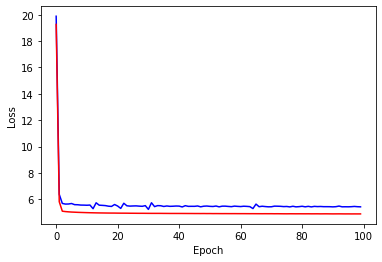

In [343]:
# '''
# # LSTM
# loss_list_lstm = []
# test_loss_list_lstm = []

# # DNN
# loss_list2 = []
# test_loss_list2 = []

# # Linear
# loss_list = []
# test_loss_list = []
# '''
# __test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
# __test_loss_list_lstm.insert(0, 3000)
# __test_loss_list_lstm.insert(250, 100)
# __test_loss_list_lstm.insert(400, 50)

# __loss_list_lstm = [n.item() for n in loss_list_lstm]
# __loss_list_lstm.insert(0, 3000)
# __loss_list_lstm.insert(250, 100)
# __loss_list_lstm.insert(400, 50)
# testx_train_loss = [i for i in range(int(len(__loss_list_lstm)/216))]
# testy_train_loss = [np.mean(__loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__loss_list_lstm)/216))]

# testx_test_loss = [i for i in range(int(len(__test_loss_list_lstm)/216))]
# testy_test_loss = [np.mean(__test_loss_list_lstm[i*216 : i*216 + 216]) for i in range(int(len(__test_loss_list_lstm)/216))]

# plt.xlabel('Epoch')
# plt.ylabel('Loss')

# plt.plot(testx_train_loss, testy_train_loss, 'b', label='Train Loss')
# plt.plot(testx_test_loss, testy_test_loss, 'r', label='Test Loss')
# plt.show()





In [50]:

_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]


<Figure size 1440x360 with 0 Axes>

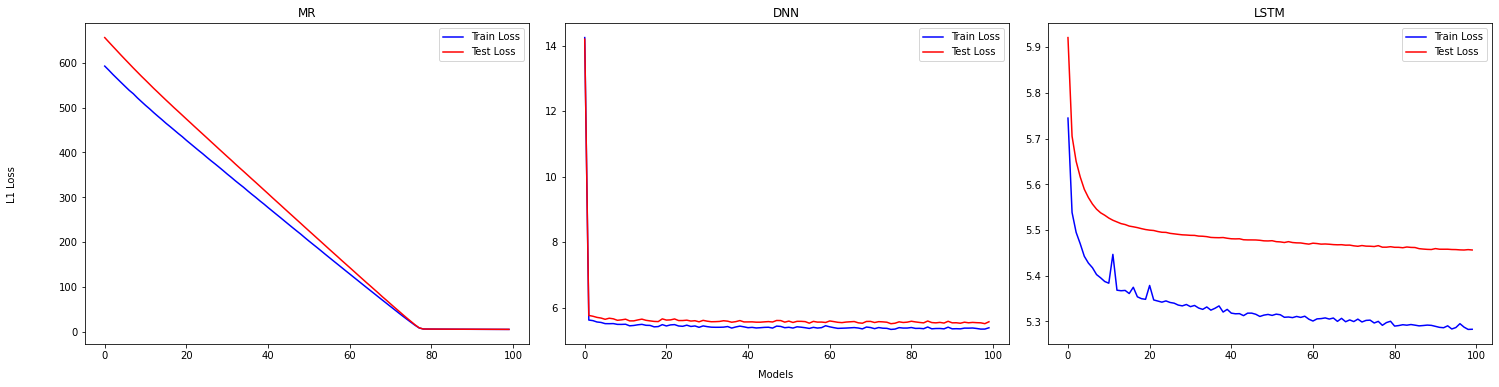

In [51]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []


_loss_list = [n.item() for n in loss_list]
_test_loss_list = [n.item() for n in test_loss_list]
_test_loss_list2 = [n.item() for n in test_loss_list2]
_loss_list2 = [n.item() for n in loss_list2]
_test_loss_list_lstm = [n.item() for n in test_loss_list_lstm]
_loss_list_lstm = [n.item() for n in loss_list_lstm]

'''
TERM = 432

plt.figure(figsize=(20,5))
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True, figsize=(20,5))

# MultiVariable Linear regression
x_train_loss = [i for i in range(int(len(_loss_list)/TERM))]
y_train_loss = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/TERM))]
y_test_loss = [np.mean(_test_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list)/TERM))]
ax[0].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[0].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[0].set_title('MR')
ax[0].legend()

# Deep Neural Network
x_train_loss = [i for i in range(int(len(_loss_list2)/TERM))]
y_train_loss = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list2)/TERM))]
y_test_loss = [np.mean(_test_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list2)/TERM))]
ax[1].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[1].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
ax[1].set_title('DNN')
ax[1].legend()

# LSTM
x_train_loss = [i for i in range(int(len(_loss_list_lstm)/TERM))]
y_train_loss = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]
x_test_loss = [i for i in range(int(len(_test_loss_list_lstm)/TERM))]
y_test_loss = [np.mean(_test_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_test_loss_list_lstm)/TERM))]
ax[2].plot(x_train_loss, y_train_loss, 'b', label='Train Loss')
ax[2].plot(x_test_loss, y_test_loss, 'r', label='Test Loss')
# ax[2].set_ylim([0,80])
ax[2].set_title('LSTM')
ax[2].legend()

# SUMMARY
MR_info = [np.mean(_loss_list[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list)/TERM))]
DNN_info = [np.mean(_loss_list2[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list2)/TERM))]
LSTM_info = [np.mean(_loss_list_lstm[i*TERM : i*TERM + TERM]) for i in range(int(len(_loss_list_lstm)/TERM))]




fig.text(-0.03, 0.5, 'L1 Loss', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

In [ ]:
'''
# LSTM
loss_list_lstm = []
test_loss_list_lstm = []

# DNN
loss_list2 = []
test_loss_list2 = []

# Linear
loss_list = []
test_loss_list = []
'''
##################### BACKUP #################
fig, ax = plt.subplots(1,3, squeeze=True, constrained_layout=True)
    
x_train_loss = [i for i in range(int(len(_loss_list)/216))]
y_train_loss = [np.mean(_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_loss_list)/216))]
x_test_loss = [i for i in range(int(len(_test_loss_list)/216))]
y_test_loss = [np.mean(_test_loss_list[i*216 : i*216 + 216]) for i in range(int(len(_test_loss_list)/216))]
ax[0][0].plot(x_train_loss, y_train_loss, 'blue', label='Train Loss')
ax[0][0].plot(x_test_loss, y_test_loss, 'blue', label='Train Loss')
ax[0][0].set_title('Price per Item')
ax[0][0].legend()

x = [i for i in range(1, len(line_loss_country[0])+1)]
ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
ax[0][1].set_title('Price per Country')
ax[0][1].legend()

x = [i for i in range(1, len(line_loss_item_p[0])+1)]
ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
ax[1][0].set_title('Inc/Dec Rate per Item')
ax[1][0].legend()

x = [i for i in range(1, len(line_loss_country_p[0])+1)]
ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
ax[1][1].set_title('Inc/Dec Rate per Country')
ax[1][1].legend()

fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
fig.text(0.5, -0.03, 'Models', ha='center', va='center')
plt.show()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

In [ ]:
# model = nn.Linear(x_train.shape[1], 1).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# n_epochs = 100
# loss_list = []
# test_loss_list = []
# for epoch in range(n_epochs):
#     for batch_idx, samples in enumerate(dataloader):
#         x_t, y_t = samples
        
#         pred = model(x_t)
#         cost = F.l1_loss(pred, y_t)
# #         cost = F.l1_loss(y_train, pred)
#         loss_list.append(cost)
#         with torch.no_grad():
#             pred_y = model(x_test)
#             test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
#         optimizer.zero_grad()
#         cost.backward()
#         optimizer.step()
#         print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

# train Fin

# L1 case Start

In [ ]:
torch.set_printoptions(sci_mode=False)

In [ ]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

In [ ]:
pred_y = deepmodel(x_test)

In [ ]:
pred_y.shape

In [ ]:
y_test = y_test.reshape(-1,1)
y_test

In [ ]:
pred_y.mean()

In [ ]:
torch.mean(torch.abs(pred_y - y_test))

# test Field

In [ ]:
# DNN
pred_y = deepmodel(x_test)


# LSTM
# x_te = x_test.reshape(-1, 1, input_size)
# pred_y = deepmodel(x_te)

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()


# item - rmse

In [134]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
tmp.info()


def RMSELoss(yhat,y):
    return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# Item - RMSE
import scipy.stats
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
#     print(np.abs(ground_truth - pred).mean())
    diff = np.abs(ground_truth - pred).std()
#     rmse, std = RMSELoss(ground_truth, pred)
    rmse = np.abs(ground_truth - pred).mean()
    std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
    
# Country - RMSE
rmse_list = []
std_list = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
    rmse, std = RMSELoss(ground_truth, pred)
#     rmse = np.abs(ground_truth - pred).mean()
#     std = diff/np.sqrt(len(ground_truth))
    rmse_list.append(rmse)
    std_list.append(std)
    
np.mean(rmse_list), np.mean(std_list)

In [137]:
np.mean(rmse_list), np.mean(std_list)

(17341233.68903371, 2805527.2864402034)

# country - rmse

In [138]:
# def RMSELoss(yhat,y):
#     return np.sqrt(np.mean((yhat-y)**2)), np.std(yhat-y)/np.sqrt(len(y))

# import scipy.stats
# rmse_list = []
# std_list = []

# cnt = 0
# item_list = sorted(tmp.iloc[:,2].unique()) # unique - item
# for item_number in item_list:
#     item_df = tmp[tmp.iloc[:, 2] == item_number]
    
#     ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
#     pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    
#     rmse, std = RMSELoss(ground_truth, pred)
# #     rmse = np.abs(ground_truth - pred).mean()
# #     std = diff/np.sqrt(len(ground_truth))
#     rmse_list.append(rmse)
#     std_list.append(std)

In [139]:
# np.mean(rmse_list), np.mean(std_list)

(16473570.884384235, 1630854.400354215)

# ITEM t-test start

In [98]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

In [28]:
import scipy.stats

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    print('countrys : ', item_df['COUNTRYNM'].unique())
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    print("{} Item : {}".format(item_number, diff))
    print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Sri Lanka' 'Chile' 'China'
 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Japan' 'Kazakhstan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820210 Item : 206265.76234132834
p-value : 0.14544764486160602

countrys :  ['Algeria' 'Australia' 'Brazil' 'Myanmar' 'Canada' 'Sri Lanka' 'Chile'
 'China' 'Czechia' 'China, Hong Kong SAR' 'Indonesia' 'Iran' 'Japan'
 'Kuwait' 'Malaysia' 'Mexico' 'Mongolia' 'New Zealand' 'Norway' 'Peru'
 'Philippines' 'Poland' 'Russian Federation' 'Saudi Arabia' 'India'
 'Singapore' 'Viet Nam' 'South Africa' 'Switzerland'
 'United Arab Emirates' 'Turkey' 'Egypt' 'United Kingdom' 'USA']
820239 Item : 1379665.8074444428
p-value : 0.2618282524365308

countrys :  ['Algeria' 'Australia' 'Brazil' 'Canada' 'Chile

# normal - t-test FIN

---
# t-test | train + test data

In [29]:
t = torch.cat([x_train, x_test])
if CASE == 'LSTM':
    # LSTM
    t = t.reshape(-1, 1, input_size)
    pred_y = deepmodel(t)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(t)

tmp_all = copy_df.copy()
tmp_all['pred'] = pred_y.detach().cpu().numpy()
# tmp.head()
# tmp.iloc[:,16].unique()
tmp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17269 entries, 0 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 17269 non-null  int64  
 1   HSCD                     17269 non-null  int64  
 2   COUNTRYCD                17269 non-null  int64  
 3   COUNTRYNM                17269 non-null  object 
 4   TRADE_COUNTRYCD          17269 non-null  float64
 5   TRADE_HSCD               17269 non-null  float64
 6   TARIFF_AVG               17269 non-null  float64
 7   SNDIST                   17269 non-null  float64
 8   NY_GDP_MKTP_CD           17269 non-null  float64
 9   NY_GDP_MKTP_CD_1Y        17269 non-null  float64
 10  SP_POP_TOTL              17269 non-null  float64
 11  PA_NUS_FCRF              17269 non-null  float64
 12  IC_BUS_EASE_DFRN_DB      17269 non-null  float64
 13  KMDIST                   17269 non-null  float64
 14  TRADE_HSCD_COUNTRYCD  

In [30]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD']
    pred = item_df['TRADE_HSCD_COUNTRYCD'] * (item_df['pred'] / 100.0)
    p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue
    
    diff = np.mean(np.abs(ground_truth - pred))
    if p_val < 0.05:
        cnt+=1
    
    #print("{} Item : {}".format(item_number, diff))
    #print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))


RESULT :  38  /  497


# train + test Data - t-test FIN

# item - country : not matching

In [124]:
item_list = sorted(tmp_all.iloc[:,16].unique())


for item in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item]
    
    if _item_df.shape[0] != len(_item_df['COUNTRYCD'].unique()):
        print("x")
#     if _item_df.shape[0] != 35:
#         print('ITEM : ', item, "NUm : ", _item_df.shape[0])
#     if _item_df.shape[0] > 35:
#         print(sorted(_item_df['COUNTRYNM']))


In [113]:
len(sorted(_item_df['COUNTRYCD'].unique()))

35

In [114]:
_item_df[_item_df['COUNTRYCD'] == 5]

UNC_YEAR  HSCD  COUNTRYCD COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
6      2017     1          5    Canada     4.324050e+11  1.948099e+10   

   TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
6         0.0  79.117838    1.649880e+12       1.528240e+12  ...   

   IC_BUS_EASE_DFRN_DB      KMDIST  TRADE_HSCD_COUNTRYCD  \
6             79.54094  106.177031          1.113991e+09   

   KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  item_world_percent  \
6                  7273171  190590            0.257627            5.718352   

   gdp_percent  next_year_percent      pred  
6   107.959483           0.652893  1.245726  

[1 rows x 22 columns]

In [ ]:
import scipy.stats

cnt = 0
item_list = sorted(tmp_all.iloc[:,16].unique())
for item_number in item_list:
    _item_df = tmp_all[tmp_all.iloc[:, 16] == item_number]
    
    country_list = sorted(_item_df['COUNTRYCD'].unique())
    for country in country_list:
        item_df = _item_df[_item_df['COUNTRYCD'] == country]
        
        ground_truth = item_df['next_year_percent']
        pred = item_df['pred']
        p_val = scipy.stats.ttest_ind(ground_truth, pred, equal_var=False).pvalue

        diff = np.mean(np.abs(ground_truth - pred))
        if p_val < 0.05:
            cnt+=1
    
#     print("{} Item : {}".format(item_number, diff))
#     print("p-value : {}\n".format(p_val))
print("\nRESULT : ", cnt, " / ", len(item_list))

In [95]:
tmp.head()

UNC_YEAR  HSCD  COUNTRYCD   COUNTRYNM  TRADE_COUNTRYCD    TRADE_HSCD  \
16908      2017   399         13        Iran     5.161228e+10  6.404620e+10   
16910      2017   399         14       Japan     6.714740e+11  6.404620e+10   
16911      2017   399         15  Kazakhstan     2.934591e+10  6.404620e+10   
16912      2017   399         36      Kuwait     3.356833e+10  6.404620e+10   
16913      2017   399         16    Malaysia     1.947200e+11  6.404620e+10   

       TARIFF_AVG     SNDIST  NY_GDP_MKTP_CD  NY_GDP_MKTP_CD_1Y  ...  \
16908        12.0  40.939509    4.453450e+11       4.179840e+11  ...   
16910         0.0  78.954807    4.866860e+12       4.922540e+12  ...   
16911         0.0  50.550694    1.668060e+11       1.372780e+11  ...   
16912         0.0  53.642850    1.207070e+11       1.094200e+11  ...   
16913         0.0  74.398315    3.191120e+11       3.012550e+11  ...   

       IC_BUS_EASE_DFRN_DB     KMDIST  TRADE_HSCD_COUNTRYCD  \
16908            55.707860  65.624482          6.592452e+07   
16910            78.020697  11.566696          3.942546e+09   
16911            74.848790  42.277720          4.830666e+07   
16912            59.969240  71.810249          1.047815e+08   
16913            78.272910  46.140674          2.689531e+08   

       KR_TRADE_HSCD_COUNTRYCD   _HSCD  item_total_percent  \
16908                      300  847150            0.127730   
16910                  6534855  847150            0.587148   
16911                    25746  847150            0.164611   
16912                    99868  847150            0.312144   
16913                   489257  847150            0.138123   

       item_world_percent  gdp_percent  next_year_percent      pred  
16908            0.102933   106.545944           0.000455  4.674330  
16910            6.155785    98.868877           0.165752  4.171092  
16911            0.075425   121.509637           0.053297  0.742438  
16912            0.163603   110.315299           0.095311  2.073210  
16913            0.419936   105.927536           0.181912  1.542309  

[5 rows x 22 columns]

In [96]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 16908 to 21102
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UNC_YEAR                 3454 non-null   int64  
 1   HSCD                     3454 non-null   int64  
 2   COUNTRYCD                3454 non-null   int64  
 3   COUNTRYNM                3454 non-null   object 
 4   TRADE_COUNTRYCD          3454 non-null   float64
 5   TRADE_HSCD               3454 non-null   float64
 6   TARIFF_AVG               3454 non-null   float64
 7   SNDIST                   3454 non-null   float64
 8   NY_GDP_MKTP_CD           3454 non-null   float64
 9   NY_GDP_MKTP_CD_1Y        3454 non-null   float64
 10  SP_POP_TOTL              3454 non-null   float64
 11  PA_NUS_FCRF              3454 non-null   float64
 12  IC_BUS_EASE_DFRN_DB      3454 non-null   float64
 13  KMDIST                   3454 non-null   float64
 14  TRADE_HSCD_COUNTRYC

# pred & ground truth - comp // SAMPLE

In [32]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp.iloc[:,16]

16908    847150
16910    847150
16911    847150
16912    847150
16913    847150
          ...  
21098    820210
21099    820210
21100    820210
21101    820210
21102    820210
Name: _HSCD, Length: 3454, dtype: int64

In [ ]:
tmp = copy_df.iloc[tr+te:,:].copy()
# 3, 14, 15, 16
arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next
arr = sorted(arr, key=lambda x : abs(x[0] - x[1]))

In [ ]:
arr[:10]

In [ ]:
arr[-10:]

In [ ]:
copy_df.iloc[tr+te:,14:16]

In [ ]:
# arr = [(t.item(), p.item(), abs(t.item()-p.item()), d0, d1, c, item_no) for t,p, d0, d1, c, item_no in zip(y_test, pred_y, tmp.iloc[:,14], tmp.iloc[:,15], tmp.iloc[:,3], tmp.iloc[:,16])] # 0: past, 1: next

res_df = pd.DataFrame()

In [ ]:
res_df['percentage - Ground Truth'] = [item[0] for item in arr]
res_df['percentage - Prediction'] = [item[1] for item in arr]
res_df['Diff - Ground Truth & Prediction'] = [item[2] for item in arr]
res_df['previous - trade price'] = [item[3] for item in arr]
res_df['next - trade price'] = [item[4] for item in arr]
res_df['Country'] = [item[5] for item in arr]
res_df['Item Code'] = [item[6] for item in arr]

In [ ]:
res_df[:].to_csv('./pred_result.csv')

In [ ]:
res_df.head()

In [ ]:
pd.concat([res_df.iloc[:10, :], res_df.iloc[-10:, :]]).to_csv('./sortedResult.csv')

In [ ]:
res_df.iloc[:10, :]

In [ ]:
res_df.iloc[-10:, :]

In [ ]:
copy_df.head()

# test Field

In [ ]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [ ]:
diff_list = np.array(diff_list)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [ ]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [ ]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [ ]:
import seaborn as sns

## just < 10

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [ ]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [ ]:
diff_list = np.sort(diff_list)

In [ ]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
outlier

In [ ]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

In [ ]:
r.mean()

In [ ]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

In [ ]:
pred_y.max()

# ALL Case Test //L1 case Fin && L2 case Start

In [203]:
x_te = x_test
CASE = 'LSTM'
LOSS = 'L1'

if CASE == 'L2':
    # L2 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
    deepmodel.eval()
    
elif CASE == 'L1':
    # L1 Model
    deepmodel = DeepModel(x_train.shape[1], 1).to(device)
    deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
    deepmodel.eval()

elif CASE == 'LSTM':
    # LSTM Model
    deepmodel = RNN(x_train.shape[1], hidden_size, num_layers, num_classes).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L1.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_LSTM_L2TEST.pth"))
    deepmodel.eval()
    x_te = x_test.reshape(-1, 1, input_size)

elif CASE == 'Linear':
    # Multivariable Model
    deepmodel = nn.Linear(x_train.shape[1], 1).to(device)
    if LOSS == 'L1':
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression.pth"))
    else:
        deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_Regression_L2TEST.pth"))
    deepmodel.eval()





In [204]:
if CASE == 'LSTM':
    # LSTM
    x_te = x_test.reshape(-1, 1, input_size)
    pred_y = deepmodel(x_te)
    
else:
    # DNN & Linear Regression
    pred_y = deepmodel(x_test)

# Plot

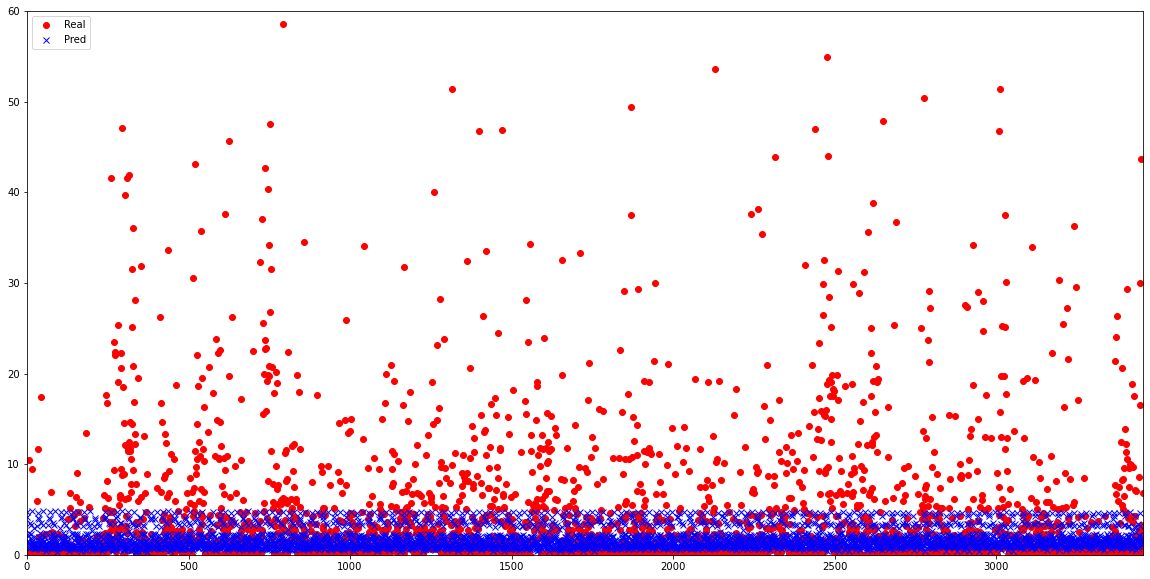

In [205]:
# JUST PLOT

_data_len = len(y_test)
plt.figure(figsize=(20,10))

plot_list = [idx for idx in range(_data_len) if abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx]) <= 10 or True]

# plot_list = []
# for idx in range(_data_len):
#     fix = abs(y_test.cpu().detach().numpy()[idx] - pred_y.cpu().detach().numpy()[idx])
#     if fix<= 10:
#         plot_list.append(idx)
#     else:
#         pass
data_len = len(plot_list)
# print(plot_list)
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'ro', label='Real')
plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'bx', label='Pred')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(y_test.cpu().detach().numpy()) if i in plot_list], 'r', label='Real_line')
# plt.plot([i for i in range(data_len)], [n for i, n in enumerate(pred_y.cpu().detach().numpy()) if i in plot_list], 'b', label='Pred_line')

height = 60#max(y_test.cpu().detach().numpy())
plt.axis([0, data_len, 0, height])
plt.legend()

# Get RMSE - PRICE

In [206]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))

tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()

# Item - RMSE
import scipy.stats
rmse_list_item = []
std_list_item = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
#     print(ground_truth)
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item.append(rmse)
    std_list_item.append(std)
    
    
# Country - RMSE
rmse_list_country = []
std_list_country = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['KR_TRADE_HSCD_COUNTRYCD'].values
    pred = item_df['TRADE_HSCD_COUNTRYCD'].values * (item_df['pred'].values / 100.0)
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country.append(rmse)
    std_list_country.append(std)
    


# GET RMSE - percentage

In [207]:
tmp = copy_df.iloc[tr+te:,:].copy()
tmp['pred'] = pred_y.detach().cpu().numpy()
# tmp.info()


# Item - RMSE
import scipy.stats
rmse_list_item_p = []
std_list_item_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,16].unique()) # unique - item
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 16] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_item_p.append(rmse)
    std_list_item_p.append(std)
    
    
# Country - RMSE
rmse_list_country_p = []
std_list_country_p = []

cnt = 0
item_list = sorted(tmp.iloc[:,2].unique()) # unique - country
for item_number in item_list:
    item_df = tmp[tmp.iloc[:, 2] == item_number]
    
    ground_truth = item_df['next_year_percent'].values
    pred = item_df['pred'].values
    
    rmse, std = RMSELoss(torch.tensor(ground_truth), torch.tensor(pred))
    
    rmse_list_country_p.append(rmse)
    std_list_country_p.append(std)
    


In [208]:
loss_item.append(np.mean(rmse_list_item))
std_item.append(np.mean(std_list_item))
loss_country.append(np.mean(rmse_list_country))
std_country.append(np.mean(std_list_country))


loss_item_p.append(np.mean(rmse_list_item_p))
std_item_p.append(np.mean(std_list_item_p))
loss_country_p.append(np.mean(rmse_list_country_p))
std_country_p.append(np.mean(std_list_country_p))

In [209]:
line_loss_item.append(rmse_list_item)
line_loss_country.append(rmse_list_country)
line_loss_item_p.append(rmse_list_item_p)
line_loss_country_p.append(rmse_list_country_p)

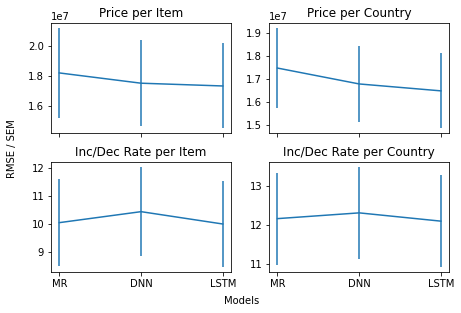

In [253]:
# initial
init_flag = False

if init_flag:
    # price
    loss_item = []
    std_item = []
    loss_country = []
    std_country = []

    # percentage
    loss_item_p = []
    std_item_p = []
    loss_country_p = []
    std_country_p = []
    
    # line
    line_loss_item = []
    line_loss_country = []
    line_loss_item_p = []
    line_loss_country_p = []
    
if not init_flag:
    x = ['MR', 'DNN', 'LSTM']
    fig, ax = plt.subplots(2,2, sharex=True, squeeze=True, constrained_layout=True)
    ax[0][0].errorbar(x, loss_item, yerr=std_item)
    ax[0][0].set_title('Price per Item')

    ax[0][1].errorbar(x, loss_country, yerr=std_country)
    ax[0][1].set_title('Price per Country')

    ax[1][0].errorbar(x, loss_item_p, yerr=std_item_p)
    ax[1][0].set_title('Inc/Dec Rate per Item')

    ax[1][1].errorbar(x, loss_country_p, yerr=std_country_p)
    ax[1][1].set_title('Inc/Dec Rate per Country')
    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
    fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    
    plt.show()

In [ ]:
# line_loss_item.append(rmse_list_item)
# line_loss_country.append(rmse_list_country)
# line_loss_item_p.append(rmse_list_item_p)
# line_loss_country_p.append(rmse_list_country_p)

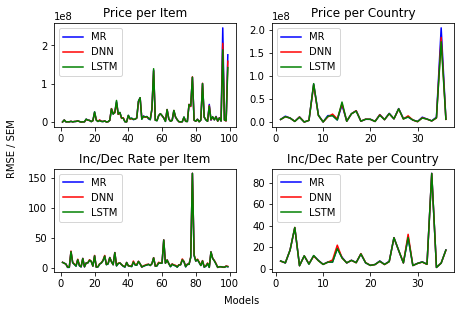

In [254]:
if not init_flag:
    fig, ax = plt.subplots(2,2, squeeze=True, constrained_layout=True)
    
    x = [i for i in range(1, len(line_loss_item[0])+1)]
    ax[0][0].plot(x, line_loss_item[0], 'b', label='MR')
    ax[0][0].plot(x, line_loss_item[1], 'r', label='DNN')
    ax[0][0].plot(x, line_loss_item[2], 'g', label='LSTM')
    ax[0][0].set_title('Price per Item')
    ax[0][0].legend()

    x = [i for i in range(1, len(line_loss_country[0])+1)]
    ax[0][1].plot(x, line_loss_country[0], 'b', label='MR')
    ax[0][1].plot(x, line_loss_country[1], 'r', label='DNN')
    ax[0][1].plot(x, line_loss_country[2], 'g', label='LSTM')
    ax[0][1].set_title('Price per Country')
    ax[0][1].legend()

    x = [i for i in range(1, len(line_loss_item_p[0])+1)]
    ax[1][0].plot(x, line_loss_item_p[0], 'b', label='MR')
    ax[1][0].plot(x, line_loss_item_p[1], 'r', label='DNN')
    ax[1][0].plot(x, line_loss_item_p[2], 'g', label='LSTM')
    ax[1][0].set_title('Inc/Dec Rate per Item')
    ax[1][0].legend()

    x = [i for i in range(1, len(line_loss_country_p[0])+1)]
    ax[1][1].plot(x, line_loss_country_p[0], 'b', label='MR')
    ax[1][1].plot(x, line_loss_country_p[1], 'r', label='DNN')
    ax[1][1].plot(x, line_loss_country_p[2], 'g', label='LSTM')
    ax[1][1].set_title('Inc/Dec Rate per Country')
    ax[1][1].legend()

    fig.text(-0.03, 0.5, 'RMSE / SEM', ha='center', va='center', rotation='vertical')
    fig.text(0.5, -0.03, 'Models', ha='center', va='center')
    plt.show()

In [180]:
loss_item

[18201972.380751327, 17523836.001432333, 17341233.689033713]

In [86]:
def RMSELoss(yhat,y):
    return torch.sqrt(torch.mean((yhat-y)**2)).item(), torch.std(yhat-y, unbiased=False).item()/np.sqrt(len(y))
LSTM_loss, LSTM_std = RMSELoss(pred_y, y_test)


In [89]:
MR_loss

tensor(19.5296, device='cuda:0', grad_fn=<SqrtBackward>)

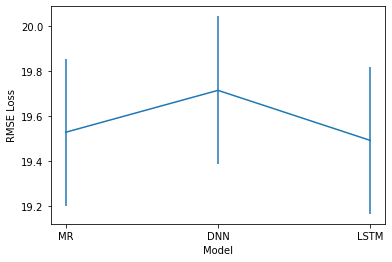

In [97]:
# MR_loss = 0
# MR_std = 0
# LSTM_loss = 0
# LSTM_std = 0
# DNN_loss = 0
# DNN_std = 0

# plt.errorbar([1,2,3], [MR_loss.item, DNN_loss, LSTM_loss], yerr = [MR_std, DNN_std, LSTM_std])
# plt.show()

plot_loss_list = []
plot_sem_list = []

plt.ylabel('RMSE Loss')
plt.xlabel('Model')
plt.errorbar(["MR","DNN","LSTM"], [MR_loss.item(), DNN_loss.item(), LSTM_loss.item()], yerr = [MR_std.item()/np.sqrt(len(pred_y)), DNN_std.item()/np.sqrt(len(pred_y)), LSTM_std.item()/np.sqrt(len(pred_y))])
plt.show()

In [29]:
import seaborn as sns
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
diff_list_L2 = np.array(diff_list_L2)

## original

In [ ]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



## IQR

In [ ]:
diff_list_L2 = np.sort(diff_list_L2)

In [ ]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [ ]:
iqr = q3 - q1

In [ ]:
outlier = 1.5*iqr

In [ ]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

In [ ]:
r_l2.mean()

In [ ]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

In [ ]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [ ]:
######################

# for bar plot

In [ ]:
outlier_l1_after = np.round(r.mean(), 2)

In [ ]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [ ]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [ ]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

In [ ]:
print(cnt)
sns.distplot(tot)

In [ ]:
df['next_year_percent'].min()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

In [ ]:
# !pip install hiddenlayer
import hiddenlayer as hl

In [ ]:
transforms = [hl.transforms.Prune('Constant')]

In [ ]:
graph = hl.build_graph(deepmodel, x_test, transforms=transforms)

In [ ]:
graph.them = hl.graph.THEMES['blue'].copy()

In [ ]:
graph

In [ ]:
# !pip install torchviz

In [ ]:
from torchviz import make_dot

In [ ]:
make_dot(deepmodel(x_test), params=dict(list(deepmodel.named_parameters())))

In [ ]:
from torchsummary import summary
summary(deepmodel, (df.shape[1]-1,))

In [ ]:
!pip install torchsummary